# 1.) Set up importand dependecies

##Setting up kaggle

In [1]:
!pip install kaggle

In [ ]:
#This is for google colab settings only

from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
#This is for google colab settings only

# 1. Remove the file (force delete, even if it's not a folder)
!rm -rf /root/.kaggle

# 2. Recreate as a directory
!mkdir -p /root/.kaggle

# 3. Copy kaggle.json from Drive
!cp /content/drive/MyDrive/kaggle/kaggle.json /root/.kaggle/

# 4. Fix permissions
!chmod 600 /root/.kaggle/kaggle.json



##Set up yt-dlp

In [15]:
!pip install --upgrade yt-dlp

   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.2 MB 4.2 MB/s eta 0:00:01
   ------------------- -------------------- 1.6/3.2 MB 4.7 MB/s eta 0:00:01
   ------------------------- -------------- 2.1/3.2 MB 4.5 MB/s eta 0:00:01
   -------------------------------- ------- 2.6/3.2 MB 3.4 MB/s eta 0:00:01
   ----------------------------------- ---- 2.9/3.2 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 3.2/3.2 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: yt-dlp
    Found existing installation: yt-dlp 2025.9.23
    Uninstalling yt-dlp-2025.9.23:
      Successfully uninstalled yt-dlp-2025.9.23


##Set up Whisper Model

In [ ]:
!pip install -q git+https://github.com/openai/whisper.git

In [ ]:
!apt-get install -y ffmpeg


In [ ]:
!pip uninstall torch torchvision torchaudio -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

## Set Up Google Gemini

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
!pip install -q langdetect

In [4]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
#from google.colab import userdata

#GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [5]:
model_gemini = genai.GenerativeModel('gemini-2.5-flash')

In [28]:
!pip install deep-translator

##Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yt_dlp
import os
import shutil

#Whisper Model
import whisper
import torch
from whisper.utils import get_writer

#langdetection
from langdetect import detect

#Split Dataset, and metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

#for change text to vector
from sklearn.feature_extraction.text import TfidfVectorizer

#models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

#translator 
from deep_translator import GoogleTranslator

# 2.) Explore the data (EDA)


##Download the data

In [ ]:
!kaggle datasets list

In [ ]:
!kaggle datasets download cyberevil545/youtube-videos-data-for-ml-and-trend-analysis

In [ ]:
!unzip /content/youtube-videos-data-for-ml-and-trend-analysis.zip

##Clean the data

In [22]:
df = pd.read_csv("G:/My Drive/EGBI222/youtube_with_transcribe.csv")

df.loc[4200:4202]

Unnamed: 0     video_id  duration  bitrate  bitrate(video)  height  \
4200        6596  NFZ_-j5zXew       173     3159            3002    1280   
4201        6598  NFel-_pxeW4       104     2732            2575    1280   
4202        6599  NG0I-tphzMQ       221      415             297     320   

      width  frame rate  frame rate(est.) codec        category  \
4200    720       29.97             29.97  h264           Music   
4201    720       25.00             25.00  h264           Music   
4202    240       15.00              0.00  h264  People & Blogs   

                                              url  \
4200  https://www.youtube.com/watch?v=NFZ_-j5zXew   
4201  https://www.youtube.com/watch?v=NFel-_pxeW4   
4202  https://www.youtube.com/watch?v=NG0I-tphzMQ   

                                                 title  \
4200  EL TURRO - BIEN TURRA ENSAYO EN VIVO AGOSTO 2011   
4201               BASTY :: EL SECRETO DE LAS TORTUGAS   
4202                            Vidéo de mon téléphone   

                                            description  \
4200  EL TURRO BAILANDO PIOLA, ENSAYANDO EL TEMA BIE...   
4201  Actuación de la Huella en Villarino de los Air...   
4202      vidéo ajoutée depuis mon téléphone cellulaire   

                                               hashtags  views  likes  \
4200  EL TURRO, ENSAYO, BAILANDO PIOLA, EN VIVO, BIE...   7993     22   
4201  villarino, tortugas, secreto, huella, basty, l...     82      0   
4202                   mobiles, vidéos, téléphone, pour     25      0   

      comments                                      audio_path  \
4200         4  G:/My Drive/EGBI222/audio-file/NFZ_-j5zXew.mp3   
4201         0  G:/My Drive/EGBI222/audio-file/NFel-_pxeW4.mp3   
4202         0  G:/My Drive/EGBI222/audio-file/NG0I-tphzMQ.mp3   

                                        transcribe_text  
4200   ¡Dos, tres! ¡Dos, tres! ¡Dos, tres! ¡Dos, tre...  
4201                                         Justeranın  
4202   Un synchronement du local de Castel, de Camay...

In [3]:
df.sort_values(by="duration", ascending=False)

video_id  duration  bitrate  bitrate(video)  height  width  \
12785  iTPy-mie0iE     25845     3988               0    1920   1080   
13129  jiV-3cvrjQU     18001      199              65     640    480   
4763   GXKW-uieSdI     14460     1672            1478    1920   1080   
10067  ZVVG-MAjDIg      9819     2547            2353    1280    720   
5894   Klqv9t1zVww      8438      800             704     640    352   
...            ...       ...      ...             ...     ...    ...   
14004  mr9y-OljTv0         1     5839            5934    1920   1080   
6260   M5Ww-Cq9y7U         1      833             748     320    240   
5083   Hj5r-Miup00         1      456             431     320    240   
3283   B2QJ-YfqUpY         1     1354            1316    1280    720   
10475  _xEg-w--4Mo         1     1282            1165     640    480   

       frame rate  frame rate(est.) codec              category  \
12785       12.00              0.00   vp8  Nonprofits & Activis   
13129       29.97              0.00  h264                 Music   
4763        29.97             29.97  h264        People & Blogs   
10067       25.00             25.00  h264                Gaming   
5894        23.98              0.00  h264             Education   
...           ...               ...   ...                   ...   
14004       29.92             29.92  h264         Entertainment   
6260        15.00              0.00  h264                Sports   
5083        15.00              0.00  h264        People & Blogs   
3283         8.00              8.00  h264         Entertainment   
10475       29.92              0.00  h264        Pets & Animals   

                                               url  \
12785  https://www.youtube.com/watch?v=iTPy-mie0iE   
13129  https://www.youtube.com/watch?v=jiV-3cvrjQU   
4763   https://www.youtube.com/watch?v=GXKW-uieSdI   
10067  https://www.youtube.com/watch?v=ZVVG-MAjDIg   
5894   https://www.youtube.com/watch?v=Klqv9t1zVww   
...                                            ...   
14004  https://www.youtube.com/watch?v=mr9y-OljTv0   
6260   https://www.youtube.com/watch?v=M5Ww-Cq9y7U   
5083   https://www.youtube.com/watch?v=Hj5r-Miup00   
3283   https://www.youtube.com/watch?v=B2QJ-YfqUpY   
10475  https://www.youtube.com/watch?v=_xEg-w--4Mo   

                                                   title  \
12785          Номинация «Вокал». Второй конкурсный день   
13129                          5 HOUR HARDSTYLE MIX 2012   
4763   القــــران الكريم_ الجزء السادس عشر _ عامر الك...   
10067  ICL 15 - CSGO - Rájátszás 2. kör - ancients vs...   
5894        Police State 4: The Rise of FEMA Full Length   
...                                                  ...   
14004                                            Warm Up   
6260                                            P4300698   
5083                                            P4061577   
3283                               22 janvier 2012 14:32   
10475                                    family park 009   

                                             description  \
12785                                                      
13129  Alright, PLEASE like and favourite.   Took a l...   
4763   جعله الله في ميزان حسناتنا جميعا  أسالكم الدعا...   
10067  Az INFiNiTY Csarnok LAN 15. állomásán a CS2HU ...   
5894   Order The DVD at: http://infowars-shop.stores....   
...                                                  ...   
14004                                                      
6260                                                       
5083                                                       
3283   Cette vid�o a �t� envoy�e � partir d'un t�l�ph...   
10475                                                      

                                                hashtags    views  likes  \
12785                                                NaN     1287      3   
13129  nustyle hardstyle, nu-style, hardstyle mixes 2...    20596    197   
4763                 

In [4]:
df.describe()

duration       bitrate  bitrate(video)        height         width  \
count  17589.000000  17589.000000    17589.000000  17589.000000  17589.000000   
mean     241.551936   1271.354369     1150.418443    766.781170    504.591961   
std      493.026994   1375.359875     1351.800202    467.289304    262.727746   
min        1.000000      0.000000        0.000000    108.000000     88.000000   
25%       51.000000    437.000000      326.000000    426.000000    320.000000   
50%      135.000000    743.000000      632.000000    640.000000    480.000000   
75%      268.000000   1293.000000     1184.000000    960.000000    720.000000   
max    25845.000000  22421.000000    22229.000000   2592.000000   1944.000000   

         frame rate  frame rate(est.)         views          likes  \
count  17589.000000      17589.000000  1.758900e+04   17589.000000   
mean      26.467639          9.471172  6.894158e+04     208.862641   
std        6.039748         13.253197  3.537491e+06    8477.504735   
min        3.750000          0.000000  0.000000e+00       0.000000   
25%       25.000000          0.000000  3.800000e+01       0.000000   
50%       29.970000          0.000000  1.520000e+02       1.000000   
75%       29.970000         25.000000  8.000000e+02       4.000000   
max       59.080000         30.000000  4.103849e+08  836981.000000   

           comments  
count  17589.000000  
mean      12.899312  
std      225.839378  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max    16634.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589 entries, 0 to 17588
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          17589 non-null  object 
 1   duration          17589 non-null  int64  
 2   bitrate           17589 non-null  int64  
 3   bitrate(video)    17589 non-null  int64  
 4   height            17589 non-null  int64  
 5   width             17589 non-null  int64  
 6   frame rate        17589 non-null  float64
 7   frame rate(est.)  17589 non-null  float64
 8   codec             17589 non-null  object 
 9   category          17589 non-null  object 
 10  url               17589 non-null  object 
 11  title             17589 non-null  object 
 12  description       16477 non-null  object 
 13  hashtags          16013 non-null  object 
 14  views             17589 non-null  int64  
 15  likes             17589 non-null  int64  
 16  comments          17589 non-null  int64 

#3.) Prepare the Data for model training

In [3]:
df = df[(df['duration'] > 60) & (df['duration'] < 600)]
df

Unnamed: 0     video_id  duration  bitrate  bitrate(video)  height  \
0               0  --F7dc-_FSI       180     5777            5640    1920   
1               2  --g2gG8pQ0w       233     3028            2833    1280   
2               3  -0DR7-voRCU       562      431             300     320   
3               4  -0Fkp-2EzX0       300     3087            2929    1280   
4               5  -0J-a-kKR1M       135      467             371     320   
...           ...          ...       ...      ...             ...     ...   
11181       17584  zyK7-WQTDaY       571     1285            1175     640   
11182       17585  zyPO-hxvWDg       105      840             719     640   
11183       17586  zyYk-W_JqNY       161      920             820     640   
11184       17587  zz3a-wnxBrs       291     4892            4738    1920   
11185       17588  zzF2-Z2B5Wc       244      392             302     320   

       width  frame rate  frame rate(est.) codec         category  \
0       1080       25.00             25.00  h264  News & Politics   
1        720       23.98             23.98  h264           Comedy   
2        240       29.97              0.00  h264   People & Blogs   
3        720       23.98             23.98  h264           Gaming   
4        240       30.00              0.00  h264   People & Blogs   
...      ...         ...               ...   ...              ...   
11181    480       29.92              0.00  h264   People & Blogs   
11182    480       29.97              0.00  h264   People & Blogs   
11183    480       29.97              0.00  h264   People & Blogs   
11184   1080       29.97             29.97  h264           Gaming   
11185    240       25.00              0.00  h264   People & Blogs   

                                               url  \
0      https://www.youtube.com/watch?v=--F7dc-_FSI   
1      https://www.youtube.com/watch?v=--g2gG8pQ0w   
2      https://www.youtube.com/watch?v=-0DR7-voRCU   
3      https://www.youtube.com/watch?v=-0Fkp-2EzX0   
4      https://www.youtube.com/watch?v=-0J-a-kKR1M   
...                                            ...   
11181  https://www.youtube.com/watch?v=zyK7-WQTDaY   
11182  https://www.youtube.com/watch?v=zyPO-hxvWDg   
11183  https://www.youtube.com/watch?v=zyYk-W_JqNY   
11184  https://www.youtube.com/watch?v=zz3a-wnxBrs   
11185  https://www.youtube.com/watch?v=zzF2-Z2B5Wc   

                                                   title  \
0                  «السودان ينتفض» أمام السفارة بالقاهرة   
1                   New Hip Hop - Kemo Treats - Pancakes   
2                             Sister's Keeper Impression   
3      JBHAMMER777 (AKUMA) VS KtossPol  Rank 1 (Vega)...   
4                                         D'Salapa mirae   
...                                                  ...   
11181                             rentero 1ª parte 2.MOD   
11182  Cascavel faz campanha impecável em campeonato ...   
11183  Marcha para Cristo.San Francisco Menéndez.  5 ...   
11184                             DK Solo Steinerne Kern   
11185  &#x202b;يارب نور دربي لعبد المجيد الفوزان بجود...   

                                             description  \
0      حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...   
1      Download all our music for FREE just enter $0....   
2      A Review of the Shampoo Bar(Sunburst) and Dip ...   
3      JBHAMMER777 is he strong enough to fight again...   
4                                                          
...                                                  ...   
11181                                                      
11182                                                      
11183                                                NaN   
11184  Das ist mein erstes Video, also ist noch alles...   
11185                                                      

                                                hashtags  views  likes  \
0      في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...   4078     41   
1      breakin

###Extract the audio file

In [16]:
#function to download an audio file


def download_audio_files(youtube_url, video_id):
    output_dir = 'audio-file'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Set the output path
    audio_file_path = os.path.join(output_dir, f'{video_id}')

    # Configure the yt_dlp
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': audio_file_path,
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3'
        }],
        # Optional: Suppress the error message printed by yt_dlp itself
        'quiet': True, 
        'no_warnings': True,
    }

    print(f"Attempting to download: {youtube_url}")
    
    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([youtube_url])
        
        # If the download is successful, return the path
        print(f"Successfully downloaded and saved to: {audio_file_path}.mp3")
        return audio_file_path
        
    except yt_dlp.utils.DownloadError as e:
        # This block catches the specific 403 Forbidden error or any other download error
        print(f"⚠️ ERROR downloading {youtube_url} (ID: {video_id}). Skipping file.")
        # You can print the specific error for debugging:
        # print(f"Detailed Error: {e}")
        return None # Return None to indicate failure/skip



def clean_directory(directory_path):
    try:
        # Use shutil.rmtree to remove the directory and its contents
        shutil.rmtree(directory_path)
    except Exception as e:
      return f"An error occured {e}"

In [17]:
df["audio_path"] = df.apply(
    lambda row: download_audio_files(row['url'], row['video_id']) if pd.isna(row.get('audio_path')) else row['audio_path'],
    axis=1
  )

Attempting to download: https://www.youtube.com/watch?v=-1BgT-6gEs8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-1BgT-6gEs8 (ID: -1BgT-6gEs8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-3J17-9TRcI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-3J17-9TRcI (ID: -3J17-9TRcI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-5xhR-CI2Yo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-5xhR-CI2Yo (ID: -5xhR-CI2Yo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-9QqI-vAFOw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-9QqI-vAFOw (ID: -9QqI-vAFOw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-Au9O-9mF_E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-Au9O-9mF_E (ID: -Au9O-9mF_E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-B6cr-ubQ-E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-B6cr-ubQ-E (ID: -B6cr-ubQ-E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-ELd7-JdI4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-ELd7-JdI4s (ID: -ELd7-JdI4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-G-gz-LphTs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-G-gz-LphTs (ID: -G-gz-LphTs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-Gvab-D49ks


ERROR: [youtube] -Gvab-D49ks: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=-Gvab-D49ks (ID: -Gvab-D49ks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-KzZH-SN_Y8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-KzZH-SN_Y8 (ID: -KzZH-SN_Y8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-NJJZ-DmKiI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-NJJZ-DmKiI (ID: -NJJZ-DmKiI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-Q-kc-6a1No


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-Q-kc-6a1No (ID: -Q-kc-6a1No). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-QMMA-3Z4yM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-QMMA-3Z4yM (ID: -QMMA-3Z4yM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-Um54-d2FT8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-Um54-d2FT8 (ID: -Um54-d2FT8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-d_CX-92sxw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-d_CX-92sxw (ID: -d_CX-92sxw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-hq9VKOPGLQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-hq9VKOPGLQ (ID: -hq9VKOPGLQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-iAHJ-69Z4o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-iAHJ-69Z4o (ID: -iAHJ-69Z4o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-lxwt-RKPVM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-lxwt-RKPVM (ID: -lxwt-RKPVM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-nfw3-3Yq5U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-nfw3-3Yq5U (ID: -nfw3-3Yq5U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-ppYu-hkQOI


ERROR: [youtube] -ppYu-hkQOI: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=-ppYu-hkQOI (ID: -ppYu-hkQOI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-qhYq-BRzTw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-qhYq-BRzTw (ID: -qhYq-BRzTw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-rMJc5qsBHE


ERROR: [youtube] -rMJc5qsBHE: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=-rMJc5qsBHE (ID: -rMJc5qsBHE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-sXwb-4haDo


ERROR: [youtube] -sXwb-4haDo: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=-sXwb-4haDo (ID: -sXwb-4haDo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-zo_7-olRS8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-zo_7-olRS8 (ID: -zo_7-olRS8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=01FH-vlLm7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=01FH-vlLm7E (ID: 01FH-vlLm7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0AO1-I7lg_k


ERROR: [youtube] 0AO1-I7lg_k: Video unavailable. This video contains content from yrf, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=0AO1-I7lg_k (ID: 0AO1-I7lg_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0B5M-YqKGdI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0B5M-YqKGdI (ID: 0B5M-YqKGdI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0EH0-lrntiU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0EH0-lrntiU (ID: 0EH0-lrntiU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0HZi-KjpbqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0HZi-KjpbqM (ID: 0HZi-KjpbqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0MFEFnRJC4k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0MFEFnRJC4k (ID: 0MFEFnRJC4k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0NcJ_63z-mA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0NcJ_63z-mA (ID: 0NcJ_63z-mA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0V6t-Y9Wy30


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0V6t-Y9Wy30 (ID: 0V6t-Y9Wy30). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0Wt9-bwPunU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0Wt9-bwPunU (ID: 0Wt9-bwPunU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0_Qg-mZKlBA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0_Qg-mZKlBA (ID: 0_Qg-mZKlBA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0g0A-lh_NRI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0g0A-lh_NRI (ID: 0g0A-lh_NRI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0neV-DhOExw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0neV-DhOExw (ID: 0neV-DhOExw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0oQl-fqqcT4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0oQl-fqqcT4 (ID: 0oQl-fqqcT4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0pEt-Up2QA4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0pEt-Up2QA4 (ID: 0pEt-Up2QA4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0v22-SRHa9Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0v22-SRHa9Q (ID: 0v22-SRHa9Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=12Jw-3uiQ_U


ERROR: [youtube] 12Jw-3uiQ_U: Video unavailable. This video is no longer available because the uploader has closed their YouTube account.


⚠️ ERROR downloading https://www.youtube.com/watch?v=12Jw-3uiQ_U (ID: 12Jw-3uiQ_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=142q-J2fgQw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=142q-J2fgQw (ID: 142q-J2fgQw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=144D-gU2E9Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=144D-gU2E9Q (ID: 144D-gU2E9Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1RGh-RmYxHY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1RGh-RmYxHY (ID: 1RGh-RmYxHY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1UIH-KzKddM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1UIH-KzKddM (ID: 1UIH-KzKddM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1VK3-FMnLDI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1VK3-FMnLDI (ID: 1VK3-FMnLDI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1_hII5pkCwo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1_hII5pkCwo (ID: 1_hII5pkCwo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1bCr-5CBvS4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1bCr-5CBvS4 (ID: 1bCr-5CBvS4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1cD_-Wmo3h8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1cD_-Wmo3h8 (ID: 1cD_-Wmo3h8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1hG6-7W7k9M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1hG6-7W7k9M (ID: 1hG6-7W7k9M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1huY-gCvk5E


ERROR: [youtube] 1huY-gCvk5E: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=1huY-gCvk5E (ID: 1huY-gCvk5E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1nrl-Uaj3FQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1nrl-Uaj3FQ (ID: 1nrl-Uaj3FQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1wGh-rRBwEE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1wGh-rRBwEE (ID: 1wGh-rRBwEE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1xIR-63E26U


ERROR: [youtube] 1xIR-63E26U: Video unavailable. This video contains content from ftvcp, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=1xIR-63E26U (ID: 1xIR-63E26U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2-vW-K3Bxdg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2-vW-K3Bxdg (ID: 2-vW-K3Bxdg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=25xI-N3f2EI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=25xI-N3f2EI (ID: 25xI-N3f2EI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=28I8-pOONSY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=28I8-pOONSY (ID: 28I8-pOONSY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2Crc-AFTLeY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2Crc-AFTLeY (ID: 2Crc-AFTLeY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2EFS-pAqYZU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2EFS-pAqYZU (ID: 2EFS-pAqYZU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2EIi-jhWI18


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2EIi-jhWI18 (ID: 2EIi-jhWI18). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2Ebq-H05-7U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2Ebq-H05-7U (ID: 2Ebq-H05-7U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2LHb-4K88kE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2LHb-4K88kE (ID: 2LHb-4K88kE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2LaS-YqfW2o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2LaS-YqfW2o (ID: 2LaS-YqfW2o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2O8d-ORDOdA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2O8d-ORDOdA (ID: 2O8d-ORDOdA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2UVS-lQGexA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2UVS-lQGexA (ID: 2UVS-lQGexA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2UYa-3lAh8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2UYa-3lAh8I (ID: 2UYa-3lAh8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2XQ5-ymSaqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2XQ5-ymSaqU (ID: 2XQ5-ymSaqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2_Gf-3QXPzM


ERROR: [youtube] 2_Gf-3QXPzM: Video unavailable. This video contains content from CTB Film Company, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=2_Gf-3QXPzM (ID: 2_Gf-3QXPzM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2hvw-4pZ3nU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2hvw-4pZ3nU (ID: 2hvw-4pZ3nU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2ihC-Aw0WkQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2ihC-Aw0WkQ (ID: 2ihC-Aw0WkQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2xTz-udQWZA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2xTz-udQWZA (ID: 2xTz-udQWZA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=37iC-bmG2dA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=37iC-bmG2dA (ID: 37iC-bmG2dA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3B5e-6yrBUo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3B5e-6yrBUo (ID: 3B5e-6yrBUo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3Fxb-tk9z6M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3Fxb-tk9z6M (ID: 3Fxb-tk9z6M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3T_L-FCIkJs


ERROR: [youtube] 3T_L-FCIkJs: Video unavailable. This video contains content from WMG, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=3T_L-FCIkJs (ID: 3T_L-FCIkJs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3_fF9rtYCQ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3_fF9rtYCQ0 (ID: 3_fF9rtYCQ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3bWq-_ulceU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3bWq-_ulceU (ID: 3bWq-_ulceU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3bmN-sNd2i4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3bmN-sNd2i4 (ID: 3bmN-sNd2i4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3dBn-FNDBm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3dBn-FNDBm4 (ID: 3dBn-FNDBm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3fy-yv4qDTQ


ERROR: [youtube] 3fy-yv4qDTQ: Video unavailable. This video contains content from FA Premier League, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=3fy-yv4qDTQ (ID: 3fy-yv4qDTQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3nzI-Q2xDgw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3nzI-Q2xDgw (ID: 3nzI-Q2xDgw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3pha-aouBlo


ERROR: [youtube] 3pha-aouBlo: Video unavailable. This video contains content from NBC Universal, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=3pha-aouBlo (ID: 3pha-aouBlo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3xUU-YRicZA


ERROR: [youtube] 3xUU-YRicZA: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=3xUU-YRicZA (ID: 3xUU-YRicZA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3xy1FZYRU6Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3xy1FZYRU6Y (ID: 3xy1FZYRU6Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3zrY-NWazPY


ERROR: [youtube] 3zrY-NWazPY: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=3zrY-NWazPY (ID: 3zrY-NWazPY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=43iK-iVqyAI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=43iK-iVqyAI (ID: 43iK-iVqyAI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4CZK-WMnBdE


ERROR: [youtube] 4CZK-WMnBdE: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=4CZK-WMnBdE (ID: 4CZK-WMnBdE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4KBk-T3HB-Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4KBk-T3HB-Q (ID: 4KBk-T3HB-Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4Px9-c8JGo4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4Px9-c8JGo4 (ID: 4Px9-c8JGo4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4WU1-TQ5J70


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4WU1-TQ5J70 (ID: 4WU1-TQ5J70). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4Ws1-KmyaL4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4Ws1-KmyaL4 (ID: 4Ws1-KmyaL4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4b7b-FY4JPI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4b7b-FY4JPI (ID: 4b7b-FY4JPI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4bCP-BQUIQo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4bCP-BQUIQo (ID: 4bCP-BQUIQo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4eZy-lFPNzQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4eZy-lFPNzQ (ID: 4eZy-lFPNzQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4hTu-kmBTDU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4hTu-kmBTDU (ID: 4hTu-kmBTDU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4jYP-OvL43k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4jYP-OvL43k (ID: 4jYP-OvL43k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4kms-it6RlU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4kms-it6RlU (ID: 4kms-it6RlU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4o6-meDVmLU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4o6-meDVmLU (ID: 4o6-meDVmLU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4o97-cqBPzI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4o97-cqBPzI (ID: 4o97-cqBPzI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4t7q-Qkju_Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4t7q-Qkju_Y (ID: 4t7q-Qkju_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4wOY-l6ZqWU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4wOY-l6ZqWU (ID: 4wOY-l6ZqWU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4xTU-HU0y44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4xTU-HU0y44 (ID: 4xTU-HU0y44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5--jl-a9lSI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5--jl-a9lSI (ID: 5--jl-a9lSI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=53R3-fw8bAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=53R3-fw8bAo (ID: 53R3-fw8bAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=55zQ-AYug8c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=55zQ-AYug8c (ID: 55zQ-AYug8c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=562Z-e2W1d8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=562Z-e2W1d8 (ID: 562Z-e2W1d8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=565N-ze-Mmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=565N-ze-Mmc (ID: 565N-ze-Mmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=57qS-lcFSlc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=57qS-lcFSlc (ID: 57qS-lcFSlc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=58SY-p2I0Nk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=58SY-p2I0Nk (ID: 58SY-p2I0Nk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=58xB-DN7Pow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=58xB-DN7Pow (ID: 58xB-DN7Pow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5A6S-Ay5hEQ


ERROR: [youtube] 5A6S-Ay5hEQ: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=5A6S-Ay5hEQ (ID: 5A6S-Ay5hEQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5HRFfmQ2PYs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5HRFfmQ2PYs (ID: 5HRFfmQ2PYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5Ncg-TfZEJU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5Ncg-TfZEJU (ID: 5Ncg-TfZEJU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5Tfmtr6vqp4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5Tfmtr6vqp4 (ID: 5Tfmtr6vqp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5Wle-pAl1_I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5Wle-pAl1_I (ID: 5Wle-pAl1_I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5Yez-p199mI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5Yez-p199mI (ID: 5Yez-p199mI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5eIo-2uFhBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5eIo-2uFhBM (ID: 5eIo-2uFhBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5gEV-rgGzvE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5gEV-rgGzvE (ID: 5gEV-rgGzvE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5gqQ-zDWzFg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5gqQ-zDWzFg (ID: 5gqQ-zDWzFg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5hPt-UUAGtA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5hPt-UUAGtA (ID: 5hPt-UUAGtA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5io7-4v2mo4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5io7-4v2mo4 (ID: 5io7-4v2mo4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5iz_-4Lh5KA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5iz_-4Lh5KA (ID: 5iz_-4Lh5KA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5qvS-eGOi3U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5qvS-eGOi3U (ID: 5qvS-eGOi3U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5rqD-kAdlE4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5rqD-kAdlE4 (ID: 5rqD-kAdlE4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5uq_-TRCPu8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5uq_-TRCPu8 (ID: 5uq_-TRCPu8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5wEn-h52k9g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5wEn-h52k9g (ID: 5wEn-h52k9g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5wsM-Tjlyp4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5wsM-Tjlyp4 (ID: 5wsM-Tjlyp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5wzP-1ynQWM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5wzP-1ynQWM (ID: 5wzP-1ynQWM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5xpn-v1iS3k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5xpn-v1iS3k (ID: 5xpn-v1iS3k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5ya3-G_AOBQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5ya3-G_AOBQ (ID: 5ya3-G_AOBQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5ycf-hFsSCg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5ycf-hFsSCg (ID: 5ycf-hFsSCg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5z2U-Fk5jlE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5z2U-Fk5jlE (ID: 5z2U-Fk5jlE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5z_p-nsb7no


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5z_p-nsb7no (ID: 5z_p-nsb7no). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5zwT-2spXbU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5zwT-2spXbU (ID: 5zwT-2spXbU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6-E9-GMna0s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6-E9-GMna0s (ID: 6-E9-GMna0s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=60E1jOyt6yY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=60E1jOyt6yY (ID: 60E1jOyt6yY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=60N-Tu40Obo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=60N-Tu40Obo (ID: 60N-Tu40Obo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=60vm-BnyjH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=60vm-BnyjH8 (ID: 60vm-BnyjH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=61lX-zO7Ss4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=61lX-zO7Ss4 (ID: 61lX-zO7Ss4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=626u-X3R4us


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=626u-X3R4us (ID: 626u-X3R4us). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=62_t-y2JyNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=62_t-y2JyNU (ID: 62_t-y2JyNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=62aN-p7Xdq8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=62aN-p7Xdq8 (ID: 62aN-p7Xdq8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=62es-avJw1s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=62es-avJw1s (ID: 62es-avJw1s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=62mb-LgjAaE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=62mb-LgjAaE (ID: 62mb-LgjAaE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=63Ci-sWcXEQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=63Ci-sWcXEQ (ID: 63Ci-sWcXEQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=64OQ-30YbYI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=64OQ-30YbYI (ID: 64OQ-30YbYI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=654y-YsJc-I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=654y-YsJc-I (ID: 654y-YsJc-I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=65VN-j8YT4Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=65VN-j8YT4Q (ID: 65VN-j8YT4Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=673G-pusTXg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=673G-pusTXg (ID: 673G-pusTXg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=67t_-oSs1XY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=67t_-oSs1XY (ID: 67t_-oSs1XY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=687V-C9hUPg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=687V-C9hUPg (ID: 687V-C9hUPg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=68H9-_H9gjg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=68H9-_H9gjg (ID: 68H9-_H9gjg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=68ij-wXHm94


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=68ij-wXHm94 (ID: 68ij-wXHm94). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=69bH-mADX0Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=69bH-mADX0Y (ID: 69bH-mADX0Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=69i-dClUF84


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=69i-dClUF84 (ID: 69i-dClUF84). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ALP-8QnUTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ALP-8QnUTY (ID: 6ALP-8QnUTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6AP5-tSYTNI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6AP5-tSYTNI (ID: 6AP5-tSYTNI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6AWl-MOk8Qw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6AWl-MOk8Qw (ID: 6AWl-MOk8Qw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6B-X-HefYDU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6B-X-HefYDU (ID: 6B-X-HefYDU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6B2u-mAyDP4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6B2u-mAyDP4 (ID: 6B2u-mAyDP4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6BTH-fKQpyo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6BTH-fKQpyo (ID: 6BTH-fKQpyo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6B_W-ZwrWSE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6B_W-ZwrWSE (ID: 6B_W-ZwrWSE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6BmR-RAyEAw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6BmR-RAyEAw (ID: 6BmR-RAyEAw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Bw1-2qDZAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Bw1-2qDZAo (ID: 6Bw1-2qDZAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Bz_-ItVNiw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Bz_-ItVNiw (ID: 6Bz_-ItVNiw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6C2s-BVa8L4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6C2s-BVa8L4 (ID: 6C2s-BVa8L4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6CX6-Cr5pUY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6CX6-Cr5pUY (ID: 6CX6-Cr5pUY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6CZI-WgVfNg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6CZI-WgVfNg (ID: 6CZI-WgVfNg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6DBS-F3UL3A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6DBS-F3UL3A (ID: 6DBS-F3UL3A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6DFI-wsqesk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6DFI-wsqesk (ID: 6DFI-wsqesk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6DRk-bTxWK4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6DRk-bTxWK4 (ID: 6DRk-bTxWK4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Dgj-uvwdTE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Dgj-uvwdTE (ID: 6Dgj-uvwdTE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6EAf-H8x5Cg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6EAf-H8x5Cg (ID: 6EAf-H8x5Cg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6EGq-WVeOxo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6EGq-WVeOxo (ID: 6EGq-WVeOxo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6EPL-TTxilY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6EPL-TTxilY (ID: 6EPL-TTxilY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6EUv-IUgfXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6EUv-IUgfXM (ID: 6EUv-IUgfXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Eau-dn4e1Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Eau-dn4e1Y (ID: 6Eau-dn4e1Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6F7z-29CnlY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6F7z-29CnlY (ID: 6F7z-29CnlY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6F9K-7CIOCE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6F9K-7CIOCE (ID: 6F9K-7CIOCE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6FHP-2537gI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6FHP-2537gI (ID: 6FHP-2537gI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6FOR-xEZepI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6FOR-xEZepI (ID: 6FOR-xEZepI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Fmb-7fQH50


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Fmb-7fQH50 (ID: 6Fmb-7fQH50). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6G8E-y2jkxk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6G8E-y2jkxk (ID: 6G8E-y2jkxk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6GZj-SCJX_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6GZj-SCJX_w (ID: 6GZj-SCJX_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Gbq-11y6ZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Gbq-11y6ZE (ID: 6Gbq-11y6ZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Gpg-28h1fk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Gpg-28h1fk (ID: 6Gpg-28h1fk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Hk-oEBTtks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Hk-oEBTtks (ID: 6Hk-oEBTtks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Hwm-DbuZko


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Hwm-DbuZko (ID: 6Hwm-DbuZko). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Hwr-21KWZ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Hwr-21KWZ0 (ID: 6Hwr-21KWZ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6HzQ-SumKYk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6HzQ-SumKYk (ID: 6HzQ-SumKYk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6IrC-vfvwow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6IrC-vfvwow (ID: 6IrC-vfvwow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6J-h-06yvcw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6J-h-06yvcw (ID: 6J-h-06yvcw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6JD7-NZ5LTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6JD7-NZ5LTY (ID: 6JD7-NZ5LTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6JIS-jKGGCk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6JIS-jKGGCk (ID: 6JIS-jKGGCk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6JS4-X1F1SM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6JS4-X1F1SM (ID: 6JS4-X1F1SM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6KTH-6hIhqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6KTH-6hIhqU (ID: 6KTH-6hIhqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Kt9-VM7rcg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Kt9-VM7rcg (ID: 6Kt9-VM7rcg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Lqt-QaXefk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Lqt-QaXefk (ID: 6Lqt-QaXefk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6M2n-r71tRA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6M2n-r71tRA (ID: 6M2n-r71tRA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Mow-y9Q2j8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Mow-y9Q2j8 (ID: 6Mow-y9Q2j8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Msx-_UNqxk


ERROR: [youtube] 6Msx-_UNqxk: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Msx-_UNqxk (ID: 6Msx-_UNqxk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6N68-RP4s5U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6N68-RP4s5U (ID: 6N68-RP4s5U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6NIr--TuWwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6NIr--TuWwU (ID: 6NIr--TuWwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Nda-7tVifQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Nda-7tVifQ (ID: 6Nda-7tVifQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Nja-9xW0eU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Nja-9xW0eU (ID: 6Nja-9xW0eU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Nsx-AKOQ7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Nsx-AKOQ7o (ID: 6Nsx-AKOQ7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Nu_-ACFFAE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Nu_-ACFFAE (ID: 6Nu_-ACFFAE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Nz-Nn5Cv9c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Nz-Nn5Cv9c (ID: 6Nz-Nn5Cv9c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Ocl-gy0u3k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Ocl-gy0u3k (ID: 6Ocl-gy0u3k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6PTB-LI4YWU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6PTB-LI4YWU (ID: 6PTB-LI4YWU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6PXJ-78Wwk4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6PXJ-78Wwk4 (ID: 6PXJ-78Wwk4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6QQN-Mp-MzE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6QQN-Mp-MzE (ID: 6QQN-Mp-MzE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6RYX-YkxNww


ERROR: [youtube] 6RYX-YkxNww: Video unavailable. This video contains content from WMG, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=6RYX-YkxNww (ID: 6RYX-YkxNww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Rzq-86TmEA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Rzq-86TmEA (ID: 6Rzq-86TmEA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6SD4-RTvd30


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6SD4-RTvd30 (ID: 6SD4-RTvd30). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6T9w-TWk9nY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6T9w-TWk9nY (ID: 6T9w-TWk9nY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6THv-qaQL_4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6THv-qaQL_4 (ID: 6THv-qaQL_4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6TIS-h3Ngow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6TIS-h3Ngow (ID: 6TIS-h3Ngow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6TSe-kpqExA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6TSe-kpqExA (ID: 6TSe-kpqExA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Tfo-sG5bTU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Tfo-sG5bTU (ID: 6Tfo-sG5bTU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6UNY-tfHzWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6UNY-tfHzWY (ID: 6UNY-tfHzWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6UZ5-uNFuqk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6UZ5-uNFuqk (ID: 6UZ5-uNFuqk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Ubh-_qlF8A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Ubh-_qlF8A (ID: 6Ubh-_qlF8A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Udy-ehoR2Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Udy-ehoR2Y (ID: 6Udy-ehoR2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6V8T-W_yBZI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6V8T-W_yBZI (ID: 6V8T-W_yBZI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6VCz-cbQfh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6VCz-cbQfh0 (ID: 6VCz-cbQfh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Wsh-U1WUFI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Wsh-U1WUFI (ID: 6Wsh-U1WUFI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Wt0-OS5Mjo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Wt0-OS5Mjo (ID: 6Wt0-OS5Mjo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6X81-xG2xtc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6X81-xG2xtc (ID: 6X81-xG2xtc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6XOL-uIjOyg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6XOL-uIjOyg (ID: 6XOL-uIjOyg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Y4B-S221fw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Y4B-S221fw (ID: 6Y4B-S221fw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6YH6-LGIWwk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6YH6-LGIWwk (ID: 6YH6-LGIWwk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6YN5-bOSctE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6YN5-bOSctE (ID: 6YN5-bOSctE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6YSA-Lte0QU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6YSA-Lte0QU (ID: 6YSA-Lte0QU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6YY-HpGmJg8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6YY-HpGmJg8 (ID: 6YY-HpGmJg8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Y_h-OBSBWw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Y_h-OBSBWw (ID: 6Y_h-OBSBWw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Z4h-ygl_0s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Z4h-ygl_0s (ID: 6Z4h-ygl_0s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ZPm-QKfVRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ZPm-QKfVRg (ID: 6ZPm-QKfVRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ZXY-JdvG2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ZXY-JdvG2k (ID: 6ZXY-JdvG2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6_DR-KMOkFw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6_DR-KMOkFw (ID: 6_DR-KMOkFw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6_ST-41AmIE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6_ST-41AmIE (ID: 6_ST-41AmIE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6a0f-TR-eRo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6a0f-TR-eRo (ID: 6a0f-TR-eRo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6auTqEfoNc0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6auTqEfoNc0 (ID: 6auTqEfoNc0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6bIl-XJaiRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6bIl-XJaiRg (ID: 6bIl-XJaiRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6bMs-vWxZUg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6bMs-vWxZUg (ID: 6bMs-vWxZUg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6cGv8pcAOPs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6cGv8pcAOPs (ID: 6cGv8pcAOPs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6cdP-R5MHPw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6cdP-R5MHPw (ID: 6cdP-R5MHPw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6cqC-UYZfUM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6cqC-UYZfUM (ID: 6cqC-UYZfUM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6cvQ-45Ea44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6cvQ-45Ea44 (ID: 6cvQ-45Ea44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6d-i-q1sq6o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6d-i-q1sq6o (ID: 6d-i-q1sq6o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ee-1rBrvb8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ee-1rBrvb8 (ID: 6ee-1rBrvb8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ehx-0cIGNY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ehx-0cIGNY (ID: 6ehx-0cIGNY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6f4c-SM8q5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6f4c-SM8q5A (ID: 6f4c-SM8q5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6fch-2kAxU8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6fch-2kAxU8 (ID: 6fch-2kAxU8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6gLK-xXFCLU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6gLK-xXFCLU (ID: 6gLK-xXFCLU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6gRE-LJvco4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6gRE-LJvco4 (ID: 6gRE-LJvco4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6gqn-lN804g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6gqn-lN804g (ID: 6gqn-lN804g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6gtr-jc3DUQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6gtr-jc3DUQ (ID: 6gtr-jc3DUQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6h0o-FAdtWk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6h0o-FAdtWk (ID: 6h0o-FAdtWk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6hDR-zQN8fU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6hDR-zQN8fU (ID: 6hDR-zQN8fU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6i2j-rue8vg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6i2j-rue8vg (ID: 6i2j-rue8vg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6i3Q-2G84Zg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6i3Q-2G84Zg (ID: 6i3Q-2G84Zg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6jE5-y-UoM0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6jE5-y-UoM0 (ID: 6jE5-y-UoM0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6jR_-YZFILQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6jR_-YZFILQ (ID: 6jR_-YZFILQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6jry-cCTUjM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6jry-cCTUjM (ID: 6jry-cCTUjM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6knq-J1feDg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6knq-J1feDg (ID: 6knq-J1feDg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6lWr-BDGR_Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6lWr-BDGR_Y (ID: 6lWr-BDGR_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6lcl-ZeooJM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6lcl-ZeooJM (ID: 6lcl-ZeooJM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6lgZ-n4xDio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6lgZ-n4xDio (ID: 6lgZ-n4xDio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6m5D-J6_a9U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6m5D-J6_a9U (ID: 6m5D-J6_a9U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6mHL-k2jPCk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6mHL-k2jPCk (ID: 6mHL-k2jPCk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6mQ-ZKmm1xM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6mQ-ZKmm1xM (ID: 6mQ-ZKmm1xM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6muM-aPEG_4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6muM-aPEG_4 (ID: 6muM-aPEG_4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6mwL-U_pQY4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6mwL-U_pQY4 (ID: 6mwL-U_pQY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ol8-UxIYsE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ol8-UxIYsE (ID: 6ol8-UxIYsE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6pAY-FWnXzE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6pAY-FWnXzE (ID: 6pAY-FWnXzE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6qKi-Ug7ki8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6qKi-Ug7ki8 (ID: 6qKi-Ug7ki8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6q_o-Ynqsng


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6q_o-Ynqsng (ID: 6q_o-Ynqsng). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6rMI-BnsRqI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6rMI-BnsRqI (ID: 6rMI-BnsRqI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6rPz-9fhTVE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6rPz-9fhTVE (ID: 6rPz-9fhTVE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6rQJ-beBe-M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6rQJ-beBe-M (ID: 6rQJ-beBe-M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ragYFNmfto


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ragYFNmfto (ID: 6ragYFNmfto). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6s3w-rzScds


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6s3w-rzScds (ID: 6s3w-rzScds). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6sDW-Veejts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6sDW-Veejts (ID: 6sDW-Veejts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6sIt-FQIgAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6sIt-FQIgAo (ID: 6sIt-FQIgAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6sMR-EYW8dI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6sMR-EYW8dI (ID: 6sMR-EYW8dI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6smS-GBMo2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6smS-GBMo2k (ID: 6smS-GBMo2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6t72-ctbBm0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6t72-ctbBm0 (ID: 6t72-ctbBm0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6t8f-xEgkBg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6t8f-xEgkBg (ID: 6t8f-xEgkBg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6tq9-LkEruI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6tq9-LkEruI (ID: 6tq9-LkEruI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6v8y-_mvYQI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6v8y-_mvYQI (ID: 6v8y-_mvYQI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6wfd-nuu28s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6wfd-nuu28s (ID: 6wfd-nuu28s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6xKm--3A95Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6xKm--3A95Q (ID: 6xKm--3A95Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6xYN-EXPVAU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6xYN-EXPVAU (ID: 6xYN-EXPVAU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6xnk--naKmw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6xnk--naKmw (ID: 6xnk--naKmw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6xvH-uD14-A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6xvH-uD14-A (ID: 6xvH-uD14-A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6y3s-QlIG7k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6y3s-QlIG7k (ID: 6y3s-QlIG7k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6yL-FYPkPkI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6yL-FYPkPkI (ID: 6yL-FYPkPkI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6yuZ-NKqPqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6yuZ-NKqPqM (ID: 6yuZ-NKqPqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6zb7-c_3rEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6zb7-c_3rEc (ID: 6zb7-c_3rEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=70M1-uDT3T8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=70M1-uDT3T8 (ID: 70M1-uDT3T8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=70SI-kaCD5E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=70SI-kaCD5E (ID: 70SI-kaCD5E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=71lY-T_VsE0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=71lY-T_VsE0 (ID: 71lY-T_VsE0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=71xd-4zJSRI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=71xd-4zJSRI (ID: 71xd-4zJSRI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=72C_-tRqBbg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=72C_-tRqBbg (ID: 72C_-tRqBbg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=72Y_-fYmpQU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=72Y_-fYmpQU (ID: 72Y_-fYmpQU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=73Xl-zh1v7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=73Xl-zh1v7g (ID: 73Xl-zh1v7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=74eV-ESZ0IU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=74eV-ESZ0IU (ID: 74eV-ESZ0IU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=74nc-pD958k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=74nc-pD958k (ID: 74nc-pD958k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=74yv-SvLp_U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=74yv-SvLp_U (ID: 74yv-SvLp_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=756Y-9FIYvc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=756Y-9FIYvc (ID: 756Y-9FIYvc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=76Qa-vMkgk8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=76Qa-vMkgk8 (ID: 76Qa-vMkgk8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=76aK-06DzR0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=76aK-06DzR0 (ID: 76aK-06DzR0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=775-KU-rVIw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=775-KU-rVIw (ID: 775-KU-rVIw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=77GU-Y7L49Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=77GU-Y7L49Y (ID: 77GU-Y7L49Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=77W-QR59Mts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=77W-QR59Mts (ID: 77W-QR59Mts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=77al-WvTWAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=77al-WvTWAo (ID: 77al-WvTWAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=77t9-XGfJUY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=77t9-XGfJUY (ID: 77t9-XGfJUY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=79EzojAfuxo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=79EzojAfuxo (ID: 79EzojAfuxo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=79Lp-ucysg4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=79Lp-ucysg4 (ID: 79Lp-ucysg4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=79nT-2OH2B4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=79nT-2OH2B4 (ID: 79nT-2OH2B4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7AI2-DfsjAw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7AI2-DfsjAw (ID: 7AI2-DfsjAw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7AVm-ldOC0c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7AVm-ldOC0c (ID: 7AVm-ldOC0c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7AtY-I578Zk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7AtY-I578Zk (ID: 7AtY-I578Zk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BCF-STHX6c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BCF-STHX6c (ID: 7BCF-STHX6c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BD-9hP7mYY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BD-9hP7mYY (ID: 7BD-9hP7mYY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BEj-Fdp9F8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BEj-Fdp9F8 (ID: 7BEj-Fdp9F8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BFB-fUGGQo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BFB-fUGGQo (ID: 7BFB-fUGGQo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BVy-kQQXqI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BVy-kQQXqI (ID: 7BVy-kQQXqI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BZG-UATq8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BZG-UATq8I (ID: 7BZG-UATq8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Bb2-wVDPpo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Bb2-wVDPpo (ID: 7Bb2-wVDPpo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Bu4-5_Jkd4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Bu4-5_Jkd4 (ID: 7Bu4-5_Jkd4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7CHs-8pUyOU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7CHs-8pUyOU (ID: 7CHs-8pUyOU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7CNB-A3HOxA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7CNB-A3HOxA (ID: 7CNB-A3HOxA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7CU7-7DjYKQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7CU7-7DjYKQ (ID: 7CU7-7DjYKQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7DD6-NIimZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7DD6-NIimZE (ID: 7DD6-NIimZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7DEr-mwP56Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7DEr-mwP56Q (ID: 7DEr-mwP56Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Dzh-wUcF68


ERROR: [youtube] 7Dzh-wUcF68: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Dzh-wUcF68 (ID: 7Dzh-wUcF68). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7EGQ-cBePP8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7EGQ-cBePP8 (ID: 7EGQ-cBePP8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7EYw-URg8K0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7EYw-URg8K0 (ID: 7EYw-URg8K0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Eeu-YbK9Ps


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Eeu-YbK9Ps (ID: 7Eeu-YbK9Ps). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Ewx-Yn2uRw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Ewx-Yn2uRw (ID: 7Ewx-Yn2uRw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7F2r-O2nvEY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7F2r-O2nvEY (ID: 7F2r-O2nvEY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7G0p-sLtXdU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7G0p-sLtXdU (ID: 7G0p-sLtXdU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7GAu-AEZPyQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7GAu-AEZPyQ (ID: 7GAu-AEZPyQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7GCZ-WlY4_s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7GCZ-WlY4_s (ID: 7GCZ-WlY4_s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7GZ3GJUELpM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7GZ3GJUELpM (ID: 7GZ3GJUELpM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Gmv-99Cas4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Gmv-99Cas4 (ID: 7Gmv-99Cas4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7HX-qR2IrYg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7HX-qR2IrYg (ID: 7HX-qR2IrYg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7I0f-5FrxL0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7I0f-5FrxL0 (ID: 7I0f-5FrxL0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7KWQ-BqbGHs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7KWQ-BqbGHs (ID: 7KWQ-BqbGHs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7LAl-dfJyKE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7LAl-dfJyKE (ID: 7LAl-dfJyKE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Lvm-OURmOs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Lvm-OURmOs (ID: 7Lvm-OURmOs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7MhT-8eQzX8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7MhT-8eQzX8 (ID: 7MhT-8eQzX8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Mio-nz6dgU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Mio-nz6dgU (ID: 7Mio-nz6dgU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7MoI-hFTs3Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7MoI-hFTs3Q (ID: 7MoI-hFTs3Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7N1N-0HTIK8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7N1N-0HTIK8 (ID: 7N1N-0HTIK8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7NJ6-M3vwGQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7NJ6-M3vwGQ (ID: 7NJ6-M3vwGQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Nog-aIfTEs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Nog-aIfTEs (ID: 7Nog-aIfTEs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7OrF-AeoYY0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7OrF-AeoYY0 (ID: 7OrF-AeoYY0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7PkT-j6SzcE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7PkT-j6SzcE (ID: 7PkT-j6SzcE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Q5d-9F-CR4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Q5d-9F-CR4 (ID: 7Q5d-9F-CR4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7QwV-m8sqd0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7QwV-m8sqd0 (ID: 7QwV-m8sqd0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7R-zg6D4nF0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7R-zg6D4nF0 (ID: 7R-zg6D4nF0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7R4k-PhkKnY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7R4k-PhkKnY (ID: 7R4k-PhkKnY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7RLD-6--_L4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7RLD-6--_L4 (ID: 7RLD-6--_L4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Rvd--HIp3A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Rvd--HIp3A (ID: 7Rvd--HIp3A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7S7h-VPIfd4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7S7h-VPIfd4 (ID: 7S7h-VPIfd4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7SGg-P1vZKI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7SGg-P1vZKI (ID: 7SGg-P1vZKI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7TsV9L1J1-M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7TsV9L1J1-M (ID: 7TsV9L1J1-M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7V1X-DOzGH4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7V1X-DOzGH4 (ID: 7V1X-DOzGH4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7VCx-yn15UM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7VCx-yn15UM (ID: 7VCx-yn15UM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7VSg-d89Fno


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7VSg-d89Fno (ID: 7VSg-d89Fno). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Vk0-t9Tp4M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Vk0-t9Tp4M (ID: 7Vk0-t9Tp4M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7W6p-3FtVmo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7W6p-3FtVmo (ID: 7W6p-3FtVmo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7WKp-2yeht8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7WKp-2yeht8 (ID: 7WKp-2yeht8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7WNU-J-7rOY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7WNU-J-7rOY (ID: 7WNU-J-7rOY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7WPE-ZfzHD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7WPE-ZfzHD4 (ID: 7WPE-ZfzHD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7WW2-B6WVgU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7WW2-B6WVgU (ID: 7WW2-B6WVgU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7WpY-ZcI09c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7WpY-ZcI09c (ID: 7WpY-ZcI09c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Wqr-nhH_AI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Wqr-nhH_AI (ID: 7Wqr-nhH_AI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7X2Q-pmHRvo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7X2Q-pmHRvo (ID: 7X2Q-pmHRvo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7XJu-2E7RT4


ERROR: [youtube] 7XJu-2E7RT4: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=7XJu-2E7RT4 (ID: 7XJu-2E7RT4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Y0e-lV8S_U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Y0e-lV8S_U (ID: 7Y0e-lV8S_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Y4D-3fMFg4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Y4D-3fMFg4 (ID: 7Y4D-3fMFg4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7YEJ-wqUnGI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7YEJ-wqUnGI (ID: 7YEJ-wqUnGI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Ylz-sn3I04


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Ylz-sn3I04 (ID: 7Ylz-sn3I04). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7YxP-gFGlO8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7YxP-gFGlO8 (ID: 7YxP-gFGlO8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Z7Y-Xsrphc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Z7Y-Xsrphc (ID: 7Z7Y-Xsrphc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7_Vo-c1Tv1Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7_Vo-c1Tv1Y (ID: 7_Vo-c1Tv1Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7_lM-ADUxmg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7_lM-ADUxmg (ID: 7_lM-ADUxmg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7_pm-YRDrsQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7_pm-YRDrsQ (ID: 7_pm-YRDrsQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7a5Y-D95D1Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7a5Y-D95D1Y (ID: 7a5Y-D95D1Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7anG-55UShM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7anG-55UShM (ID: 7anG-55UShM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7c7w-I5kGWI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7c7w-I5kGWI (ID: 7c7w-I5kGWI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7c9G-Jt8t-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7c9G-Jt8t-4 (ID: 7c9G-Jt8t-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7cb4-tTGBeY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7cb4-tTGBeY (ID: 7cb4-tTGBeY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7ccB-BH2f3k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7ccB-BH2f3k (ID: 7ccB-BH2f3k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7cgn-IiHm0E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7cgn-IiHm0E (ID: 7cgn-IiHm0E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7dyb-1Lx0t4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7dyb-1Lx0t4 (ID: 7dyb-1Lx0t4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7e4q-VEKN5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7e4q-VEKN5A (ID: 7e4q-VEKN5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7eNa-t5VBiE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7eNa-t5VBiE (ID: 7eNa-t5VBiE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7fD4-ii8jhQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7fD4-ii8jhQ (ID: 7fD4-ii8jhQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7gJr-YEA2sA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7gJr-YEA2sA (ID: 7gJr-YEA2sA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7hAP-od7Uvc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7hAP-od7Uvc (ID: 7hAP-od7Uvc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7hQy-7uitGM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7hQy-7uitGM (ID: 7hQy-7uitGM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7iJg-Jr5WYk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7iJg-Jr5WYk (ID: 7iJg-Jr5WYk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7ikO-FT-TBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7ikO-FT-TBM (ID: 7ikO-FT-TBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7iva-vQhDkw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7iva-vQhDkw (ID: 7iva-vQhDkw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7jEU-5hkieY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7jEU-5hkieY (ID: 7jEU-5hkieY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7jFk-3cLBAE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7jFk-3cLBAE (ID: 7jFk-3cLBAE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7jOY-_kcZrs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7jOY-_kcZrs (ID: 7jOY-_kcZrs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7jPY-rB13kQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7jPY-rB13kQ (ID: 7jPY-rB13kQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7jlT-to9KpY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7jlT-to9KpY (ID: 7jlT-to9KpY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7kDp-Tv3zSE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7kDp-Tv3zSE (ID: 7kDp-Tv3zSE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7kE9-qSp76I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7kE9-qSp76I (ID: 7kE9-qSp76I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7kMs-oF9iP0


ERROR: [youtube] 7kMs-oF9iP0: Video unavailable. This video contains content from AdShare MG for a Third Party, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=7kMs-oF9iP0 (ID: 7kMs-oF9iP0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7kRS-glPxpU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7kRS-glPxpU (ID: 7kRS-glPxpU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7ke0-2G22R4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7ke0-2G22R4 (ID: 7ke0-2G22R4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7lok-Hy4W7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7lok-Hy4W7g (ID: 7lok-Hy4W7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7mRO-ID6z2o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7mRO-ID6z2o (ID: 7mRO-ID6z2o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7mrT-otT5wg


ERROR: [youtube] 7mrT-otT5wg: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=7mrT-otT5wg (ID: 7mrT-otT5wg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7nFW-xOG4Mw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7nFW-xOG4Mw (ID: 7nFW-xOG4Mw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7nGR-geugug


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7nGR-geugug (ID: 7nGR-geugug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7neq-gKkBqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7neq-gKkBqU (ID: 7neq-gKkBqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7o-v-UFEGhM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7o-v-UFEGhM (ID: 7o-v-UFEGhM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7ouv-SgVhkA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7ouv-SgVhkA (ID: 7ouv-SgVhkA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7pIe-BTtptM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7pIe-BTtptM (ID: 7pIe-BTtptM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7pTJ-3GtcNI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7pTJ-3GtcNI (ID: 7pTJ-3GtcNI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7rCd-eftAy8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7rCd-eftAy8 (ID: 7rCd-eftAy8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7rdC-RlUdjg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7rdC-RlUdjg (ID: 7rdC-RlUdjg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7riX-lZOnE0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7riX-lZOnE0 (ID: 7riX-lZOnE0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7shL-aRRS1E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7shL-aRRS1E (ID: 7shL-aRRS1E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7sjo-5i888M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7sjo-5i888M (ID: 7sjo-5i888M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7uZs-TksBWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7uZs-TksBWY (ID: 7uZs-TksBWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7urv-Iby3rM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7urv-Iby3rM (ID: 7urv-Iby3rM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7whw-vaXe5E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7whw-vaXe5E (ID: 7whw-vaXe5E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7wvf-V2nBeM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7wvf-V2nBeM (ID: 7wvf-V2nBeM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7wxG-bY-G4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7wxG-bY-G4s (ID: 7wxG-bY-G4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7y34-UVgOKU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7y34-UVgOKU (ID: 7y34-UVgOKU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7yVF-U5TKJc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7yVF-U5TKJc (ID: 7yVF-U5TKJc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7z1p-ELJIVI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7z1p-ELJIVI (ID: 7z1p-ELJIVI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7zJR-SBoVeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7zJR-SBoVeE (ID: 7zJR-SBoVeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8-Mx-FI4-0E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8-Mx-FI4-0E (ID: 8-Mx-FI4-0E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8-hW-fQbPeY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8-hW-fQbPeY (ID: 8-hW-fQbPeY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=80R3-A65TJg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=80R3-A65TJg (ID: 80R3-A65TJg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=81Bd-1iH_KY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=81Bd-1iH_KY (ID: 81Bd-1iH_KY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=81YU-kcHRIw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=81YU-kcHRIw (ID: 81YU-kcHRIw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=81d7-VuZAVw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=81d7-VuZAVw (ID: 81d7-VuZAVw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=81d_-fiRVnc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=81d_-fiRVnc (ID: 81d_-fiRVnc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=81ds-Od3Z1A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=81ds-Od3Z1A (ID: 81ds-Od3Z1A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=82W-sBOjWVU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=82W-sBOjWVU (ID: 82W-sBOjWVU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=82Xp-29MT2M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=82Xp-29MT2M (ID: 82Xp-29MT2M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=83P2-Uha4Vk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=83P2-Uha4Vk (ID: 83P2-Uha4Vk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=83Sr-0D5wik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=83Sr-0D5wik (ID: 83Sr-0D5wik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=84f7-3naMQM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=84f7-3naMQM (ID: 84f7-3naMQM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=84f_-HctEKA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=84f_-HctEKA (ID: 84f_-HctEKA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=84vH-zTTHq8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=84vH-zTTHq8 (ID: 84vH-zTTHq8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=852p-D7CKIc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=852p-D7CKIc (ID: 852p-D7CKIc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=85QF-K04MWg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=85QF-K04MWg (ID: 85QF-K04MWg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=85Yp-atGD4w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=85Yp-atGD4w (ID: 85Yp-atGD4w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=86Vj-cBOgE4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=86Vj-cBOgE4 (ID: 86Vj-cBOgE4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=872U-pLG0Jc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=872U-pLG0Jc (ID: 872U-pLG0Jc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=87Jp-Ke2DbE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=87Jp-Ke2DbE (ID: 87Jp-Ke2DbE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=87mH-VxEVRw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=87mH-VxEVRw (ID: 87mH-VxEVRw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=88GL-pBobbI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=88GL-pBobbI (ID: 88GL-pBobbI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=89GD-flbCgs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=89GD-flbCgs (ID: 89GD-flbCgs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=89jE-uJ-g2s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=89jE-uJ-g2s (ID: 89jE-uJ-g2s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=89z9-_5KEm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=89z9-_5KEm4 (ID: 89z9-_5KEm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8AFL-HDMWAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8AFL-HDMWAY (ID: 8AFL-HDMWAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8ANe--3dED0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8ANe--3dED0 (ID: 8ANe--3dED0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8B5J-vx339k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8B5J-vx339k (ID: 8B5J-vx339k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8BRB-_XSbkI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8BRB-_XSbkI (ID: 8BRB-_XSbkI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Bt0--K0MPc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Bt0--K0MPc (ID: 8Bt0--K0MPc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Buh-cFuURI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Buh-cFuURI (ID: 8Buh-cFuURI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8C6-4LLB7nQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8C6-4LLB7nQ (ID: 8C6-4LLB7nQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8C7P-8m5Fb8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8C7P-8m5Fb8 (ID: 8C7P-8m5Fb8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8CMK-g-1TQ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8CMK-g-1TQ4 (ID: 8CMK-g-1TQ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8CTE1DjWDMA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8CTE1DjWDMA (ID: 8CTE1DjWDMA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8D2L-Pk4lY4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8D2L-Pk4lY4 (ID: 8D2L-Pk4lY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8DOP-KwFyo8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8DOP-KwFyo8 (ID: 8DOP-KwFyo8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Ewv-WYAGIg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Ewv-WYAGIg (ID: 8Ewv-WYAGIg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8FPV-vxcDHI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8FPV-vxcDHI (ID: 8FPV-vxcDHI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8FYX-Ru1TQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8FYX-Ru1TQk (ID: 8FYX-Ru1TQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Fc5qtA1nEk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Fc5qtA1nEk (ID: 8Fc5qtA1nEk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8FfL-wABivY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8FfL-wABivY (ID: 8FfL-wABivY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Fnv-t_vTuM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Fnv-t_vTuM (ID: 8Fnv-t_vTuM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8GH9-OSg-qQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8GH9-OSg-qQ (ID: 8GH9-OSg-qQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8GUU-Jobc4k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8GUU-Jobc4k (ID: 8GUU-Jobc4k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8H-d-qv7zHo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8H-d-qv7zHo (ID: 8H-d-qv7zHo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8HNprY0GufU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8HNprY0GufU (ID: 8HNprY0GufU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8I3G-OvPxiQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8I3G-OvPxiQ (ID: 8I3G-OvPxiQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8IC-5LcPnRQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8IC-5LcPnRQ (ID: 8IC-5LcPnRQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Ixo-kV3Mac


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Ixo-kV3Mac (ID: 8Ixo-kV3Mac). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8J4K-DaE2ks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8J4K-DaE2ks (ID: 8J4K-DaE2ks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8JDv-M0I8GU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8JDv-M0I8GU (ID: 8JDv-M0I8GU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8JKp-jhDoC4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8JKp-jhDoC4 (ID: 8JKp-jhDoC4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8JO-Lo3YIYc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8JO-Lo3YIYc (ID: 8JO-Lo3YIYc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Jk3-Ju_3Ss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Jk3-Ju_3Ss (ID: 8Jk3-Ju_3Ss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Kbk-213Wtw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Kbk-213Wtw (ID: 8Kbk-213Wtw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Ked-O2FeWo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Ked-O2FeWo (ID: 8Ked-O2FeWo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Kkd-KRDpnE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Kkd-KRDpnE (ID: 8Kkd-KRDpnE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Kyx-bX2nsU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Kyx-bX2nsU (ID: 8Kyx-bX2nsU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8LFL-zX6SLY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8LFL-zX6SLY (ID: 8LFL-zX6SLY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8LKj-NLkpCk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8LKj-NLkpCk (ID: 8LKj-NLkpCk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8LzD-DhrQCE


ERROR: [youtube] 8LzD-DhrQCE: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=8LzD-DhrQCE (ID: 8LzD-DhrQCE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8M9z-fODdio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8M9z-fODdio (ID: 8M9z-fODdio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8MTA-p17fQc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8MTA-p17fQc (ID: 8MTA-p17fQc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8NAJ-clYV7s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8NAJ-clYV7s (ID: 8NAJ-clYV7s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8NR3-7FHOp8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8NR3-7FHOp8 (ID: 8NR3-7FHOp8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8NZi-cxZmRM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8NZi-cxZmRM (ID: 8NZi-cxZmRM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Nmg-yH5IsE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Nmg-yH5IsE (ID: 8Nmg-yH5IsE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Nnf-HGYo1U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Nnf-HGYo1U (ID: 8Nnf-HGYo1U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Nu6-91zuO8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Nu6-91zuO8 (ID: 8Nu6-91zuO8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8OLJ-JCrPAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8OLJ-JCrPAY (ID: 8OLJ-JCrPAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8OwM-0l2B_0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8OwM-0l2B_0 (ID: 8OwM-0l2B_0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8PI7-ReqkrQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8PI7-ReqkrQ (ID: 8PI7-ReqkrQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8PTY-9nTnSY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8PTY-9nTnSY (ID: 8PTY-9nTnSY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8PdV-Qzhfos


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8PdV-Qzhfos (ID: 8PdV-Qzhfos). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Q53gq5-_Uw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Q53gq5-_Uw (ID: 8Q53gq5-_Uw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8QDN-erMmDs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8QDN-erMmDs (ID: 8QDN-erMmDs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8QKMsKCI-1w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8QKMsKCI-1w (ID: 8QKMsKCI-1w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Q_X-RruXic


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Q_X-RruXic (ID: 8Q_X-RruXic). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Rhpp9SpK2Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Rhpp9SpK2Y (ID: 8Rhpp9SpK2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8S2h-b4KSpk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8S2h-b4KSpk (ID: 8S2h-b4KSpk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8S37-shlqL0


ERROR: [youtube] 8S37-shlqL0: Video unavailable. This video contains content from Sony Music Entertainment (Japan) Inc., who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=8S37-shlqL0 (ID: 8S37-shlqL0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8TuI-3V_Vbw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8TuI-3V_Vbw (ID: 8TuI-3V_Vbw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8UOj-OTRWug


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8UOj-OTRWug (ID: 8UOj-OTRWug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8VG3-r5A9rg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8VG3-r5A9rg (ID: 8VG3-r5A9rg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Vac-PpeZRI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Vac-PpeZRI (ID: 8Vac-PpeZRI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8W8A-2TiPW0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8W8A-2TiPW0 (ID: 8W8A-2TiPW0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8WPT-CGUDY8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8WPT-CGUDY8 (ID: 8WPT-CGUDY8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8WUx-XRa7fA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8WUx-XRa7fA (ID: 8WUx-XRa7fA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Xk9-eBq0Gs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Xk9-eBq0Gs (ID: 8Xk9-eBq0Gs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Xkc-ZxSBew


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Xkc-ZxSBew (ID: 8Xkc-ZxSBew). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YBP-htpIEk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YBP-htpIEk (ID: 8YBP-htpIEk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YNO-b_WAtA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YNO-b_WAtA (ID: 8YNO-b_WAtA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YQwiuQaF64


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YQwiuQaF64 (ID: 8YQwiuQaF64). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YUG-HFVtlI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YUG-HFVtlI (ID: 8YUG-HFVtlI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YXv-Zm2cko


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YXv-Zm2cko (ID: 8YXv-Zm2cko). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YdM-ddQqo0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YdM-ddQqo0 (ID: 8YdM-ddQqo0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Ysy-1SVDgg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Ysy-1SVDgg (ID: 8Ysy-1SVDgg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Yv2-keKIRQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Yv2-keKIRQ (ID: 8Yv2-keKIRQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Yvo-TW1g3I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Yvo-TW1g3I (ID: 8Yvo-TW1g3I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Z_A-cQHLGI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Z_A-cQHLGI (ID: 8Z_A-cQHLGI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8_hL-KnXdeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8_hL-KnXdeE (ID: 8_hL-KnXdeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8_pQ-tcKnbY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8_pQ-tcKnbY (ID: 8_pQ-tcKnbY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8a4C-F48dOk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8a4C-F48dOk (ID: 8a4C-F48dOk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8aE3-5uW_zU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8aE3-5uW_zU (ID: 8aE3-5uW_zU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8aOf-dFyWGQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8aOf-dFyWGQ (ID: 8aOf-dFyWGQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8aQz-FQ-rG0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8aQz-FQ-rG0 (ID: 8aQz-FQ-rG0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8aXO-LNzgjo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8aXO-LNzgjo (ID: 8aXO-LNzgjo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8aew-POsMIw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8aew-POsMIw (ID: 8aew-POsMIw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8bHx-DuZJZ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8bHx-DuZJZ0 (ID: 8bHx-DuZJZ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8cD8-j8T_2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8cD8-j8T_2k (ID: 8cD8-j8T_2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8cXR-ZWxgkU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8cXR-ZWxgkU (ID: 8cXR-ZWxgkU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8dGT-lhtT2M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8dGT-lhtT2M (ID: 8dGT-lhtT2M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8e7j-Ux5bbo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8e7j-Ux5bbo (ID: 8e7j-Ux5bbo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8fr_-46hr6o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8fr_-46hr6o (ID: 8fr_-46hr6o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8fx_-8P9k6U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8fx_-8P9k6U (ID: 8fx_-8P9k6U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8goc-5tZ1Ss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8goc-5tZ1Ss (ID: 8goc-5tZ1Ss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8gul-n1HXIw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8gul-n1HXIw (ID: 8gul-n1HXIw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8hGe-FsxhTg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8hGe-FsxhTg (ID: 8hGe-FsxhTg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8iAj-yAUg9w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8iAj-yAUg9w (ID: 8iAj-yAUg9w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8iV1-B7zUFM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8iV1-B7zUFM (ID: 8iV1-B7zUFM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8iXh-VNfbYA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8iXh-VNfbYA (ID: 8iXh-VNfbYA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8jER-ZBhDj8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8jER-ZBhDj8 (ID: 8jER-ZBhDj8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8jHM-_EIwZU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8jHM-_EIwZU (ID: 8jHM-_EIwZU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8jNB-M2qlfs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8jNB-M2qlfs (ID: 8jNB-M2qlfs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8jnr-96vbKk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8jnr-96vbKk (ID: 8jnr-96vbKk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8jvY-Z65YUE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8jvY-Z65YUE (ID: 8jvY-Z65YUE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8kA2-X4_lGs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8kA2-X4_lGs (ID: 8kA2-X4_lGs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8kDm-ER3ckw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8kDm-ER3ckw (ID: 8kDm-ER3ckw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8ky2-JLkh7k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8ky2-JLkh7k (ID: 8ky2-JLkh7k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8l1S-Hfmaew


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8l1S-Hfmaew (ID: 8l1S-Hfmaew). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8lOA-ASk6Fc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8lOA-ASk6Fc (ID: 8lOA-ASk6Fc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8lbT-s-UKYw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8lbT-s-UKYw (ID: 8lbT-s-UKYw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8mXm-lHDb08


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8mXm-lHDb08 (ID: 8mXm-lHDb08). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8meYec8R69Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8meYec8R69Y (ID: 8meYec8R69Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8mkA-MGRmKk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8mkA-MGRmKk (ID: 8mkA-MGRmKk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8nDI-Es7Ju4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8nDI-Es7Ju4 (ID: 8nDI-Es7Ju4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8nEyfVOKrPo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8nEyfVOKrPo (ID: 8nEyfVOKrPo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8nNt-b1oAfQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8nNt-b1oAfQ (ID: 8nNt-b1oAfQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8o-k-wR4gUM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8o-k-wR4gUM (ID: 8o-k-wR4gUM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8o-l-iO0y78


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8o-l-iO0y78 (ID: 8o-l-iO0y78). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8oDu-9ThNDI


ERROR: [youtube] 8oDu-9ThNDI: Video unavailable. This video contains content from Sony Music Entertainment (Japan) Inc., who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=8oDu-9ThNDI (ID: 8oDu-9ThNDI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8oW-nWejF0g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8oW-nWejF0g (ID: 8oW-nWejF0g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8oiOHX1Dqqg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8oiOHX1Dqqg (ID: 8oiOHX1Dqqg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8oig-aveVSs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8oig-aveVSs (ID: 8oig-aveVSs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8oyl-DTZroY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8oyl-DTZroY (ID: 8oyl-DTZroY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8pGs-wvLIos


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8pGs-wvLIos (ID: 8pGs-wvLIos). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8pVz-Hyfso8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8pVz-Hyfso8 (ID: 8pVz-Hyfso8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8plM-eRDwTg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8plM-eRDwTg (ID: 8plM-eRDwTg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8pxR-i6OGA4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8pxR-i6OGA4 (ID: 8pxR-i6OGA4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8qF0-ZvjQmM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8qF0-ZvjQmM (ID: 8qF0-ZvjQmM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8qTN-N_aJL0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8qTN-N_aJL0 (ID: 8qTN-N_aJL0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8qhv-4w6qn0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8qhv-4w6qn0 (ID: 8qhv-4w6qn0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8quY-1vcY6Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8quY-1vcY6Q (ID: 8quY-1vcY6Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8qyb-f8wGKQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8qyb-f8wGKQ (ID: 8qyb-f8wGKQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8r-L-7xniKw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8r-L-7xniKw (ID: 8r-L-7xniKw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8r98-4gRHi0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8r98-4gRHi0 (ID: 8r98-4gRHi0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8rOi-83Tr08


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8rOi-83Tr08 (ID: 8rOi-83Tr08). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8rXB-xJQliM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8rXB-xJQliM (ID: 8rXB-xJQliM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8rru-zPEbgw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8rru-zPEbgw (ID: 8rru-zPEbgw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8s84-AIiLwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8s84-AIiLwU (ID: 8s84-AIiLwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8sUO-EqIcxw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8sUO-EqIcxw (ID: 8sUO-EqIcxw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8shr-6VKlqE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8shr-6VKlqE (ID: 8shr-6VKlqE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8tK2-7iRhWM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8tK2-7iRhWM (ID: 8tK2-7iRhWM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8tTl-nI4Bp4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8tTl-nI4Bp4 (ID: 8tTl-nI4Bp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8tWd-ByzdqE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8tWd-ByzdqE (ID: 8tWd-ByzdqE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8tqC-YTiO2Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8tqC-YTiO2Q (ID: 8tqC-YTiO2Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8u-D-mVcC3w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8u-D-mVcC3w (ID: 8u-D-mVcC3w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8u3j-1Hxs18


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8u3j-1Hxs18 (ID: 8u3j-1Hxs18). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8u61-UC6rPI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8u61-UC6rPI (ID: 8u61-UC6rPI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8v4x-iierC0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8v4x-iierC0 (ID: 8v4x-iierC0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8vB2-TAEIUk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8vB2-TAEIUk (ID: 8vB2-TAEIUk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8vwB-dxoozs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8vwB-dxoozs (ID: 8vwB-dxoozs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8wAF-rX1XgM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8wAF-rX1XgM (ID: 8wAF-rX1XgM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8wFN-pyXxjY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8wFN-pyXxjY (ID: 8wFN-pyXxjY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8xUs-GSWaSU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8xUs-GSWaSU (ID: 8xUs-GSWaSU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8xpq-5Cuj8k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8xpq-5Cuj8k (ID: 8xpq-5Cuj8k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8yCv-JW074I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8yCv-JW074I (ID: 8yCv-JW074I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8yWF-enlDzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8yWF-enlDzo (ID: 8yWF-enlDzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8z2L-daa2Uo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8z2L-daa2Uo (ID: 8z2L-daa2Uo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8zMuLHVw9yg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8zMuLHVw9yg (ID: 8zMuLHVw9yg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=90SdmjuCAqw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=90SdmjuCAqw (ID: 90SdmjuCAqw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=90bo-Tf0-UY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=90bo-Tf0-UY (ID: 90bo-Tf0-UY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=914C-GaPYr8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=914C-GaPYr8 (ID: 914C-GaPYr8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=91gT-TYaa2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=91gT-TYaa2k (ID: 91gT-TYaa2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=91l_-Crxz_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=91l_-Crxz_k (ID: 91l_-Crxz_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=91zK-MufzyU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=91zK-MufzyU (ID: 91zK-MufzyU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=92LT-vOOuJk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=92LT-vOOuJk (ID: 92LT-vOOuJk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=92Th-FA1ezI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=92Th-FA1ezI (ID: 92Th-FA1ezI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=92fX-eSCPNo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=92fX-eSCPNo (ID: 92fX-eSCPNo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93D6-2muzBQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93D6-2muzBQ (ID: 93D6-2muzBQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93FM-ZJZfhM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93FM-ZJZfhM (ID: 93FM-ZJZfhM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93Uk-G67eQg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93Uk-G67eQg (ID: 93Uk-G67eQg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93df-K1SpCM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93df-K1SpCM (ID: 93df-K1SpCM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93jw--AFwjg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93jw--AFwjg (ID: 93jw--AFwjg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93pZ-5HJJ2A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93pZ-5HJJ2A (ID: 93pZ-5HJJ2A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93wt-alxQGk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93wt-alxQGk (ID: 93wt-alxQGk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=94YK-IVyEWo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=94YK-IVyEWo (ID: 94YK-IVyEWo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=94bO-IX0xwY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=94bO-IX0xwY (ID: 94bO-IX0xwY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=94di-gfAG6g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=94di-gfAG6g (ID: 94di-gfAG6g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=94iD-jDc4Dg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=94iD-jDc4Dg (ID: 94iD-jDc4Dg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=95BS-Y0B1JE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=95BS-Y0B1JE (ID: 95BS-Y0B1JE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=95QQ-zlVLMc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=95QQ-zlVLMc (ID: 95QQ-zlVLMc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=95nR-SYUkz0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=95nR-SYUkz0 (ID: 95nR-SYUkz0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=969re6zQhqg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=969re6zQhqg (ID: 969re6zQhqg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=96G1-sEYgo4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=96G1-sEYgo4 (ID: 96G1-sEYgo4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=96Tx-vklCYw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=96Tx-vklCYw (ID: 96Tx-vklCYw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=974m-fpf9lY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=974m-fpf9lY (ID: 974m-fpf9lY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=97YC-ufRfSo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=97YC-ufRfSo (ID: 97YC-ufRfSo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=97qs-pPu2e8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=97qs-pPu2e8 (ID: 97qs-pPu2e8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=97xWvqmjAaU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=97xWvqmjAaU (ID: 97xWvqmjAaU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=98Aj-2xZE5w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=98Aj-2xZE5w (ID: 98Aj-2xZE5w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=98DP-mqoWbE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=98DP-mqoWbE (ID: 98DP-mqoWbE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=98Fd-rt4rkE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=98Fd-rt4rkE (ID: 98Fd-rt4rkE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=98yI-p0U1_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=98yI-p0U1_w (ID: 98yI-p0U1_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9A0l-Lr_EiI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9A0l-Lr_EiI (ID: 9A0l-Lr_EiI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9AjD-Kr4dWA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9AjD-Kr4dWA (ID: 9AjD-Kr4dWA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9AlW-kOtmBs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9AlW-kOtmBs (ID: 9AlW-kOtmBs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9BE2-q7eN28


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9BE2-q7eN28 (ID: 9BE2-q7eN28). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9BZx-3CoKDs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9BZx-3CoKDs (ID: 9BZx-3CoKDs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Bvf-oeckCs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Bvf-oeckCs (ID: 9Bvf-oeckCs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9DKI-skq444


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9DKI-skq444 (ID: 9DKI-skq444). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9DKn-BHLEv4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9DKn-BHLEv4 (ID: 9DKn-BHLEv4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9F5H-iVkImk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9F5H-iVkImk (ID: 9F5H-iVkImk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9G2a-Eh54nI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9G2a-Eh54nI (ID: 9G2a-Eh54nI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9G40-iGUqOE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9G40-iGUqOE (ID: 9G40-iGUqOE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9GGx-hsnpDw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9GGx-hsnpDw (ID: 9GGx-hsnpDw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9GTJ-ZjjhEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9GTJ-ZjjhEc (ID: 9GTJ-ZjjhEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9GVl-lFi0v0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9GVl-lFi0v0 (ID: 9GVl-lFi0v0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Gce-UuMoDM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Gce-UuMoDM (ID: 9Gce-UuMoDM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Ggq-6CYtEI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Ggq-6CYtEI (ID: 9Ggq-6CYtEI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Ht1-uIE-WU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Ht1-uIE-WU (ID: 9Ht1-uIE-WU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9IQB-7k5MvY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9IQB-7k5MvY (ID: 9IQB-7k5MvY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Jek-N5rrzM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Jek-N5rrzM (ID: 9Jek-N5rrzM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9KHk-Se3ux0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9KHk-Se3ux0 (ID: 9KHk-Se3ux0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9KUt-nPLMUw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9KUt-nPLMUw (ID: 9KUt-nPLMUw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Kd5-sQLgIY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Kd5-sQLgIY (ID: 9Kd5-sQLgIY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9KyG-60BkyA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9KyG-60BkyA (ID: 9KyG-60BkyA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9LAV--9x99I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9LAV--9x99I (ID: 9LAV--9x99I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9LjH-hPQ9K8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9LjH-hPQ9K8 (ID: 9LjH-hPQ9K8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Lp7-XbDMAU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Lp7-XbDMAU (ID: 9Lp7-XbDMAU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9MCi-UkWi9o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9MCi-UkWi9o (ID: 9MCi-UkWi9o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9MGT-bkllh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9MGT-bkllh0 (ID: 9MGT-bkllh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9NS-fChZH9c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9NS-fChZH9c (ID: 9NS-fChZH9c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Nt9-CvAruc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Nt9-CvAruc (ID: 9Nt9-CvAruc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9NxL-HxoqPM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9NxL-HxoqPM (ID: 9NxL-HxoqPM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9PKu-DwOy8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9PKu-DwOy8I (ID: 9PKu-DwOy8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9PzH-Oa8tjs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9PzH-Oa8tjs (ID: 9PzH-Oa8tjs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9QUp-UOhTnE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9QUp-UOhTnE (ID: 9QUp-UOhTnE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9QrM-utwl00


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9QrM-utwl00 (ID: 9QrM-utwl00). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9R7y-tuvlGo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9R7y-tuvlGo (ID: 9R7y-tuvlGo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9RAd-Q4DeVs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9RAd-Q4DeVs (ID: 9RAd-Q4DeVs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9RHr-odG-Pc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9RHr-odG-Pc (ID: 9RHr-odG-Pc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9RQd-qKk_Vc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9RQd-qKk_Vc (ID: 9RQd-qKk_Vc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Sbb-LeVpBg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Sbb-LeVpBg (ID: 9Sbb-LeVpBg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Sbo-24_oPQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Sbo-24_oPQ (ID: 9Sbo-24_oPQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9ShN-4wfflU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9ShN-4wfflU (ID: 9ShN-4wfflU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Skg-BGWFOI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Skg-BGWFOI (ID: 9Skg-BGWFOI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9TM-Qfj6EVY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9TM-Qfj6EVY (ID: 9TM-Qfj6EVY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9TpR-67fWfU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9TpR-67fWfU (ID: 9TpR-67fWfU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Tq8-alY5PM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Tq8-alY5PM (ID: 9Tq8-alY5PM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9TvG-DdBMtw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9TvG-DdBMtw (ID: 9TvG-DdBMtw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9UY5-6Ku1ZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9UY5-6Ku1ZE (ID: 9UY5-6Ku1ZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Uk8-qNhFa8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Uk8-qNhFa8 (ID: 9Uk8-qNhFa8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Ulf-GunbHE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Ulf-GunbHE (ID: 9Ulf-GunbHE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9VAFoGfiUbg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9VAFoGfiUbg (ID: 9VAFoGfiUbg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9VXW-6th6h0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9VXW-6th6h0 (ID: 9VXW-6th6h0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9WXI-VjDrZ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9WXI-VjDrZ4 (ID: 9WXI-VjDrZ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Wdr-94plKc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Wdr-94plKc (ID: 9Wdr-94plKc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Wzf-COptc8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Wzf-COptc8 (ID: 9Wzf-COptc8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9XRf-Rbyo4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9XRf-Rbyo4s (ID: 9XRf-Rbyo4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Xfz-1GfYFY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Xfz-1GfYFY (ID: 9Xfz-1GfYFY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9XiW-zMDNaQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9XiW-zMDNaQ (ID: 9XiW-zMDNaQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9YaH-zQuFsw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9YaH-zQuFsw (ID: 9YaH-zQuFsw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Yjn-ifCcTE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Yjn-ifCcTE (ID: 9Yjn-ifCcTE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9YrM3_o23Dg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9YrM3_o23Dg (ID: 9YrM3_o23Dg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Z6H-2uZLeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Z6H-2uZLeE (ID: 9Z6H-2uZLeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9ZCA-se5VrY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9ZCA-se5VrY (ID: 9ZCA-se5VrY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Zr8-m571_8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Zr8-m571_8 (ID: 9Zr8-m571_8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9_lI-2QQaZY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9_lI-2QQaZY (ID: 9_lI-2QQaZY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9_nI-GF6bbU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9_nI-GF6bbU (ID: 9_nI-GF6bbU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9_qS-ceGKyA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9_qS-ceGKyA (ID: 9_qS-ceGKyA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9a8N-q7qmXo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9a8N-q7qmXo (ID: 9a8N-q7qmXo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9aXe-sQzMjo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9aXe-sQzMjo (ID: 9aXe-sQzMjo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9at8-UFs6Yw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9at8-UFs6Yw (ID: 9at8-UFs6Yw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9b8l-rf2ri4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9b8l-rf2ri4 (ID: 9b8l-rf2ri4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9bDB-uXwTFM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9bDB-uXwTFM (ID: 9bDB-uXwTFM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9bZ0-VthKqs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9bZ0-VthKqs (ID: 9bZ0-VthKqs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9cMq-zyuY54


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9cMq-zyuY54 (ID: 9cMq-zyuY54). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9cUl-7JGtH0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9cUl-7JGtH0 (ID: 9cUl-7JGtH0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9dgpTv_Fl5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9dgpTv_Fl5A (ID: 9dgpTv_Fl5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9e4_-mv6kkE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9e4_-mv6kkE (ID: 9e4_-mv6kkE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9eLj-HMI2uc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9eLj-HMI2uc (ID: 9eLj-HMI2uc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9eaS-arVoUo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9eaS-arVoUo (ID: 9eaS-arVoUo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9edJ-8TZ6iE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9edJ-8TZ6iE (ID: 9edJ-8TZ6iE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9gtN-zstY-c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9gtN-zstY-c (ID: 9gtN-zstY-c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9h0o-XzFTis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9h0o-XzFTis (ID: 9h0o-XzFTis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9hFO-3UXJLc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9hFO-3UXJLc (ID: 9hFO-3UXJLc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9iGT-cyapqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9iGT-cyapqM (ID: 9iGT-cyapqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9iZN-lF_Sks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9iZN-lF_Sks (ID: 9iZN-lF_Sks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9irl-3LLc8U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9irl-3LLc8U (ID: 9irl-3LLc8U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9iz8-pCksuU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9iz8-pCksuU (ID: 9iz8-pCksuU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9jIyYYsMnEw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9jIyYYsMnEw (ID: 9jIyYYsMnEw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9jdz-I-hN5w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9jdz-I-hN5w (ID: 9jdz-I-hN5w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9jzC-jVKamE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9jzC-jVKamE (ID: 9jzC-jVKamE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9kLs-yNpfbY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9kLs-yNpfbY (ID: 9kLs-yNpfbY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9lKr-D9ZP3U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9lKr-D9ZP3U (ID: 9lKr-D9ZP3U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9lvp-1X8xW0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9lvp-1X8xW0 (ID: 9lvp-1X8xW0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9mSt-m8UNpw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9mSt-m8UNpw (ID: 9mSt-m8UNpw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9nVG-JfMoFw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9nVG-JfMoFw (ID: 9nVG-JfMoFw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9ntk-jOrd-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9ntk-jOrd-4 (ID: 9ntk-jOrd-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9oJC-WaUFlM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9oJC-WaUFlM (ID: 9oJC-WaUFlM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9oJL-RVnVmI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9oJL-RVnVmI (ID: 9oJL-RVnVmI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9pTY-qYOHV8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9pTY-qYOHV8 (ID: 9pTY-qYOHV8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9pVd-RMRP-0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9pVd-RMRP-0 (ID: 9pVd-RMRP-0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9pcK-zew5X0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9pcK-zew5X0 (ID: 9pcK-zew5X0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9pp0-f8enOg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9pp0-f8enOg (ID: 9pp0-f8enOg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9qTo-Y1Bknc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9qTo-Y1Bknc (ID: 9qTo-Y1Bknc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9qX--KKXsXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9qX--KKXsXM (ID: 9qX--KKXsXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9r4b-j4lB_o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9r4b-j4lB_o (ID: 9r4b-j4lB_o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9rFq-ay8Brc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9rFq-ay8Brc (ID: 9rFq-ay8Brc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9rH_-7erNN8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9rH_-7erNN8 (ID: 9rH_-7erNN8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9rJr-tfDTnE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9rJr-tfDTnE (ID: 9rJr-tfDTnE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9rPA-jtkMOc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9rPA-jtkMOc (ID: 9rPA-jtkMOc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9raw-Meaus0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9raw-Meaus0 (ID: 9raw-Meaus0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9rsC-LT9UI4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9rsC-LT9UI4 (ID: 9rsC-LT9UI4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9sC3-0hD0Fs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9sC3-0hD0Fs (ID: 9sC3-0hD0Fs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9sWO-rSPuMc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9sWO-rSPuMc (ID: 9sWO-rSPuMc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9sfr-KuoizY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9sfr-KuoizY (ID: 9sfr-KuoizY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9t3F-ClFsoM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9t3F-ClFsoM (ID: 9t3F-ClFsoM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9t8d-deXeFo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9t8d-deXeFo (ID: 9t8d-deXeFo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9tBP-uusfeI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9tBP-uusfeI (ID: 9tBP-uusfeI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9ulP-z3ysBI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9ulP-z3ysBI (ID: 9ulP-z3ysBI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9usp-8fukYo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9usp-8fukYo (ID: 9usp-8fukYo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9vG2-IGA7P0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9vG2-IGA7P0 (ID: 9vG2-IGA7P0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9vRr-UUz-xg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9vRr-UUz-xg (ID: 9vRr-UUz-xg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9vWX-3pf8Ys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9vWX-3pf8Ys (ID: 9vWX-3pf8Ys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9vyx-8RrYKQ


ERROR: [youtube] 9vyx-8RrYKQ: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=9vyx-8RrYKQ (ID: 9vyx-8RrYKQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9w2W-a-_3aA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9w2W-a-_3aA (ID: 9w2W-a-_3aA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9wSC-iXtc-g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9wSC-iXtc-g (ID: 9wSC-iXtc-g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9xHr-uNATkA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9xHr-uNATkA (ID: 9xHr-uNATkA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9xKm-hO2oxc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9xKm-hO2oxc (ID: 9xKm-hO2oxc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9x_z-agQAJE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9x_z-agQAJE (ID: 9x_z-agQAJE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9zof-A69Uw8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9zof-A69Uw8 (ID: 9zof-A69Uw8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9zs0-ytmq2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9zs0-ytmq2k (ID: 9zs0-ytmq2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A-Z1-r94ygM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A-Z1-r94ygM (ID: A-Z1-r94ygM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A-c7-sjwvzs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A-c7-sjwvzs (ID: A-c7-sjwvzs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A-jk-VWnsSE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A-jk-VWnsSE (ID: A-jk-VWnsSE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A05F-s8K1mA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A05F-s8K1mA (ID: A05F-s8K1mA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A0Kq-IBPL_Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A0Kq-IBPL_Y (ID: A0Kq-IBPL_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A0OQ-QkFsw0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A0OQ-QkFsw0 (ID: A0OQ-QkFsw0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A0aC-gYsc_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A0aC-gYsc_k (ID: A0aC-gYsc_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A0fi-utlczs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A0fi-utlczs (ID: A0fi-utlczs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A1KV-n08xlo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A1KV-n08xlo (ID: A1KV-n08xlo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A1as-j_VLc8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A1as-j_VLc8 (ID: A1as-j_VLc8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A1cH-sOkRNw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A1cH-sOkRNw (ID: A1cH-sOkRNw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A1kx-5VD07g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A1kx-5VD07g (ID: A1kx-5VD07g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A2Kc-jKYRhM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A2Kc-jKYRhM (ID: A2Kc-jKYRhM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A2Ke-jImyoU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A2Ke-jImyoU (ID: A2Ke-jImyoU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A3Gl-dk_l78


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A3Gl-dk_l78 (ID: A3Gl-dk_l78). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A3eo-Nq3rsQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A3eo-Nq3rsQ (ID: A3eo-Nq3rsQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A3rG-qrvUek


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A3rG-qrvUek (ID: A3rG-qrvUek). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A3vF-RRZgzg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A3vF-RRZgzg (ID: A3vF-RRZgzg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A4HxdNfqelQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A4HxdNfqelQ (ID: A4HxdNfqelQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A5-1-Za55uI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A5-1-Za55uI (ID: A5-1-Za55uI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A5rs-ElHyhc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A5rs-ElHyhc (ID: A5rs-ElHyhc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A765-_vzcuY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A765-_vzcuY (ID: A765-_vzcuY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A7EU-HWd-LY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A7EU-HWd-LY (ID: A7EU-HWd-LY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A7Jw-QW9frg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A7Jw-QW9frg (ID: A7Jw-QW9frg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A7j6-RhFc6w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A7j6-RhFc6w (ID: A7j6-RhFc6w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A8H7zB0DO_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A8H7zB0DO_k (ID: A8H7zB0DO_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A8w4-eJaYpw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A8w4-eJaYpw (ID: A8w4-eJaYpw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A97V-IW-Bf4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A97V-IW-Bf4 (ID: A97V-IW-Bf4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A9HFYNITCSs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A9HFYNITCSs (ID: A9HFYNITCSs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A9kP-iW7jH0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A9kP-iW7jH0 (ID: A9kP-iW7jH0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AAS8-4lNxy8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AAS8-4lNxy8 (ID: AAS8-4lNxy8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AAgS-M21sCI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AAgS-M21sCI (ID: AAgS-M21sCI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AAlq-8qVLoU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AAlq-8qVLoU (ID: AAlq-8qVLoU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AApzM5Y9X7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AApzM5Y9X7E (ID: AApzM5Y9X7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ABg-LzMGUM8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ABg-LzMGUM8 (ID: ABg-LzMGUM8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ACyL-K4KzgY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ACyL-K4KzgY (ID: ACyL-K4KzgY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ADLq-o3Z7sg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ADLq-o3Z7sg (ID: ADLq-o3Z7sg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ADYB-EbMLss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ADYB-EbMLss (ID: ADYB-EbMLss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AD_T-OInbZo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AD_T-OInbZo (ID: AD_T-OInbZo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ADnb-StKpB8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ADnb-StKpB8 (ID: ADnb-StKpB8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AGoN-BByyVg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AGoN-BByyVg (ID: AGoN-BByyVg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AHDx-cZeXIU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AHDx-cZeXIU (ID: AHDx-cZeXIU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AHjZ-k_dRLw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AHjZ-k_dRLw (ID: AHjZ-k_dRLw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AIFJ-N0MN8k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AIFJ-N0MN8k (ID: AIFJ-N0MN8k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AIM5-i2Palg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AIM5-i2Palg (ID: AIM5-i2Palg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AIVU-c6V9ww


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AIVU-c6V9ww (ID: AIVU-c6V9ww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AJda-KDuFVA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AJda-KDuFVA (ID: AJda-KDuFVA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AKK3-l_e520


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AKK3-l_e520 (ID: AKK3-l_e520). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AKeY-a9Ap7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AKeY-a9Ap7g (ID: AKeY-a9Ap7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AKzt-VxF5hg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AKzt-VxF5hg (ID: AKzt-VxF5hg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AL-W-AMLmMI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AL-W-AMLmMI (ID: AL-W-AMLmMI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AL0U-4ZZI6o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AL0U-4ZZI6o (ID: AL0U-4ZZI6o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ALr_-UZNAks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ALr_-UZNAks (ID: ALr_-UZNAks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AMwz-SUJnkw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AMwz-SUJnkw (ID: AMwz-SUJnkw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AN5_-Q8dggg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AN5_-Q8dggg (ID: AN5_-Q8dggg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ANXQ-m3_rzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ANXQ-m3_rzo (ID: ANXQ-m3_rzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AOVT-f2JgLk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AOVT-f2JgLk (ID: AOVT-f2JgLk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AOmY-jMlG0o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AOmY-jMlG0o (ID: AOmY-jMlG0o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AOoA-Su3s-g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AOoA-Su3s-g (ID: AOoA-Su3s-g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=APKc-huZ23s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=APKc-huZ23s (ID: APKc-huZ23s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=APSK-RQt-HA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=APSK-RQt-HA (ID: APSK-RQt-HA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AQXv-NYR9GE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AQXv-NYR9GE (ID: AQXv-NYR9GE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ARGP-lHftq8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ARGP-lHftq8 (ID: ARGP-lHftq8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ASXV-FBd2bE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ASXV-FBd2bE (ID: ASXV-FBd2bE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ATTx-VTA-pc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ATTx-VTA-pc (ID: ATTx-VTA-pc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ATmC-B6UynI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ATmC-B6UynI (ID: ATmC-B6UynI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AU-L-Bnr_zg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AU-L-Bnr_zg (ID: AU-L-Bnr_zg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AXMK-YPplP4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AXMK-YPplP4 (ID: AXMK-YPplP4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AXNi-9Z3Vo4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AXNi-9Z3Vo4 (ID: AXNi-9Z3Vo4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AXxf-NzNcrQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AXxf-NzNcrQ (ID: AXxf-NzNcrQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AYBL-l9_c_Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AYBL-l9_c_Y (ID: AYBL-l9_c_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AYr7IhM8sE0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AYr7IhM8sE0 (ID: AYr7IhM8sE0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AZ8I-y7eFDE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AZ8I-y7eFDE (ID: AZ8I-y7eFDE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AZLL-t8Ehl8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AZLL-t8Ehl8 (ID: AZLL-t8Ehl8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A_79-m6J8SQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A_79-m6J8SQ (ID: A_79-m6J8SQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A_In-zCSqFU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A_In-zCSqFU (ID: A_In-zCSqFU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A_Ow-ZGMy5o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A_Ow-ZGMy5o (ID: A_Ow-ZGMy5o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A_xU-VZIY00


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A_xU-VZIY00 (ID: A_xU-VZIY00). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aa1M-tG5q54


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aa1M-tG5q54 (ID: Aa1M-tG5q54). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AahT-6gLOqA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AahT-6gLOqA (ID: AahT-6gLOqA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AasL-gTWPeg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AasL-gTWPeg (ID: AasL-gTWPeg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aazc-kU5yNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aazc-kU5yNU (ID: Aazc-kU5yNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Abi6-DXGUPs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Abi6-DXGUPs (ID: Abi6-DXGUPs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AcNK-wV_7_A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AcNK-wV_7_A (ID: AcNK-wV_7_A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aca7-eVDo5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aca7-eVDo5A (ID: Aca7-eVDo5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aczp-kWtWM8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aczp-kWtWM8 (ID: Aczp-kWtWM8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AdGV-oqetVk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AdGV-oqetVk (ID: AdGV-oqetVk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AdVU-9Vsi_c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AdVU-9Vsi_c (ID: AdVU-9Vsi_c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AddW-9PJNUc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AddW-9PJNUc (ID: AddW-9PJNUc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Admg-IWPsv8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Admg-IWPsv8 (ID: Admg-IWPsv8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ae-_-Rtj1zU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ae-_-Rtj1zU (ID: Ae-_-Rtj1zU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ae3t-UHxwoY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ae3t-UHxwoY (ID: Ae3t-UHxwoY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aeld-0GoK1k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aeld-0GoK1k (ID: Aeld-0GoK1k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AemI-g0_mWE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AemI-g0_mWE (ID: AemI-g0_mWE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aeor-P-q5rY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aeor-P-q5rY (ID: Aeor-P-q5rY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AfAy-d9yyYw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AfAy-d9yyYw (ID: AfAy-d9yyYw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AfN9-LCLmEg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AfN9-LCLmEg (ID: AfN9-LCLmEg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AfRc-fnNAA4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AfRc-fnNAA4 (ID: AfRc-fnNAA4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AfsB-XfMLJA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AfsB-XfMLJA (ID: AfsB-XfMLJA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ag6y-CdDcXE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ag6y-CdDcXE (ID: Ag6y-CdDcXE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ag8z-uH4a_I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ag8z-uH4a_I (ID: Ag8z-uH4a_I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ag_r-_lPvJ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ag_r-_lPvJ8 (ID: Ag_r-_lPvJ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ah0v-_cdxxg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ah0v-_cdxxg (ID: Ah0v-_cdxxg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AhmQ-ukVnHE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AhmQ-ukVnHE (ID: AhmQ-ukVnHE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ai52-DPWof4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ai52-DPWof4 (ID: Ai52-DPWof4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AihwFvh9heI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AihwFvh9heI (ID: AihwFvh9heI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aizc-qXDxcU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aizc-qXDxcU (ID: Aizc-qXDxcU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aj6z-G7__eM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aj6z-G7__eM (ID: Aj6z-G7__eM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AjLj-wg-VIQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AjLj-wg-VIQ (ID: AjLj-wg-VIQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AjgX-8X6_b8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AjgX-8X6_b8 (ID: AjgX-8X6_b8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ak2r-EQf45U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ak2r-EQf45U (ID: Ak2r-EQf45U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Akn9-cRun3o


ERROR: [youtube] Akn9-cRun3o: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=Akn9-cRun3o (ID: Akn9-cRun3o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AlWN-V5nzKs


ERROR: [youtube] AlWN-V5nzKs: Video unavailable. This video is not available in your country


⚠️ ERROR downloading https://www.youtube.com/watch?v=AlWN-V5nzKs (ID: AlWN-V5nzKs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AmJu-NYpiy0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AmJu-NYpiy0 (ID: AmJu-NYpiy0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=An4-HBZHM78


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=An4-HBZHM78 (ID: An4-HBZHM78). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AnB3-XamNEI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AnB3-XamNEI (ID: AnB3-XamNEI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Anab-NxULg8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Anab-NxULg8 (ID: Anab-NxULg8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aoco-rL8Ld4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aoco-rL8Ld4 (ID: Aoco-rL8Ld4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ApIM-6imCT4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ApIM-6imCT4 (ID: ApIM-6imCT4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Apfm-THpxwY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Apfm-THpxwY (ID: Apfm-THpxwY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AqQ6-7nOoKs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AqQ6-7nOoKs (ID: AqQ6-7nOoKs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AqiW-IqRzeo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AqiW-IqRzeo (ID: AqiW-IqRzeo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ar0A-99M54A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ar0A-99M54A (ID: Ar0A-99M54A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ar25-cEae7M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ar25-cEae7M (ID: Ar25-cEae7M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ArVD-2MOwXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ArVD-2MOwXM (ID: ArVD-2MOwXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ary5-b6oYyU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ary5-b6oYyU (ID: Ary5-b6oYyU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=At7dAdq7bBo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=At7dAdq7bBo (ID: At7dAdq7bBo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AtkVQkdxF54


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AtkVQkdxF54 (ID: AtkVQkdxF54). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AttH-bDKOY0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AttH-bDKOY0 (ID: AttH-bDKOY0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Atzt-wfHHiE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Atzt-wfHHiE (ID: Atzt-wfHHiE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Auiv-Ng5Ilw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Auiv-Ng5Ilw (ID: Auiv-Ng5Ilw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Awrx-FqfAfo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Awrx-FqfAfo (ID: Awrx-FqfAfo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aytb-hpW8gw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aytb-hpW8gw (ID: Aytb-hpW8gw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Az7z-k5OLvM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Az7z-k5OLvM (ID: Az7z-k5OLvM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AzAL-1iKUII


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AzAL-1iKUII (ID: AzAL-1iKUII). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AzBM-V-XJh4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AzBM-V-XJh4 (ID: AzBM-V-XJh4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AzU3-wqX3fY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AzU3-wqX3fY (ID: AzU3-wqX3fY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B-Tx-V-p0ok


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B-Tx-V-p0ok (ID: B-Tx-V-p0ok). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B-_j-j8J6Sg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B-_j-j8J6Sg (ID: B-_j-j8J6Sg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B1P1-5dG458


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B1P1-5dG458 (ID: B1P1-5dG458). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B1cA-eTyRT8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B1cA-eTyRT8 (ID: B1cA-eTyRT8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B1gA-k0NMoI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B1gA-k0NMoI (ID: B1gA-k0NMoI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B1x9-2EbAJQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B1x9-2EbAJQ (ID: B1x9-2EbAJQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B319-IYx5e0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B319-IYx5e0 (ID: B319-IYx5e0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B36n-21v24E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B36n-21v24E (ID: B36n-21v24E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B37_-4ISNAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B37_-4ISNAY (ID: B37_-4ISNAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B39z-vn4ByE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B39z-vn4ByE (ID: B39z-vn4ByE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B3I9-rbtVrA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B3I9-rbtVrA (ID: B3I9-rbtVrA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B3i_-KHO_Mk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B3i_-KHO_Mk (ID: B3i_-KHO_Mk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B3lrcOhmp9g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B3lrcOhmp9g (ID: B3lrcOhmp9g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B4D1-t16xN4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B4D1-t16xN4 (ID: B4D1-t16xN4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B4UD--u7Fug


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B4UD--u7Fug (ID: B4UD--u7Fug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B4as-B43f1E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B4as-B43f1E (ID: B4as-B43f1E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B5II-XC10hQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B5II-XC10hQ (ID: B5II-XC10hQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B6cG-P1bH-0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B6cG-P1bH-0 (ID: B6cG-P1bH-0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B6yN-BmUP48


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B6yN-BmUP48 (ID: B6yN-BmUP48). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B7RP-19xVLQ


ERROR: [youtube] B7RP-19xVLQ: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=B7RP-19xVLQ (ID: B7RP-19xVLQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B7u-G6T98HE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B7u-G6T98HE (ID: B7u-G6T98HE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B82p-O4R3aQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B82p-O4R3aQ (ID: B82p-O4R3aQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B83d-ZYJLyQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B83d-ZYJLyQ (ID: B83d-ZYJLyQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B89L-C0XBFU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B89L-C0XBFU (ID: B89L-C0XBFU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B8Ic-YhdsJA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B8Ic-YhdsJA (ID: B8Ic-YhdsJA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B8YY-FfHnk4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B8YY-FfHnk4 (ID: B8YY-FfHnk4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BAHu-Pna9tE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BAHu-Pna9tE (ID: BAHu-Pna9tE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BATY-hdrUCc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BATY-hdrUCc (ID: BATY-hdrUCc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BAlQ-VndyuQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BAlQ-VndyuQ (ID: BAlQ-VndyuQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BBKy-pFkO5c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BBKy-pFkO5c (ID: BBKy-pFkO5c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BBLR-W5_De8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BBLR-W5_De8 (ID: BBLR-W5_De8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BCKK-4-ZdKs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BCKK-4-ZdKs (ID: BCKK-4-ZdKs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BDnj-JtTIBQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BDnj-JtTIBQ (ID: BDnj-JtTIBQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BDoj-II4b4A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BDoj-II4b4A (ID: BDoj-II4b4A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BDsF-7PvozU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BDsF-7PvozU (ID: BDsF-7PvozU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BDuy-77Jqyc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BDuy-77Jqyc (ID: BDuy-77Jqyc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BDzH-OeFjTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BDzH-OeFjTY (ID: BDzH-OeFjTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BEAF-W3B8qU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BEAF-W3B8qU (ID: BEAF-W3B8qU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BFGi-uPJRKY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BFGi-uPJRKY (ID: BFGi-uPJRKY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BFYj-WGlyH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BFYj-WGlyH8 (ID: BFYj-WGlyH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BH0p-E3Xmis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BH0p-E3Xmis (ID: BH0p-E3Xmis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BHC0-z6k2DA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BHC0-z6k2DA (ID: BHC0-z6k2DA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BHD6-UGqWYo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BHD6-UGqWYo (ID: BHD6-UGqWYo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BI14-KuWwV8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BI14-KuWwV8 (ID: BI14-KuWwV8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BI3i-zZzJpI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BI3i-zZzJpI (ID: BI3i-zZzJpI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BI98-bYWoD0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BI98-bYWoD0 (ID: BI98-bYWoD0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BIBw-SLP2_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BIBw-SLP2_w (ID: BIBw-SLP2_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BJH1-0-hEUw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BJH1-0-hEUw (ID: BJH1-0-hEUw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BJYr-zSfbJE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BJYr-zSfbJE (ID: BJYr-zSfbJE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BL1N-GFTQqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BL1N-GFTQqM (ID: BL1N-GFTQqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BLIH4N-Pjzg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BLIH4N-Pjzg (ID: BLIH4N-Pjzg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BLNm-f1Ce8c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BLNm-f1Ce8c (ID: BLNm-f1Ce8c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BLQp-nTTPms


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BLQp-nTTPms (ID: BLQp-nTTPms). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BL_g-y7vBPg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BL_g-y7vBPg (ID: BL_g-y7vBPg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BLtw-mNYGWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BLtw-mNYGWY (ID: BLtw-mNYGWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BM6r9Jb2CnI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BM6r9Jb2CnI (ID: BM6r9Jb2CnI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BM8D-eHdXso


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BM8D-eHdXso (ID: BM8D-eHdXso). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BMXQ-5Dj_Ik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BMXQ-5Dj_Ik (ID: BMXQ-5Dj_Ik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BMqf-A3rc68


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BMqf-A3rc68 (ID: BMqf-A3rc68). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BMzxE_qGgLM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BMzxE_qGgLM (ID: BMzxE_qGgLM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BNje-lWaqFE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BNje-lWaqFE (ID: BNje-lWaqFE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BOFI-WBSGmI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BOFI-WBSGmI (ID: BOFI-WBSGmI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BOLH-PaNrqg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BOLH-PaNrqg (ID: BOLH-PaNrqg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BOU1-d6QI38


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BOU1-d6QI38 (ID: BOU1-d6QI38). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BQYc-0UXxaw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BQYc-0UXxaw (ID: BQYc-0UXxaw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BQy-ySAtlT4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BQy-ySAtlT4 (ID: BQy-ySAtlT4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BREvUu4wI-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BREvUu4wI-4 (ID: BREvUu4wI-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BRFT-yZTycg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BRFT-yZTycg (ID: BRFT-yZTycg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BRK0-ghY0QU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BRK0-ghY0QU (ID: BRK0-ghY0QU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BRns-vay-yM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BRns-vay-yM (ID: BRns-vay-yM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BSNh-TUbgSA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BSNh-TUbgSA (ID: BSNh-TUbgSA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BSYv-n5n4KM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BSYv-n5n4KM (ID: BSYv-n5n4KM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BSm-6wZroc4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BSm-6wZroc4 (ID: BSm-6wZroc4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BSrY-UnaUAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BSrY-UnaUAY (ID: BSrY-UnaUAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BSzgcKfbTuQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BSzgcKfbTuQ (ID: BSzgcKfbTuQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BT89-GCJIAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BT89-GCJIAY (ID: BT89-GCJIAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BTMdcooHtgY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BTMdcooHtgY (ID: BTMdcooHtgY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BTxtr8twu14


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BTxtr8twu14 (ID: BTxtr8twu14). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BUzT-T9qfgU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BUzT-T9qfgU (ID: BUzT-T9qfgU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BV5b-CXj-so


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BV5b-CXj-so (ID: BV5b-CXj-so). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BW6F-IGvlw0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BW6F-IGvlw0 (ID: BW6F-IGvlw0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BW6y-ho6seU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BW6y-ho6seU (ID: BW6y-ho6seU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BWG45ORjae8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BWG45ORjae8 (ID: BWG45ORjae8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BWSP-uHim0Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BWSP-uHim0Q (ID: BWSP-uHim0Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BWSX-hdJ4TY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BWSX-hdJ4TY (ID: BWSX-hdJ4TY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BWxR-qhUMf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BWxR-qhUMf0 (ID: BWxR-qhUMf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BYfb-SLJSZU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BYfb-SLJSZU (ID: BYfb-SLJSZU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BZ9g-wXKPs8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BZ9g-wXKPs8 (ID: BZ9g-wXKPs8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BZYR-udk1UE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BZYR-udk1UE (ID: BZYR-udk1UE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BZj3mrVgpcA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BZj3mrVgpcA (ID: BZj3mrVgpcA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B_0L-_X3my0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B_0L-_X3my0 (ID: B_0L-_X3my0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B_nw-ll08yM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B_nw-ll08yM (ID: B_nw-ll08yM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BaKB-N_qwEI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BaKB-N_qwEI (ID: BaKB-N_qwEI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bae9-CwS5bM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bae9-CwS5bM (ID: Bae9-CwS5bM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BaqR-nuuhYE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BaqR-nuuhYE (ID: BaqR-nuuhYE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BbTy-pnaLlo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BbTy-pnaLlo (ID: BbTy-pnaLlo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BbbW-sW86gQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BbbW-sW86gQ (ID: BbbW-sW86gQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bc9W-aF4Svs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bc9W-aF4Svs (ID: Bc9W-aF4Svs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BcT-DKUUFrM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BcT-DKUUFrM (ID: BcT-DKUUFrM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bcjd-3v0L2E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bcjd-3v0L2E (ID: Bcjd-3v0L2E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bcol-2NSTqY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bcol-2NSTqY (ID: Bcol-2NSTqY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bcqm-wPf2to


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bcqm-wPf2to (ID: Bcqm-wPf2to). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bd6Q-y0jDlY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bd6Q-y0jDlY (ID: Bd6Q-y0jDlY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BdCNGE6dges


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BdCNGE6dges (ID: BdCNGE6dges). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BdRy-okKz8s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BdRy-okKz8s (ID: BdRy-okKz8s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BdhG--naCPc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BdhG--naCPc (ID: BdhG--naCPc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bdi1-5JsKuc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bdi1-5JsKuc (ID: Bdi1-5JsKuc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bdnr-nE9GGg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bdnr-nE9GGg (ID: Bdnr-nE9GGg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BePW-sbXzBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BePW-sbXzBM (ID: BePW-sbXzBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bf_o-f_NnQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bf_o-f_NnQk (ID: Bf_o-f_NnQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bfn2-vyGoig


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bfn2-vyGoig (ID: Bfn2-vyGoig). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BgHf-OWfHkQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BgHf-OWfHkQ (ID: BgHf-OWfHkQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BgSx-cvD_hE


ERROR: [youtube] BgSx-cvD_hE: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=BgSx-cvD_hE (ID: BgSx-cvD_hE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bged-TuVjbA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bged-TuVjbA (ID: Bged-TuVjbA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bgmi-2SaBeI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bgmi-2SaBeI (ID: Bgmi-2SaBeI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bh1Y-V4Qubw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bh1Y-V4Qubw (ID: Bh1Y-V4Qubw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BiE1-n-7rmQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BiE1-n-7rmQ (ID: BiE1-n-7rmQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bj-I-UDmTvw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bj-I-UDmTvw (ID: Bj-I-UDmTvw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bj1J-_ZjRJc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bj1J-_ZjRJc (ID: Bj1J-_ZjRJc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bj4C-4SOHEw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bj4C-4SOHEw (ID: Bj4C-4SOHEw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BjZr-3waiDs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BjZr-3waiDs (ID: BjZr-3waiDs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bjuk-8vHZ-I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bjuk-8vHZ-I (ID: Bjuk-8vHZ-I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BjyZ-g1hgGk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BjyZ-g1hgGk (ID: BjyZ-g1hgGk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bk5y-oEUGHI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bk5y-oEUGHI (ID: Bk5y-oEUGHI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BkKV-s7kc2A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BkKV-s7kc2A (ID: BkKV-s7kc2A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bk_C-E5Oql0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bk_C-E5Oql0 (ID: Bk_C-E5Oql0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BlGW-msAXB8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BlGW-msAXB8 (ID: BlGW-msAXB8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bm8z-EMOuzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bm8z-EMOuzo (ID: Bm8z-EMOuzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bmo2-6Sj_pA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bmo2-6Sj_pA (ID: Bmo2-6Sj_pA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bn9P-TJMwHU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bn9P-TJMwHU (ID: Bn9P-TJMwHU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BnWl-5LnfoE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BnWl-5LnfoE (ID: BnWl-5LnfoE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BnjB-pPZ1t0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BnjB-pPZ1t0 (ID: BnjB-pPZ1t0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BnpG-BzPHGA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BnpG-BzPHGA (ID: BnpG-BzPHGA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bot7-akPVwk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bot7-akPVwk (ID: Bot7-akPVwk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bp16-rzzVeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bp16-rzzVeE (ID: Bp16-rzzVeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bq5t-UZ2XEM


ERROR: [youtube] Bq5t-UZ2XEM: Video unavailable. This video contains content from WWE, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bq5t-UZ2XEM (ID: Bq5t-UZ2XEM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BqNp-ucjepY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BqNp-ucjepY (ID: BqNp-ucjepY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bqlx-avV14Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bqlx-avV14Q (ID: Bqlx-avV14Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Br9G-WQjZA4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Br9G-WQjZA4 (ID: Br9G-WQjZA4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Brdk-sS2GPA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Brdk-sS2GPA (ID: Brdk-sS2GPA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BrfE--2Szjk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BrfE--2Szjk (ID: BrfE--2Szjk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Brup-92O_4o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Brup-92O_4o (ID: Brup-92O_4o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bs73-7D32sQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bs73-7D32sQ (ID: Bs73-7D32sQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BsbG-hkONFs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BsbG-hkONFs (ID: BsbG-hkONFs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BsoHRyzV-MY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BsoHRyzV-MY (ID: BsoHRyzV-MY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BtgW-qJ_leU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BtgW-qJ_leU (ID: BtgW-qJ_leU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Btwu-tSLHVY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Btwu-tSLHVY (ID: Btwu-tSLHVY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bty2-CAtpf4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bty2-CAtpf4 (ID: Bty2-CAtpf4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bu2o-aGzKI0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bu2o-aGzKI0 (ID: Bu2o-aGzKI0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BuWx-y3gcmA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BuWx-y3gcmA (ID: BuWx-y3gcmA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bv5k-qWfKJI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bv5k-qWfKJI (ID: Bv5k-qWfKJI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BvJD-xrMzy4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BvJD-xrMzy4 (ID: BvJD-xrMzy4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BvWW-34Cqyc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BvWW-34Cqyc (ID: BvWW-34Cqyc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bvi8yYpPJBw


ERROR: [youtube] Bvi8yYpPJBw: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bvi8yYpPJBw (ID: Bvi8yYpPJBw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BvmF-pkftYs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BvmF-pkftYs (ID: BvmF-pkftYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BwB9-gU7dA0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BwB9-gU7dA0 (ID: BwB9-gU7dA0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BwgH-EWhrhQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BwgH-EWhrhQ (ID: BwgH-EWhrhQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bwyk-weFqgM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bwyk-weFqgM (ID: Bwyk-weFqgM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bx9e-E6wshI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bx9e-E6wshI (ID: Bx9e-E6wshI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BxQx-vEXotg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BxQx-vEXotg (ID: BxQx-vEXotg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BxRs-Bk1ywQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BxRs-Bk1ywQ (ID: BxRs-Bk1ywQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ByIH-BJbKr0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ByIH-BJbKr0 (ID: ByIH-BJbKr0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BzC7-IkYKvY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BzC7-IkYKvY (ID: BzC7-IkYKvY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BzTK-bBM93Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BzTK-bBM93Y (ID: BzTK-bBM93Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BzVb-7Zha5c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BzVb-7Zha5c (ID: BzVb-7Zha5c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C-6v-eIRIyU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C-6v-eIRIyU (ID: C-6v-eIRIyU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C-8m-H2jB4Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C-8m-H2jB4Y (ID: C-8m-H2jB4Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C-Ts-nlpplE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C-Ts-nlpplE (ID: C-Ts-nlpplE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C-_t-Lq5OMA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C-_t-Lq5OMA (ID: C-_t-Lq5OMA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C0-TJqooHy0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C0-TJqooHy0 (ID: C0-TJqooHy0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C0Nq-oOPrGU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C0Nq-oOPrGU (ID: C0Nq-oOPrGU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C0YY-pzWleM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C0YY-pzWleM (ID: C0YY-pzWleM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C0t_-Pg4n70


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C0t_-Pg4n70 (ID: C0t_-Pg4n70). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C0uL-K5cScw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C0uL-K5cScw (ID: C0uL-K5cScw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C18R-QAiedU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C18R-QAiedU (ID: C18R-QAiedU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C1PO-fa7dgI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C1PO-fa7dgI (ID: C1PO-fa7dgI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C2Qg-Ejgc4g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C2Qg-Ejgc4g (ID: C2Qg-Ejgc4g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C2YR-dblXXg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C2YR-dblXXg (ID: C2YR-dblXXg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C2b5Vwkjzno


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C2b5Vwkjzno (ID: C2b5Vwkjzno). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C2jT-UTbkkk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C2jT-UTbkkk (ID: C2jT-UTbkkk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C2p2-8Tl7i4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C2p2-8Tl7i4 (ID: C2p2-8Tl7i4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C3En-5erHcA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C3En-5erHcA (ID: C3En-5erHcA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C3FT-fLVCfc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C3FT-fLVCfc (ID: C3FT-fLVCfc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C3VN-rMS_-0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C3VN-rMS_-0 (ID: C3VN-rMS_-0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C3_v-0PL03E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C3_v-0PL03E (ID: C3_v-0PL03E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C4Xx-5nqX3c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C4Xx-5nqX3c (ID: C4Xx-5nqX3c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C590-CSBXY4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C590-CSBXY4 (ID: C590-CSBXY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C67T-n3vMok


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C67T-n3vMok (ID: C67T-n3vMok). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C6TH-njYmPI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C6TH-njYmPI (ID: C6TH-njYmPI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C6nK-t_9TS4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C6nK-t_9TS4 (ID: C6nK-t_9TS4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C6qy-zo5UTM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C6qy-zo5UTM (ID: C6qy-zo5UTM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C6x-xpSyopw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C6x-xpSyopw (ID: C6x-xpSyopw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C8Th-Ml1ZKg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C8Th-Ml1ZKg (ID: C8Th-Ml1ZKg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C8ip-FjYXqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C8ip-FjYXqM (ID: C8ip-FjYXqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C8sq-SyiZ9w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C8sq-SyiZ9w (ID: C8sq-SyiZ9w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C972-lpyCAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C972-lpyCAY (ID: C972-lpyCAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C997-_EFrEM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C997-_EFrEM (ID: C997-_EFrEM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C9wX-L5RlyQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C9wX-L5RlyQ (ID: C9wX-L5RlyQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C9zd-HcO_4c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C9zd-HcO_4c (ID: C9zd-HcO_4c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CAZQ-GI5n7U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CAZQ-GI5n7U (ID: CAZQ-GI5n7U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CAnK-VGtWu8
Successfully downloaded and saved to: audio-file\CAnK-VGtWu8.mp3
Attempting to download: https://www.youtube.com/watch?v=CBGd-FG4gTk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CBGd-FG4gTk (ID: CBGd-FG4gTk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CBHy-tHmW14


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CBHy-tHmW14 (ID: CBHy-tHmW14). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CC1v-2WzXuI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CC1v-2WzXuI (ID: CC1v-2WzXuI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CCEK-L8KzZ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CCEK-L8KzZ0 (ID: CCEK-L8KzZ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CCKn-sFlwpY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CCKn-sFlwpY (ID: CCKn-sFlwpY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CDJx-73Uwco


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CDJx-73Uwco (ID: CDJx-73Uwco). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CDz0-6NbJgc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CDz0-6NbJgc (ID: CDz0-6NbJgc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CEyw-wlKZiI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CEyw-wlKZiI (ID: CEyw-wlKZiI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CFJ9-KNVGW8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CFJ9-KNVGW8 (ID: CFJ9-KNVGW8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CFgX-MFjUbE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CFgX-MFjUbE (ID: CFgX-MFjUbE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CG1F-7BgnYs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CG1F-7BgnYs (ID: CG1F-7BgnYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CH93-SEuVbY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CH93-SEuVbY (ID: CH93-SEuVbY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CHYn-RCwgPk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CHYn-RCwgPk (ID: CHYn-RCwgPk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CICD-SsZRRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CICD-SsZRRg (ID: CICD-SsZRRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CInX-TBwbAc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CInX-TBwbAc (ID: CInX-TBwbAc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CJ6A-F-TSSY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CJ6A-F-TSSY (ID: CJ6A-F-TSSY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CJJn-o7tiIs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CJJn-o7tiIs (ID: CJJn-o7tiIs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CJqY-m7GhGU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CJqY-m7GhGU (ID: CJqY-m7GhGU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CK6M-ufIp7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CK6M-ufIp7E (ID: CK6M-ufIp7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CKtt-rU7kHk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CKtt-rU7kHk (ID: CKtt-rU7kHk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CKxj-m1EVBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CKxj-m1EVBM (ID: CKxj-m1EVBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CL3j-ZJB57A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CL3j-ZJB57A (ID: CL3j-ZJB57A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CMPu-bBIqYs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CMPu-bBIqYs (ID: CMPu-bBIqYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CMTe-v9-nPo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CMTe-v9-nPo (ID: CMTe-v9-nPo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CMkn-Qg668o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CMkn-Qg668o (ID: CMkn-Qg668o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CMym-9Wgyb8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CMym-9Wgyb8 (ID: CMym-9Wgyb8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CNIG-3dvCHs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CNIG-3dvCHs (ID: CNIG-3dvCHs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CNRh-cuVwdo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CNRh-cuVwdo (ID: CNRh-cuVwdo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CNqC-iu8wzM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CNqC-iu8wzM (ID: CNqC-iu8wzM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CNzo-r3mBFc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CNzo-r3mBFc (ID: CNzo-r3mBFc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=COMN-b3D5Ys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=COMN-b3D5Ys (ID: COMN-b3D5Ys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CO_S-xl-N7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CO_S-xl-N7E (ID: CO_S-xl-N7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=COrq-fQxhTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=COrq-fQxhTY (ID: COrq-fQxhTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=COzt-nh9-kI


[download] Got error: <urllib3.connection.HTTPSConnection object at 0x0000021B5D22C320>: Failed to resolve 'rr2---sn-uvu-c33ey.googlevideo.com' ([Errno 11001] getaddrinfo failed)


⚠️ ERROR downloading https://www.youtube.com/watch?v=COzt-nh9-kI (ID: COzt-nh9-kI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CQ2m-7iTIwA


ERROR: [youtube] CQ2m-7iTIwA: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D22CFB0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D22CFB0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=CQ2m-7iTIwA (ID: CQ2m-7iTIwA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CQRn-iVhfBU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CQRn-iVhfBU (ID: CQRn-iVhfBU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CQXY-PaoX0g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CQXY-PaoX0g (ID: CQXY-PaoX0g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CRBf-Y6o7c8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CRBf-Y6o7c8 (ID: CRBf-Y6o7c8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CRTH-RkYC1E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CRTH-RkYC1E (ID: CRTH-RkYC1E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CRZx-twiBrY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CRZx-twiBrY (ID: CRZx-twiBrY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CRai-n3lugY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CRai-n3lugY (ID: CRai-n3lugY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CRi5-_wtZBc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CRi5-_wtZBc (ID: CRi5-_wtZBc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CRzZ-dSiZgg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CRzZ-dSiZgg (ID: CRzZ-dSiZgg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CSVz-NBgy7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CSVz-NBgy7g (ID: CSVz-NBgy7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CTr9-m1p_cA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CTr9-m1p_cA (ID: CTr9-m1p_cA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CTwW-wfIiMo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CTwW-wfIiMo (ID: CTwW-wfIiMo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CU-JFyZ0wew


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CU-JFyZ0wew (ID: CU-JFyZ0wew). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CUWp-1u_RjY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CUWp-1u_RjY (ID: CUWp-1u_RjY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CUln-T9vcVk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CUln-T9vcVk (ID: CUln-T9vcVk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CUty-RC2pa4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CUty-RC2pa4 (ID: CUty-RC2pa4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CVAc-VBZlyI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CVAc-VBZlyI (ID: CVAc-VBZlyI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CVZq-wGzumo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CVZq-wGzumo (ID: CVZq-wGzumo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CVer-UVgS9k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CVer-UVgS9k (ID: CVer-UVgS9k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CVmQ-Uj40qw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CVmQ-Uj40qw (ID: CVmQ-Uj40qw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CWMqAowXKGQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CWMqAowXKGQ (ID: CWMqAowXKGQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CWdl-JeEuWk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CWdl-JeEuWk (ID: CWdl-JeEuWk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CWyC-Z9L0yU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CWyC-Z9L0yU (ID: CWyC-Z9L0yU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CXBu-6kmVFc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CXBu-6kmVFc (ID: CXBu-6kmVFc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CXa-GHg7NNI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CXa-GHg7NNI (ID: CXa-GHg7NNI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CXyn-KS7OvU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CXyn-KS7OvU (ID: CXyn-KS7OvU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CY6M-6uqeCo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CY6M-6uqeCo (ID: CY6M-6uqeCo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CYI2-zQe7h0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CYI2-zQe7h0 (ID: CYI2-zQe7h0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CYlm-7K2gD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CYlm-7K2gD4 (ID: CYlm-7K2gD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CYtl-a0UGuU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CYtl-a0UGuU (ID: CYtl-a0UGuU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CYzf-7tC8_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CYzf-7tC8_k (ID: CYzf-7tC8_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CZWt-dh1wWU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CZWt-dh1wWU (ID: CZWt-dh1wWU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CZ_p-r7Iru4


ERROR: [youtube] CZ_p-r7Iru4: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=CZ_p-r7Iru4 (ID: CZ_p-r7Iru4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C_BN-_1FAuo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C_BN-_1FAuo (ID: C_BN-_1FAuo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C_DS-GufxBI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C_DS-GufxBI (ID: C_DS-GufxBI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C_JP-hQqPCc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C_JP-hQqPCc (ID: C_JP-hQqPCc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C_oG-MCFHfY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C_oG-MCFHfY (ID: C_oG-MCFHfY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C_t1-lhWBDo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C_t1-lhWBDo (ID: C_t1-lhWBDo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ca5g-Vrnaps


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ca5g-Vrnaps (ID: Ca5g-Vrnaps). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CaA2-FVXDuY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CaA2-FVXDuY (ID: CaA2-FVXDuY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cabq-e8Eyyc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cabq-e8Eyyc (ID: Cabq-e8Eyyc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cae5-m22yr4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cae5-m22yr4 (ID: Cae5-m22yr4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Caeo-_keoFQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Caeo-_keoFQ (ID: Caeo-_keoFQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Caye-TUnfRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Caye-TUnfRg (ID: Caye-TUnfRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cblk-OKRN7M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cblk-OKRN7M (ID: Cblk-OKRN7M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cc6s-N_ig7U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cc6s-N_ig7U (ID: Cc6s-N_ig7U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CceQ-l6yf7Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CceQ-l6yf7Y (ID: CceQ-l6yf7Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cd3t-R48bTc
Successfully downloaded and saved to: audio-file\Cd3t-R48bTc.mp3
Attempting to download: https://www.youtube.com/watch?v=Cd76-WQVp08


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cd76-WQVp08 (ID: Cd76-WQVp08). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cf-c-jQUsD0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cf-c-jQUsD0 (ID: Cf-c-jQUsD0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CfZltJmDcvk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CfZltJmDcvk (ID: CfZltJmDcvk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cfiq-8b63Vk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cfiq-8b63Vk (ID: Cfiq-8b63Vk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CfuI-36wwf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CfuI-36wwf0 (ID: CfuI-36wwf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CgD0-oVSOWE


ERROR: [youtube] CgD0-oVSOWE: Video unavailable. This video contains content from UMG, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=CgD0-oVSOWE (ID: CgD0-oVSOWE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CgSx-Np91pc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CgSx-Np91pc (ID: CgSx-Np91pc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ChP3G6f_fzE
Successfully downloaded and saved to: audio-file\ChP3G6f_fzE.mp3
Attempting to download: https://www.youtube.com/watch?v=ChfC-h1SOFk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ChfC-h1SOFk (ID: ChfC-h1SOFk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Chy2_nlb0ew


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Chy2_nlb0ew (ID: Chy2_nlb0ew). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CiAt-N1Hpzw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CiAt-N1Hpzw (ID: CiAt-N1Hpzw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CipW-A4OCH4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CipW-A4OCH4 (ID: CipW-A4OCH4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CjSa-H_X6b0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CjSa-H_X6b0 (ID: CjSa-H_X6b0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cj_k-mXrgRs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cj_k-mXrgRs (ID: Cj_k-mXrgRs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ck34-YvYLI8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ck34-YvYLI8 (ID: Ck34-YvYLI8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CkZg-cLjL0o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CkZg-cLjL0o (ID: CkZg-cLjL0o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cl95-uudHmk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cl95-uudHmk (ID: Cl95-uudHmk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Clls-O7XDCE
Successfully downloaded and saved to: audio-file\Clls-O7XDCE.mp3
Attempting to download: https://www.youtube.com/watch?v=Cm7g-h8Mx6c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cm7g-h8Mx6c (ID: Cm7g-h8Mx6c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CmCe-NVEFcM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CmCe-NVEFcM (ID: CmCe-NVEFcM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CmT4-hyyuYk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CmT4-hyyuYk (ID: CmT4-hyyuYk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cmsw-y0QuFc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cmsw-y0QuFc (ID: Cmsw-y0QuFc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cmvd-Bc4w3s
Successfully downloaded and saved to: audio-file\Cmvd-Bc4w3s.mp3
Attempting to download: https://www.youtube.com/watch?v=Cn7-2xtjuI0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cn7-2xtjuI0 (ID: Cn7-2xtjuI0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CnAl-zacQ_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CnAl-zacQ_w (ID: CnAl-zacQ_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CnBk-DsV5_c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CnBk-DsV5_c (ID: CnBk-DsV5_c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CnCO-0h9CDU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CnCO-0h9CDU (ID: CnCO-0h9CDU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CnI7b0eJ10E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CnI7b0eJ10E (ID: CnI7b0eJ10E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CnIi-i3aHmM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CnIi-i3aHmM (ID: CnIi-i3aHmM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CnLZ-BFtoPY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CnLZ-BFtoPY (ID: CnLZ-BFtoPY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CnSM-Oid09Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CnSM-Oid09Q (ID: CnSM-Oid09Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Co_S-7xF9Vc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Co_S-7xF9Vc (ID: Co_S-7xF9Vc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cpc7-51k3Y0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cpc7-51k3Y0 (ID: Cpc7-51k3Y0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CqIm-ZbNB2M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CqIm-ZbNB2M (ID: CqIm-ZbNB2M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CqNi-PERSbs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CqNi-PERSbs (ID: CqNi-PERSbs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CqfY-CeIJeo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CqfY-CeIJeo (ID: CqfY-CeIJeo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cqif-QMcr3E
Successfully downloaded and saved to: audio-file\Cqif-QMcr3E.mp3
Attempting to download: https://www.youtube.com/watch?v=Cquc-ZvV-hA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cquc-ZvV-hA (ID: Cquc-ZvV-hA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cquz-kxLP2U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cquz-kxLP2U (ID: Cquz-kxLP2U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CqwKQ0I1jKo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CqwKQ0I1jKo (ID: CqwKQ0I1jKo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cr2p-2Ubrl0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cr2p-2Ubrl0 (ID: Cr2p-2Ubrl0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cr4x-O-UPtI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cr4x-O-UPtI (ID: Cr4x-O-UPtI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Crui-tdDkG4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Crui-tdDkG4 (ID: Crui-tdDkG4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cswp-IQHKj0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cswp-IQHKj0 (ID: Cswp-IQHKj0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Csy-OryHFlg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Csy-OryHFlg (ID: Csy-OryHFlg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CtL_-EEtLdQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CtL_-EEtLdQ (ID: CtL_-EEtLdQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CuO1-zhrDjo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CuO1-zhrDjo (ID: CuO1-zhrDjo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CvBD-khBwgg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CvBD-khBwgg (ID: CvBD-khBwgg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CvSy-yCLWEg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CvSy-yCLWEg (ID: CvSy-yCLWEg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cvc1-oIoZNo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cvc1-oIoZNo (ID: Cvc1-oIoZNo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CvdN-rADtH0


ERROR: [youtube] CvdN-rADtH0: Video unavailable. This video contains content from One Digital NMH, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=CvdN-rADtH0 (ID: CvdN-rADtH0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CxMS-Gzms4k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CxMS-Gzms4k (ID: CxMS-Gzms4k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CxNZ-osgoIE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CxNZ-osgoIE (ID: CxNZ-osgoIE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CxOc-P4Da4o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CxOc-P4Da4o (ID: CxOc-P4Da4o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CxS4-ypwoqk
Successfully downloaded and saved to: audio-file\CxS4-ypwoqk.mp3
Attempting to download: https://www.youtube.com/watch?v=CxuL-wiWb7Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CxuL-wiWb7Y (ID: CxuL-wiWb7Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CyOg-CxgWCU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CyOg-CxgWCU (ID: CyOg-CxgWCU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CybF-ftdYQY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CybF-ftdYQY (ID: CybF-ftdYQY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Cyg-rTs-BW4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Cyg-rTs-BW4 (ID: Cyg-rTs-BW4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CzIG-G0h3jk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=CzIG-G0h3jk (ID: CzIG-G0h3jk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=CzXu-pAiJYs
Successfully downloaded and saved to: audio-file\CzXu-pAiJYs.mp3
Attempting to download: https://www.youtube.com/watch?v=D-GP-DwbCEg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D-GP-DwbCEg (ID: D-GP-DwbCEg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D-_G-8v3OQw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D-_G-8v3OQw (ID: D-_G-8v3OQw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D-vr-JhgygM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D-vr-JhgygM (ID: D-vr-JhgygM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D0U9-HKVajg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D0U9-HKVajg (ID: D0U9-HKVajg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D1aB-ti63OQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D1aB-ti63OQ (ID: D1aB-ti63OQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D1qL-pmtzRk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D1qL-pmtzRk (ID: D1qL-pmtzRk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D1yQ-yy20Do


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D1yQ-yy20Do (ID: D1yQ-yy20Do). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D21f-iOjr4Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D21f-iOjr4Y (ID: D21f-iOjr4Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D2DK-c_KLPA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D2DK-c_KLPA (ID: D2DK-c_KLPA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D2hM-o7wGU4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D2hM-o7wGU4 (ID: D2hM-o7wGU4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D2xt0P5PsP0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D2xt0P5PsP0 (ID: D2xt0P5PsP0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D3Ew-NALKAg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D3Ew-NALKAg (ID: D3Ew-NALKAg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D3_w-KxS7F0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D3_w-KxS7F0 (ID: D3_w-KxS7F0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D3fR-K6S8IA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D3fR-K6S8IA (ID: D3fR-K6S8IA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D3up-OCFQTM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D3up-OCFQTM (ID: D3up-OCFQTM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D4Ab-OgO-TA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D4Ab-OgO-TA (ID: D4Ab-OgO-TA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D4af-hZQ_Kk
Successfully downloaded and saved to: audio-file\D4af-hZQ_Kk.mp3
Attempting to download: https://www.youtube.com/watch?v=D4dF-mvIk8c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D4dF-mvIk8c (ID: D4dF-mvIk8c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D4lm-CQpZvI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D4lm-CQpZvI (ID: D4lm-CQpZvI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D5nA-DMw5JY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D5nA-DMw5JY (ID: D5nA-DMw5JY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D6BV-4uS58U
Successfully downloaded and saved to: audio-file\D6BV-4uS58U.mp3
Attempting to download: https://www.youtube.com/watch?v=D6Qy-y06-AQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D6Qy-y06-AQ (ID: D6Qy-y06-AQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D6gl-JGmmuE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D6gl-JGmmuE (ID: D6gl-JGmmuE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D6r1--UGoD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D6r1--UGoD4 (ID: D6r1--UGoD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D6vcQardKeY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D6vcQardKeY (ID: D6vcQardKeY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D7C1-C_nmbM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D7C1-C_nmbM (ID: D7C1-C_nmbM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D7La-mjBzCg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D7La-mjBzCg (ID: D7La-mjBzCg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D7Rr-OKCb2Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D7Rr-OKCb2Y (ID: D7Rr-OKCb2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D87Q19WVT98


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D87Q19WVT98 (ID: D87Q19WVT98). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D8kY-w8h1UQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D8kY-w8h1UQ (ID: D8kY-w8h1UQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D8t0-NyeNCE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D8t0-NyeNCE (ID: D8t0-NyeNCE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D97j-9c7MeI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D97j-9c7MeI (ID: D97j-9c7MeI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D9KL-B7jy6I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D9KL-B7jy6I (ID: D9KL-B7jy6I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D9Q_NzJzG78


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D9Q_NzJzG78 (ID: D9Q_NzJzG78). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D9S_-2AbESE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D9S_-2AbESE (ID: D9S_-2AbESE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D9o9-ZXqLv8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D9o9-ZXqLv8 (ID: D9o9-ZXqLv8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DA4I-iUmX2Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DA4I-iUmX2Y (ID: DA4I-iUmX2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DADc-0NdFbE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DADc-0NdFbE (ID: DADc-0NdFbE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DAPo-bca650


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DAPo-bca650 (ID: DAPo-bca650). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DBB7-WSJwHA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DBB7-WSJwHA (ID: DBB7-WSJwHA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DBWZ-7d0NhI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DBWZ-7d0NhI (ID: DBWZ-7d0NhI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DBqK-m6biFE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DBqK-m6biFE (ID: DBqK-m6biFE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DBsC-qTQMZs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DBsC-qTQMZs (ID: DBsC-qTQMZs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DChn-kO4Aag


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DChn-kO4Aag (ID: DChn-kO4Aag). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DCjb-IdWCGU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DCjb-IdWCGU (ID: DCjb-IdWCGU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DDUC-ZIiEaI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DDUC-ZIiEaI (ID: DDUC-ZIiEaI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DDki-mCl5b8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DDki-mCl5b8 (ID: DDki-mCl5b8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DDmP-RNW0MM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DDmP-RNW0MM (ID: DDmP-RNW0MM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DDvT-e56BuU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DDvT-e56BuU (ID: DDvT-e56BuU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DDxj-ZBgzpM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DDxj-ZBgzpM (ID: DDxj-ZBgzpM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DEO_-W7WePw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DEO_-W7WePw (ID: DEO_-W7WePw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DEj6-YXnUpI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DEj6-YXnUpI (ID: DEj6-YXnUpI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DFOJ-XxZwQ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DFOJ-XxZwQ4 (ID: DFOJ-XxZwQ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DFXT-Rmgr0Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DFXT-Rmgr0Q (ID: DFXT-Rmgr0Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DFaw-OuwZFI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DFaw-OuwZFI (ID: DFaw-OuwZFI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DFzR-UTMqtc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DFzR-UTMqtc (ID: DFzR-UTMqtc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DG3k-60E7JI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DG3k-60E7JI (ID: DG3k-60E7JI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DGMk-sxGytk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DGMk-sxGytk (ID: DGMk-sxGytk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DGic-Q2APKA


ERROR: [youtube] DGic-Q2APKA: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=DGic-Q2APKA (ID: DGic-Q2APKA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DH4A-obclR4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DH4A-obclR4 (ID: DH4A-obclR4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DHkZ-A8Lc48
Successfully downloaded and saved to: audio-file\DHkZ-A8Lc48.mp3
Attempting to download: https://www.youtube.com/watch?v=DIXLPVuBE-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DIXLPVuBE-4 (ID: DIXLPVuBE-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DIem-OLwklE
Successfully downloaded and saved to: audio-file\DIem-OLwklE.mp3
Attempting to download: https://www.youtube.com/watch?v=DJFK-lLhHdo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DJFK-lLhHdo (ID: DJFK-lLhHdo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DKgA-jMCicg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DKgA-jMCicg (ID: DKgA-jMCicg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DKjFtEj-bEg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DKjFtEj-bEg (ID: DKjFtEj-bEg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DL6C-YPHmXA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DL6C-YPHmXA (ID: DL6C-YPHmXA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DLEG-atm_Wg
Successfully downloaded and saved to: audio-file\DLEG-atm_Wg.mp3
Attempting to download: https://www.youtube.com/watch?v=DLIQ-B4mZbw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DLIQ-B4mZbw (ID: DLIQ-B4mZbw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DLau-30fp7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DLau-30fp7o (ID: DLau-30fp7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DMPq-iknH0w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DMPq-iknH0w (ID: DMPq-iknH0w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DMz-jU5oeas


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DMz-jU5oeas (ID: DMz-jU5oeas). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DNRN-76PjSw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DNRN-76PjSw (ID: DNRN-76PjSw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DNzh-tQCF7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DNzh-tQCF7o (ID: DNzh-tQCF7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DO4f-r3_8Zs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DO4f-r3_8Zs (ID: DO4f-r3_8Zs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DOiA-h8ffP8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DOiA-h8ffP8 (ID: DOiA-h8ffP8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DOoQ-Az1ttU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DOoQ-Az1ttU (ID: DOoQ-Az1ttU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DPOK-f9u8xM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DPOK-f9u8xM (ID: DPOK-f9u8xM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DPoc-lQcx_s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DPoc-lQcx_s (ID: DPoc-lQcx_s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DPx5-zmG54o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DPx5-zmG54o (ID: DPx5-zmG54o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DQme-mYkHmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DQme-mYkHmc (ID: DQme-mYkHmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DRGm-Jt4ZYM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DRGm-Jt4ZYM (ID: DRGm-Jt4ZYM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DRX7-ukt2No
Successfully downloaded and saved to: audio-file\DRX7-ukt2No.mp3
Attempting to download: https://www.youtube.com/watch?v=DRvY-QSDQTQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DRvY-QSDQTQ (ID: DRvY-QSDQTQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DSl3-aMKJZQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DSl3-aMKJZQ (ID: DSl3-aMKJZQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DSlt-a99Rf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DSlt-a99Rf0 (ID: DSlt-a99Rf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DT-d-6OKiVY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DT-d-6OKiVY (ID: DT-d-6OKiVY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DTMf-0_4XLo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DTMf-0_4XLo (ID: DTMf-0_4XLo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DTPp-3l_0n0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DTPp-3l_0n0 (ID: DTPp-3l_0n0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DTZq-i7maN8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DTZq-i7maN8 (ID: DTZq-i7maN8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DTer58R4bOk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DTer58R4bOk (ID: DTer58R4bOk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DTff-YMFQHo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DTff-YMFQHo (ID: DTff-YMFQHo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DTiU-IwBj_0
Successfully downloaded and saved to: audio-file\DTiU-IwBj_0.mp3
Attempting to download: https://www.youtube.com/watch?v=DUOL--WTM7c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DUOL--WTM7c (ID: DUOL--WTM7c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DUsy-mmOhVs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DUsy-mmOhVs (ID: DUsy-mmOhVs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DUzi4CUzpTo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DUzi4CUzpTo (ID: DUzi4CUzpTo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DVFn-mLNdXQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DVFn-mLNdXQ (ID: DVFn-mLNdXQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DVPo-ILp5pk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DVPo-ILp5pk (ID: DVPo-ILp5pk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DVTh-zaGhNI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DVTh-zaGhNI (ID: DVTh-zaGhNI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DVVw-YZq0U0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DVVw-YZq0U0 (ID: DVVw-YZq0U0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DWOx-5ALHe4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DWOx-5ALHe4 (ID: DWOx-5ALHe4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DWQP-aCjRCA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DWQP-aCjRCA (ID: DWQP-aCjRCA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DWfL-_nR0_4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DWfL-_nR0_4 (ID: DWfL-_nR0_4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DWjq-hnPeNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DWjq-hnPeNU (ID: DWjq-hnPeNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DX1O-xPsvpA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DX1O-xPsvpA (ID: DX1O-xPsvpA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DX8-79Z-Gik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DX8-79Z-Gik (ID: DX8-79Z-Gik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DXSw-j5CD7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DXSw-j5CD7E (ID: DXSw-j5CD7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DXVY-vvDnJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DXVY-vvDnJ0 (ID: DXVY-vvDnJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DXbZ-QxIcmE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DXbZ-QxIcmE (ID: DXbZ-QxIcmE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DXfD-BuC7iM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DXfD-BuC7iM (ID: DXfD-BuC7iM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DXhL-BbBGwk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DXhL-BbBGwk (ID: DXhL-BbBGwk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DXvE-xcBZ9g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DXvE-xcBZ9g (ID: DXvE-xcBZ9g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DY-2-T5ltLI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DY-2-T5ltLI (ID: DY-2-T5ltLI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DYQb-LSazpQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DYQb-LSazpQ (ID: DYQb-LSazpQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DYVi-ibGIok


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DYVi-ibGIok (ID: DYVi-ibGIok). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DYsi-E57N9M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DYsi-E57N9M (ID: DYsi-E57N9M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DZmS-3ZF3T0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DZmS-3ZF3T0 (ID: DZmS-3ZF3T0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DZn5-ouVKV0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DZn5-ouVKV0 (ID: DZn5-ouVKV0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D_Hv-Pjdi6c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D_Hv-Pjdi6c (ID: D_Hv-Pjdi6c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=D_c6-U-R2LE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=D_c6-U-R2LE (ID: D_c6-U-R2LE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DadF-KpdSBA
Successfully downloaded and saved to: audio-file\DadF-KpdSBA.mp3
Attempting to download: https://www.youtube.com/watch?v=Daed-GVDtJM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Daed-GVDtJM (ID: Daed-GVDtJM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Datv-6KqWKw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Datv-6KqWKw (ID: Datv-6KqWKw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DauB-gq_Fcg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DauB-gq_Fcg (ID: DauB-gq_Fcg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Db5Y-IEEt1c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Db5Y-IEEt1c (ID: Db5Y-IEEt1c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DbCd-ZHr_wI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DbCd-ZHr_wI (ID: DbCd-ZHr_wI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dbaz-vCC8Nw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dbaz-vCC8Nw (ID: Dbaz-vCC8Nw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dbch-U4xCyE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dbch-U4xCyE (ID: Dbch-U4xCyE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dbtv-2pynwM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dbtv-2pynwM (ID: Dbtv-2pynwM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dc_G-yF5sqE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dc_G-yF5sqE (ID: Dc_G-yF5sqE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dcja-kqqikc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dcja-kqqikc (ID: Dcja-kqqikc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dckk-u4NHMM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dckk-u4NHMM (ID: Dckk-u4NHMM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ddu5-RT1140


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ddu5-RT1140 (ID: Ddu5-RT1140). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DeAB-EVE0Oc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DeAB-EVE0Oc (ID: DeAB-EVE0Oc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Defn-aQS0-w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Defn-aQS0-w (ID: Defn-aQS0-w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DeiX-odjYO0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DeiX-odjYO0 (ID: DeiX-odjYO0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Den5-zLoKAw
Successfully downloaded and saved to: audio-file\Den5-zLoKAw.mp3
Attempting to download: https://www.youtube.com/watch?v=DfMI-FNzYOI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DfMI-FNzYOI (ID: DfMI-FNzYOI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dfgv-hiQ3zE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dfgv-hiQ3zE (ID: Dfgv-hiQ3zE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dfp-maoimng


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dfp-maoimng (ID: Dfp-maoimng). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dfuw-CE1bcw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dfuw-CE1bcw (ID: Dfuw-CE1bcw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DgNU-8uiLY4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DgNU-8uiLY4 (ID: DgNU-8uiLY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DhMM-TL_P0M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DhMM-TL_P0M (ID: DhMM-TL_P0M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DhRB-kfPI-E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DhRB-kfPI-E (ID: DhRB-kfPI-E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dhyz-ibH-BA
Successfully downloaded and saved to: audio-file\Dhyz-ibH-BA.mp3
Attempting to download: https://www.youtube.com/watch?v=DiT_-zqGmC4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DiT_-zqGmC4 (ID: DiT_-zqGmC4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Difh-s5uVFU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Difh-s5uVFU (ID: Difh-s5uVFU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dih1-K1nTkg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dih1-K1nTkg (ID: Dih1-K1nTkg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dj5a-Tr8zaI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dj5a-Tr8zaI (ID: Dj5a-Tr8zaI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dj9E-TU4IpE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dj9E-TU4IpE (ID: Dj9E-TU4IpE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DjKs5yVRduY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DjKs5yVRduY (ID: DjKs5yVRduY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DjZ5-iEOAYI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DjZ5-iEOAYI (ID: DjZ5-iEOAYI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dk9-oaIpAvk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dk9-oaIpAvk (ID: Dk9-oaIpAvk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dkl1-etPdLc
Successfully downloaded and saved to: audio-file\Dkl1-etPdLc.mp3
Attempting to download: https://www.youtube.com/watch?v=DkzATGXW-Ag


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DkzATGXW-Ag (ID: DkzATGXW-Ag). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dl_y--78tkM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dl_y--78tkM (ID: Dl_y--78tkM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dmyx-54-3eY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dmyx-54-3eY (ID: Dmyx-54-3eY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dnfi-QdcjWE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dnfi-QdcjWE (ID: Dnfi-QdcjWE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Do7u-k9ipkk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Do7u-k9ipkk (ID: Do7u-k9ipkk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DoLP-w_YrLU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DoLP-w_YrLU (ID: DoLP-w_YrLU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DoPl-YmAjj8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DoPl-YmAjj8 (ID: DoPl-YmAjj8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DoV3-DlCGHk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DoV3-DlCGHk (ID: DoV3-DlCGHk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dov_-B5aMQ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dov_-B5aMQ8 (ID: Dov_-B5aMQ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dp0K-RED0fo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dp0K-RED0fo (ID: Dp0K-RED0fo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DpSw-0FqyQw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DpSw-0FqyQw (ID: DpSw-0FqyQw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DpU_-7vcrOc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DpU_-7vcrOc (ID: DpU_-7vcrOc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dprj-l69cPE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dprj-l69cPE (ID: Dprj-l69cPE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DqGA-Cfrumk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DqGA-Cfrumk (ID: DqGA-Cfrumk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DqY9-x88G0g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DqY9-x88G0g (ID: DqY9-x88G0g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dr8F-gOky4I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dr8F-gOky4I (ID: Dr8F-gOky4I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Drif-Q4HIlI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Drif-Q4HIlI (ID: Drif-Q4HIlI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dro3-RlXNhI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dro3-RlXNhI (ID: Dro3-RlXNhI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Drt1Za-MXVw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Drt1Za-MXVw (ID: Drt1Za-MXVw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ds1z-n387Bg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ds1z-n387Bg (ID: Ds1z-n387Bg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DsCy-RTtRRQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DsCy-RTtRRQ (ID: DsCy-RTtRRQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DsmD-8PlnSo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DsmD-8PlnSo (ID: DsmD-8PlnSo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DswA-lqB63o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DswA-lqB63o (ID: DswA-lqB63o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dsxl-ea-ipw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dsxl-ea-ipw (ID: Dsxl-ea-ipw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DtI9-21Za88
Successfully downloaded and saved to: audio-file\DtI9-21Za88.mp3
Attempting to download: https://www.youtube.com/watch?v=Dtkt-SKT4PQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dtkt-SKT4PQ (ID: Dtkt-SKT4PQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dtoc-pE-fuY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dtoc-pE-fuY (ID: Dtoc-pE-fuY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DuhQ-O43Ce4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DuhQ-O43Ce4 (ID: DuhQ-O43Ce4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DuuR-vfSFpY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DuuR-vfSFpY (ID: DuuR-vfSFpY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DuvL-PL71HU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DuvL-PL71HU (ID: DuvL-PL71HU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Duyd-_EwXWk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Duyd-_EwXWk (ID: Duyd-_EwXWk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dvd5MbrH-Yo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dvd5MbrH-Yo (ID: Dvd5MbrH-Yo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DvoR-vSopHc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DvoR-vSopHc (ID: DvoR-vSopHc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DwQL-83ZGMs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DwQL-83ZGMs (ID: DwQL-83ZGMs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DwYF-1o_lpQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DwYF-1o_lpQ (ID: DwYF-1o_lpQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dwk0-_y_Hrc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dwk0-_y_Hrc (ID: Dwk0-_y_Hrc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DyFc-YZWiWk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DyFc-YZWiWk (ID: DyFc-YZWiWk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DyVG-2kmelI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DyVG-2kmelI (ID: DyVG-2kmelI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DyjM-SsD9Zk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DyjM-SsD9Zk (ID: DyjM-SsD9Zk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DyyI-LBuVgI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DyyI-LBuVgI (ID: DyyI-LBuVgI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dyzx-06Uct8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dyzx-06Uct8 (ID: Dyzx-06Uct8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dz1P-DnrIP0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dz1P-DnrIP0 (ID: Dz1P-DnrIP0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DzGE-b64Bd0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DzGE-b64Bd0 (ID: DzGE-b64Bd0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=DzUq-k8uXHU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=DzUq-k8uXHU (ID: DzUq-k8uXHU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Dzc9-a_wLDk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Dzc9-a_wLDk (ID: Dzc9-a_wLDk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E-Pk-m5Afn4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E-Pk-m5Afn4 (ID: E-Pk-m5Afn4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E-Th-_eYzkY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E-Th-_eYzkY (ID: E-Th-_eYzkY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E-gr-L_D8O4
Successfully downloaded and saved to: audio-file\E-gr-L_D8O4.mp3
Attempting to download: https://www.youtube.com/watch?v=E0Lo-Yhi_GQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E0Lo-Yhi_GQ (ID: E0Lo-Yhi_GQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E0gw-SaTnrM
Successfully downloaded and saved to: audio-file\E0gw-SaTnrM.mp3
Attempting to download: https://www.youtube.com/watch?v=E0jo-9Sz17Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E0jo-9Sz17Y (ID: E0jo-9Sz17Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E17x-YNZ-pk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E17x-YNZ-pk (ID: E17x-YNZ-pk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E1G-C5rwVJE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E1G-C5rwVJE (ID: E1G-C5rwVJE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E1SN-Hdpmsg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E1SN-Hdpmsg (ID: E1SN-Hdpmsg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E1j3-Ib8LIc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E1j3-Ib8LIc (ID: E1j3-Ib8LIc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E1nD-RSZt1k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E1nD-RSZt1k (ID: E1nD-RSZt1k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E22d-WIBgSU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E22d-WIBgSU (ID: E22d-WIBgSU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E2qo-e8KKfU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E2qo-e8KKfU (ID: E2qo-e8KKfU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E35k-E-Xj7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E35k-E-Xj7E (ID: E35k-E-Xj7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E363-YdoCcM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E363-YdoCcM (ID: E363-YdoCcM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E3Ps-FkHR7s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E3Ps-FkHR7s (ID: E3Ps-FkHR7s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E3Q2-iQT2HA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E3Q2-iQT2HA (ID: E3Q2-iQT2HA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E4Un-Unys64


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E4Un-Unys64 (ID: E4Un-Unys64). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E50k-V24oLE


ERROR: [youtube] E50k-V24oLE: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=E50k-V24oLE (ID: E50k-V24oLE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E5uv-oC866k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E5uv-oC866k (ID: E5uv-oC866k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E6NG-kMTQM8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E6NG-kMTQM8 (ID: E6NG-kMTQM8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E6wS-4jzJzQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E6wS-4jzJzQ (ID: E6wS-4jzJzQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E7Ml-_oejS0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E7Ml-_oejS0 (ID: E7Ml-_oejS0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E7te-97ma9s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E7te-97ma9s (ID: E7te-97ma9s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E8Cr-iMKTOQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E8Cr-iMKTOQ (ID: E8Cr-iMKTOQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E8Hq-DTO5Ik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E8Hq-DTO5Ik (ID: E8Hq-DTO5Ik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E8Mp-2Q7-_E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E8Mp-2Q7-_E (ID: E8Mp-2Q7-_E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E8hB-AC-rVU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E8hB-AC-rVU (ID: E8hB-AC-rVU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E94m-psx_sc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E94m-psx_sc (ID: E94m-psx_sc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E9Dz-sKB0SQ
Successfully downloaded and saved to: audio-file\E9Dz-sKB0SQ.mp3
Attempting to download: https://www.youtube.com/watch?v=E9ab-dhCopQ
Successfully downloaded and saved to: audio-file\E9ab-dhCopQ.mp3
Attempting to download: https://www.youtube.com/watch?v=EA1X-EM1qVg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EA1X-EM1qVg (ID: EA1X-EM1qVg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EA9b-1UzvJU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EA9b-1UzvJU (ID: EA9b-1UzvJU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EAHy-uH2cZk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EAHy-uH2cZk (ID: EAHy-uH2cZk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EA_S-n7sGVk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EA_S-n7sGVk (ID: EA_S-n7sGVk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EAvX-m_a738


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EAvX-m_a738 (ID: EAvX-m_a738). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EBA-97uR3tQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EBA-97uR3tQ (ID: EBA-97uR3tQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EC0G-TMlyq4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EC0G-TMlyq4 (ID: EC0G-TMlyq4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EC6v-LoaeeI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EC6v-LoaeeI (ID: EC6v-LoaeeI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ECOB-f4hKBo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ECOB-f4hKBo (ID: ECOB-f4hKBo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ED-g-vTUyvg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ED-g-vTUyvg (ID: ED-g-vTUyvg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EDFM-5iyipE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EDFM-5iyipE (ID: EDFM-5iyipE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EEHu-HY9euA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EEHu-HY9euA (ID: EEHu-HY9euA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EEhF-H_Lm3c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EEhF-H_Lm3c (ID: EEhF-H_Lm3c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EEuy-_d3FVo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EEuy-_d3FVo (ID: EEuy-_d3FVo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EFlD-CZgy9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EFlD-CZgy9Y (ID: EFlD-CZgy9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EG04-pxYrIM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EG04-pxYrIM (ID: EG04-pxYrIM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EIUw-6J_q6U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EIUw-6J_q6U (ID: EIUw-6J_q6U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EJGq-n6clrA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EJGq-n6clrA (ID: EJGq-n6clrA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EJSm-5OhalE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EJSm-5OhalE (ID: EJSm-5OhalE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EK11-DQWjUU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EK11-DQWjUU (ID: EK11-DQWjUU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EKJd-ZCsREA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EKJd-ZCsREA (ID: EKJd-ZCsREA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EKPP-4YVJ6o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EKPP-4YVJ6o (ID: EKPP-4YVJ6o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EKoWu9qWYZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EKoWu9qWYZE (ID: EKoWu9qWYZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ELIP-hhbVvY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ELIP-hhbVvY (ID: ELIP-hhbVvY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ELzT-_IPMAE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ELzT-_IPMAE (ID: ELzT-_IPMAE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EMkU-jPU56w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EMkU-jPU56w (ID: EMkU-jPU56w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ENYy-ZDvct0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ENYy-ZDvct0 (ID: ENYy-ZDvct0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ENlq-XdSzE0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ENlq-XdSzE0 (ID: ENlq-XdSzE0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EOY-mZx9qaY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EOY-mZx9qaY (ID: EOY-mZx9qaY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EOYL-z8DxlE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EOYL-z8DxlE (ID: EOYL-z8DxlE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EOn3-8dwYzY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EOn3-8dwYzY (ID: EOn3-8dwYzY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EP7e-a9AQEY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EP7e-a9AQEY (ID: EP7e-a9AQEY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EPD2-YkebEw
Successfully downloaded and saved to: audio-file\EPD2-YkebEw.mp3
Attempting to download: https://www.youtube.com/watch?v=EQL4-SpKnzk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EQL4-SpKnzk (ID: EQL4-SpKnzk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EQl5-6mqut8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EQl5-6mqut8 (ID: EQl5-6mqut8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EUdA-8xR4Sk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EUdA-8xR4Sk (ID: EUdA-8xR4Sk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EVOb-hw4TI4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EVOb-hw4TI4 (ID: EVOb-hw4TI4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EVWP-xvDnHE
Successfully downloaded and saved to: audio-file\EVWP-xvDnHE.mp3
Attempting to download: https://www.youtube.com/watch?v=EWGu-O4sLcM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EWGu-O4sLcM (ID: EWGu-O4sLcM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EWJQ-7J8XsY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EWJQ-7J8XsY (ID: EWJQ-7J8XsY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EWe15ATBJ_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EWe15ATBJ_k (ID: EWe15ATBJ_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EWwS-QXXh08


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EWwS-QXXh08 (ID: EWwS-QXXh08). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EX5m-6f2hx4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EX5m-6f2hx4 (ID: EX5m-6f2hx4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EX9w-E0pNVs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EX9w-E0pNVs (ID: EX9w-E0pNVs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EXJ3-q7vh8Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EXJ3-q7vh8Y (ID: EXJ3-q7vh8Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EXMJ-p9EMDU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EXMJ-p9EMDU (ID: EXMJ-p9EMDU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EXo_-yTFXqE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EXo_-yTFXqE (ID: EXo_-yTFXqE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EXuD-pXU7Eg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EXuD-pXU7Eg (ID: EXuD-pXU7Eg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EY6D-oJH8zk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EY6D-oJH8zk (ID: EY6D-oJH8zk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EYbJ-htb7SI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EYbJ-htb7SI (ID: EYbJ-htb7SI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E_5c-A2S2Nw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E_5c-A2S2Nw (ID: E_5c-A2S2Nw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=E_Ah1WUBmgA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=E_Ah1WUBmgA (ID: E_Ah1WUBmgA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EaN9-GxuuAQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EaN9-GxuuAQ (ID: EaN9-GxuuAQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Eago-sYgWG0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Eago-sYgWG0 (ID: Eago-sYgWG0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Eb2J-BA-NCo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Eb2J-BA-NCo (ID: Eb2J-BA-NCo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ebck-_iBAwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ebck-_iBAwU (ID: Ebck-_iBAwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ec23-MxbPbs
Successfully downloaded and saved to: audio-file\Ec23-MxbPbs.mp3
Attempting to download: https://www.youtube.com/watch?v=EcNY--VRxfA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EcNY--VRxfA (ID: EcNY--VRxfA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EcOb-Poahfk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EcOb-Poahfk (ID: EcOb-Poahfk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EcfO-rdlyvY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EcfO-rdlyvY (ID: EcfO-rdlyvY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ed_s-0UAnbc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ed_s-0UAnbc (ID: Ed_s-0UAnbc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ed_v-IEsK8g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ed_v-IEsK8g (ID: Ed_v-IEsK8g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Edq7-2CQPn8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Edq7-2CQPn8 (ID: Edq7-2CQPn8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EdqH-eUpamc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EdqH-eUpamc (ID: EdqH-eUpamc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EecV-rpgXpg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EecV-rpgXpg (ID: EecV-rpgXpg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Eeqq-BznoTM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Eeqq-BznoTM (ID: Eeqq-BznoTM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EeuD-mqVbu4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EeuD-mqVbu4 (ID: EeuD-mqVbu4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EfPO-g-8Iog


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EfPO-g-8Iog (ID: EfPO-g-8Iog). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EfcG-AVy8ek


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EfcG-AVy8ek (ID: EfcG-AVy8ek). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EgT7NiIPexI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EgT7NiIPexI (ID: EgT7NiIPexI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EhNt-2jbPYM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EhNt-2jbPYM (ID: EhNt-2jbPYM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EhRz-cC2WTE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EhRz-cC2WTE (ID: EhRz-cC2WTE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EhX1-QqsOS8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EhX1-QqsOS8 (ID: EhX1-QqsOS8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EhdY-d4QNmI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EhdY-d4QNmI (ID: EhdY-d4QNmI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EhnN-zOC2Ec


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EhnN-zOC2Ec (ID: EhnN-zOC2Ec). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Eht6-McPK8Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Eht6-McPK8Q (ID: Eht6-McPK8Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EidQ-tk2HIY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EidQ-tk2HIY (ID: EidQ-tk2HIY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Eir9-NAUQo4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Eir9-NAUQo4 (ID: Eir9-NAUQo4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EirC-mKCUbM
Successfully downloaded and saved to: audio-file\EirC-mKCUbM.mp3
Attempting to download: https://www.youtube.com/watch?v=EjQk-u9MQis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EjQk-u9MQis (ID: EjQk-u9MQis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EjYp-JLo8XM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EjYp-JLo8XM (ID: EjYp-JLo8XM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ejbl-EwSBAI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ejbl-EwSBAI (ID: Ejbl-EwSBAI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ek0e-GjwKQ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ek0e-GjwKQ4 (ID: Ek0e-GjwKQ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ekox-3SmgLA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ekox-3SmgLA (ID: Ekox-3SmgLA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=El7W-IvTC5I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=El7W-IvTC5I (ID: El7W-IvTC5I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ElQ1-ALFo9s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ElQ1-ALFo9s (ID: ElQ1-ALFo9s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ElZy-JYbZXQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ElZy-JYbZXQ (ID: ElZy-JYbZXQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Elee-OmYL7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Elee-OmYL7E (ID: Elee-OmYL7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Em9-zt9BqyM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Em9-zt9BqyM (ID: Em9-zt9BqyM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EmDo-8lM1U0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EmDo-8lM1U0 (ID: EmDo-8lM1U0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EmrI-ME6iC8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EmrI-ME6iC8 (ID: EmrI-ME6iC8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EoSv-ndUrH0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EoSv-ndUrH0 (ID: EoSv-ndUrH0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EoVglQw94Ws


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EoVglQw94Ws (ID: EoVglQw94Ws). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Eobv-wrqTVk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Eobv-wrqTVk (ID: Eobv-wrqTVk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Epp6-M9qHW0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Epp6-M9qHW0 (ID: Epp6-M9qHW0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EqxZ-_JTZlk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EqxZ-_JTZlk (ID: EqxZ-_JTZlk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ErAP-zku578


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ErAP-zku578 (ID: ErAP-zku578). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Erbk-1dy1yo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Erbk-1dy1yo (ID: Erbk-1dy1yo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ErdC-YIBpmI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ErdC-YIBpmI (ID: ErdC-YIBpmI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Erky-pHDiq8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Erky-pHDiq8 (ID: Erky-pHDiq8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Erwx-S0DbNo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Erwx-S0DbNo (ID: Erwx-S0DbNo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EsiH-S3kT6I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EsiH-S3kT6I (ID: EsiH-S3kT6I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Et3G-7ir6WI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Et3G-7ir6WI (ID: Et3G-7ir6WI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EtA7-SIXyRc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EtA7-SIXyRc (ID: EtA7-SIXyRc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EtV5-rrR4qU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EtV5-rrR4qU (ID: EtV5-rrR4qU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EuBM-0h4nXI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EuBM-0h4nXI (ID: EuBM-0h4nXI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EuO4-mPGs1g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EuO4-mPGs1g (ID: EuO4-mPGs1g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EuPg-1tbig4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EuPg-1tbig4 (ID: EuPg-1tbig4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EuiF-fftgBU
Successfully downloaded and saved to: audio-file\EuiF-fftgBU.mp3
Attempting to download: https://www.youtube.com/watch?v=EujZ-Nf46F0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EujZ-Nf46F0 (ID: EujZ-Nf46F0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ev9f-Ugwf9k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ev9f-Ugwf9k (ID: Ev9f-Ugwf9k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EvOJ-nQkEtE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EvOJ-nQkEtE (ID: EvOJ-nQkEtE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Eva1-3LVs0U
Successfully downloaded and saved to: audio-file\Eva1-3LVs0U.mp3
Attempting to download: https://www.youtube.com/watch?v=EvbR-GDFZMk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EvbR-GDFZMk (ID: EvbR-GDFZMk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EvkB-sJF3xU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EvkB-sJF3xU (ID: EvkB-sJF3xU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EwF6-vIxTWg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EwF6-vIxTWg (ID: EwF6-vIxTWg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EwQ7-UuXjk0


ERROR: [youtube] EwQ7-UuXjk0: Video unavailable. This video contains content from Turner CNN International, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=EwQ7-UuXjk0 (ID: EwQ7-UuXjk0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ewh4-tOPwFs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ewh4-tOPwFs (ID: Ewh4-tOPwFs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ewph-pSaTqs


ERROR: [youtube] Ewph-pSaTqs: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ewph-pSaTqs (ID: Ewph-pSaTqs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ex2Q-rcEBH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ex2Q-rcEBH8 (ID: Ex2Q-rcEBH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ExC3-SLI9bA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ExC3-SLI9bA (ID: ExC3-SLI9bA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ExEU-7VJcVM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ExEU-7VJcVM (ID: ExEU-7VJcVM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ExZp-50V8DU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ExZp-50V8DU (ID: ExZp-50V8DU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Exc--rBuDgY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Exc--rBuDgY (ID: Exc--rBuDgY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EyFj-Lb5P6A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EyFj-Lb5P6A (ID: EyFj-Lb5P6A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=EzUk-9g4tD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=EzUk-9g4tD4 (ID: EzUk-9g4tD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ezz_-lxaWc8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ezz_-lxaWc8 (ID: Ezz_-lxaWc8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F-96-jmYZHY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F-96-jmYZHY (ID: F-96-jmYZHY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F-C9-bSUTRs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F-C9-bSUTRs (ID: F-C9-bSUTRs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F-Hl-y6-Z1Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F-Hl-y6-Z1Y (ID: F-Hl-y6-Z1Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F-ti-DiGsBI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F-ti-DiGsBI (ID: F-ti-DiGsBI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F0t2-GlCMBk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F0t2-GlCMBk (ID: F0t2-GlCMBk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F1bP-wz3zlo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F1bP-wz3zlo (ID: F1bP-wz3zlo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F1qh-INMZF0
Successfully downloaded and saved to: audio-file\F1qh-INMZF0.mp3
Attempting to download: https://www.youtube.com/watch?v=F2AX-bRQbZk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F2AX-bRQbZk (ID: F2AX-bRQbZk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F2cp-foYtHs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F2cp-foYtHs (ID: F2cp-foYtHs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F3eM-ePKFFM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F3eM-ePKFFM (ID: F3eM-ePKFFM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F3hj-stR4zM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F3hj-stR4zM (ID: F3hj-stR4zM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F3kT-4iLun0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F3kT-4iLun0 (ID: F3kT-4iLun0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F4hN-YfdOqk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F4hN-YfdOqk (ID: F4hN-YfdOqk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F6ni_QCzNJE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F6ni_QCzNJE (ID: F6ni_QCzNJE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F7HM-cbvB0g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F7HM-cbvB0g (ID: F7HM-cbvB0g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F7kp-BLtxd8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F7kp-BLtxd8 (ID: F7kp-BLtxd8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F7ts-1ckSKM
Successfully downloaded and saved to: audio-file\F7ts-1ckSKM.mp3
Attempting to download: https://www.youtube.com/watch?v=F87i-dy7NyY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F87i-dy7NyY (ID: F87i-dy7NyY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F8TP-GwcpS0
Successfully downloaded and saved to: audio-file\F8TP-GwcpS0.mp3
Attempting to download: https://www.youtube.com/watch?v=F9QW-7Xcxpk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F9QW-7Xcxpk (ID: F9QW-7Xcxpk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F9Sx-1mDgtI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F9Sx-1mDgtI (ID: F9Sx-1mDgtI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F9XX-iyRgY4


ERROR: [youtube] F9XX-iyRgY4: Video unavailable. This video contains content from WMG, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=F9XX-iyRgY4 (ID: F9XX-iyRgY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F9s7-jcbexo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F9s7-jcbexo (ID: F9s7-jcbexo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FB2Q-nA9z70
Successfully downloaded and saved to: audio-file\FB2Q-nA9z70.mp3
Attempting to download: https://www.youtube.com/watch?v=FBIg-E6jNl4


[download] Got error: <urllib3.connection.HTTPSConnection object at 0x0000021B5CFED160>: Failed to resolve 'rr2---sn-uvu-c33ey.googlevideo.com' ([Errno 11001] getaddrinfo failed)


⚠️ ERROR downloading https://www.youtube.com/watch?v=FBIg-E6jNl4 (ID: FBIg-E6jNl4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FBM8-DKlugc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FBM8-DKlugc (ID: FBM8-DKlugc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FBdg-CWq4Kc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FBdg-CWq4Kc (ID: FBdg-CWq4Kc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FCNz-owf1oA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FCNz-owf1oA (ID: FCNz-owf1oA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FCZM-_p3iBE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FCZM-_p3iBE (ID: FCZM-_p3iBE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FDEI-S_wksM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FDEI-S_wksM (ID: FDEI-S_wksM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FDLd-tVAYx0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FDLd-tVAYx0 (ID: FDLd-tVAYx0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FDYs--K0FU8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FDYs--K0FU8 (ID: FDYs--K0FU8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FEJn-X-2M-c
Successfully downloaded and saved to: audio-file\FEJn-X-2M-c.mp3
Attempting to download: https://www.youtube.com/watch?v=FFE0-Oi8JSQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FFE0-Oi8JSQ (ID: FFE0-Oi8JSQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FFIY--XdDTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FFIY--XdDTY (ID: FFIY--XdDTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FFNs-0-OPBs
Successfully downloaded and saved to: audio-file\FFNs-0-OPBs.mp3
Attempting to download: https://www.youtube.com/watch?v=FFSg-mVJ5z8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FFSg-mVJ5z8 (ID: FFSg-mVJ5z8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FFjs-yP0PZ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FFjs-yP0PZ0 (ID: FFjs-yP0PZ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FFrJ-ACpfFc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FFrJ-ACpfFc (ID: FFrJ-ACpfFc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FGa9-mnxJ3M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FGa9-mnxJ3M (ID: FGa9-mnxJ3M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FH52-co3PiI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FH52-co3PiI (ID: FH52-co3PiI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FIvt-ejdUJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FIvt-ejdUJ0 (ID: FIvt-ejdUJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FIwa-pKvmPw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FIwa-pKvmPw (ID: FIwa-pKvmPw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FKCM-E5bm38


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FKCM-E5bm38 (ID: FKCM-E5bm38). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FKl-LwkVVKA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FKl-LwkVVKA (ID: FKl-LwkVVKA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FKlc-n9Kltk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FKlc-n9Kltk (ID: FKlc-n9Kltk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FKmn-uKllSQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FKmn-uKllSQ (ID: FKmn-uKllSQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FLMD-AIEcmY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FLMD-AIEcmY (ID: FLMD-AIEcmY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FLQ8-yvO61E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FLQ8-yvO61E (ID: FLQ8-yvO61E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FMY8-L0iKOk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FMY8-L0iKOk (ID: FMY8-L0iKOk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FMxZ-aQbKKk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FMxZ-aQbKKk (ID: FMxZ-aQbKKk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FNhj-m9iRbs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FNhj-m9iRbs (ID: FNhj-m9iRbs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FNl7-lQ2LHQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FNl7-lQ2LHQ (ID: FNl7-lQ2LHQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FO47-qhKR54


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FO47-qhKR54 (ID: FO47-qhKR54). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FOjq-Kn436s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FOjq-Kn436s (ID: FOjq-Kn436s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FOuA-VKfYuk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FOuA-VKfYuk (ID: FOuA-VKfYuk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FP9-eDdURZQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FP9-eDdURZQ (ID: FP9-eDdURZQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FPfB-uMKZa4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FPfB-uMKZa4 (ID: FPfB-uMKZa4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FQ_6-FF3Sdw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FQ_6-FF3Sdw (ID: FQ_6-FF3Sdw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FQpl-fi4Ba4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FQpl-fi4Ba4 (ID: FQpl-fi4Ba4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FQsf-HdpNcs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FQsf-HdpNcs (ID: FQsf-HdpNcs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FRAX-j4bUhc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FRAX-j4bUhc (ID: FRAX-j4bUhc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FUDm-yFCF2c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FUDm-yFCF2c (ID: FUDm-yFCF2c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FUJs-5L_S1g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FUJs-5L_S1g (ID: FUJs-5L_S1g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FUq0--xoixI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FUq0--xoixI (ID: FUq0--xoixI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FV-W-oBnG6U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FV-W-oBnG6U (ID: FV-W-oBnG6U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FV28-LT_Y0g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FV28-LT_Y0g (ID: FV28-LT_Y0g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FV4G-rJwt9c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FV4G-rJwt9c (ID: FV4G-rJwt9c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FV5_-DUxM8Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FV5_-DUxM8Q (ID: FV5_-DUxM8Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FVUd-Iq1qBg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FVUd-Iq1qBg (ID: FVUd-Iq1qBg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FVV0-cKEHQo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FVV0-cKEHQo (ID: FVV0-cKEHQo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FVZ6-I3vMmA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FVZ6-I3vMmA (ID: FVZ6-I3vMmA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FVfb-4Vrg3U
Successfully downloaded and saved to: audio-file\FVfb-4Vrg3U.mp3
Attempting to download: https://www.youtube.com/watch?v=FWIX-uPbyxg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FWIX-uPbyxg (ID: FWIX-uPbyxg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FWZW-mjUwDc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FWZW-mjUwDc (ID: FWZW-mjUwDc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FWgR-jrG_as


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FWgR-jrG_as (ID: FWgR-jrG_as). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FX3q-F81cd8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FX3q-F81cd8 (ID: FX3q-F81cd8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FXLw-ykbUFU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FXLw-ykbUFU (ID: FXLw-ykbUFU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FYUw-D0iaCg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FYUw-D0iaCg (ID: FYUw-D0iaCg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FYik-cFVNUk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FYik-cFVNUk (ID: FYik-cFVNUk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FZxe-Hx0KD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FZxe-Hx0KD4 (ID: FZxe-Hx0KD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F_8e-ovwfBc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F_8e-ovwfBc (ID: F_8e-ovwfBc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=F_Ip-s4HWcA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=F_Ip-s4HWcA (ID: F_Ip-s4HWcA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fa0S-Il1tjA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fa0S-Il1tjA (ID: Fa0S-Il1tjA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Facy-Yw3P_s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Facy-Yw3P_s (ID: Facy-Yw3P_s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fb-e-hxXSCk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fb-e-hxXSCk (ID: Fb-e-hxXSCk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FbQT-xay8dE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FbQT-xay8dE (ID: FbQT-xay8dE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FbWd-sYWB_s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FbWd-sYWB_s (ID: FbWd-sYWB_s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FbqK-3yHpzE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FbqK-3yHpzE (ID: FbqK-3yHpzE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FcRy-MJgo6g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FcRy-MJgo6g (ID: FcRy-MJgo6g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FcnL-Tc0SRU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FcnL-Tc0SRU (ID: FcnL-Tc0SRU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FdHr-4_5ZLU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FdHr-4_5ZLU (ID: FdHr-4_5ZLU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FeAe-kmORno


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FeAe-kmORno (ID: FeAe-kmORno). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FeL_-CyB8i4
Successfully downloaded and saved to: audio-file\FeL_-CyB8i4.mp3
Attempting to download: https://www.youtube.com/watch?v=Feix-MJlEec


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Feix-MJlEec (ID: Feix-MJlEec). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Felf-WKvNls


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Felf-WKvNls (ID: Felf-WKvNls). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fenj-3U68mg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fenj-3U68mg (ID: Fenj-3U68mg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ff00-z28VvM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ff00-z28VvM (ID: Ff00-z28VvM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FfS7-R0mYm8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FfS7-R0mYm8 (ID: FfS7-R0mYm8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ffxt-Ds0Lm8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ffxt-Ds0Lm8 (ID: Ffxt-Ds0Lm8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FgkM-iqqV2A
Successfully downloaded and saved to: audio-file\FgkM-iqqV2A.mp3
Attempting to download: https://www.youtube.com/watch?v=FhPA-U88cME


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FhPA-U88cME (ID: FhPA-U88cME). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fi5N-v-Ultw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fi5N-v-Ultw (ID: Fi5N-v-Ultw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FiUW-XbptjE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FiUW-XbptjE (ID: FiUW-XbptjE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FjwL-Zlvh7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FjwL-Zlvh7E (ID: FjwL-Zlvh7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fjwn-aU9-Cs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fjwn-aU9-Cs (ID: Fjwn-aU9-Cs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fk0FGoA1TUk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fk0FGoA1TUk (ID: Fk0FGoA1TUk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fk7Z-5dhiPU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fk7Z-5dhiPU (ID: Fk7Z-5dhiPU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FkE8-djLCqQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FkE8-djLCqQ (ID: FkE8-djLCqQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fkzu-WYUCrc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fkzu-WYUCrc (ID: Fkzu-WYUCrc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FlD1-UTNC9A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FlD1-UTNC9A (ID: FlD1-UTNC9A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FlIa-u4egUQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FlIa-u4egUQ (ID: FlIa-u4egUQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FmX3LZqm2Vs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FmX3LZqm2Vs (ID: FmX3LZqm2Vs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FnNF-jX0M-g


ERROR: [youtube] FnNF-jX0M-g: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=FnNF-jX0M-g (ID: FnNF-jX0M-g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FnPI-8364kQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FnPI-8364kQ (ID: FnPI-8364kQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fomk-MK6_8s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fomk-MK6_8s (ID: Fomk-MK6_8s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FopLrT5VZU4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FopLrT5VZU4 (ID: FopLrT5VZU4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fp88-uBqhao


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fp88-uBqhao (ID: Fp88-uBqhao). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FqX6-SSIJWg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FqX6-SSIJWg (ID: FqX6-SSIJWg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fqjp-56QKnQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fqjp-56QKnQ (ID: Fqjp-56QKnQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FruK-z9m1hY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FruK-z9m1hY (ID: FruK-z9m1hY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fryd-B2yyiM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fryd-B2yyiM (ID: Fryd-B2yyiM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fs8W-NSZkuw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fs8W-NSZkuw (ID: Fs8W-NSZkuw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FsOt-wasj4g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FsOt-wasj4g (ID: FsOt-wasj4g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FsWC-uMVjG4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FsWC-uMVjG4 (ID: FsWC-uMVjG4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FsdM-HdkjVo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FsdM-HdkjVo (ID: FsdM-HdkjVo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fst2-mj9qyc
Successfully downloaded and saved to: audio-file\Fst2-mj9qyc.mp3
Attempting to download: https://www.youtube.com/watch?v=Ft0r-5C6vnM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ft0r-5C6vnM (ID: Ft0r-5C6vnM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ft50-dURRPk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ft50-dURRPk (ID: Ft50-dURRPk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FtK4-pd_SiU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FtK4-pd_SiU (ID: FtK4-pd_SiU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FuKN-xqJQ7M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FuKN-xqJQ7M (ID: FuKN-xqJQ7M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FuMt-da50qU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FuMt-da50qU (ID: FuMt-da50qU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FuUZ-on3_RI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FuUZ-on3_RI (ID: FuUZ-on3_RI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Futdf6Lqdf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Futdf6Lqdf0 (ID: Futdf6Lqdf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FwfX-vtpfNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FwfX-vtpfNU (ID: FwfX-vtpfNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fxo6-k_9Qd0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fxo6-k_9Qd0 (ID: Fxo6-k_9Qd0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fy2D-6K3nXs


ERROR: [youtube] Fy2D-6K3nXs: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fy2D-6K3nXs (ID: Fy2D-6K3nXs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FyK7-ekrxmw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FyK7-ekrxmw (ID: FyK7-ekrxmw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FyQI-p5EXC8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FyQI-p5EXC8 (ID: FyQI-p5EXC8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FzGl-_NrwoA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FzGl-_NrwoA (ID: FzGl-_NrwoA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FzXc-oNjoJU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FzXc-oNjoJU (ID: FzXc-oNjoJU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Fzpr-4JmTK0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Fzpr-4JmTK0 (ID: Fzpr-4JmTK0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=FzzOMkqoHPY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=FzzOMkqoHPY (ID: FzzOMkqoHPY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G-2K-PuG7Mo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G-2K-PuG7Mo (ID: G-2K-PuG7Mo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G-V1-LsFuTw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G-V1-LsFuTw (ID: G-V1-LsFuTw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G-e80vfEz6k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G-e80vfEz6k (ID: G-e80vfEz6k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G0YW-6Dhtfc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G0YW-6Dhtfc (ID: G0YW-6Dhtfc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G0uM-WpVL60


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G0uM-WpVL60 (ID: G0uM-WpVL60). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G0v55Qm1MYs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G0v55Qm1MYs (ID: G0v55Qm1MYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G1IJ-Iwr1bU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G1IJ-Iwr1bU (ID: G1IJ-Iwr1bU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G1XK-3xWTMo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G1XK-3xWTMo (ID: G1XK-3xWTMo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G1nH-CgbFrI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G1nH-CgbFrI (ID: G1nH-CgbFrI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G1nq-48xs8s
Successfully downloaded and saved to: audio-file\G1nq-48xs8s.mp3
Attempting to download: https://www.youtube.com/watch?v=G1zK-XUjIiE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G1zK-XUjIiE (ID: G1zK-XUjIiE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G2rP-92ptt0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G2rP-92ptt0 (ID: G2rP-92ptt0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G2tF-pxUkTM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G2tF-pxUkTM (ID: G2tF-pxUkTM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G2xu-fRjK4Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G2xu-fRjK4Y (ID: G2xu-fRjK4Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G3xo-nDisis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G3xo-nDisis (ID: G3xo-nDisis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G43d--iLraE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G43d--iLraE (ID: G43d--iLraE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G47p-DvwKDI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G47p-DvwKDI (ID: G47p-DvwKDI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G4Wa-_vukeA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G4Wa-_vukeA (ID: G4Wa-_vukeA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G4vD-FV7rxw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G4vD-FV7rxw (ID: G4vD-FV7rxw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G55V-_qxYdw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G55V-_qxYdw (ID: G55V-_qxYdw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G5GB-1DHcsc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G5GB-1DHcsc (ID: G5GB-1DHcsc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G5ZW-Hhguio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G5ZW-Hhguio (ID: G5ZW-Hhguio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G5ZhBAylbN4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G5ZhBAylbN4 (ID: G5ZhBAylbN4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G6Su-POQFC0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G6Su-POQFC0 (ID: G6Su-POQFC0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G6rr-NnZXXY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G6rr-NnZXXY (ID: G6rr-NnZXXY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G7kR-SJei_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G7kR-SJei_k (ID: G7kR-SJei_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G8Vo-LVGdYY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G8Vo-LVGdYY (ID: G8Vo-LVGdYY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G8al-GFpKYo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G8al-GFpKYo (ID: G8al-GFpKYo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G8wL-m2UWDk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G8wL-m2UWDk (ID: G8wL-m2UWDk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G9Ud-lvbBkY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G9Ud-lvbBkY (ID: G9Ud-lvbBkY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G9fj-mpmIDg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G9fj-mpmIDg (ID: G9fj-mpmIDg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GAeT-nIB84Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GAeT-nIB84Y (ID: GAeT-nIB84Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GB-4-yOXmFg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GB-4-yOXmFg (ID: GB-4-yOXmFg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GBhU-u962nU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GBhU-u962nU (ID: GBhU-u962nU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GCjz-1WdtXw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GCjz-1WdtXw (ID: GCjz-1WdtXw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GDh4-g7d6Lc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GDh4-g7d6Lc (ID: GDh4-g7d6Lc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GDpK-g1RNAQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GDpK-g1RNAQ (ID: GDpK-g1RNAQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GEv6-aDVQWQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GEv6-aDVQWQ (ID: GEv6-aDVQWQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GF11-4rLUqk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GF11-4rLUqk (ID: GF11-4rLUqk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GFdQR0yS73A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GFdQR0yS73A (ID: GFdQR0yS73A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GFlz-9TPRf4


ERROR: [youtube] GFlz-9TPRf4: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=GFlz-9TPRf4 (ID: GFlz-9TPRf4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GG0-VB07Cs0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GG0-VB07Cs0 (ID: GG0-VB07Cs0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GGEG-9Y-PlQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GGEG-9Y-PlQ (ID: GGEG-9Y-PlQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GGrz-SzvUpo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GGrz-SzvUpo (ID: GGrz-SzvUpo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GGym-gBXEuM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GGym-gBXEuM (ID: GGym-gBXEuM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GH6J-IjztxE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GH6J-IjztxE (ID: GH6J-IjztxE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GIJlFIrynQM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GIJlFIrynQM (ID: GIJlFIrynQM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GJUH-d-nBl4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GJUH-d-nBl4 (ID: GJUH-d-nBl4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GK3b-WHtWBg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GK3b-WHtWBg (ID: GK3b-WHtWBg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GK8z-hTnPyA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GK8z-hTnPyA (ID: GK8z-hTnPyA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GKJm-r_XGcQ


ERROR: [youtube] GKJm-r_XGcQ: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=GKJm-r_XGcQ (ID: GKJm-r_XGcQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GKb8-wswczo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GKb8-wswczo (ID: GKb8-wswczo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GKeU-b1M7r4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GKeU-b1M7r4 (ID: GKeU-b1M7r4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GL8p-lf1Q9g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GL8p-lf1Q9g (ID: GL8p-lf1Q9g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GLtU-S0i-iw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GLtU-S0i-iw (ID: GLtU-S0i-iw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GM0g-RBUlhw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GM0g-RBUlhw (ID: GM0g-RBUlhw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GM1R-Ab6UTo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GM1R-Ab6UTo (ID: GM1R-Ab6UTo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GMJa-ekjwLQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GMJa-ekjwLQ (ID: GMJa-ekjwLQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GN6i-AaeBqY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GN6i-AaeBqY (ID: GN6i-AaeBqY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GNcX-r4LxCc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GNcX-r4LxCc (ID: GNcX-r4LxCc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GNr_-7_9Vb0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GNr_-7_9Vb0 (ID: GNr_-7_9Vb0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GO3_-r_Du-o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GO3_-r_Du-o (ID: GO3_-r_Du-o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GOIv-gampZY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GOIv-gampZY (ID: GOIv-gampZY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GPBB-Gg4NPE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GPBB-Gg4NPE (ID: GPBB-Gg4NPE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GQ4F-Jv87dg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GQ4F-Jv87dg (ID: GQ4F-Jv87dg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GQF2-spWVsA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GQF2-spWVsA (ID: GQF2-spWVsA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GQOY-nhYNa4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GQOY-nhYNa4 (ID: GQOY-nhYNa4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GQUX-3ToLmM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GQUX-3ToLmM (ID: GQUX-3ToLmM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GRLK-HDegKQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GRLK-HDegKQ (ID: GRLK-HDegKQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GRrw-CN7eys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GRrw-CN7eys (ID: GRrw-CN7eys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GS36-eEHgHI
Successfully downloaded and saved to: audio-file\GS36-eEHgHI.mp3
Attempting to download: https://www.youtube.com/watch?v=GS4e-HCuhAg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GS4e-HCuhAg (ID: GS4e-HCuhAg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GT0Z-XXTjiY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GT0Z-XXTjiY (ID: GT0Z-XXTjiY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GTF6-k3Zovs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GTF6-k3Zovs (ID: GTF6-k3Zovs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GUIO-pgBZlA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GUIO-pgBZlA (ID: GUIO-pgBZlA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GUaW-vOkKlI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GUaW-vOkKlI (ID: GUaW-vOkKlI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GVin-QCSNr8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GVin-QCSNr8 (ID: GVin-QCSNr8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GVqU-R0Z1x4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GVqU-R0Z1x4 (ID: GVqU-R0Z1x4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GW8S-p9IEMY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GW8S-p9IEMY (ID: GW8S-p9IEMY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GWhe-hnXSmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GWhe-hnXSmc (ID: GWhe-hnXSmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GWn-VoO4Z1A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GWn-VoO4Z1A (ID: GWn-VoO4Z1A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GWn2-SoYKsQ
Successfully downloaded and saved to: audio-file\GWn2-SoYKsQ.mp3
Attempting to download: https://www.youtube.com/watch?v=GX_-OSK-yMA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GX_-OSK-yMA (ID: GX_-OSK-yMA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GXzs-czgzaQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GXzs-czgzaQ (ID: GXzs-czgzaQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GYHE-kVHVT0
Successfully downloaded and saved to: audio-file\GYHE-kVHVT0.mp3
Attempting to download: https://www.youtube.com/watch?v=GYNX-x7VObc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GYNX-x7VObc (ID: GYNX-x7VObc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GYV-XtO1z_g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GYV-XtO1z_g (ID: GYV-XtO1z_g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GYeb-ICcMD8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GYeb-ICcMD8 (ID: GYeb-ICcMD8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GZFu-1rEdxs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GZFu-1rEdxs (ID: GZFu-1rEdxs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GZ_Q-L0fI2U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GZ_Q-L0fI2U (ID: GZ_Q-L0fI2U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GZy2-392MP0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GZy2-392MP0 (ID: GZy2-392MP0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G__T-u1LWYg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G__T-u1LWYg (ID: G__T-u1LWYg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G_h7-H1-tm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G_h7-H1-tm4 (ID: G_h7-H1-tm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G_ll-SJnTfw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G_ll-SJnTfw (ID: G_ll-SJnTfw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=G_rV-Nt0G5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=G_rV-Nt0G5A (ID: G_rV-Nt0G5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GaSO-wj6Xdk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GaSO-wj6Xdk (ID: GaSO-wj6Xdk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GahRe2YZVpQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GahRe2YZVpQ (ID: GahRe2YZVpQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gasg-XWfsV4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gasg-XWfsV4 (ID: Gasg-XWfsV4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gbaq-hzngXg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gbaq-hzngXg (ID: Gbaq-hzngXg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gc6T-MSzWmA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gc6T-MSzWmA (ID: Gc6T-MSzWmA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GcPQ-_DRw5E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GcPQ-_DRw5E (ID: GcPQ-_DRw5E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GdCM-1I2A_E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GdCM-1I2A_E (ID: GdCM-1I2A_E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ge2s-S48JQo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ge2s-S48JQo (ID: Ge2s-S48JQo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GeAY-XJZV0Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GeAY-XJZV0Q (ID: GeAY-XJZV0Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GemP-HgLcrw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GemP-HgLcrw (ID: GemP-HgLcrw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Geuy-iV6H0U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Geuy-iV6H0U (ID: Geuy-iV6H0U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gg6I-1c_LHg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gg6I-1c_LHg (ID: Gg6I-1c_LHg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GgHj-dl_MOg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GgHj-dl_MOg (ID: GgHj-dl_MOg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GgVj-6x36WU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GgVj-6x36WU (ID: GgVj-6x36WU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gh-0-wkIDnE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gh-0-wkIDnE (ID: Gh-0-wkIDnE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GhVx-Zznwjo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GhVx-Zznwjo (ID: GhVx-Zznwjo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GhWz-6X38-I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GhWz-6X38-I (ID: GhWz-6X38-I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gi85-UJcOAs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gi85-UJcOAs (ID: Gi85-UJcOAs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GiT9-BR7zjQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GiT9-BR7zjQ (ID: GiT9-BR7zjQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GihH-rHk4XA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GihH-rHk4XA (ID: GihH-rHk4XA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GixM-iftkDA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GixM-iftkDA (ID: GixM-iftkDA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gj1-W33od6c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gj1-W33od6c (ID: Gj1-W33od6c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GjIs-IEK2GQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GjIs-IEK2GQ (ID: GjIs-IEK2GQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gjak-4bZ5BY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gjak-4bZ5BY (ID: Gjak-4bZ5BY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GjiT-qavM8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GjiT-qavM8I (ID: GjiT-qavM8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gjl7-usIe7A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gjl7-usIe7A (ID: Gjl7-usIe7A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GkDg-z0Po6o
Successfully downloaded and saved to: audio-file\GkDg-z0Po6o.mp3
Attempting to download: https://www.youtube.com/watch?v=Gksn-Ksj228
Successfully downloaded and saved to: audio-file\Gksn-Ksj228.mp3
Attempting to download: https://www.youtube.com/watch?v=GlbV-yFVHRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GlbV-yFVHRg (ID: GlbV-yFVHRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gliy-0mZxXk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gliy-0mZxXk (ID: Gliy-0mZxXk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gly1--v2LU0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gly1--v2LU0 (ID: Gly1--v2LU0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GmDr-fIUFfc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GmDr-fIUFfc (ID: GmDr-fIUFfc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GmEg-Rg-p3w
Successfully downloaded and saved to: audio-file\GmEg-Rg-p3w.mp3
Attempting to download: https://www.youtube.com/watch?v=GmnQ-fr1zZY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GmnQ-fr1zZY (ID: GmnQ-fr1zZY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GnEE-FlQvUQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GnEE-FlQvUQ (ID: GnEE-FlQvUQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GnrC-gEzYyc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GnrC-gEzYyc (ID: GnrC-gEzYyc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GoJc-mnrCcA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GoJc-mnrCcA (ID: GoJc-mnrCcA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Goce-sjHjBc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Goce-sjHjBc (ID: Goce-sjHjBc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Goy2-BaDJFs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Goy2-BaDJFs (ID: Goy2-BaDJFs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GpOW-Kc4X8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GpOW-Kc4X8I (ID: GpOW-Kc4X8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gpnk-83K0yI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gpnk-83K0yI (ID: Gpnk-83K0yI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GqD4-OBF4WY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GqD4-OBF4WY (ID: GqD4-OBF4WY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GqQC-RF2DKw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GqQC-RF2DKw (ID: GqQC-RF2DKw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gqgy-uv1ZT8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gqgy-uv1ZT8 (ID: Gqgy-uv1ZT8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gqv1-PMsfRY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gqv1-PMsfRY (ID: Gqv1-PMsfRY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GrOz-i74d90


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GrOz-i74d90 (ID: GrOz-i74d90). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Grb8-WpVhgQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Grb8-WpVhgQ (ID: Grb8-WpVhgQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gt2Q-NbxiRk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gt2Q-NbxiRk (ID: Gt2Q-NbxiRk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GtWU-1t-YPc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GtWU-1t-YPc (ID: GtWU-1t-YPc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gti4-l8wiIo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gti4-l8wiIo (ID: Gti4-l8wiIo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GuVH-SYqsrw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GuVH-SYqsrw (ID: GuVH-SYqsrw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GuVM-OPfL7o
Successfully downloaded and saved to: audio-file\GuVM-OPfL7o.mp3
Attempting to download: https://www.youtube.com/watch?v=GuyC-_ZkORs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GuyC-_ZkORs (ID: GuyC-_ZkORs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gvct---K5ls


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gvct---K5ls (ID: Gvct---K5ls). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GwUr-Txt_2I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GwUr-Txt_2I (ID: GwUr-Txt_2I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GwgQ-dN8SBA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GwgQ-dN8SBA (ID: GwgQ-dN8SBA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GwhU-KT_Iqo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GwhU-KT_Iqo (ID: GwhU-KT_Iqo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gwx4iTRLXG8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gwx4iTRLXG8 (ID: Gwx4iTRLXG8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GwzC-pzhtPQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GwzC-pzhtPQ (ID: GwzC-pzhtPQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gxkl-hVW6cM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gxkl-hVW6cM (ID: Gxkl-hVW6cM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gyx7-vB4O44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gyx7-vB4O44 (ID: Gyx7-vB4O44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GzQF-hMfmjM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GzQF-hMfmjM (ID: GzQF-hMfmjM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GzU3-NnzrcI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GzU3-NnzrcI (ID: GzU3-NnzrcI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gzow-u7vN4g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gzow-u7vN4g (ID: Gzow-u7vN4g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Gzph-2EEjs8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Gzph-2EEjs8 (ID: Gzph-2EEjs8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=GzzJ-1BK0BQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=GzzJ-1BK0BQ (ID: GzzJ-1BK0BQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H-kI-BV-ZF0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H-kI-BV-ZF0 (ID: H-kI-BV-ZF0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H00_buPjhO0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H00_buPjhO0 (ID: H00_buPjhO0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H03k-Z9SuIw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H03k-Z9SuIw (ID: H03k-Z9SuIw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H0Eu-Xw2S74


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H0Eu-Xw2S74 (ID: H0Eu-Xw2S74). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H0Je-wd53UQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H0Je-wd53UQ (ID: H0Je-wd53UQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H0c1-e4K_A0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H0c1-e4K_A0 (ID: H0c1-e4K_A0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H0kc-jDu2gc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H0kc-jDu2gc (ID: H0kc-jDu2gc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H0wU-BDJI2g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H0wU-BDJI2g (ID: H0wU-BDJI2g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H18j-8C0Wf8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H18j-8C0Wf8 (ID: H18j-8C0Wf8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H1Qf-VYO_lA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H1Qf-VYO_lA (ID: H1Qf-VYO_lA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H1Yn-orpA18


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H1Yn-orpA18 (ID: H1Yn-orpA18). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H2z-7yYoMvM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H2z-7yYoMvM (ID: H2z-7yYoMvM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H37p-D3SnZI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H37p-D3SnZI (ID: H37p-D3SnZI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H3GU-SGk9Do


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H3GU-SGk9Do (ID: H3GU-SGk9Do). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H44-DJMD0VU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H44-DJMD0VU (ID: H44-DJMD0VU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H4BT-2podR0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H4BT-2podR0 (ID: H4BT-2podR0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H4gq-8wcEwI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H4gq-8wcEwI (ID: H4gq-8wcEwI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H4ht-CrbAEE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H4ht-CrbAEE (ID: H4ht-CrbAEE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H5HT-APbt-U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H5HT-APbt-U (ID: H5HT-APbt-U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H5Ob-Z-LYzA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H5Ob-Z-LYzA (ID: H5Ob-Z-LYzA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H5ae-PJpkwI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H5ae-PJpkwI (ID: H5ae-PJpkwI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H5vv-jy6SSE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H5vv-jy6SSE (ID: H5vv-jy6SSE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H5xX-vuQP1g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H5xX-vuQP1g (ID: H5xX-vuQP1g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H60z-wbUFEU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H60z-wbUFEU (ID: H60z-wbUFEU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H66O-fO7d-Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H66O-fO7d-Y (ID: H66O-fO7d-Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H6a5-CH_B-I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H6a5-CH_B-I (ID: H6a5-CH_B-I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H6gz-BBBh6A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H6gz-BBBh6A (ID: H6gz-BBBh6A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H6yy-42gYcU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H6yy-42gYcU (ID: H6yy-42gYcU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H7OR-ArUQKw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H7OR-ArUQKw (ID: H7OR-ArUQKw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H7Yy-ZGrZCU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H7Yy-ZGrZCU (ID: H7Yy-ZGrZCU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H7uA-h9iaLQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H7uA-h9iaLQ (ID: H7uA-h9iaLQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H8vo-aUsk3I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H8vo-aUsk3I (ID: H8vo-aUsk3I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H996-P5l7mo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H996-P5l7mo (ID: H996-P5l7mo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H9Rv-Wfrruc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H9Rv-Wfrruc (ID: H9Rv-Wfrruc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HAVY-0KywDY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HAVY-0KywDY (ID: HAVY-0KywDY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HAc0-m9jH_U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HAc0-m9jH_U (ID: HAc0-m9jH_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HAen-GreqxU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HAen-GreqxU (ID: HAen-GreqxU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HAnx-jqRWwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HAnx-jqRWwU (ID: HAnx-jqRWwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HBNJ-3Mh-40


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HBNJ-3Mh-40 (ID: HBNJ-3Mh-40). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HBjx-bOlEUs
Successfully downloaded and saved to: audio-file\HBjx-bOlEUs.mp3
Attempting to download: https://www.youtube.com/watch?v=HCFu-Z1V1_o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HCFu-Z1V1_o (ID: HCFu-Z1V1_o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HCK1-XjR3Fs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HCK1-XjR3Fs (ID: HCK1-XjR3Fs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HDDv-fGRol0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HDDv-fGRol0 (ID: HDDv-fGRol0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HDRU-XXTB1s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HDRU-XXTB1s (ID: HDRU-XXTB1s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HDa8-MuMWMM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HDa8-MuMWMM (ID: HDa8-MuMWMM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HECS-KxF3_g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HECS-KxF3_g (ID: HECS-KxF3_g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HEUl-4wh84U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HEUl-4wh84U (ID: HEUl-4wh84U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HEwJ-a4j_A8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HEwJ-a4j_A8 (ID: HEwJ-a4j_A8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HFd0-Z2_4mc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HFd0-Z2_4mc (ID: HFd0-Z2_4mc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HFqj-7hGQIs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HFqj-7hGQIs (ID: HFqj-7hGQIs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HFsW-4jdRLU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HFsW-4jdRLU (ID: HFsW-4jdRLU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HGHu-ZEdniw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HGHu-ZEdniw (ID: HGHu-ZEdniw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HGRX-f-eW94


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HGRX-f-eW94 (ID: HGRX-f-eW94). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HGTO-Zprxh8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HGTO-Zprxh8 (ID: HGTO-Zprxh8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HGZM-QsAYNw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HGZM-QsAYNw (ID: HGZM-QsAYNw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HGyC-kdNMcQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HGyC-kdNMcQ (ID: HGyC-kdNMcQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HIPX-U6d-Kw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HIPX-U6d-Kw (ID: HIPX-U6d-Kw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HITO-Sb_yt0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HITO-Sb_yt0 (ID: HITO-Sb_yt0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HI_g-3Om-Qg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HI_g-3Om-Qg (ID: HI_g-3Om-Qg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HJFx-WHvR3I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HJFx-WHvR3I (ID: HJFx-WHvR3I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HJQ6-RwqJnA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HJQ6-RwqJnA (ID: HJQ6-RwqJnA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HJQ_-VEnIAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HJQ_-VEnIAo (ID: HJQ_-VEnIAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HJbW79EXLdg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HJbW79EXLdg (ID: HJbW79EXLdg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HJrR-HW2F4g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HJrR-HW2F4g (ID: HJrR-HW2F4g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HK8R-DhumMQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HK8R-DhumMQ (ID: HK8R-DhumMQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HKqq-GJLEbU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HKqq-GJLEbU (ID: HKqq-GJLEbU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HLII-KIc6LY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HLII-KIc6LY (ID: HLII-KIc6LY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HLV7-KOYX7Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HLV7-KOYX7Y (ID: HLV7-KOYX7Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HMC3-JKQ4QU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HMC3-JKQ4QU (ID: HMC3-JKQ4QU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HMGR-L3mfJA
Successfully downloaded and saved to: audio-file\HMGR-L3mfJA.mp3
Attempting to download: https://www.youtube.com/watch?v=HMTX-KChplY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HMTX-KChplY (ID: HMTX-KChplY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HMgN-U9rni4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HMgN-U9rni4 (ID: HMgN-U9rni4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HNDH-8eIMGQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HNDH-8eIMGQ (ID: HNDH-8eIMGQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HNSKXtKqHTc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HNSKXtKqHTc (ID: HNSKXtKqHTc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HO6L-5a_9sI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HO6L-5a_9sI (ID: HO6L-5a_9sI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HOBj-zd9Has


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HOBj-zd9Has (ID: HOBj-zd9Has). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HORb-iD7xcI
Successfully downloaded and saved to: audio-file\HORb-iD7xcI.mp3
Attempting to download: https://www.youtube.com/watch?v=HOSk-eoPx60


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HOSk-eoPx60 (ID: HOSk-eoPx60). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HQYn-UXekec


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HQYn-UXekec (ID: HQYn-UXekec). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HQa7-exl_DE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HQa7-exl_DE (ID: HQa7-exl_DE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HQxh-fBtjc0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HQxh-fBtjc0 (ID: HQxh-fBtjc0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HR0h-5lgNOM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HR0h-5lgNOM (ID: HR0h-5lgNOM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HRDV-K-y34Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HRDV-K-y34Y (ID: HRDV-K-y34Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HRjc-154nf4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HRjc-154nf4 (ID: HRjc-154nf4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HRtFIwtYpQ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HRtFIwtYpQ0 (ID: HRtFIwtYpQ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HSL-ZHCZ4f8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HSL-ZHCZ4f8 (ID: HSL-ZHCZ4f8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HSTyrc9CY34


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HSTyrc9CY34 (ID: HSTyrc9CY34). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HSfk-Jo9_VA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HSfk-Jo9_VA (ID: HSfk-Jo9_VA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HSkV-shegrs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HSkV-shegrs (ID: HSkV-shegrs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HSrm-bCynW4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HSrm-bCynW4 (ID: HSrm-bCynW4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HUAs-3rj3U8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HUAs-3rj3U8 (ID: HUAs-3rj3U8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HUX1-nhe5Bc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HUX1-nhe5Bc (ID: HUX1-nhe5Bc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HUn5-K68xzc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HUn5-K68xzc (ID: HUn5-K68xzc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HUna-TROamA


ERROR: [youtube] HUna-TROamA: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=HUna-TROamA (ID: HUna-TROamA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HUzk-4wp6n0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HUzk-4wp6n0 (ID: HUzk-4wp6n0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HVJ7-l36MPk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HVJ7-l36MPk (ID: HVJ7-l36MPk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HVQ6-snZpFU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HVQ6-snZpFU (ID: HVQ6-snZpFU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HVjr-GUMFtA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HVjr-GUMFtA (ID: HVjr-GUMFtA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HWEO-hoTfdA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HWEO-hoTfdA (ID: HWEO-hoTfdA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HWGU-ZWKoQo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HWGU-ZWKoQo (ID: HWGU-ZWKoQo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HXyA-vB6rVI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HXyA-vB6rVI (ID: HXyA-vB6rVI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HXyE-GqjkXI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HXyE-GqjkXI (ID: HXyE-GqjkXI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HY64-k5pKfI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HY64-k5pKfI (ID: HY64-k5pKfI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HYU9-CZVMhY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HYU9-CZVMhY (ID: HYU9-CZVMhY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HYXP-16S3QU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HYXP-16S3QU (ID: HYXP-16S3QU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HYbg-K6JvkI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HYbg-K6JvkI (ID: HYbg-K6JvkI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HYul-tz3oLA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HYul-tz3oLA (ID: HYul-tz3oLA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HZ63-ppc1nk


ERROR: [youtube] HZ63-ppc1nk: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=HZ63-ppc1nk (ID: HZ63-ppc1nk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HZBH-RfUyoQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HZBH-RfUyoQ (ID: HZBH-RfUyoQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HZtV-kvgC5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HZtV-kvgC5A (ID: HZtV-kvgC5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H_gS-8RCUs4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H_gS-8RCUs4 (ID: H_gS-8RCUs4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=H_qW-CWg8QE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=H_qW-CWg8QE (ID: H_qW-CWg8QE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ha3X-Yg2ZRw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ha3X-Yg2ZRw (ID: Ha3X-Yg2ZRw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ha56-KVzGTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ha56-KVzGTY (ID: Ha56-KVzGTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HaC_GWo2GKY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HaC_GWo2GKY (ID: HaC_GWo2GKY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Haeb-fXTX-A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Haeb-fXTX-A (ID: Haeb-fXTX-A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hb3Y-GrgTAg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hb3Y-GrgTAg (ID: Hb3Y-GrgTAg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HbWC-w6T810


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HbWC-w6T810 (ID: HbWC-w6T810). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hc-4-9gV4EQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hc-4-9gV4EQ (ID: Hc-4-9gV4EQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hc9K-KtZ0ZI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hc9K-KtZ0ZI (ID: Hc9K-KtZ0ZI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hcf0-RKqdz0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hcf0-RKqdz0 (ID: Hcf0-RKqdz0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hckv-BQa-80


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hckv-BQa-80 (ID: Hckv-BQa-80). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hejx-YSG3AI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hejx-YSG3AI (ID: Hejx-YSG3AI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HfFxnQUYz0U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HfFxnQUYz0U (ID: HfFxnQUYz0U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hfad-YCy_94


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hfad-YCy_94 (ID: Hfad-YCy_94). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hfg-Z_yhkFA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hfg-Z_yhkFA (ID: Hfg-Z_yhkFA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hgbc-muXi_U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hgbc-muXi_U (ID: Hgbc-muXi_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HhIg-qppOlA
Successfully downloaded and saved to: audio-file\HhIg-qppOlA.mp3
Attempting to download: https://www.youtube.com/watch?v=Hhcn-DqVFUA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hhcn-DqVFUA (ID: Hhcn-DqVFUA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HhjC-OhI_Kw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HhjC-OhI_Kw (ID: HhjC-OhI_Kw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hhr_-i5uj98


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hhr_-i5uj98 (ID: Hhr_-i5uj98). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HiOu-kBdBAU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HiOu-kBdBAU (ID: HiOu-kBdBAU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hjjk-wq4PuM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hjjk-wq4PuM (ID: Hjjk-wq4PuM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hk0a-0IVi_g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hk0a-0IVi_g (ID: Hk0a-0IVi_g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HkLx-9tDw18


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HkLx-9tDw18 (ID: HkLx-9tDw18). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HkVR-F6LZfI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HkVR-F6LZfI (ID: HkVR-F6LZfI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HlAA-aaN64U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HlAA-aaN64U (ID: HlAA-aaN64U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HlAJ-OBETuA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HlAJ-OBETuA (ID: HlAJ-OBETuA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HlKR-I0glVg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HlKR-I0glVg (ID: HlKR-I0glVg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HlPx-1zejiE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HlPx-1zejiE (ID: HlPx-1zejiE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HlbR-36m36k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HlbR-36m36k (ID: HlbR-36m36k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hm3q-qILow0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hm3q-qILow0 (ID: Hm3q-qILow0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HmFy-mj_aAE


ERROR: [youtube] HmFy-mj_aAE: Video unavailable. This video has been removed by the uploader


⚠️ ERROR downloading https://www.youtube.com/watch?v=HmFy-mj_aAE (ID: HmFy-mj_aAE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hmm8-MVVP0E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hmm8-MVVP0E (ID: Hmm8-MVVP0E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HnxT-rHgMco


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HnxT-rHgMco (ID: HnxT-rHgMco). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ho2c-BPfznU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ho2c-BPfznU (ID: Ho2c-BPfznU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HoPg-lhjXYI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HoPg-lhjXYI (ID: HoPg-lhjXYI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hoaw-2OmDRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hoaw-2OmDRg (ID: Hoaw-2OmDRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HotV-bH3yNY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HotV-bH3yNY (ID: HotV-bH3yNY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hpj-OuzJ1fs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hpj-OuzJ1fs (ID: Hpj-OuzJ1fs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HrZk-BCzi4M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HrZk-BCzi4M (ID: HrZk-BCzi4M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hrcc-KKCi5Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hrcc-KKCi5Q (ID: Hrcc-KKCi5Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hrzw-47Ir_0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hrzw-47Ir_0 (ID: Hrzw-47Ir_0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hs3-SHV2_kE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hs3-SHV2_kE (ID: Hs3-SHV2_kE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HsEE-juU-hw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HsEE-juU-hw (ID: HsEE-juU-hw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ht-n-jlglI4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ht-n-jlglI4 (ID: Ht-n-jlglI4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HtWl-bRkAOw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HtWl-bRkAOw (ID: HtWl-bRkAOw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HtnZ-9rHTaY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HtnZ-9rHTaY (ID: HtnZ-9rHTaY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HtoX-tIaRlU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HtoX-tIaRlU (ID: HtoX-tIaRlU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Htq7-Hgr1dI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Htq7-Hgr1dI (ID: Htq7-Hgr1dI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HuDt-wQZx2U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HuDt-wQZx2U (ID: HuDt-wQZx2U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HvUo-pk5lyU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HvUo-pk5lyU (ID: HvUo-pk5lyU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HvVQ-w8PTbg
Successfully downloaded and saved to: audio-file\HvVQ-w8PTbg.mp3
Attempting to download: https://www.youtube.com/watch?v=Hvpq-TcUM8U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hvpq-TcUM8U (ID: Hvpq-TcUM8U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HwBCnKKBf3M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HwBCnKKBf3M (ID: HwBCnKKBf3M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HwUg-1ZtFlk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HwUg-1ZtFlk (ID: HwUg-1ZtFlk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HyWI-q083Oc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HyWI-q083Oc (ID: HyWI-q083Oc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hz9_-nFJx80


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hz9_-nFJx80 (ID: Hz9_-nFJx80). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=HzMZHkOmYeY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=HzMZHkOmYeY (ID: HzMZHkOmYeY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Hzix-1fi5DM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Hzix-1fi5DM (ID: Hzix-1fi5DM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I-Uj-2_1vE8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I-Uj-2_1vE8 (ID: I-Uj-2_1vE8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I02N--SS7_E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I02N--SS7_E (ID: I02N--SS7_E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I08L--OJWzg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I08L--OJWzg (ID: I08L--OJWzg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I1RS-axVCug


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I1RS-axVCug (ID: I1RS-axVCug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I2_w-YZk-wY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I2_w-YZk-wY (ID: I2_w-YZk-wY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I2gh-CGjgJY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I2gh-CGjgJY (ID: I2gh-CGjgJY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I2hD-4IjGmQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I2hD-4IjGmQ (ID: I2hD-4IjGmQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I2mM-M_R4ys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I2mM-M_R4ys (ID: I2mM-M_R4ys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I3BG-uzO-FM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I3BG-uzO-FM (ID: I3BG-uzO-FM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I3Mi-f_vI9Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I3Mi-f_vI9Q (ID: I3Mi-f_vI9Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I3ko-QkwyfI
Successfully downloaded and saved to: audio-file\I3ko-QkwyfI.mp3
Attempting to download: https://www.youtube.com/watch?v=I4ET-aqrRXE


ERROR: [youtube] I4ET-aqrRXE: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=I4ET-aqrRXE (ID: I4ET-aqrRXE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I4Q_-nYNnEg
Successfully downloaded and saved to: audio-file\I4Q_-nYNnEg.mp3
Attempting to download: https://www.youtube.com/watch?v=I4SF-qJbNBI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I4SF-qJbNBI (ID: I4SF-qJbNBI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I4ik-m2uQjQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I4ik-m2uQjQ (ID: I4ik-m2uQjQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I5Ul-XjzWKo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I5Ul-XjzWKo (ID: I5Ul-XjzWKo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I5ym-mD6tP8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I5ym-mD6tP8 (ID: I5ym-mD6tP8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I5zr-yjTu0M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I5zr-yjTu0M (ID: I5zr-yjTu0M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I72_-n8vh40


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I72_-n8vh40 (ID: I72_-n8vh40). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I7ld-K46-d4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I7ld-K46-d4 (ID: I7ld-K46-d4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I8Gt-ibBmsQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I8Gt-ibBmsQ (ID: I8Gt-ibBmsQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I8f7-OIB-AM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I8f7-OIB-AM (ID: I8f7-OIB-AM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I93C-lvUgMI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I93C-lvUgMI (ID: I93C-lvUgMI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I9h3-8nZueo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I9h3-8nZueo (ID: I9h3-8nZueo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IAQ6-JUUjp8
Successfully downloaded and saved to: audio-file\IAQ6-JUUjp8.mp3
Attempting to download: https://www.youtube.com/watch?v=IB3F-VXmQpY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IB3F-VXmQpY (ID: IB3F-VXmQpY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IB6Y-ctCLc0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IB6Y-ctCLc0 (ID: IB6Y-ctCLc0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IBBU-HAq2Dg
Successfully downloaded and saved to: audio-file\IBBU-HAq2Dg.mp3
Attempting to download: https://www.youtube.com/watch?v=IBG-T2ofOTo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IBG-T2ofOTo (ID: IBG-T2ofOTo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IBVF-lkiyyI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IBVF-lkiyyI (ID: IBVF-lkiyyI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IBWn-dp-CUk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IBWn-dp-CUk (ID: IBWn-dp-CUk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IBui-00NvzU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IBui-00NvzU (ID: IBui-00NvzU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ICD8-y3Pi4c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ICD8-y3Pi4c (ID: ICD8-y3Pi4c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ICDE-RZogBk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ICDE-RZogBk (ID: ICDE-RZogBk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ICj-EJpyLsQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ICj-EJpyLsQ (ID: ICj-EJpyLsQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ICwV-L0GiRE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ICwV-L0GiRE (ID: ICwV-L0GiRE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ICxK-jX66fc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ICxK-jX66fc (ID: ICxK-jX66fc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ICxK-z56lR0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ICxK-z56lR0 (ID: ICxK-z56lR0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ICzt-2SgGnA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ICzt-2SgGnA (ID: ICzt-2SgGnA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IDPX-i_n9zo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IDPX-i_n9zo (ID: IDPX-i_n9zo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IDQc-ostpXc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IDQc-ostpXc (ID: IDQc-ostpXc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IELk-NvJpvw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IELk-NvJpvw (ID: IELk-NvJpvw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IEdp-1MrR-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IEdp-1MrR-4 (ID: IEdp-1MrR-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IF9J-TnhwW4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IF9J-TnhwW4 (ID: IF9J-TnhwW4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IFDE-ea6W6M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IFDE-ea6W6M (ID: IFDE-ea6W6M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IGKE-_JQIKM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IGKE-_JQIKM (ID: IGKE-_JQIKM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IG_J-xizNcE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IG_J-xizNcE (ID: IG_J-xizNcE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IGfX-g7LE4Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IGfX-g7LE4Q (ID: IGfX-g7LE4Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IGuH-llkBXw
Successfully downloaded and saved to: audio-file\IGuH-llkBXw.mp3
Attempting to download: https://www.youtube.com/watch?v=IH7E-xtjhEw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IH7E-xtjhEw (ID: IH7E-xtjhEw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IHgc-jrRXzI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IHgc-jrRXzI (ID: IHgc-jrRXzI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IHu7-oeJZAU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IHu7-oeJZAU (ID: IHu7-oeJZAU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IHug-416rWg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IHug-416rWg (ID: IHug-416rWg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IIe3-btQMOs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IIe3-btQMOs (ID: IIe3-btQMOs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IIn3-BEsLQM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IIn3-BEsLQM (ID: IIn3-BEsLQM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IJM7-d4ihwM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IJM7-d4ihwM (ID: IJM7-d4ihwM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IJ_z-XwDKvg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IJ_z-XwDKvg (ID: IJ_z-XwDKvg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IKI3--TJ66g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IKI3--TJ66g (ID: IKI3--TJ66g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IKgM-Q8GW90


[download] Got error: <urllib3.connection.HTTPSConnection object at 0x0000021B5D702AB0>: Failed to resolve 'rr2---sn-uvu-c33ey.googlevideo.com' ([Errno 11001] getaddrinfo failed)


⚠️ ERROR downloading https://www.youtube.com/watch?v=IKgM-Q8GW90 (ID: IKgM-Q8GW90). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ILBV-APgMVc


ERROR: [youtube] ILBV-APgMVc: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D783470>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D783470>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=ILBV-APgMVc (ID: ILBV-APgMVc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ILLQ-YH6PG4


ERROR: [youtube] ILLQ-YH6PG4: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D470C20>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D470C20>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=ILLQ-YH6PG4 (ID: ILLQ-YH6PG4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ILTG-MjQ4HE


ERROR: [youtube] ILTG-MjQ4HE: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D60EE10>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D60EE10>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=ILTG-MjQ4HE (ID: ILTG-MjQ4HE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IM0I-mHORX8


ERROR: [youtube] IM0I-mHORX8: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D701370>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D701370>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IM0I-mHORX8 (ID: IM0I-mHORX8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IM1n-wjBnhY


ERROR: [youtube] IM1n-wjBnhY: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D7820C0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D7820C0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IM1n-wjBnhY (ID: IM1n-wjBnhY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IM7X-oFFZaU


ERROR: [youtube] IM7X-oFFZaU: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D76C170>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D76C170>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IM7X-oFFZaU (ID: IM7X-oFFZaU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IMzj-v-5vtg


ERROR: [youtube] IMzj-v-5vtg: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D60D730>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D60D730>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IMzj-v-5vtg (ID: IMzj-v-5vtg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=INzn-1JxP8Y


ERROR: [youtube] INzn-1JxP8Y: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D4105F0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D4105F0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=INzn-1JxP8Y (ID: INzn-1JxP8Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IP0r-8ogdg8


ERROR: [youtube] IP0r-8ogdg8: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D4733E0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D4733E0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IP0r-8ogdg8 (ID: IP0r-8ogdg8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IPN7-2xeXK8


ERROR: [youtube] IPN7-2xeXK8: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D781BB0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D781BB0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IPN7-2xeXK8 (ID: IPN7-2xeXK8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IPQc-K45H_Y


ERROR: [youtube] IPQc-K45H_Y: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D783CE0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D783CE0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IPQc-K45H_Y (ID: IPQc-K45H_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IPRfV9XqtM0


ERROR: [youtube] IPRfV9XqtM0: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D864410>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D864410>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IPRfV9XqtM0 (ID: IPRfV9XqtM0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IPiY-vpOuds


ERROR: [youtube] IPiY-vpOuds: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D76FAA0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D76FAA0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IPiY-vpOuds (ID: IPiY-vpOuds). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IPyC-wQ867s


ERROR: [youtube] IPyC-wQ867s: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D80B920>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D80B920>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IPyC-wQ867s (ID: IPyC-wQ867s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IQ2m-Vi1-FE


ERROR: [youtube] IQ2m-Vi1-FE: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D6F4FB0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D6F4FB0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IQ2m-Vi1-FE (ID: IQ2m-Vi1-FE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IQbh-b1nsJo


ERROR: [youtube] IQbh-b1nsJo: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D73A270>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D73A270>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IQbh-b1nsJo (ID: IQbh-b1nsJo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IRT0-WS7b1E


ERROR: [youtube] IRT0-WS7b1E: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D73BC20>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D73BC20>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IRT0-WS7b1E (ID: IRT0-WS7b1E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IRar-T-9ERA


ERROR: [youtube] IRar-T-9ERA: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D755670>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D755670>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IRar-T-9ERA (ID: IRar-T-9ERA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ISC1-emvEeM


ERROR: [youtube] ISC1-emvEeM: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D47DC70>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D47DC70>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=ISC1-emvEeM (ID: ISC1-emvEeM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ISeH-31kjW0


ERROR: [youtube] ISeH-31kjW0: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D757FE0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D757FE0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=ISeH-31kjW0 (ID: ISeH-31kjW0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ISf9-ohS_oc


ERROR: [youtube] ISf9-ohS_oc: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D411250>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D411250>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=ISf9-ohS_oc (ID: ISf9-ohS_oc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ITTV-4DW9NY


ERROR: [youtube] ITTV-4DW9NY: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D068D40>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D068D40>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=ITTV-4DW9NY (ID: ITTV-4DW9NY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ITbL-xuJJg4


ERROR: [youtube] ITbL-xuJJg4: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D069880>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D069880>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=ITbL-xuJJg4 (ID: ITbL-xuJJg4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ITcc-Ga2-4I


ERROR: [youtube] ITcc-Ga2-4I: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D393D40>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D393D40>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=ITcc-Ga2-4I (ID: ITcc-Ga2-4I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IUkp-VgRy2Y


ERROR: [youtube] IUkp-VgRy2Y: Unable to download API page: <urllib3.connection.HTTPSConnection object at 0x0000021B5D4116D0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed) (caused by TransportError("<urllib3.connection.HTTPSConnection object at 0x0000021B5D4116D0>: Failed to resolve 'www.youtube.com' ([Errno 11001] getaddrinfo failed)"))


⚠️ ERROR downloading https://www.youtube.com/watch?v=IUkp-VgRy2Y (ID: IUkp-VgRy2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IUqi-h3-4Do


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IUqi-h3-4Do (ID: IUqi-h3-4Do). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IUyC-ZBPfeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IUyC-ZBPfeE (ID: IUyC-ZBPfeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IVwo-y5hfQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IVwo-y5hfQk (ID: IVwo-y5hfQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IW3a-mNePOk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IW3a-mNePOk (ID: IW3a-mNePOk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IWGOaHFR78o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IWGOaHFR78o (ID: IWGOaHFR78o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IWaE-HgWsbs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IWaE-HgWsbs (ID: IWaE-HgWsbs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IWxhPsAqie8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IWxhPsAqie8 (ID: IWxhPsAqie8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IXB0-VZMrNk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IXB0-VZMrNk (ID: IXB0-VZMrNk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IXKc-S9pGo0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IXKc-S9pGo0 (ID: IXKc-S9pGo0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IXSw-IUI8CU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IXSw-IUI8CU (ID: IXSw-IUI8CU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IY3I-f_zAmY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IY3I-f_zAmY (ID: IY3I-f_zAmY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IYKF-N2oD9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IYKF-N2oD9Y (ID: IYKF-N2oD9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IYNg-aewROU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IYNg-aewROU (ID: IYNg-aewROU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IYVW-PTEM7U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IYVW-PTEM7U (ID: IYVW-PTEM7U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IYfW-emBj7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IYfW-emBj7o (ID: IYfW-emBj7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IZim-NTJx5c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IZim-NTJx5c (ID: IZim-NTJx5c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IZje-1dYj6A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IZje-1dYj6A (ID: IZje-1dYj6A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I_FK-QCu1OU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I_FK-QCu1OU (ID: I_FK-QCu1OU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I_GQ-slNH-I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I_GQ-slNH-I (ID: I_GQ-slNH-I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I_Ui-EdGVY0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I_Ui-EdGVY0 (ID: I_Ui-EdGVY0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I_eo-fz2PAw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I_eo-fz2PAw (ID: I_eo-fz2PAw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I_jP-dYVH7s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I_jP-dYVH7s (ID: I_jP-dYVH7s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=I_kP-n0wxLI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=I_kP-n0wxLI (ID: I_kP-n0wxLI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IaG_-4xd-YU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IaG_-4xd-YU (ID: IaG_-4xd-YU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IagZ-FCq9f4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IagZ-FCq9f4 (ID: IagZ-FCq9f4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IbOk-hvv84w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IbOk-hvv84w (ID: IbOk-hvv84w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IbvQ9g1bCYs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IbvQ9g1bCYs (ID: IbvQ9g1bCYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ic2m-IZirFE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ic2m-IZirFE (ID: Ic2m-IZirFE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ic5v-62MRdU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ic5v-62MRdU (ID: Ic5v-62MRdU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IcCE-cuyssg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IcCE-cuyssg (ID: IcCE-cuyssg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IcsF-1qnoz4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IcsF-1qnoz4 (ID: IcsF-1qnoz4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IdCB-cL9N7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IdCB-cL9N7o (ID: IdCB-cL9N7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IdJs-HCJpfM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IdJs-HCJpfM (ID: IdJs-HCJpfM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IeDo-rJ7Slc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IeDo-rJ7Slc (ID: IeDo-rJ7Slc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Iegp-RQf4Xk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Iegp-RQf4Xk (ID: Iegp-RQf4Xk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IerY-sIs02M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IerY-sIs02M (ID: IerY-sIs02M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Iez-p4q0-y8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Iez-p4q0-y8 (ID: Iez-p4q0-y8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=If3M-6_kWUQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=If3M-6_kWUQ (ID: If3M-6_kWUQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ifam-njdDEY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ifam-njdDEY (ID: Ifam-njdDEY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IfbJ-rHJ4Ms


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IfbJ-rHJ4Ms (ID: IfbJ-rHJ4Ms). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IflM-nFQr_g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IflM-nFQr_g (ID: IflM-nFQr_g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ih-m-eiJFxU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ih-m-eiJFxU (ID: Ih-m-eiJFxU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IhL-vb6D4vU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IhL-vb6D4vU (ID: IhL-vb6D4vU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IhSt-b2L5Mc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IhSt-b2L5Mc (ID: IhSt-b2L5Mc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ihlw-sLnMPo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ihlw-sLnMPo (ID: Ihlw-sLnMPo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IiDHNjd9LZY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IiDHNjd9LZY (ID: IiDHNjd9LZY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IiqX-53_HoE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IiqX-53_HoE (ID: IiqX-53_HoE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Iiqw-tHRHtQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Iiqw-tHRHtQ (ID: Iiqw-tHRHtQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ij0_-pkhlYI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ij0_-pkhlYI (ID: Ij0_-pkhlYI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IjZI-QbmkXs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IjZI-QbmkXs (ID: IjZI-QbmkXs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ik6u-K22xSs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ik6u-K22xSs (ID: Ik6u-K22xSs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IkYoc0Fa7yw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IkYoc0Fa7yw (ID: IkYoc0Fa7yw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IkZ5-3w_2aY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IkZ5-3w_2aY (ID: IkZ5-3w_2aY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IkZe-zGQGgA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IkZe-zGQGgA (ID: IkZe-zGQGgA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IktP-udE7-s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IktP-udE7-s (ID: IktP-udE7-s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Il-k-t_w-QM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Il-k-t_w-QM (ID: Il-k-t_w-QM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IlXH-lkA-As


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IlXH-lkA-As (ID: IlXH-lkA-As). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ilgo-7KV65E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ilgo-7KV65E (ID: Ilgo-7KV65E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ilxv-yaWlh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ilxv-yaWlh0 (ID: Ilxv-yaWlh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Im70-Ty39CA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Im70-Ty39CA (ID: Im70-Ty39CA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ImQm-DbZuAE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ImQm-DbZuAE (ID: ImQm-DbZuAE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Iml8-08utN8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Iml8-08utN8 (ID: Iml8-08utN8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=InO8-6CStsc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=InO8-6CStsc (ID: InO8-6CStsc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Inc8-JV7DKA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Inc8-JV7DKA (ID: Inc8-JV7DKA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Inct-bCnjcw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Inct-bCnjcw (ID: Inct-bCnjcw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Inlj-BMCAAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Inlj-BMCAAo (ID: Inlj-BMCAAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Inmv-8BaSFs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Inmv-8BaSFs (ID: Inmv-8BaSFs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Io2R-tmzutA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Io2R-tmzutA (ID: Io2R-tmzutA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IouC-fpaiUg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IouC-fpaiUg (ID: IouC-fpaiUg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IozN-wDQnh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IozN-wDQnh0 (ID: IozN-wDQnh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IpF4-H0yTtM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IpF4-H0yTtM (ID: IpF4-H0yTtM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IpIy-pLySaE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IpIy-pLySaE (ID: IpIy-pLySaE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IpNw-m0uq3E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IpNw-m0uq3E (ID: IpNw-m0uq3E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ipgo-zpxqEM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ipgo-zpxqEM (ID: Ipgo-zpxqEM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ipv8-4o6lns


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ipv8-4o6lns (ID: Ipv8-4o6lns). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Iq3t-vbQtv8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Iq3t-vbQtv8 (ID: Iq3t-vbQtv8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IqKY-DRHTTU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IqKY-DRHTTU (ID: IqKY-DRHTTU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Iqd5-XcgSJA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Iqd5-XcgSJA (ID: Iqd5-XcgSJA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IqiX-MtJwZ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IqiX-MtJwZ0 (ID: IqiX-MtJwZ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IrQc-TedkOI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IrQc-TedkOI (ID: IrQc-TedkOI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IrXx-jZJCuM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IrXx-jZJCuM (ID: IrXx-jZJCuM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Irom-smyYAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Irom-smyYAo (ID: Irom-smyYAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Is-r-45L04M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Is-r-45L04M (ID: Is-r-45L04M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Is8h-j2Fcao


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Is8h-j2Fcao (ID: Is8h-j2Fcao). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IsqW-Xdqq74


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IsqW-Xdqq74 (ID: IsqW-Xdqq74). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=It4b-zS4GM0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=It4b-zS4GM0 (ID: It4b-zS4GM0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Itur-RaPAI0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Itur-RaPAI0 (ID: Itur-RaPAI0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IuqX-IDTQac


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IuqX-IDTQac (ID: IuqX-IDTQac). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IuxO-A0SdMQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IuxO-A0SdMQ (ID: IuxO-A0SdMQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Iuzy-osTMH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Iuzy-osTMH8 (ID: Iuzy-osTMH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Iv6b-KhsvvY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Iv6b-KhsvvY (ID: Iv6b-KhsvvY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IvCl-JPPWuo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IvCl-JPPWuo (ID: IvCl-JPPWuo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IwDq-ghBLEA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IwDq-ghBLEA (ID: IwDq-ghBLEA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IwEs-rcjRQ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IwEs-rcjRQ8 (ID: IwEs-rcjRQ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IwKX-DacGEM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IwKX-DacGEM (ID: IwKX-DacGEM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IwT-r91kGCU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IwT-r91kGCU (ID: IwT-r91kGCU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IwYK-RLkSfM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IwYK-RLkSfM (ID: IwYK-RLkSfM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IwpL-xJn8ls


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IwpL-xJn8ls (ID: IwpL-xJn8ls). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ix1Z-4TNYk8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ix1Z-4TNYk8 (ID: Ix1Z-4TNYk8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IxwL-xtYl8Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IxwL-xtYl8Y (ID: IxwL-xtYl8Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Iy7m-MPYwpw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Iy7m-MPYwpw (ID: Iy7m-MPYwpw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Iz5n-ajlllY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Iz5n-ajlllY (ID: Iz5n-ajlllY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=IzSB-2T4SeY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=IzSB-2T4SeY (ID: IzSB-2T4SeY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Izfc-Rzbl1I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Izfc-Rzbl1I (ID: Izfc-Rzbl1I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Izfw-Q_UZCI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Izfw-Q_UZCI (ID: Izfw-Q_UZCI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J-9_-5dHob8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J-9_-5dHob8 (ID: J-9_-5dHob8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J-Ep--wKvFw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J-Ep--wKvFw (ID: J-Ep--wKvFw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J-Qd-lBA9SU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J-Qd-lBA9SU (ID: J-Qd-lBA9SU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J-Rw-XauC6I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J-Rw-XauC6I (ID: J-Rw-XauC6I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J-y1-c1Jiro


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J-y1-c1Jiro (ID: J-y1-c1Jiro). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J0Ah-twEHoM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J0Ah-twEHoM (ID: J0Ah-twEHoM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J0bX-wgaHSc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J0bX-wgaHSc (ID: J0bX-wgaHSc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J0wQ-lKzbTQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J0wQ-lKzbTQ (ID: J0wQ-lKzbTQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J0yd-QSn7PA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J0yd-QSn7PA (ID: J0yd-QSn7PA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J1KI-8OpM04


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J1KI-8OpM04 (ID: J1KI-8OpM04). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J1sZzY9z4Nk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J1sZzY9z4Nk (ID: J1sZzY9z4Nk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J24O-m_G6Jc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J24O-m_G6Jc (ID: J24O-m_G6Jc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J29p-B25IXU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J29p-B25IXU (ID: J29p-B25IXU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J2KRfoli2qI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J2KRfoli2qI (ID: J2KRfoli2qI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J2dn-BVQnFA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J2dn-BVQnFA (ID: J2dn-BVQnFA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J3DB-BWwmaQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J3DB-BWwmaQ (ID: J3DB-BWwmaQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J3X2-7A14T0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J3X2-7A14T0 (ID: J3X2-7A14T0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J47H-G80s-A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J47H-G80s-A (ID: J47H-G80s-A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J48J-Thr8u8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J48J-Thr8u8 (ID: J48J-Thr8u8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J49N-KtOjZc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J49N-KtOjZc (ID: J49N-KtOjZc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J4FM-lUhiQg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J4FM-lUhiQg (ID: J4FM-lUhiQg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J4Sm-tDNglw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J4Sm-tDNglw (ID: J4Sm-tDNglw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J4p0-Lre_zo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J4p0-Lre_zo (ID: J4p0-Lre_zo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J6uq-H72vJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J6uq-H72vJ0 (ID: J6uq-H72vJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J6wt-uAe2zA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J6wt-uAe2zA (ID: J6wt-uAe2zA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J7Ps-0SwuFE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J7Ps-0SwuFE (ID: J7Ps-0SwuFE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J7_w-sbbuW4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J7_w-sbbuW4 (ID: J7_w-sbbuW4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J7sY--AvaCA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J7sY--AvaCA (ID: J7sY--AvaCA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J8Ax-N7o6PM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J8Ax-N7o6PM (ID: J8Ax-N7o6PM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J9tD-jE8hnM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J9tD-jE8hnM (ID: J9tD-jE8hnM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JACq-IoBhuk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JACq-IoBhuk (ID: JACq-IoBhuk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JBV3-IfWV88


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JBV3-IfWV88 (ID: JBV3-IfWV88). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JBlH-bTty7s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JBlH-bTty7s (ID: JBlH-bTty7s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JCG2-o9SZSM


ERROR: [youtube] JCG2-o9SZSM: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=JCG2-o9SZSM (ID: JCG2-o9SZSM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JCJd-r0wix8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JCJd-r0wix8 (ID: JCJd-r0wix8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JCMb-AlZvHk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JCMb-AlZvHk (ID: JCMb-AlZvHk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JCqP-O319tY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JCqP-O319tY (ID: JCqP-O319tY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JCx1-HU4tN0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JCx1-HU4tN0 (ID: JCx1-HU4tN0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JD2Z-r4eU74


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JD2Z-r4eU74 (ID: JD2Z-r4eU74). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JD5d-PkzyKg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JD5d-PkzyKg (ID: JD5d-PkzyKg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JD9E-0BRp58


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JD9E-0BRp58 (ID: JD9E-0BRp58). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JDRg-rg07bw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JDRg-rg07bw (ID: JDRg-rg07bw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JDTB-KwqKKs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JDTB-KwqKKs (ID: JDTB-KwqKKs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JDpo-nL0ni0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JDpo-nL0ni0 (ID: JDpo-nL0ni0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JEAl-cgiFlc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JEAl-cgiFlc (ID: JEAl-cgiFlc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JF-x-YrRuuI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JF-x-YrRuuI (ID: JF-x-YrRuuI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JF6n-6gfFGs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JF6n-6gfFGs (ID: JF6n-6gfFGs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JFhN-2xs23o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JFhN-2xs23o (ID: JFhN-2xs23o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JFvG-P0g1JE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JFvG-P0g1JE (ID: JFvG-P0g1JE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JGH-Hn3yf-w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JGH-Hn3yf-w (ID: JGH-Hn3yf-w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JGgJ-CLmN3M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JGgJ-CLmN3M (ID: JGgJ-CLmN3M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JGht-MK0btQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JGht-MK0btQ (ID: JGht-MK0btQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JH09-GIus0k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JH09-GIus0k (ID: JH09-GIus0k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JHPB-A1gLBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JHPB-A1gLBM (ID: JHPB-A1gLBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JI7Q-DyFb0E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JI7Q-DyFb0E (ID: JI7Q-DyFb0E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JJ90-LiilJk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JJ90-LiilJk (ID: JJ90-LiilJk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JJvQ-Of_pJ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JJvQ-Of_pJ8 (ID: JJvQ-Of_pJ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JK0w-E0tuVI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JK0w-E0tuVI (ID: JK0w-E0tuVI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JK6G-WAIHdM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JK6G-WAIHdM (ID: JK6G-WAIHdM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JK6f-01SAgk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JK6f-01SAgk (ID: JK6f-01SAgk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JKki-AWoP0k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JKki-AWoP0k (ID: JKki-AWoP0k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JLoZ-HX8llM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JLoZ-HX8llM (ID: JLoZ-HX8llM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JMx5RDe1BkI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JMx5RDe1BkI (ID: JMx5RDe1BkI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JOIk-kZV2lI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JOIk-kZV2lI (ID: JOIk-kZV2lI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JOaH-JxqtYM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JOaH-JxqtYM (ID: JOaH-JxqtYM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JOfL-gvo3wk
Successfully downloaded and saved to: audio-file\JOfL-gvo3wk.mp3
Attempting to download: https://www.youtube.com/watch?v=JPo-6_Fkc1c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JPo-6_Fkc1c (ID: JPo-6_Fkc1c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JQA4-pCAdH4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JQA4-pCAdH4 (ID: JQA4-pCAdH4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JQw3-CI9gwI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JQw3-CI9gwI (ID: JQw3-CI9gwI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JRVS-h9S_zA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JRVS-h9S_zA (ID: JRVS-h9S_zA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JRaS-L2-cak


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JRaS-L2-cak (ID: JRaS-L2-cak). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JRjv--CzWyM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JRjv--CzWyM (ID: JRjv--CzWyM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JS0B-xFunao


ERROR: [youtube] JS0B-xFunao: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=JS0B-xFunao (ID: JS0B-xFunao). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JSDV-iSMEag


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JSDV-iSMEag (ID: JSDV-iSMEag). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JSP2-pUh0j8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JSP2-pUh0j8 (ID: JSP2-pUh0j8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JSPD-_Qrkgg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JSPD-_Qrkgg (ID: JSPD-_Qrkgg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JTff-TbgYbY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JTff-TbgYbY (ID: JTff-TbgYbY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JTgs-QhNl38


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JTgs-QhNl38 (ID: JTgs-QhNl38). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JTij-BHztIs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JTij-BHztIs (ID: JTij-BHztIs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JTpf-qvEP8A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JTpf-qvEP8A (ID: JTpf-qvEP8A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JUF7-SuAQao


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JUF7-SuAQao (ID: JUF7-SuAQao). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JUPJ-gqrCLQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JUPJ-gqrCLQ (ID: JUPJ-gqrCLQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JU_V-3mTS_s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JU_V-3mTS_s (ID: JU_V-3mTS_s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JUuC-NTMfJc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JUuC-NTMfJc (ID: JUuC-NTMfJc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JWDx-8F0zds


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JWDx-8F0zds (ID: JWDx-8F0zds). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JWMg-M-i8LU
Successfully downloaded and saved to: audio-file\JWMg-M-i8LU.mp3
Attempting to download: https://www.youtube.com/watch?v=JWSx-nFX7VE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JWSx-nFX7VE (ID: JWSx-nFX7VE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JWnN-_ypD6s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JWnN-_ypD6s (ID: JWnN-_ypD6s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JWwr-VeJfvA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JWwr-VeJfvA (ID: JWwr-VeJfvA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JWym-dAnJqc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JWym-dAnJqc (ID: JWym-dAnJqc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JX-I-wiMjwI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JX-I-wiMjwI (ID: JX-I-wiMjwI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JX5D-ykvmxU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JX5D-ykvmxU (ID: JX5D-ykvmxU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JXae-uHAFrg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JXae-uHAFrg (ID: JXae-uHAFrg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JXo0-GwrxEY


ERROR: [youtube] JXo0-GwrxEY: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=JXo0-GwrxEY (ID: JXo0-GwrxEY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JY9o--L4few
Successfully downloaded and saved to: audio-file\JY9o--L4few.mp3
Attempting to download: https://www.youtube.com/watch?v=JYGq--DKJTM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JYGq--DKJTM (ID: JYGq--DKJTM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JZ49-9Ysvns


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JZ49-9Ysvns (ID: JZ49-9Ysvns). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JZO-BtFTPhI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JZO-BtFTPhI (ID: JZO-BtFTPhI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=J_SF-_JlnH4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=J_SF-_JlnH4 (ID: J_SF-_JlnH4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JaG2-MGtCVE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JaG2-MGtCVE (ID: JaG2-MGtCVE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JaMdium4kyE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JaMdium4kyE (ID: JaMdium4kyE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JbP3-TZM42o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JbP3-TZM42o (ID: JbP3-TZM42o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JbPj-h-3AIk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JbPj-h-3AIk (ID: JbPj-h-3AIk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JbcL-hUzm80


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JbcL-hUzm80 (ID: JbcL-hUzm80). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jbiy-Ms0NR4
Successfully downloaded and saved to: audio-file\Jbiy-Ms0NR4.mp3
Attempting to download: https://www.youtube.com/watch?v=JciyoGmnGyo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JciyoGmnGyo (ID: JciyoGmnGyo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JdNL-J9RQtM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JdNL-J9RQtM (ID: JdNL-J9RQtM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jdrc-0L69tQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jdrc-0L69tQ (ID: Jdrc-0L69tQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Je6b-Olb6TQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Je6b-Olb6TQ (ID: Je6b-Olb6TQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JeM3-apHjKY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JeM3-apHjKY (ID: JeM3-apHjKY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JeZW-4DCYxE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JeZW-4DCYxE (ID: JeZW-4DCYxE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jf6o-IBk6Fw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jf6o-IBk6Fw (ID: Jf6o-IBk6Fw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JfCc-wFBe-g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JfCc-wFBe-g (ID: JfCc-wFBe-g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jfsr-rpbBBw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jfsr-rpbBBw (ID: Jfsr-rpbBBw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jg0X-McxECI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jg0X-McxECI (ID: Jg0X-McxECI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jg2m-XDNLtk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jg2m-XDNLtk (ID: Jg2m-XDNLtk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JgA3-WSTSRA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JgA3-WSTSRA (ID: JgA3-WSTSRA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JgCR-vA7NH0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JgCR-vA7NH0 (ID: JgCR-vA7NH0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JgrM-VZQ-VU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JgrM-VZQ-VU (ID: JgrM-VZQ-VU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jgxc-aZB6nI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jgxc-aZB6nI (ID: Jgxc-aZB6nI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jhnl-OLZl2Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jhnl-OLZl2Y (ID: Jhnl-OLZl2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JhrW-ka3t5c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JhrW-ka3t5c (ID: JhrW-ka3t5c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jhzi-FhQ3R0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jhzi-FhQ3R0 (ID: Jhzi-FhQ3R0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ji3W-pgdYSk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ji3W-pgdYSk (ID: Ji3W-pgdYSk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JirB-ol4Gq0
Successfully downloaded and saved to: audio-file\JirB-ol4Gq0.mp3
Attempting to download: https://www.youtube.com/watch?v=JiuL-dX3B-8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JiuL-dX3B-8 (ID: JiuL-dX3B-8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JixQ-yG40t4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JixQ-yG40t4 (ID: JixQ-yG40t4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JjXk-7HhYyk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JjXk-7HhYyk (ID: JjXk-7HhYyk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JjdU-38FFTk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JjdU-38FFTk (ID: JjdU-38FFTk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jjn8-5CgqHc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jjn8-5CgqHc (ID: Jjn8-5CgqHc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jk3c-iwvnMc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jk3c-iwvnMc (ID: Jk3c-iwvnMc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JkD5-zjzLY4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JkD5-zjzLY4 (ID: JkD5-zjzLY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JlTL-wRmv44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JlTL-wRmv44 (ID: JlTL-wRmv44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JlUK-ga0OgE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JlUK-ga0OgE (ID: JlUK-ga0OgE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JlaS-yU4LUw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JlaS-yU4LUw (ID: JlaS-yU4LUw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jll3-9vGBxk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jll3-9vGBxk (ID: Jll3-9vGBxk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JmHT-c55Gpw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JmHT-c55Gpw (ID: JmHT-c55Gpw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JmXXajalZE4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JmXXajalZE4 (ID: JmXXajalZE4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JmYE-ZSlHgA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JmYE-ZSlHgA (ID: JmYE-ZSlHgA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jmvg-ck2A6s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jmvg-ck2A6s (ID: Jmvg-ck2A6s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JoIB-U6H1eo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JoIB-U6H1eo (ID: JoIB-U6H1eo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JoJX-_LfXno
Successfully downloaded and saved to: audio-file\JoJX-_LfXno.mp3
Attempting to download: https://www.youtube.com/watch?v=JobP-jtvRI4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JobP-jtvRI4 (ID: JobP-jtvRI4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jofd-_QVa44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jofd-_QVa44 (ID: Jofd-_QVa44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jors-dGewZI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jors-dGewZI (ID: Jors-dGewZI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jpb5-NHpiR0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jpb5-NHpiR0 (ID: Jpb5-NHpiR0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jq6s-kJ2E08


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jq6s-kJ2E08 (ID: Jq6s-kJ2E08). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JqDp-Z__CkM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JqDp-Z__CkM (ID: JqDp-Z__CkM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jqmk-N1vbcU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jqmk-N1vbcU (ID: Jqmk-N1vbcU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JquL-WwxdJY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JquL-WwxdJY (ID: JquL-WwxdJY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jqvm-G6sFEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jqvm-G6sFEc (ID: Jqvm-G6sFEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JrLE-SW-Tu4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JrLE-SW-Tu4 (ID: JrLE-SW-Tu4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JrdW-N39MKU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JrdW-N39MKU (ID: JrdW-N39MKU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jre1-ZZuBZQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jre1-ZZuBZQ (ID: Jre1-ZZuBZQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JreU-VB8s8Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JreU-VB8s8Y (ID: JreU-VB8s8Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JsCf-3Gm1RQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JsCf-3Gm1RQ (ID: JsCf-3Gm1RQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JsDN-2gJCIw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JsDN-2gJCIw (ID: JsDN-2gJCIw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JsGm-XgVGgE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JsGm-XgVGgE (ID: JsGm-XgVGgE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JsPJ-zFoY58


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JsPJ-zFoY58 (ID: JsPJ-zFoY58). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jsqc-yB2rAQ


ERROR: [youtube] Jsqc-yB2rAQ: Video unavailable. This video contains content from Bandai Namco Filmworks Inc. (EMOTION), who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jsqc-yB2rAQ (ID: Jsqc-yB2rAQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jswr-rYFzCs
Successfully downloaded and saved to: audio-file\Jswr-rYFzCs.mp3
Attempting to download: https://www.youtube.com/watch?v=JtWv-RUrwq4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JtWv-RUrwq4 (ID: JtWv-RUrwq4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ju3B-4L1qcg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ju3B-4L1qcg (ID: Ju3B-4L1qcg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JuJOmGCgNaw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JuJOmGCgNaw (ID: JuJOmGCgNaw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JuO-aanu7zA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JuO-aanu7zA (ID: JuO-aanu7zA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jutb-UfJeeY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jutb-UfJeeY (ID: Jutb-UfJeeY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jv2e-drVaJo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jv2e-drVaJo (ID: Jv2e-drVaJo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JvQk-GufWqc
Successfully downloaded and saved to: audio-file\JvQk-GufWqc.mp3
Attempting to download: https://www.youtube.com/watch?v=JwBk-mqRI0w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JwBk-mqRI0w (ID: JwBk-mqRI0w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jx8a-9ZJeGs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jx8a-9ZJeGs (ID: Jx8a-9ZJeGs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jxmp-zim8EA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jxmp-zim8EA (ID: Jxmp-zim8EA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jxr8-tyqaK8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jxr8-tyqaK8 (ID: Jxr8-tyqaK8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JyBy-vRQYcI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JyBy-vRQYcI (ID: JyBy-vRQYcI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jypg-NEOKV4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jypg-NEOKV4 (ID: Jypg-NEOKV4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JzXKUTjnPIs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JzXKUTjnPIs (ID: JzXKUTjnPIs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JzY5-qu1I3A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JzY5-qu1I3A (ID: JzY5-qu1I3A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Jzpd-8DQ_C8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Jzpd-8DQ_C8 (ID: Jzpd-8DQ_C8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=JzwR-EqU_Zs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=JzwR-EqU_Zs (ID: JzwR-EqU_Zs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K-7U-7hAm8M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K-7U-7hAm8M (ID: K-7U-7hAm8M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K-TX-SX2MEQ
Successfully downloaded and saved to: audio-file\K-TX-SX2MEQ.mp3
Attempting to download: https://www.youtube.com/watch?v=K-Vn-i8Bugo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K-Vn-i8Bugo (ID: K-Vn-i8Bugo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K-gH-4OzFY0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K-gH-4OzFY0 (ID: K-gH-4OzFY0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K-yb-5Ouxm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K-yb-5Ouxm4 (ID: K-yb-5Ouxm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K0mR-aWbC4I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K0mR-aWbC4I (ID: K0mR-aWbC4I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K0qNp2W3YBI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K0qNp2W3YBI (ID: K0qNp2W3YBI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K0z0-P2Qd5g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K0z0-P2Qd5g (ID: K0z0-P2Qd5g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K10v-FS8ofY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K10v-FS8ofY (ID: K10v-FS8ofY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K1R1-dMKbN4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K1R1-dMKbN4 (ID: K1R1-dMKbN4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K2Pr-Rn6atg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K2Pr-Rn6atg (ID: K2Pr-Rn6atg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K2f5-aLeVbA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K2f5-aLeVbA (ID: K2f5-aLeVbA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K3EW-ZLSlIk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K3EW-ZLSlIk (ID: K3EW-ZLSlIk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K3V8-GAgvSg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K3V8-GAgvSg (ID: K3V8-GAgvSg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K4Io-n7Xb6U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K4Io-n7Xb6U (ID: K4Io-n7Xb6U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K4Ju-HgqXAE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K4Ju-HgqXAE (ID: K4Ju-HgqXAE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K4aD-aAZTk4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K4aD-aAZTk4 (ID: K4aD-aAZTk4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K5Q9-FhkZRY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K5Q9-FhkZRY (ID: K5Q9-FhkZRY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K5f5-i9xojQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K5f5-i9xojQ (ID: K5f5-i9xojQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K5vK-By4IXU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K5vK-By4IXU (ID: K5vK-By4IXU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K6cc-9Sid0U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K6cc-9Sid0U (ID: K6cc-9Sid0U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K6nY-NF1QTc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K6nY-NF1QTc (ID: K6nY-NF1QTc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K8PX-G9W0GY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K8PX-G9W0GY (ID: K8PX-G9W0GY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K8Ph-5IwZD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K8Ph-5IwZD4 (ID: K8Ph-5IwZD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K9Omkt04C6M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K9Omkt04C6M (ID: K9Omkt04C6M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K9RF-rN3XRM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K9RF-rN3XRM (ID: K9RF-rN3XRM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K9TJ-klL89Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K9TJ-klL89Q (ID: K9TJ-klL89Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K9Z2-lFNBd0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K9Z2-lFNBd0 (ID: K9Z2-lFNBd0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K9Zx-1jmZ5Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K9Zx-1jmZ5Q (ID: K9Zx-1jmZ5Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K9i0-2KcvlE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K9i0-2KcvlE (ID: K9i0-2KcvlE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K9p_-QE_FSk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K9p_-QE_FSk (ID: K9p_-QE_FSk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K9v2QJxGFpU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K9v2QJxGFpU (ID: K9v2QJxGFpU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KAAP-qlPur8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KAAP-qlPur8 (ID: KAAP-qlPur8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KAWj-BU27iQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KAWj-BU27iQ (ID: KAWj-BU27iQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KAWp-4SuznQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KAWp-4SuznQ (ID: KAWp-4SuznQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KAp0RvEVD9w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KAp0RvEVD9w (ID: KAp0RvEVD9w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KBOs-CU_XjU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KBOs-CU_XjU (ID: KBOs-CU_XjU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KBjj-S2K6vk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KBjj-S2K6vk (ID: KBjj-S2K6vk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KCAv-JZjTmA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KCAv-JZjTmA (ID: KCAv-JZjTmA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KCTx-tF3Q0k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KCTx-tF3Q0k (ID: KCTx-tF3Q0k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KCeJ-x7ni7U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KCeJ-x7ni7U (ID: KCeJ-x7ni7U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KCfN-sNx-JY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KCfN-sNx-JY (ID: KCfN-sNx-JY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KDQO-8d0eQY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KDQO-8d0eQY (ID: KDQO-8d0eQY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KDWh-wtnTwc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KDWh-wtnTwc (ID: KDWh-wtnTwc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KDoy-98eEo8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KDoy-98eEo8 (ID: KDoy-98eEo8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KECJ-TOPCws


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KECJ-TOPCws (ID: KECJ-TOPCws). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KEQ_-mR5G2Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KEQ_-mR5G2Y (ID: KEQ_-mR5G2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KETQ-7T-k5o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KETQ-7T-k5o (ID: KETQ-7T-k5o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KEmv-c90mtA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KEmv-c90mtA (ID: KEmv-c90mtA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KEty-bUL5FE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KEty-bUL5FE (ID: KEty-bUL5FE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KFho-Dv5UuM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KFho-Dv5UuM (ID: KFho-Dv5UuM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KFn-mtIgZwc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KFn-mtIgZwc (ID: KFn-mtIgZwc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KFpc-G79iXw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KFpc-G79iXw (ID: KFpc-G79iXw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KFuy-1ZE5SE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KFuy-1ZE5SE (ID: KFuy-1ZE5SE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KG93-kTD5ZQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KG93-kTD5ZQ (ID: KG93-kTD5ZQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KGkj-NS_QiM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KGkj-NS_QiM (ID: KGkj-NS_QiM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KHET-0ySjF8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KHET-0ySjF8 (ID: KHET-0ySjF8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KJTA-rWLW4U


ERROR: [youtube] KJTA-rWLW4U: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=KJTA-rWLW4U (ID: KJTA-rWLW4U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KJbf-c5pvrY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KJbf-c5pvrY (ID: KJbf-c5pvrY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KK5G-jKClCQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KK5G-jKClCQ (ID: KK5G-jKClCQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KKCs-2UDAyg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KKCs-2UDAyg (ID: KKCs-2UDAyg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KKrh-6zJItI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KKrh-6zJItI (ID: KKrh-6zJItI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KLCw-dofhjE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KLCw-dofhjE (ID: KLCw-dofhjE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KLfP-bVE4gU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KLfP-bVE4gU (ID: KLfP-bVE4gU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KMuO-PwXodg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KMuO-PwXodg (ID: KMuO-PwXodg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KN18-zWjSE8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KN18-zWjSE8 (ID: KN18-zWjSE8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KNTh-0itbTk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KNTh-0itbTk (ID: KNTh-0itbTk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KNpO-wBVe7k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KNpO-wBVe7k (ID: KNpO-wBVe7k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KNtz-XNB4hw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KNtz-XNB4hw (ID: KNtz-XNB4hw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KNw6-XzbLA4
Successfully downloaded and saved to: audio-file\KNw6-XzbLA4.mp3
Attempting to download: https://www.youtube.com/watch?v=KOh_-f4qcpo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KOh_-f4qcpo (ID: KOh_-f4qcpo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KOkZ-UJ_rUk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KOkZ-UJ_rUk (ID: KOkZ-UJ_rUk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KPkb-4rRnow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KPkb-4rRnow (ID: KPkb-4rRnow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KQWf-ywB5QI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KQWf-ywB5QI (ID: KQWf-ywB5QI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KQt0-5EBtRI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KQt0-5EBtRI (ID: KQt0-5EBtRI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KR-L-scQ4TU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KR-L-scQ4TU (ID: KR-L-scQ4TU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KRMw-S5EdkA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KRMw-S5EdkA (ID: KRMw-S5EdkA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KRd-Fmk05J8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KRd-Fmk05J8 (ID: KRd-Fmk05J8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KRwZ-wOAyEQ
Successfully downloaded and saved to: audio-file\KRwZ-wOAyEQ.mp3
Attempting to download: https://www.youtube.com/watch?v=KSQK-zP11Y0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KSQK-zP11Y0 (ID: KSQK-zP11Y0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KSSU-XJEVLI
Successfully downloaded and saved to: audio-file\KSSU-XJEVLI.mp3
Attempting to download: https://www.youtube.com/watch?v=KSia-D4tmkE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KSia-D4tmkE (ID: KSia-D4tmkE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KSj6-2fT0T8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KSj6-2fT0T8 (ID: KSj6-2fT0T8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KTbj-BIEvik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KTbj-BIEvik (ID: KTbj-BIEvik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KUWH-dsjQPA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KUWH-dsjQPA (ID: KUWH-dsjQPA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KU_U-nsIc9s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KU_U-nsIc9s (ID: KU_U-nsIc9s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KVjl-_MtM0w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KVjl-_MtM0w (ID: KVjl-_MtM0w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KVz-jr4UHnM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KVz-jr4UHnM (ID: KVz-jr4UHnM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KW1q-tPph8A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KW1q-tPph8A (ID: KW1q-tPph8A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KWIQ-eyQUik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KWIQ-eyQUik (ID: KWIQ-eyQUik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KWKK-AnZOyY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KWKK-AnZOyY (ID: KWKK-AnZOyY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KWbf-kM2ME8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KWbf-kM2ME8 (ID: KWbf-kM2ME8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KWpf-Zo3PbQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KWpf-Zo3PbQ (ID: KWpf-Zo3PbQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KXrd-h7Y49g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KXrd-h7Y49g (ID: KXrd-h7Y49g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KY1i-0_Klf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KY1i-0_Klf0 (ID: KY1i-0_Klf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KY4s-r11Ru8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KY4s-r11Ru8 (ID: KY4s-r11Ru8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KYlQ-z9O69I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KYlQ-z9O69I (ID: KYlQ-z9O69I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KZUc-VAVvsE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KZUc-VAVvsE (ID: KZUc-VAVvsE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KZVV-AGxmXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KZVV-AGxmXM (ID: KZVV-AGxmXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K_3D-sgUCN4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K_3D-sgUCN4 (ID: K_3D-sgUCN4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K_Ck-LO60aM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K_Ck-LO60aM (ID: K_Ck-LO60aM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K_Ik-OlDvEE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K_Ik-OlDvEE (ID: K_Ik-OlDvEE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K_ho-D9vxSg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K_ho-D9vxSg (ID: K_ho-D9vxSg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K_oi-YhXYuE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K_oi-YhXYuE (ID: K_oi-YhXYuE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=K_p3-EfVV1c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=K_p3-EfVV1c (ID: K_p3-EfVV1c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kab_TWhorL0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kab_TWhorL0 (ID: Kab_TWhorL0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KbF7-R2l-bM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KbF7-R2l-bM (ID: KbF7-R2l-bM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kbjb-cYzB_Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kbjb-cYzB_Y (ID: Kbjb-cYzB_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KbuV-ctoOyg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KbuV-ctoOyg (ID: KbuV-ctoOyg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kca_-DonPSI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kca_-DonPSI (ID: Kca_-DonPSI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kd43CoSmy88


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kd43CoSmy88 (ID: Kd43CoSmy88). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KdNM-aNjUSM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KdNM-aNjUSM (ID: KdNM-aNjUSM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KeG7-2JO2z0
Successfully downloaded and saved to: audio-file\KeG7-2JO2z0.mp3
Attempting to download: https://www.youtube.com/watch?v=Kf7M-26BbCo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kf7M-26BbCo (ID: Kf7M-26BbCo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kf9C-Y6pnnA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kf9C-Y6pnnA (ID: Kf9C-Y6pnnA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KfAZ-Q0k_go


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KfAZ-Q0k_go (ID: KfAZ-Q0k_go). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KfD2-Mgkg4g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KfD2-Mgkg4g (ID: KfD2-Mgkg4g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KhFU-MeNIPk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KhFU-MeNIPk (ID: KhFU-MeNIPk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KhJn-rbTbD0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KhJn-rbTbD0 (ID: KhJn-rbTbD0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KhgLtjwH3Lk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KhgLtjwH3Lk (ID: KhgLtjwH3Lk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ki9W-17cK7Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ki9W-17cK7Y (ID: Ki9W-17cK7Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KiCd-nXBsqY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KiCd-nXBsqY (ID: KiCd-nXBsqY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KiFo-yKGm6k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KiFo-yKGm6k (ID: KiFo-yKGm6k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kiea-_zCzgg
Successfully downloaded and saved to: audio-file\Kiea-_zCzgg.mp3
Attempting to download: https://www.youtube.com/watch?v=Kiu0-QgwiUM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kiu0-QgwiUM (ID: Kiu0-QgwiUM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KjYY-EZv6DA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KjYY-EZv6DA (ID: KjYY-EZv6DA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kju-8X2H2OE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kju-8X2H2OE (ID: Kju-8X2H2OE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kksx-Uff9VA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kksx-Uff9VA (ID: Kksx-Uff9VA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KlpM-TAWnQY
Successfully downloaded and saved to: audio-file\KlpM-TAWnQY.mp3
Attempting to download: https://www.youtube.com/watch?v=Klzo-lmRyEg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Klzo-lmRyEg (ID: Klzo-lmRyEg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KmHB-1TupI4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KmHB-1TupI4 (ID: KmHB-1TupI4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KmOT-pI5EDA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KmOT-pI5EDA (ID: KmOT-pI5EDA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KnYy-Datq3o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KnYy-Datq3o (ID: KnYy-Datq3o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KnsB-y3R1SE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KnsB-y3R1SE (ID: KnsB-y3R1SE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KoYd-GT-Vwo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KoYd-GT-Vwo (ID: KoYd-GT-Vwo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Koe_-eFDS5c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Koe_-eFDS5c (ID: Koe_-eFDS5c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kogc-yMBX8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kogc-yMBX8I (ID: Kogc-yMBX8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KpLy-6XrAAs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KpLy-6XrAAs (ID: KpLy-6XrAAs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KpTT-ufGWk4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KpTT-ufGWk4 (ID: KpTT-ufGWk4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KpTvJV26bxw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KpTvJV26bxw (ID: KpTvJV26bxw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KpqF-KefMKc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KpqF-KefMKc (ID: KpqF-KefMKc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kqwk-FxILUE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kqwk-FxILUE (ID: Kqwk-FxILUE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KriQ-OpK1Ys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KriQ-OpK1Ys (ID: KriQ-OpK1Ys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Krui-30UXYQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Krui-30UXYQ (ID: Krui-30UXYQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KsIn-EqjLCg
Successfully downloaded and saved to: audio-file\KsIn-EqjLCg.mp3
Attempting to download: https://www.youtube.com/watch?v=KtZ1-B619XU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KtZ1-B619XU (ID: KtZ1-B619XU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ktc8-hsXGNY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ktc8-hsXGNY (ID: Ktc8-hsXGNY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kttw-uxeCUI
Successfully downloaded and saved to: audio-file\Kttw-uxeCUI.mp3
Attempting to download: https://www.youtube.com/watch?v=Ku8E-EQQz7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ku8E-EQQz7E (ID: Ku8E-EQQz7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KvBs-BF1ccg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KvBs-BF1ccg (ID: KvBs-BF1ccg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kw3V-Ygcv1w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kw3V-Ygcv1w (ID: Kw3V-Ygcv1w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kwrp-URnJ5c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kwrp-URnJ5c (ID: Kwrp-URnJ5c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KwyA-EcxfHA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KwyA-EcxfHA (ID: KwyA-EcxfHA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KxHG-pVMWP8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KxHG-pVMWP8 (ID: KxHG-pVMWP8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KxTS-OdRpeg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KxTS-OdRpeg (ID: KxTS-OdRpeg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KxVs-aIdXvg
Successfully downloaded and saved to: audio-file\KxVs-aIdXvg.mp3
Attempting to download: https://www.youtube.com/watch?v=KxYv-JhmDFo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KxYv-JhmDFo (ID: KxYv-JhmDFo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ky1t-azhxIU
Successfully downloaded and saved to: audio-file\Ky1t-azhxIU.mp3
Attempting to download: https://www.youtube.com/watch?v=KyOx-FUXfF8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KyOx-FUXfF8 (ID: KyOx-FUXfF8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KyS5-IqiESw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KyS5-IqiESw (ID: KyS5-IqiESw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=KyaP-EsUHnk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=KyaP-EsUHnk (ID: KyaP-EsUHnk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kz4j-EvOJX4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kz4j-EvOJX4 (ID: Kz4j-EvOJX4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Kz8Y-Pejhuo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Kz8Y-Pejhuo (ID: Kz8Y-Pejhuo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L-3i-v_5ZJA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L-3i-v_5ZJA (ID: L-3i-v_5ZJA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L0A0-eOEeMI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L0A0-eOEeMI (ID: L0A0-eOEeMI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L0Rl-wtMI3A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L0Rl-wtMI3A (ID: L0Rl-wtMI3A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L19i-EctFtM
Successfully downloaded and saved to: audio-file\L19i-EctFtM.mp3
Attempting to download: https://www.youtube.com/watch?v=L1xc-BCc52M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L1xc-BCc52M (ID: L1xc-BCc52M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L2Jx-0DTwk0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L2Jx-0DTwk0 (ID: L2Jx-0DTwk0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L2T0-VWrElo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L2T0-VWrElo (ID: L2T0-VWrElo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L33o-9ptRsY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L33o-9ptRsY (ID: L33o-9ptRsY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L3JJ-fmTEaE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L3JJ-fmTEaE (ID: L3JJ-fmTEaE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L3Ym-rc94JA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L3Ym-rc94JA (ID: L3Ym-rc94JA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L3jp-f8LaGM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L3jp-f8LaGM (ID: L3jp-f8LaGM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L3mD-XMnTO4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L3mD-XMnTO4 (ID: L3mD-XMnTO4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L3sJ-ntZsZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L3sJ-ntZsZE (ID: L3sJ-ntZsZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L4Rk-HGaXWQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L4Rk-HGaXWQ (ID: L4Rk-HGaXWQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L4yMnqKZp-g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L4yMnqKZp-g (ID: L4yMnqKZp-g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L5FK-HuJ6ts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L5FK-HuJ6ts (ID: L5FK-HuJ6ts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L5a3TuDH8II


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L5a3TuDH8II (ID: L5a3TuDH8II). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L6z-RQx6rhU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L6z-RQx6rhU (ID: L6z-RQx6rhU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L70h-D4daXQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L70h-D4daXQ (ID: L70h-D4daXQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L7u5-u9SGwI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L7u5-u9SGwI (ID: L7u5-u9SGwI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L88a-HvkNiw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L88a-HvkNiw (ID: L88a-HvkNiw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L8Av-61Ch3w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L8Av-61Ch3w (ID: L8Av-61Ch3w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L8Qr-h7Gp8w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L8Qr-h7Gp8w (ID: L8Qr-h7Gp8w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L90o-2c6AxM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L90o-2c6AxM (ID: L90o-2c6AxM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L9cL-ODcDGE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L9cL-ODcDGE (ID: L9cL-ODcDGE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LAMv-XReEdk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LAMv-XReEdk (ID: LAMv-XReEdk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LAlJ-dhMksA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LAlJ-dhMksA (ID: LAlJ-dhMksA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LBU4-sIab-U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LBU4-sIab-U (ID: LBU4-sIab-U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LBbQ-wO3HlQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LBbQ-wO3HlQ (ID: LBbQ-wO3HlQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LBcA-lyO8cc


ERROR: [youtube] LBcA-lyO8cc: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=LBcA-lyO8cc (ID: LBcA-lyO8cc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LBvw-dqVoY8
Successfully downloaded and saved to: audio-file\LBvw-dqVoY8.mp3
Attempting to download: https://www.youtube.com/watch?v=LCFS-I3XYIc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LCFS-I3XYIc (ID: LCFS-I3XYIc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LCOt-Zfa9dU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LCOt-Zfa9dU (ID: LCOt-Zfa9dU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LCjg-qYtcMc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LCjg-qYtcMc (ID: LCjg-qYtcMc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LCpf-ORIncU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LCpf-ORIncU (ID: LCpf-ORIncU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LDQX-juGlHc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LDQX-juGlHc (ID: LDQX-juGlHc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LFHi-B8Yru0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LFHi-B8Yru0 (ID: LFHi-B8Yru0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LFPA-OnCtbs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LFPA-OnCtbs (ID: LFPA-OnCtbs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LFT3-wGaQww


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LFT3-wGaQww (ID: LFT3-wGaQww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LFex-Ty59EI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LFex-Ty59EI (ID: LFex-Ty59EI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LG-X-1xZmcM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LG-X-1xZmcM (ID: LG-X-1xZmcM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LGQu-syX0hI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LGQu-syX0hI (ID: LGQu-syX0hI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LGjU-Hr-tSE
Successfully downloaded and saved to: audio-file\LGjU-Hr-tSE.mp3
Attempting to download: https://www.youtube.com/watch?v=LGlO-9A7Cms


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LGlO-9A7Cms (ID: LGlO-9A7Cms). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LGpU-EEwRII


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LGpU-EEwRII (ID: LGpU-EEwRII). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LGr-dV4Mlac


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LGr-dV4Mlac (ID: LGr-dV4Mlac). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LH83-fXK5Qk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LH83-fXK5Qk (ID: LH83-fXK5Qk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LHQB-HRD8OU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LHQB-HRD8OU (ID: LHQB-HRD8OU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LHZQ-qdT2nk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LHZQ-qdT2nk (ID: LHZQ-qdT2nk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LHfp-vhuPBk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LHfp-vhuPBk (ID: LHfp-vhuPBk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LHoY-Er8AM4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LHoY-Er8AM4 (ID: LHoY-Er8AM4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LHv-N_Vb-Is


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LHv-N_Vb-Is (ID: LHv-N_Vb-Is). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LIxk-9PT1A4
Successfully downloaded and saved to: audio-file\LIxk-9PT1A4.mp3
Attempting to download: https://www.youtube.com/watch?v=LJ0A-BTJIN0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LJ0A-BTJIN0 (ID: LJ0A-BTJIN0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LJ4o-_q3deE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LJ4o-_q3deE (ID: LJ4o-_q3deE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LJ6H-Yd-Q3w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LJ6H-Yd-Q3w (ID: LJ6H-Yd-Q3w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LJNv-1xehNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LJNv-1xehNU (ID: LJNv-1xehNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LJT_-KeCc-A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LJT_-KeCc-A (ID: LJT_-KeCc-A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LJVp-aj1Xdg


ERROR: [youtube] LJVp-aj1Xdg: Video unavailable. This video contains content from Groupe M6 protected TV contents, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=LJVp-aj1Xdg (ID: LJVp-aj1Xdg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LK3s-LenskU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LK3s-LenskU (ID: LK3s-LenskU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LK6r-AvsP7A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LK6r-AvsP7A (ID: LK6r-AvsP7A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LKaYN9RryWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LKaYN9RryWY (ID: LKaYN9RryWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LKds-jO1tyE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LKds-jO1tyE (ID: LKds-jO1tyE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LLFO-A9am4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LLFO-A9am4s (ID: LLFO-A9am4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LLIV-jd6pYI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LLIV-jd6pYI (ID: LLIV-jd6pYI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LLOY-fX3AP8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LLOY-fX3AP8 (ID: LLOY-fX3AP8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LLl3-62Op8M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LLl3-62Op8M (ID: LLl3-62Op8M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LLme-atp8ok


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LLme-atp8ok (ID: LLme-atp8ok). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LLyz-HA2Gkg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LLyz-HA2Gkg (ID: LLyz-HA2Gkg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LM0o-xPg7tM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LM0o-xPg7tM (ID: LM0o-xPg7tM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LM_G-ot8sGA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LM_G-ot8sGA (ID: LM_G-ot8sGA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LMgh-vAqnMQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LMgh-vAqnMQ (ID: LMgh-vAqnMQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LNYt-e5Dt18


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LNYt-e5Dt18 (ID: LNYt-e5Dt18). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LNuo-lWXEV4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LNuo-lWXEV4 (ID: LNuo-lWXEV4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LO8T-dsZJ8g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LO8T-dsZJ8g (ID: LO8T-dsZJ8g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LO9Q-jcF6jo
Successfully downloaded and saved to: audio-file\LO9Q-jcF6jo.mp3
Attempting to download: https://www.youtube.com/watch?v=LPWS-02R8-g
Successfully downloaded and saved to: audio-file\LPWS-02R8-g.mp3
Attempting to download: https://www.youtube.com/watch?v=LQ7E-NonREo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LQ7E-NonREo (ID: LQ7E-NonREo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LQkx-iZeeo8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LQkx-iZeeo8 (ID: LQkx-iZeeo8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LQvP-tNZRsU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LQvP-tNZRsU (ID: LQvP-tNZRsU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LRQA-7GJnyI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LRQA-7GJnyI (ID: LRQA-7GJnyI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LRZP-aH4dP0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LRZP-aH4dP0 (ID: LRZP-aH4dP0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LRng-MhBYFs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LRng-MhBYFs (ID: LRng-MhBYFs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LShr-xPx1uc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LShr-xPx1uc (ID: LShr-xPx1uc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LT9l-4IgTbw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LT9l-4IgTbw (ID: LT9l-4IgTbw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LTbZ-BirtRQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LTbZ-BirtRQ (ID: LTbZ-BirtRQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LTci-b-4Cfg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LTci-b-4Cfg (ID: LTci-b-4Cfg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LTlm-VdWEW4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LTlm-VdWEW4 (ID: LTlm-VdWEW4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LUS2-hJdc8Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LUS2-hJdc8Y (ID: LUS2-hJdc8Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LUUc-sXY6Aw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LUUc-sXY6Aw (ID: LUUc-sXY6Aw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LV79-PBCb2Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LV79-PBCb2Q (ID: LV79-PBCb2Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LVXS-zTth0E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LVXS-zTth0E (ID: LVXS-zTth0E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LVdi-sO2Yrk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LVdi-sO2Yrk (ID: LVdi-sO2Yrk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LW1s-p0QiMA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LW1s-p0QiMA (ID: LW1s-p0QiMA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LWTa-e1Y1hs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LWTa-e1Y1hs (ID: LWTa-e1Y1hs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LXsA-e3ilDA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LXsA-e3ilDA (ID: LXsA-e3ilDA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LXtG-3h6GUQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LXtG-3h6GUQ (ID: LXtG-3h6GUQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LYEW-DQixsU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LYEW-DQixsU (ID: LYEW-DQixsU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LY_R-rEbE_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LY_R-rEbE_w (ID: LY_R-rEbE_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LYc7-EbAtKI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LYc7-EbAtKI (ID: LYc7-EbAtKI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LZ8W-sLLtZc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LZ8W-sLLtZc (ID: LZ8W-sLLtZc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LZEj-D93fgc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LZEj-D93fgc (ID: LZEj-D93fgc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LZLq-BcODKM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LZLq-BcODKM (ID: LZLq-BcODKM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LZZa-svJnvg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LZZa-svJnvg (ID: LZZa-svJnvg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LZcT-J_l-Ys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LZcT-J_l-Ys (ID: LZcT-J_l-Ys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LZdP-QYvhpg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LZdP-QYvhpg (ID: LZdP-QYvhpg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=L_UZ-YCB_vE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=L_UZ-YCB_vE (ID: L_UZ-YCB_vE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LbBl-xn4cyU
Successfully downloaded and saved to: audio-file\LbBl-xn4cyU.mp3
Attempting to download: https://www.youtube.com/watch?v=Lb_S-obGp1s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lb_S-obGp1s (ID: Lb_S-obGp1s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lbxt-jIXALs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lbxt-jIXALs (ID: Lbxt-jIXALs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LcC0--c8puk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LcC0--c8puk (ID: LcC0--c8puk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LcFJ-OHNAS8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LcFJ-OHNAS8 (ID: LcFJ-OHNAS8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lcsd-dVFXEY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lcsd-dVFXEY (ID: Lcsd-dVFXEY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LdFC-m93Gv4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LdFC-m93Gv4 (ID: LdFC-m93Gv4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LdYK-LHcO7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LdYK-LHcO7o (ID: LdYK-LHcO7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LdnP-oVReM0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LdnP-oVReM0 (ID: LdnP-oVReM0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LdvH-8qmJA0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LdvH-8qmJA0 (ID: LdvH-8qmJA0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LeUK-HK1UwQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LeUK-HK1UwQ (ID: LeUK-HK1UwQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LevX-lU6mHY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LevX-lU6mHY (ID: LevX-lU6mHY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LezZ-l3fHkI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LezZ-l3fHkI (ID: LezZ-l3fHkI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LgAZ-OwU8cc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LgAZ-OwU8cc (ID: LgAZ-OwU8cc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LhGD-Obbpm8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LhGD-Obbpm8 (ID: LhGD-Obbpm8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LhLJ-CqPt-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LhLJ-CqPt-4 (ID: LhLJ-CqPt-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lhhb-S9KfFo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lhhb-S9KfFo (ID: Lhhb-S9KfFo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lhzf-lVKnOI
Successfully downloaded and saved to: audio-file\Lhzf-lVKnOI.mp3
Attempting to download: https://www.youtube.com/watch?v=Li-n-6xRGWs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Li-n-6xRGWs (ID: Li-n-6xRGWs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Li2P-oqtlzc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Li2P-oqtlzc (ID: Li2P-oqtlzc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Li9V-tIRCec


ERROR: [youtube] Li9V-tIRCec: Video unavailable. This video contains content from KBS Media, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=Li9V-tIRCec (ID: Li9V-tIRCec). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LiSZ-eudlQA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LiSZ-eudlQA (ID: LiSZ-eudlQA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Liqd-mZ9CD8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Liqd-mZ9CD8 (ID: Liqd-mZ9CD8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ljh4-Vy7j4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ljh4-Vy7j4s (ID: Ljh4-Vy7j4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LkBf-jd00K8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LkBf-jd00K8 (ID: LkBf-jd00K8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LkGd-uEPTFI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LkGd-uEPTFI (ID: LkGd-uEPTFI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LkRC-JRLjN4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LkRC-JRLjN4 (ID: LkRC-JRLjN4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lkm1-7ozNXA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lkm1-7ozNXA (ID: Lkm1-7ozNXA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LlAz-tfoE8A
Successfully downloaded and saved to: audio-file\LlAz-tfoE8A.mp3
Attempting to download: https://www.youtube.com/watch?v=LlKg-8k6D5w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LlKg-8k6D5w (ID: LlKg-8k6D5w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LlNm-N3K5hg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LlNm-N3K5hg (ID: LlNm-N3K5hg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Llp1-VcpeLo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Llp1-VcpeLo (ID: Llp1-VcpeLo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LmGT-dck8BY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LmGT-dck8BY (ID: LmGT-dck8BY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LmdM-yfKLR0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LmdM-yfKLR0 (ID: LmdM-yfKLR0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LnFg-YOIQn8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LnFg-YOIQn8 (ID: LnFg-YOIQn8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LnGP-4mBi7c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LnGP-4mBi7c (ID: LnGP-4mBi7c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LnZp-BIOY04


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LnZp-BIOY04 (ID: LnZp-BIOY04). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lo-F-6l16SQ


ERROR: [youtube] Lo-F-6l16SQ: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lo-F-6l16SQ (ID: Lo-F-6l16SQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LoqZ-FB1Kzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LoqZ-FB1Kzo (ID: LoqZ-FB1Kzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lp1M-rBe9xg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lp1M-rBe9xg (ID: Lp1M-rBe9xg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lp6I-F3Zf30


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lp6I-F3Zf30 (ID: Lp6I-F3Zf30). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LqIo-VnevuI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LqIo-VnevuI (ID: LqIo-VnevuI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LqMj-Ufzq90


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LqMj-Ufzq90 (ID: LqMj-Ufzq90). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LqaG-lLv5Gs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LqaG-lLv5Gs (ID: LqaG-lLv5Gs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LrGYE19in1U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LrGYE19in1U (ID: LrGYE19in1U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LrgI-8XYKcI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LrgI-8XYKcI (ID: LrgI-8XYKcI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LrpF-rHyB-o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LrpF-rHyB-o (ID: LrpF-rHyB-o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lryd-tsZ_UQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lryd-tsZ_UQ (ID: Lryd-tsZ_UQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LsO4-udjAWU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LsO4-udjAWU (ID: LsO4-udjAWU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LsWR-bhtfSU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LsWR-bhtfSU (ID: LsWR-bhtfSU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LtkI-Uf_Tq8
Successfully downloaded and saved to: audio-file\LtkI-Uf_Tq8.mp3
Attempting to download: https://www.youtube.com/watch?v=LuHP-2eRRsU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LuHP-2eRRsU (ID: LuHP-2eRRsU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LuLn-qY3KyI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LuLn-qY3KyI (ID: LuLn-qY3KyI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LuOr-Uwya-g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LuOr-Uwya-g (ID: LuOr-Uwya-g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LvQr-LEZc98


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LvQr-LEZc98 (ID: LvQr-LEZc98). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LvSj-tySCGU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LvSj-tySCGU (ID: LvSj-tySCGU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LvrBgE-O2Mw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LvrBgE-O2Mw (ID: LvrBgE-O2Mw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lw-G-ZLyJq4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lw-G-ZLyJq4 (ID: Lw-G-ZLyJq4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lw-O-UL2_IU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lw-O-UL2_IU (ID: Lw-O-UL2_IU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lw6BY_BJcdU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lw6BY_BJcdU (ID: Lw6BY_BJcdU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lwpo-YYTlDw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lwpo-YYTlDw (ID: Lwpo-YYTlDw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LxYV-MX9m9s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LxYV-MX9m9s (ID: LxYV-MX9m9s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lxyt-rgNu7o
Successfully downloaded and saved to: audio-file\Lxyt-rgNu7o.mp3
Attempting to download: https://www.youtube.com/watch?v=Ly9Y-aiTxcQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ly9Y-aiTxcQ (ID: Ly9Y-aiTxcQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=LyNf-egJ_hc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=LyNf-egJ_hc (ID: LyNf-egJ_hc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Lzuk-i4rv5Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Lzuk-i4rv5Y (ID: Lzuk-i4rv5Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M-6A-Ofhw5I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M-6A-Ofhw5I (ID: M-6A-Ofhw5I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M-NW-vhxHHQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M-NW-vhxHHQ (ID: M-NW-vhxHHQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M-mp-pjkBk0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M-mp-pjkBk0 (ID: M-mp-pjkBk0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M0-i-omQwl8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M0-i-omQwl8 (ID: M0-i-omQwl8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M010-4pjGGI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M010-4pjGGI (ID: M010-4pjGGI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M0AB-mj6osA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M0AB-mj6osA (ID: M0AB-mj6osA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M0OK-_KPi9c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M0OK-_KPi9c (ID: M0OK-_KPi9c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M0RP-3rFbWs
Successfully downloaded and saved to: audio-file\M0RP-3rFbWs.mp3
Attempting to download: https://www.youtube.com/watch?v=M0zb-DX92gE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M0zb-DX92gE (ID: M0zb-DX92gE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M1RT-glv-zk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M1RT-glv-zk (ID: M1RT-glv-zk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M1Vc-1IW2bQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M1Vc-1IW2bQ (ID: M1Vc-1IW2bQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M2Qf-ixTuIs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M2Qf-ixTuIs (ID: M2Qf-ixTuIs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M2aY-dhbzp8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M2aY-dhbzp8 (ID: M2aY-dhbzp8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M2je-HTrE6g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M2je-HTrE6g (ID: M2je-HTrE6g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M3Ge-6WzEmA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M3Ge-6WzEmA (ID: M3Ge-6WzEmA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M3O-wbyCHVA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M3O-wbyCHVA (ID: M3O-wbyCHVA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M3Xg-JDML6w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M3Xg-JDML6w (ID: M3Xg-JDML6w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M3fo-dKWFVo
Successfully downloaded and saved to: audio-file\M3fo-dKWFVo.mp3
Attempting to download: https://www.youtube.com/watch?v=M48p-lmlblc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M48p-lmlblc (ID: M48p-lmlblc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M4bd-9TqNho


ERROR: [youtube] M4bd-9TqNho: Video unavailable. This video contains content from Disney, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=M4bd-9TqNho (ID: M4bd-9TqNho). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M4mH-kfUuTQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M4mH-kfUuTQ (ID: M4mH-kfUuTQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M5AW-kDFU0w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M5AW-kDFU0w (ID: M5AW-kDFU0w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M5Fr-g6qclM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M5Fr-g6qclM (ID: M5Fr-g6qclM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M5rD--aT6SI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M5rD--aT6SI (ID: M5rD--aT6SI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M6H-lcnPBw8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M6H-lcnPBw8 (ID: M6H-lcnPBw8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M6i2-_-q_Eg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M6i2-_-q_Eg (ID: M6i2-_-q_Eg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M7-k-cxqDQ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M7-k-cxqDQ8 (ID: M7-k-cxqDQ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M78c-Bdfp3M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M78c-Bdfp3M (ID: M78c-Bdfp3M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M7Nf-o_tL6k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M7Nf-o_tL6k (ID: M7Nf-o_tL6k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M8rU-u-qWko


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M8rU-u-qWko (ID: M8rU-u-qWko). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M95F-ERfkA0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M95F-ERfkA0 (ID: M95F-ERfkA0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M9_Y-cTG-qs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M9_Y-cTG-qs (ID: M9_Y-cTG-qs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M9rz-jdeEG0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M9rz-jdeEG0 (ID: M9rz-jdeEG0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MA-5-HBQu9g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MA-5-HBQu9g (ID: MA-5-HBQu9g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MA8G-s0S0U8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MA8G-s0S0U8 (ID: MA8G-s0S0U8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MAF0-aIIems


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MAF0-aIIems (ID: MAF0-aIIems). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MAr5-uOyCpA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MAr5-uOyCpA (ID: MAr5-uOyCpA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MAxk-VKMuXI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MAxk-VKMuXI (ID: MAxk-VKMuXI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MBDt-6tbbgM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MBDt-6tbbgM (ID: MBDt-6tbbgM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MBwP-NeiEmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MBwP-NeiEmc (ID: MBwP-NeiEmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MCMw-mI6cow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MCMw-mI6cow (ID: MCMw-mI6cow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MCYY-otCQhQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MCYY-otCQhQ (ID: MCYY-otCQhQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MD9Q-uGBk80


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MD9Q-uGBk80 (ID: MD9Q-uGBk80). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MEbt-0Wt7w4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MEbt-0Wt7w4 (ID: MEbt-0Wt7w4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MEnb-BU0cPA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MEnb-BU0cPA (ID: MEnb-BU0cPA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MFC9-jEnTYo
Successfully downloaded and saved to: audio-file\MFC9-jEnTYo.mp3
Attempting to download: https://www.youtube.com/watch?v=MFQM-JHO2Hk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MFQM-JHO2Hk (ID: MFQM-JHO2Hk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MFRG-cEaYHg
Successfully downloaded and saved to: audio-file\MFRG-cEaYHg.mp3
Attempting to download: https://www.youtube.com/watch?v=MG8E-KIZoZw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MG8E-KIZoZw (ID: MG8E-KIZoZw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MGMj-USbk6o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MGMj-USbk6o (ID: MGMj-USbk6o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MGNu-szptis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MGNu-szptis (ID: MGNu-szptis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MGU-CkSZvKk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MGU-CkSZvKk (ID: MGU-CkSZvKk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MHBK-hFMDlg
Successfully downloaded and saved to: audio-file\MHBK-hFMDlg.mp3
Attempting to download: https://www.youtube.com/watch?v=MIBU-uXiTMU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MIBU-uXiTMU (ID: MIBU-uXiTMU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MIyC-LgbKAQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MIyC-LgbKAQ (ID: MIyC-LgbKAQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MIzm-qslmXQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MIzm-qslmXQ (ID: MIzm-qslmXQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MJUi-ts0Psk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MJUi-ts0Psk (ID: MJUi-ts0Psk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MJpy-NgujEo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MJpy-NgujEo (ID: MJpy-NgujEo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MJvn-HvF2AQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MJvn-HvF2AQ (ID: MJvn-HvF2AQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MK5e-DUIdQg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MK5e-DUIdQg (ID: MK5e-DUIdQg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MKEv-pAUYuw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MKEv-pAUYuw (ID: MKEv-pAUYuw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MKKV-D-baBc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MKKV-D-baBc (ID: MKKV-D-baBc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MK_B-yoB1-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MK_B-yoB1-4 (ID: MK_B-yoB1-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ML3T-moT_Ls


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ML3T-moT_Ls (ID: ML3T-moT_Ls). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ML5f-OzC2ZI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ML5f-OzC2ZI (ID: ML5f-OzC2ZI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ML7E-sVm2u8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ML7E-sVm2u8 (ID: ML7E-sVm2u8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MLCI-xKOBdA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MLCI-xKOBdA (ID: MLCI-xKOBdA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MLQg-rcX4IQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MLQg-rcX4IQ (ID: MLQg-rcX4IQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MLhb-6NtJkY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MLhb-6NtJkY (ID: MLhb-6NtJkY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MLhv-S_PSko


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MLhv-S_PSko (ID: MLhv-S_PSko). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MLrW-PCVFBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MLrW-PCVFBM (ID: MLrW-PCVFBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MM6N-5Tm3z4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MM6N-5Tm3z4 (ID: MM6N-5Tm3z4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MMOr-yOrsCM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MMOr-yOrsCM (ID: MMOr-yOrsCM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MMhc-p8rtdo


ERROR: [youtube] MMhc-p8rtdo: Video unavailable. This video contains content from UMG, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=MMhc-p8rtdo (ID: MMhc-p8rtdo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MMkj-yGqCYI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MMkj-yGqCYI (ID: MMkj-yGqCYI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MMmp-RwyQ4E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MMmp-RwyQ4E (ID: MMmp-RwyQ4E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MOdtAVTys00
Successfully downloaded and saved to: audio-file\MOdtAVTys00.mp3
Attempting to download: https://www.youtube.com/watch?v=MOwx-Y3FvgI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MOwx-Y3FvgI (ID: MOwx-Y3FvgI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MPWN-rnH9Dk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MPWN-rnH9Dk (ID: MPWN-rnH9Dk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MPib-B6asKo
Successfully downloaded and saved to: audio-file\MPib-B6asKo.mp3
Attempting to download: https://www.youtube.com/watch?v=MQid-d9DqhA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MQid-d9DqhA (ID: MQid-d9DqhA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MR-_-R8kKWI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MR-_-R8kKWI (ID: MR-_-R8kKWI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MRGD-pwjWL0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MRGD-pwjWL0 (ID: MRGD-pwjWL0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MSlc-oyC-gg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MSlc-oyC-gg (ID: MSlc-oyC-gg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MSuE-CvL4Vo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MSuE-CvL4Vo (ID: MSuE-CvL4Vo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MT2f-nVECHU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MT2f-nVECHU (ID: MT2f-nVECHU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MT3s-8VR0Ic


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MT3s-8VR0Ic (ID: MT3s-8VR0Ic). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MT5B-vnOGRo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MT5B-vnOGRo (ID: MT5B-vnOGRo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MTd0-Y7OJjI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MTd0-Y7OJjI (ID: MTd0-Y7OJjI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MTgx-nV8hKI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MTgx-nV8hKI (ID: MTgx-nV8hKI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MUK4-mOOsFc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MUK4-mOOsFc (ID: MUK4-mOOsFc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MUVK-SCpol4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MUVK-SCpol4 (ID: MUVK-SCpol4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MVT8-L2uLvE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MVT8-L2uLvE (ID: MVT8-L2uLvE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MVYx-mpW-qo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MVYx-mpW-qo (ID: MVYx-mpW-qo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MW5e-4o2y8E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MW5e-4o2y8E (ID: MW5e-4o2y8E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MWX6-ydQVGk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MWX6-ydQVGk (ID: MWX6-ydQVGk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MWaB-uxPCgQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MWaB-uxPCgQ (ID: MWaB-uxPCgQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MXPY-_nSIy0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MXPY-_nSIy0 (ID: MXPY-_nSIy0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MXXp-7lXdnQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MXXp-7lXdnQ (ID: MXXp-7lXdnQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MY1r-HzFuTo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MY1r-HzFuTo (ID: MY1r-HzFuTo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MY1s-JkvV1Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MY1s-JkvV1Y (ID: MY1s-JkvV1Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MY6e-cDKgD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MY6e-cDKgD4 (ID: MY6e-cDKgD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MYgH--3hYWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MYgH--3hYWY (ID: MYgH--3hYWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MYkr-1Tl9Tk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MYkr-1Tl9Tk (ID: MYkr-1Tl9Tk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MYsRkAXemVY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MYsRkAXemVY (ID: MYsRkAXemVY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MYsq-zZ5rgQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MYsq-zZ5rgQ (ID: MYsq-zZ5rgQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MYv-wTKBWx8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MYv-wTKBWx8 (ID: MYv-wTKBWx8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MYvD-QkxXRs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MYvD-QkxXRs (ID: MYvD-QkxXRs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MZEo-RsLV7s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MZEo-RsLV7s (ID: MZEo-RsLV7s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MZGS-pEY_a8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MZGS-pEY_a8 (ID: MZGS-pEY_a8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MZHj-vKmAfQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MZHj-vKmAfQ (ID: MZHj-vKmAfQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MZbO-0S1quQ
Successfully downloaded and saved to: audio-file\MZbO-0S1quQ.mp3
Attempting to download: https://www.youtube.com/watch?v=M_LY-ExPY9g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M_LY-ExPY9g (ID: M_LY-ExPY9g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=M_p9-R5eCuU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=M_p9-R5eCuU (ID: M_p9-R5eCuU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ma2C-4h7kEM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ma2C-4h7kEM (ID: Ma2C-4h7kEM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MaJW-f3vXVM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MaJW-f3vXVM (ID: MaJW-f3vXVM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MaUZ-fQKJz8


ERROR: [youtube] MaUZ-fQKJz8: Video unavailable


⚠️ ERROR downloading https://www.youtube.com/watch?v=MaUZ-fQKJz8 (ID: MaUZ-fQKJz8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MbuH-amaEKU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MbuH-amaEKU (ID: MbuH-amaEKU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=McM0FyrrekI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=McM0FyrrekI (ID: McM0FyrrekI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=McVrfNefrnc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=McVrfNefrnc (ID: McVrfNefrnc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=McjY-FryHSE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=McjY-FryHSE (ID: McjY-FryHSE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Md16-Psl9Yc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Md16-Psl9Yc (ID: Md16-Psl9Yc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MdVY-H2z2DU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MdVY-H2z2DU (ID: MdVY-H2z2DU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MeYR-HqDQyI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MeYR-HqDQyI (ID: MeYR-HqDQyI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mfu0-8h1QtI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mfu0-8h1QtI (ID: Mfu0-8h1QtI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mfwq-DDMqD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mfwq-DDMqD4 (ID: Mfwq-DDMqD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MgUN-koaSUA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MgUN-koaSUA (ID: MgUN-koaSUA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MgXk-yensTc
Successfully downloaded and saved to: audio-file\MgXk-yensTc.mp3
Attempting to download: https://www.youtube.com/watch?v=MhjW-m0Rqg8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MhjW-m0Rqg8 (ID: MhjW-m0Rqg8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MhkU-cPOlY4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MhkU-cPOlY4 (ID: MhkU-cPOlY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MiA0-quoyKs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MiA0-quoyKs (ID: MiA0-quoyKs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MiHg-fvdssU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MiHg-fvdssU (ID: MiHg-fvdssU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Minr-iKkStM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Minr-iKkStM (ID: Minr-iKkStM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MjJF-HDrR5k
Successfully downloaded and saved to: audio-file\MjJF-HDrR5k.mp3
Attempting to download: https://www.youtube.com/watch?v=MjS3-7VK0us


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MjS3-7VK0us (ID: MjS3-7VK0us). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mjeo-wFTxy8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mjeo-wFTxy8 (ID: Mjeo-wFTxy8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MjrcUKFM4KE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MjrcUKFM4KE (ID: MjrcUKFM4KE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MkEW-ihocVs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MkEW-ihocVs (ID: MkEW-ihocVs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MkXe-40UI98


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MkXe-40UI98 (ID: MkXe-40UI98). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MkkO-xmPkbc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MkkO-xmPkbc (ID: MkkO-xmPkbc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mks6-59BHDo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mks6-59BHDo (ID: Mks6-59BHDo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ml1j-zjhi3Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ml1j-zjhi3Q (ID: Ml1j-zjhi3Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MlHB-M8g4pA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MlHB-M8g4pA (ID: MlHB-M8g4pA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mlpe-cgyGPA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mlpe-cgyGPA (ID: Mlpe-cgyGPA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MmNI-eCNPQE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MmNI-eCNPQE (ID: MmNI-eCNPQE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MmsK-m-qOLU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MmsK-m-qOLU (ID: MmsK-m-qOLU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MmzF-VUBUw0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MmzF-VUBUw0 (ID: MmzF-VUBUw0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MnIN-T3J31A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MnIN-T3J31A (ID: MnIN-T3J31A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MnKE-kaDH0A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MnKE-kaDH0A (ID: MnKE-kaDH0A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MncW-jxBxQ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MncW-jxBxQ0 (ID: MncW-jxBxQ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MncX-nKu3Ro


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MncX-nKu3Ro (ID: MncX-nKu3Ro). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MnmX-d0mb8A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MnmX-d0mb8A (ID: MnmX-d0mb8A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mos8-Ym_ueo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mos8-Ym_ueo (ID: Mos8-Ym_ueo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MpTp-a6oB1g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MpTp-a6oB1g (ID: MpTp-a6oB1g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MrEi-UeJRPA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MrEi-UeJRPA (ID: MrEi-UeJRPA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MrYa-yKSbRQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MrYa-yKSbRQ (ID: MrYa-yKSbRQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mrhm-etYFDc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mrhm-etYFDc (ID: Mrhm-etYFDc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mtq3-tZjiMI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mtq3-tZjiMI (ID: Mtq3-tZjiMI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MuUm-OiqEuo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MuUm-OiqEuo (ID: MuUm-OiqEuo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mv82-b4s26E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mv82-b4s26E (ID: Mv82-b4s26E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MvJZ-0h45hU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MvJZ-0h45hU (ID: MvJZ-0h45hU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MvNl-r8dxXo
Successfully downloaded and saved to: audio-file\MvNl-r8dxXo.mp3
Attempting to download: https://www.youtube.com/watch?v=MvlS-jqwL10


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MvlS-jqwL10 (ID: MvlS-jqwL10). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mvsi-hiRupU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mvsi-hiRupU (ID: Mvsi-hiRupU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MwGi-cs8E1g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MwGi-cs8E1g (ID: MwGi-cs8E1g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MwVV-5pG-7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MwVV-5pG-7E (ID: MwVV-5pG-7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mx0otZZZbNA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mx0otZZZbNA (ID: Mx0otZZZbNA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mx9v-QYCCHw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mx9v-QYCCHw (ID: Mx9v-QYCCHw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MxO9-PuaDcs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MxO9-PuaDcs (ID: MxO9-PuaDcs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MxrX-zoDOas


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MxrX-zoDOas (ID: MxrX-zoDOas). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=My8k-WpPitI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=My8k-WpPitI (ID: My8k-WpPitI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MyNH-Luyzr8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MyNH-Luyzr8 (ID: MyNH-Luyzr8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MyP3-zMJfqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MyP3-zMJfqU (ID: MyP3-zMJfqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mydt-6HAFSs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mydt-6HAFSs (ID: Mydt-6HAFSs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mz-u-ByYk3c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mz-u-ByYk3c (ID: Mz-u-ByYk3c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mz5Y-vqmark


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mz5Y-vqmark (ID: Mz5Y-vqmark). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Mz9H-yBokb0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Mz9H-yBokb0 (ID: Mz9H-yBokb0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MzNe-uRkhp4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MzNe-uRkhp4 (ID: MzNe-uRkhp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=MzlUh4Edjeg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=MzlUh4Edjeg (ID: MzlUh4Edjeg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N-Io-NxNWXc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N-Io-NxNWXc (ID: N-Io-NxNWXc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N03i-0mUnEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N03i-0mUnEc (ID: N03i-0mUnEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N05u-kAiA_Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N05u-kAiA_Q (ID: N05u-kAiA_Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N0Je-IBKTQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N0Je-IBKTQk (ID: N0Je-IBKTQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N0Wg-qJf6CY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N0Wg-qJf6CY (ID: N0Wg-qJf6CY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N0fA-BHsdlI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N0fA-BHsdlI (ID: N0fA-BHsdlI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N0hS-FzalAw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N0hS-FzalAw (ID: N0hS-FzalAw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N0v_-uVPHMY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N0v_-uVPHMY (ID: N0v_-uVPHMY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N12d-HsXLn0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N12d-HsXLn0 (ID: N12d-HsXLn0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N1Lh-WyfFeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N1Lh-WyfFeE (ID: N1Lh-WyfFeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N1WLkncEQf8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N1WLkncEQf8 (ID: N1WLkncEQf8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N1ja-crscxQ
Successfully downloaded and saved to: audio-file\N1ja-crscxQ.mp3
Attempting to download: https://www.youtube.com/watch?v=N2AW-LUp7hc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N2AW-LUp7hc (ID: N2AW-LUp7hc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N2FE-48gDN4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N2FE-48gDN4 (ID: N2FE-48gDN4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N2fQ-eSiTGI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N2fQ-eSiTGI (ID: N2fQ-eSiTGI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N4Hw-0m5uf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N4Hw-0m5uf0 (ID: N4Hw-0m5uf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N4Ps-O8aNeI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N4Ps-O8aNeI (ID: N4Ps-O8aNeI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N4Pu-Q6jGf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N4Pu-Q6jGf0 (ID: N4Pu-Q6jGf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N4ZY-a5bgNQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N4ZY-a5bgNQ (ID: N4ZY-a5bgNQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N4se-5OrEh4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N4se-5OrEh4 (ID: N4se-5OrEh4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N55H-zL6NGM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N55H-zL6NGM (ID: N55H-zL6NGM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N58czd-OeaA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N58czd-OeaA (ID: N58czd-OeaA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N5gD--uhM7U
Successfully downloaded and saved to: audio-file\N5gD--uhM7U.mp3
Attempting to download: https://www.youtube.com/watch?v=N5pn-hmQA6E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N5pn-hmQA6E (ID: N5pn-hmQA6E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N5qD-MHD6i8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N5qD-MHD6i8 (ID: N5qD-MHD6i8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N5qo-Jnjssc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N5qo-Jnjssc (ID: N5qo-Jnjssc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N6CQWsPE_-M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N6CQWsPE_-M (ID: N6CQWsPE_-M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N6LS-A8n7NQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N6LS-A8n7NQ (ID: N6LS-A8n7NQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N6Uy-6v8BYA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N6Uy-6v8BYA (ID: N6Uy-6v8BYA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N6YU-GzcNLQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N6YU-GzcNLQ (ID: N6YU-GzcNLQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N6z8-WJy0W8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N6z8-WJy0W8 (ID: N6z8-WJy0W8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N7Gn-san5SI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N7Gn-san5SI (ID: N7Gn-san5SI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N7XP-2MGgpY
Successfully downloaded and saved to: audio-file\N7XP-2MGgpY.mp3
Attempting to download: https://www.youtube.com/watch?v=N7kO-jvl2TQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N7kO-jvl2TQ (ID: N7kO-jvl2TQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N87M-0XX-kc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N87M-0XX-kc (ID: N87M-0XX-kc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N8LR-Df1m8U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N8LR-Df1m8U (ID: N8LR-Df1m8U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N8m-GhOhc6w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N8m-GhOhc6w (ID: N8m-GhOhc6w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N95G-imT1Eo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N95G-imT1Eo (ID: N95G-imT1Eo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N9U9-iQ-zZw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N9U9-iQ-zZw (ID: N9U9-iQ-zZw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N9cQ-xRbyDQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N9cQ-xRbyDQ (ID: N9cQ-xRbyDQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NB5G-JBQisk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NB5G-JBQisk (ID: NB5G-JBQisk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NBHRQgF6UsA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NBHRQgF6UsA (ID: NBHRQgF6UsA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NBN2-2Gh6oc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NBN2-2Gh6oc (ID: NBN2-2Gh6oc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NC2-xtC5DvQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NC2-xtC5DvQ (ID: NC2-xtC5DvQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NCCd-eb8P3I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NCCd-eb8P3I (ID: NCCd-eb8P3I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NCPJiLRDy0M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NCPJiLRDy0M (ID: NCPJiLRDy0M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NCQs-sSGAxo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NCQs-sSGAxo (ID: NCQs-sSGAxo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NCUp-Ifcsik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NCUp-Ifcsik (ID: NCUp-Ifcsik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ND0J-KzGS2g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ND0J-KzGS2g (ID: ND0J-KzGS2g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NDAR-SQxM4Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NDAR-SQxM4Q (ID: NDAR-SQxM4Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NDF2-WvzNEs
Successfully downloaded and saved to: audio-file\NDF2-WvzNEs.mp3
Attempting to download: https://www.youtube.com/watch?v=NDVMKEDQf7s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NDVMKEDQf7s (ID: NDVMKEDQf7s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NDZQ-EyvUDk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NDZQ-EyvUDk (ID: NDZQ-EyvUDk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NE5u-Bw5jic


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NE5u-Bw5jic (ID: NE5u-Bw5jic). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NEOw-fObSZQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NEOw-fObSZQ (ID: NEOw-fObSZQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NEZI-7HrJ2g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NEZI-7HrJ2g (ID: NEZI-7HrJ2g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NEmU-mcxmTA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NEmU-mcxmTA (ID: NEmU-mcxmTA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NEpy-jrWpks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NEpy-jrWpks (ID: NEpy-jrWpks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NEr1-8EN0Yg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NEr1-8EN0Yg (ID: NEr1-8EN0Yg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NF3t-ZBMKzY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NF3t-ZBMKzY (ID: NF3t-ZBMKzY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NFZ_-j5zXew


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NFZ_-j5zXew (ID: NFZ_-j5zXew). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NFel-_pxeW4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NFel-_pxeW4 (ID: NFel-_pxeW4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NG0I-tphzMQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NG0I-tphzMQ (ID: NG0I-tphzMQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NG1s-FHMPQU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NG1s-FHMPQU (ID: NG1s-FHMPQU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NGW7-2e_oAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NGW7-2e_oAo (ID: NGW7-2e_oAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NHBZ-0puIEI
Successfully downloaded and saved to: audio-file\NHBZ-0puIEI.mp3
Attempting to download: https://www.youtube.com/watch?v=NHji-uIetME


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NHji-uIetME (ID: NHji-uIetME). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NHme-OGLak4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NHme-OGLak4 (ID: NHme-OGLak4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NHs1-Lkx4Qs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NHs1-Lkx4Qs (ID: NHs1-Lkx4Qs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NIOo-0nU1hk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NIOo-0nU1hk (ID: NIOo-0nU1hk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NIPd-HEIh9k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NIPd-HEIh9k (ID: NIPd-HEIh9k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NIWg-XB2etw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NIWg-XB2etw (ID: NIWg-XB2etw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NIZA-kZIxng


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NIZA-kZIxng (ID: NIZA-kZIxng). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NKGf-ox1eyQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NKGf-ox1eyQ (ID: NKGf-ox1eyQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NKNb-SG4HLE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NKNb-SG4HLE (ID: NKNb-SG4HLE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NKmG-rLoD9I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NKmG-rLoD9I (ID: NKmG-rLoD9I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NLwL-O9OmEU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NLwL-O9OmEU (ID: NLwL-O9OmEU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NMDa-mS91e0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NMDa-mS91e0 (ID: NMDa-mS91e0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NOFI-n1Yo8w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NOFI-n1Yo8w (ID: NOFI-n1Yo8w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NOMf-ThvDq4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NOMf-ThvDq4 (ID: NOMf-ThvDq4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NP-_-kKgAmk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NP-_-kKgAmk (ID: NP-_-kKgAmk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NPCR-5ssUqo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NPCR-5ssUqo (ID: NPCR-5ssUqo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NRZN-ZV1a7U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NRZN-ZV1a7U (ID: NRZN-ZV1a7U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NRgr9h2iO40


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NRgr9h2iO40 (ID: NRgr9h2iO40). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NRlW-96RR-A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NRlW-96RR-A (ID: NRlW-96RR-A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NSFj-20tyVs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NSFj-20tyVs (ID: NSFj-20tyVs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NSFu-Xw7CTc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NSFu-Xw7CTc (ID: NSFu-Xw7CTc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NSLO-wyywm8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NSLO-wyywm8 (ID: NSLO-wyywm8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NTH5-fZw8qw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NTH5-fZw8qw (ID: NTH5-fZw8qw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NTLV-hBD8Gc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NTLV-hBD8Gc (ID: NTLV-hBD8Gc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NThx-l2KBwM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NThx-l2KBwM (ID: NThx-l2KBwM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NU96-8dzE5E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NU96-8dzE5E (ID: NU96-8dzE5E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NUqn-royULQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NUqn-royULQ (ID: NUqn-royULQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NUwd-LaY-Aw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NUwd-LaY-Aw (ID: NUwd-LaY-Aw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NV2a-cTPoxA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NV2a-cTPoxA (ID: NV2a-cTPoxA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NVAw-pUq_9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NVAw-pUq_9Y (ID: NVAw-pUq_9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NVJj-h8G7K0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NVJj-h8G7K0 (ID: NVJj-h8G7K0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NVNv-CbDF8A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NVNv-CbDF8A (ID: NVNv-CbDF8A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NVQg-twI1YE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NVQg-twI1YE (ID: NVQg-twI1YE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NW4H-Xd4GNI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NW4H-Xd4GNI (ID: NW4H-Xd4GNI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NWGa-gqKdBI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NWGa-gqKdBI (ID: NWGa-gqKdBI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NWJHO0kGtBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NWJHO0kGtBM (ID: NWJHO0kGtBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NWKC-iZxJzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NWKC-iZxJzo (ID: NWKC-iZxJzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NXBw-e-vebY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NXBw-e-vebY (ID: NXBw-e-vebY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NXFG-OQTtwc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NXFG-OQTtwc (ID: NXFG-OQTtwc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NXty-GWFTqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NXty-GWFTqM (ID: NXty-GWFTqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NYJL-7aM668


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NYJL-7aM668 (ID: NYJL-7aM668). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NZFo-eRNUHc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NZFo-eRNUHc (ID: NZFo-eRNUHc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NZT9-dPLMHM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NZT9-dPLMHM (ID: NZT9-dPLMHM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NZc-10Nb5Pg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NZc-10Nb5Pg (ID: NZc-10Nb5Pg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N_-p-tc2A8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N_-p-tc2A8I (ID: N_-p-tc2A8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N_Mc-rtCm94


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N_Mc-rtCm94 (ID: N_Mc-rtCm94). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N_XI-EGSyd4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N_XI-EGSyd4 (ID: N_XI-EGSyd4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N_ev-vqM0-Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N_ev-vqM0-Y (ID: N_ev-vqM0-Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=N_tG-adnQeM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=N_tG-adnQeM (ID: N_tG-adnQeM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Na5W-l6kwI0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Na5W-l6kwI0 (ID: Na5W-l6kwI0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NaDgg1JdaZQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NaDgg1JdaZQ (ID: NaDgg1JdaZQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NaFF-bw9gU0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NaFF-bw9gU0 (ID: NaFF-bw9gU0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NbP2-WnY8Ok


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NbP2-WnY8Ok (ID: NbP2-WnY8Ok). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nbli-tfe5rw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nbli-tfe5rw (ID: Nbli-tfe5rw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nc3G-Di5DgI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nc3G-Di5DgI (ID: Nc3G-Di5DgI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ncs3-QMeGgI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ncs3-QMeGgI (ID: Ncs3-QMeGgI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nd1x-88RLjE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nd1x-88RLjE (ID: Nd1x-88RLjE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NdHc--rMdj0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NdHc--rMdj0 (ID: NdHc--rMdj0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NdK8-raDJ5k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NdK8-raDJ5k (ID: NdK8-raDJ5k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ndkq-HUKMY0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ndkq-HUKMY0 (ID: Ndkq-HUKMY0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ndq7-buHcE0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ndq7-buHcE0 (ID: Ndq7-buHcE0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ne57-2Wgzoc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ne57-2Wgzoc (ID: Ne57-2Wgzoc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NeBS-4wOox0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NeBS-4wOox0 (ID: NeBS-4wOox0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NeOd-6ldHAs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NeOd-6ldHAs (ID: NeOd-6ldHAs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Neu3-nzgGG4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Neu3-nzgGG4 (ID: Neu3-nzgGG4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NgDr-Mjevbk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NgDr-Mjevbk (ID: NgDr-Mjevbk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NgPd-wfiVmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NgPd-wfiVmc (ID: NgPd-wfiVmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ngnd-KoP6rs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ngnd-KoP6rs (ID: Ngnd-KoP6rs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NhaH-Gvg5XI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NhaH-Gvg5XI (ID: NhaH-Gvg5XI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nhg-D5uSSaE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nhg-D5uSSaE (ID: Nhg-D5uSSaE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NhnRbxC0tf8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NhnRbxC0tf8 (ID: NhnRbxC0tf8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nhp0-h8q4fA
Successfully downloaded and saved to: audio-file\Nhp0-h8q4fA.mp3
Attempting to download: https://www.youtube.com/watch?v=Nhyz-iD13yI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nhyz-iD13yI (ID: Nhyz-iD13yI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ni52-9ktI2A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ni52-9ktI2A (ID: Ni52-9ktI2A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ni57-g9Dxag


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ni57-g9Dxag (ID: Ni57-g9Dxag). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ni6R-4H6Z7k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ni6R-4H6Z7k (ID: Ni6R-4H6Z7k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NidU-wsZSYA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NidU-wsZSYA (ID: NidU-wsZSYA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Niq5-caU9VU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Niq5-caU9VU (ID: Niq5-caU9VU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NjSy-A8kw3E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NjSy-A8kw3E (ID: NjSy-A8kw3E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nk0u-B6xj_8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nk0u-B6xj_8 (ID: Nk0u-B6xj_8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NkoUMs1QqRo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NkoUMs1QqRo (ID: NkoUMs1QqRo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nkt3-Pb2XwM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nkt3-Pb2XwM (ID: Nkt3-Pb2XwM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NlDb-vb3utc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NlDb-vb3utc (ID: NlDb-vb3utc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NmGG-7nbQQo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NmGG-7nbQQo (ID: NmGG-7nbQQo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NmHP-QZHR2A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NmHP-QZHR2A (ID: NmHP-QZHR2A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NmJE-unFsgE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NmJE-unFsgE (ID: NmJE-unFsgE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NmRN-49l4Do


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NmRN-49l4Do (ID: NmRN-49l4Do). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NmcK-uX_wzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NmcK-uX_wzo (ID: NmcK-uX_wzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nn1k-SAOmys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nn1k-SAOmys (ID: Nn1k-SAOmys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nn6C-Q89Wa4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nn6C-Q89Wa4 (ID: Nn6C-Q89Wa4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NnNI-KCaFd0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NnNI-KCaFd0 (ID: NnNI-KCaFd0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NoTj-uP3CzM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NoTj-uP3CzM (ID: NoTj-uP3CzM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Noeu-GdH_SY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Noeu-GdH_SY (ID: Noeu-GdH_SY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NpV6-nkfs-g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NpV6-nkfs-g (ID: NpV6-nkfs-g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NpeE-9XUxGk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NpeE-9XUxGk (ID: NpeE-9XUxGk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NqWO-9jptTg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NqWO-9jptTg (ID: NqWO-9jptTg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nqhk-1-kHqY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nqhk-1-kHqY (ID: Nqhk-1-kHqY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nr8p-JeGatc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nr8p-JeGatc (ID: Nr8p-JeGatc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NrM2-U-1z7I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NrM2-U-1z7I (ID: NrM2-U-1z7I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NroB-3cIMu8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NroB-3cIMu8 (ID: NroB-3cIMu8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NsSB--iZ9Xc
Successfully downloaded and saved to: audio-file\NsSB--iZ9Xc.mp3
Attempting to download: https://www.youtube.com/watch?v=NtYx-aQIYxA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NtYx-aQIYxA (ID: NtYx-aQIYxA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NtuX-NcQ5CI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NtuX-NcQ5CI (ID: NtuX-NcQ5CI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ntwb-RUIKRk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ntwb-RUIKRk (ID: Ntwb-RUIKRk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nu5q-EQtLd0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nu5q-EQtLd0 (ID: Nu5q-EQtLd0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NuGj4f_-GQM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NuGj4f_-GQM (ID: NuGj4f_-GQM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NuPP-8mT_ug


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NuPP-8mT_ug (ID: NuPP-8mT_ug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nuaf-FaeSeA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nuaf-FaeSeA (ID: Nuaf-FaeSeA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NudB-QWRv5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NudB-QWRv5A (ID: NudB-QWRv5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NveC-8iO7U4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NveC-8iO7U4 (ID: NveC-8iO7U4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NvlB-gn8jzY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NvlB-gn8jzY (ID: NvlB-gn8jzY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NxPB-nTclNk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NxPB-nTclNk (ID: NxPB-nTclNk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NxyB-OKI0ZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NxyB-OKI0ZE (ID: NxyB-OKI0ZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ny1j-1gb9yM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ny1j-1gb9yM (ID: Ny1j-1gb9yM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NyBn-OLkq6I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NyBn-OLkq6I (ID: NyBn-OLkq6I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NyMu-A9Nmtw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NyMu-A9Nmtw (ID: NyMu-A9Nmtw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NyYO-uS01QM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NyYO-uS01QM (ID: NyYO-uS01QM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NylY-QlmpyA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NylY-QlmpyA (ID: NylY-QlmpyA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nz4M-EyDT_I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nz4M-EyDT_I (ID: Nz4M-EyDT_I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Nz99-jc4bc8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Nz99-jc4bc8 (ID: Nz99-jc4bc8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=NzHt-553_2Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=NzHt-553_2Q (ID: NzHt-553_2Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O0c7-zuCNQs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O0c7-zuCNQs (ID: O0c7-zuCNQs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O15N-WP88kk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O15N-WP88kk (ID: O15N-WP88kk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O174-JOS3Sg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O174-JOS3Sg (ID: O174-JOS3Sg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O1FU-_iTgk8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O1FU-_iTgk8 (ID: O1FU-_iTgk8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O1Py-Pmpxlc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O1Py-Pmpxlc (ID: O1Py-Pmpxlc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O1gW-MgskQg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O1gW-MgskQg (ID: O1gW-MgskQg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O2v6-KhggwQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O2v6-KhggwQ (ID: O2v6-KhggwQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O3Lo-zvzY90


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O3Lo-zvzY90 (ID: O3Lo-zvzY90). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O3Qp-rWYSSo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O3Qp-rWYSSo (ID: O3Qp-rWYSSo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O3jJ-joGmOs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O3jJ-joGmOs (ID: O3jJ-joGmOs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O3qS-d-9ZDU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O3qS-d-9ZDU (ID: O3qS-d-9ZDU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O425-3sQTFE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O425-3sQTFE (ID: O425-3sQTFE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O4u-mtSCrRI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O4u-mtSCrRI (ID: O4u-mtSCrRI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O503-Ii4Lu0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O503-Ii4Lu0 (ID: O503-Ii4Lu0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O5KL--lo5ck


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O5KL--lo5ck (ID: O5KL--lo5ck). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O5jZ-920YmA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O5jZ-920YmA (ID: O5jZ-920YmA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O6WDi9_WWQI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O6WDi9_WWQI (ID: O6WDi9_WWQI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O6be-XCHi_8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O6be-XCHi_8 (ID: O6be-XCHi_8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O6mL-OnNVyE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O6mL-OnNVyE (ID: O6mL-OnNVyE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O6uz-6jscxM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O6uz-6jscxM (ID: O6uz-6jscxM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O7AD-04UhkY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O7AD-04UhkY (ID: O7AD-04UhkY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O7RH-vl4RQI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O7RH-vl4RQI (ID: O7RH-vl4RQI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O7XB-DeYk0c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O7XB-DeYk0c (ID: O7XB-DeYk0c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O7eb-H4Z-24


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O7eb-H4Z-24 (ID: O7eb-H4Z-24). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O8EK-s2ehQ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O8EK-s2ehQ0 (ID: O8EK-s2ehQ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O8jc-IS7p3s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O8jc-IS7p3s (ID: O8jc-IS7p3s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O8psTPW_bbk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O8psTPW_bbk (ID: O8psTPW_bbk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O94p-4Wquc0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O94p-4Wquc0 (ID: O94p-4Wquc0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O970-NrlyZU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O970-NrlyZU (ID: O970-NrlyZU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O9AtugQ7tac


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O9AtugQ7tac (ID: O9AtugQ7tac). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O9I9-S2PbrQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O9I9-S2PbrQ (ID: O9I9-S2PbrQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O9QA-pqbBm0
Successfully downloaded and saved to: audio-file\O9QA-pqbBm0.mp3
Attempting to download: https://www.youtube.com/watch?v=O9X4-Ig-QMQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O9X4-Ig-QMQ (ID: O9X4-Ig-QMQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OAGQ-TEVyg0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OAGQ-TEVyg0 (ID: OAGQ-TEVyg0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OAPR-5JNqck


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OAPR-5JNqck (ID: OAPR-5JNqck). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OAUc-r68x94


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OAUc-r68x94 (ID: OAUc-r68x94). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OAXw-epPZxM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OAXw-epPZxM (ID: OAXw-epPZxM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OB0W-IG8G_o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OB0W-IG8G_o (ID: OB0W-IG8G_o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OBJz-Wv5lzQ
Successfully downloaded and saved to: audio-file\OBJz-Wv5lzQ.mp3
Attempting to download: https://www.youtube.com/watch?v=OBj5-ItggfQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OBj5-ItggfQ (ID: OBj5-ItggfQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OCq-S1DlcJs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OCq-S1DlcJs (ID: OCq-S1DlcJs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OCu1-g2Fm84


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OCu1-g2Fm84 (ID: OCu1-g2Fm84). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ODm3-hpk7ks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ODm3-hpk7ks (ID: ODm3-hpk7ks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OE2J-QLJUWo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OE2J-QLJUWo (ID: OE2J-QLJUWo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OE_J-lOoDdA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OE_J-lOoDdA (ID: OE_J-lOoDdA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OFEG-p3uaUU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OFEG-p3uaUU (ID: OFEG-p3uaUU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OG97-U_akNM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OG97-U_akNM (ID: OG97-U_akNM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OGPH-DFpRQA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OGPH-DFpRQA (ID: OGPH-DFpRQA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OGeb-pJXtcM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OGeb-pJXtcM (ID: OGeb-pJXtcM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OHKU-UqBw6Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OHKU-UqBw6Q (ID: OHKU-UqBw6Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OHlh-s626ZY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OHlh-s626ZY (ID: OHlh-s626ZY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OIdO-YMXCvI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OIdO-YMXCvI (ID: OIdO-YMXCvI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OJAN-IfWlxY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OJAN-IfWlxY (ID: OJAN-IfWlxY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OK3B-konS-U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OK3B-konS-U (ID: OK3B-konS-U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OKkS-hmo-JM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OKkS-hmo-JM (ID: OKkS-hmo-JM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OLMhyAc1VuE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OLMhyAc1VuE (ID: OLMhyAc1VuE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OLcK-NxqB-U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OLcK-NxqB-U (ID: OLcK-NxqB-U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OLf9-CE-R7Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OLf9-CE-R7Y (ID: OLf9-CE-R7Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OM7T-yw5INg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OM7T-yw5INg (ID: OM7T-yw5INg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OMzA-jPS8iw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OMzA-jPS8iw (ID: OMzA-jPS8iw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OMzF-SGQmzA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OMzF-SGQmzA (ID: OMzF-SGQmzA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ON6m-8lMpF0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ON6m-8lMpF0 (ID: ON6m-8lMpF0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ON9L-BfrF6Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ON9L-BfrF6Y (ID: ON9L-BfrF6Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ONYh-dlLrlU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ONYh-dlLrlU (ID: ONYh-dlLrlU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ONek-ffkgjo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ONek-ffkgjo (ID: ONek-ffkgjo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ONrp-h23OBs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ONrp-h23OBs (ID: ONrp-h23OBs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OO7J-iTIcKk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OO7J-iTIcKk (ID: OO7J-iTIcKk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OODb-cRTDM8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OODb-cRTDM8 (ID: OODb-cRTDM8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OOE8-2n5lww


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OOE8-2n5lww (ID: OOE8-2n5lww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OOXV-cE6Qxw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OOXV-cE6Qxw (ID: OOXV-cE6Qxw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OOdt-_5-hm0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OOdt-_5-hm0 (ID: OOdt-_5-hm0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OPHM-L-kpIg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OPHM-L-kpIg (ID: OPHM-L-kpIg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OPiI-JAa7n4
Successfully downloaded and saved to: audio-file\OPiI-JAa7n4.mp3
Attempting to download: https://www.youtube.com/watch?v=OQAq-Bubi8s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OQAq-Bubi8s (ID: OQAq-Bubi8s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ORHx-8Pfhzg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ORHx-8Pfhzg (ID: ORHx-8Pfhzg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ORJP-EO9Brg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ORJP-EO9Brg (ID: ORJP-EO9Brg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ORJv-Hnnpa4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ORJv-Hnnpa4 (ID: ORJv-Hnnpa4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ORtP0k2nxoo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ORtP0k2nxoo (ID: ORtP0k2nxoo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ORxm-zHcAPE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ORxm-zHcAPE (ID: ORxm-zHcAPE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OSiY-bhI178


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OSiY-bhI178 (ID: OSiY-bhI178). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OSkD-vr1_-U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OSkD-vr1_-U (ID: OSkD-vr1_-U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OTWW-pdsCdw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OTWW-pdsCdw (ID: OTWW-pdsCdw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OURU-EeflHE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OURU-EeflHE (ID: OURU-EeflHE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OUgv-xk6Rxc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OUgv-xk6Rxc (ID: OUgv-xk6Rxc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OUrn-6Hdr_E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OUrn-6Hdr_E (ID: OUrn-6Hdr_E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OVDV-AGWIVA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OVDV-AGWIVA (ID: OVDV-AGWIVA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OXeV-1Ipu5Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OXeV-1Ipu5Y (ID: OXeV-1Ipu5Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OYCa-cECcr4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OYCa-cECcr4 (ID: OYCa-cECcr4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OYSj-USCge4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OYSj-USCge4 (ID: OYSj-USCge4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OYW_-NOOWg0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OYW_-NOOWg0 (ID: OYW_-NOOWg0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OZCK-ZzyZJo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OZCK-ZzyZJo (ID: OZCK-ZzyZJo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OZK-JNtpW0Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OZK-JNtpW0Q (ID: OZK-JNtpW0Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O_0R-zUgM4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O_0R-zUgM4s (ID: O_0R-zUgM4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O_7M-AbyOzc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O_7M-AbyOzc (ID: O_7M-AbyOzc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O_Xj-P0Qeac


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O_Xj-P0Qeac (ID: O_Xj-P0Qeac). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=O_la-FtbRhc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=O_la-FtbRhc (ID: O_la-FtbRhc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oa3K-ceDMi0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oa3K-ceDMi0 (ID: Oa3K-ceDMi0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OaDK-Ke5qIQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OaDK-Ke5qIQ (ID: OaDK-Ke5qIQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OaUT-ekpyqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OaUT-ekpyqU (ID: OaUT-ekpyqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OaWB-0VkTXs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OaWB-0VkTXs (ID: OaWB-0VkTXs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ObHI-ro0bg8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ObHI-ro0bg8 (ID: ObHI-ro0bg8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ObQF-A2NY5M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ObQF-A2NY5M (ID: ObQF-A2NY5M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Obst-e6LGJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Obst-e6LGJ0 (ID: Obst-e6LGJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oclq-ui03gk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oclq-ui03gk (ID: Oclq-ui03gk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ocyl-dPiDp4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ocyl-dPiDp4 (ID: Ocyl-dPiDp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oczq-TC34qE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oczq-TC34qE (ID: Oczq-TC34qE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oe4O-9hbw6I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oe4O-9hbw6I (ID: Oe4O-9hbw6I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OeeY-44P7c4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OeeY-44P7c4 (ID: OeeY-44P7c4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OgQN-5HDNm0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OgQN-5HDNm0 (ID: OgQN-5HDNm0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OgTg-bHdIuM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OgTg-bHdIuM (ID: OgTg-bHdIuM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oghy-JWjBSg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oghy-JWjBSg (ID: Oghy-JWjBSg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ogqk-lvNNsk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ogqk-lvNNsk (ID: Ogqk-lvNNsk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ogv_-Tmx-YY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ogv_-Tmx-YY (ID: Ogv_-Tmx-YY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OhJD-6vvnYg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OhJD-6vvnYg (ID: OhJD-6vvnYg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oi2a-pVnFzs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oi2a-pVnFzs (ID: Oi2a-pVnFzs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oj7a--NalQY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oj7a--NalQY (ID: Oj7a--NalQY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OjyA-_Cl87Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OjyA-_Cl87Y (ID: OjyA-_Cl87Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ok7e-iWt2IE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ok7e-iWt2IE (ID: Ok7e-iWt2IE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OkKj-oabyuY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OkKj-oabyuY (ID: OkKj-oabyuY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OlD0-jNfkgQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OlD0-jNfkgQ (ID: OlD0-jNfkgQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OmeB-BzOMb4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OmeB-BzOMb4 (ID: OmeB-BzOMb4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Omo1-2o3NkE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Omo1-2o3NkE (ID: Omo1-2o3NkE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OmtT5mDeL6w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OmtT5mDeL6w (ID: OmtT5mDeL6w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OnAS-psYJuE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OnAS-psYJuE (ID: OnAS-psYJuE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OnVm-ZEghMs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OnVm-ZEghMs (ID: OnVm-ZEghMs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ondm-UUJkR8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ondm-UUJkR8 (ID: Ondm-UUJkR8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OnrJ-DAZLJA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OnrJ-DAZLJA (ID: OnrJ-DAZLJA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OnxS-liigyI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OnxS-liigyI (ID: OnxS-liigyI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ony4-gfbbjc
Successfully downloaded and saved to: audio-file\Ony4-gfbbjc.mp3
Attempting to download: https://www.youtube.com/watch?v=OoT6-2heAio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OoT6-2heAio (ID: OoT6-2heAio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OoXG-alQEAw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OoXG-alQEAw (ID: OoXG-alQEAw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Op5h-UxupBE
Successfully downloaded and saved to: audio-file\Op5h-UxupBE.mp3
Attempting to download: https://www.youtube.com/watch?v=Oq7y-EcXz8E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oq7y-EcXz8E (ID: Oq7y-EcXz8E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OqMp-U7ATy8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OqMp-U7ATy8 (ID: OqMp-U7ATy8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oqba-gtAgQQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oqba-gtAgQQ (ID: Oqba-gtAgQQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OqoY-LuEmI0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OqoY-LuEmI0 (ID: OqoY-LuEmI0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OrBy-eRePlU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OrBy-eRePlU (ID: OrBy-eRePlU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OrJC-7jmh_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OrJC-7jmh_w (ID: OrJC-7jmh_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ordr-6IOy_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ordr-6IOy_k (ID: Ordr-6IOy_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oric-_Irda8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oric-_Irda8 (ID: Oric-_Irda8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ot1x-8zqRK4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ot1x-8zqRK4 (ID: Ot1x-8zqRK4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OtkF-U-XXO4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OtkF-U-XXO4 (ID: OtkF-U-XXO4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ou9k-bfy-TY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ou9k-bfy-TY (ID: Ou9k-bfy-TY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OuRY6-2vZN8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OuRY6-2vZN8 (ID: OuRY6-2vZN8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OuiR-DMqgwM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OuiR-DMqgwM (ID: OuiR-DMqgwM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OujC-fHqoFA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OujC-fHqoFA (ID: OujC-fHqoFA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ov7I-rk920o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ov7I-rk920o (ID: Ov7I-rk920o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ov7V-22KV5w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ov7V-22KV5w (ID: Ov7V-22KV5w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OvG-d6ZWhSA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OvG-d6ZWhSA (ID: OvG-d6ZWhSA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OvN3-CX_1OE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OvN3-CX_1OE (ID: OvN3-CX_1OE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OvsA-cKaQNM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OvsA-cKaQNM (ID: OvsA-cKaQNM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OwD4-Fw-OPI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OwD4-Fw-OPI (ID: OwD4-Fw-OPI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OwdX-zGolsk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OwdX-zGolsk (ID: OwdX-zGolsk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OwtX-t-XgNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OwtX-t-XgNU (ID: OwtX-t-XgNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ox6H--M0IMs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ox6H--M0IMs (ID: Ox6H--M0IMs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oxac-qdwcKU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oxac-qdwcKU (ID: Oxac-qdwcKU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OxbM-dukYYs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OxbM-dukYYs (ID: OxbM-dukYYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oy2D-6yW2PU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oy2D-6yW2PU (ID: Oy2D-6yW2PU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oy6V-0dtOMk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oy6V-0dtOMk (ID: Oy6V-0dtOMk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Oz8t-jrS04o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Oz8t-jrS04o (ID: Oz8t-jrS04o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OzDY-DulYE8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OzDY-DulYE8 (ID: OzDY-DulYE8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OzF-IqoctIY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OzF-IqoctIY (ID: OzF-IqoctIY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=OzKb-A2Lkts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=OzKb-A2Lkts (ID: OzKb-A2Lkts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ozdz-B2huTM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ozdz-B2huTM (ID: Ozdz-B2huTM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P-t2-AxbhZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P-t2-AxbhZE (ID: P-t2-AxbhZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P070-ompKfY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P070-ompKfY (ID: P070-ompKfY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P0oD2Oy9blw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P0oD2Oy9blw (ID: P0oD2Oy9blw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P0tH-HlPoZ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P0tH-HlPoZ8 (ID: P0tH-HlPoZ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P1Un-nFmWwI


ERROR: [youtube] P1Un-nFmWwI: Video unavailable. This video contains content from FA Premier League, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=P1Un-nFmWwI (ID: P1Un-nFmWwI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P1Vs-ROnsbQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P1Vs-ROnsbQ (ID: P1Vs-ROnsbQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P1XJ-9Hy-OA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P1XJ-9Hy-OA (ID: P1XJ-9Hy-OA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P1fa-OM82bQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P1fa-OM82bQ (ID: P1fa-OM82bQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P267-ZWMUe8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P267-ZWMUe8 (ID: P267-ZWMUe8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P2I6-gOmXWg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P2I6-gOmXWg (ID: P2I6-gOmXWg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P2NW-d_35gk


ERROR: [youtube] P2NW-d_35gk: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=P2NW-d_35gk (ID: P2NW-d_35gk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P2gB-yZj0uw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P2gB-yZj0uw (ID: P2gB-yZj0uw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P30X-N_yJ9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P30X-N_yJ9Y (ID: P30X-N_yJ9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P31r-RYvghY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P31r-RYvghY (ID: P31r-RYvghY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P33Y-CSrv6Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P33Y-CSrv6Q (ID: P33Y-CSrv6Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P3dh-7OtF0A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P3dh-7OtF0A (ID: P3dh-7OtF0A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P4Ox-6uF1Ko


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P4Ox-6uF1Ko (ID: P4Ox-6uF1Ko). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P4Rw-JfH_os


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P4Rw-JfH_os (ID: P4Rw-JfH_os). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P4aF-scVlIE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P4aF-scVlIE (ID: P4aF-scVlIE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P51Z-i5-7H4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P51Z-i5-7H4 (ID: P51Z-i5-7H4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P5Bb-3IV0E0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P5Bb-3IV0E0 (ID: P5Bb-3IV0E0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P5IA-BUPBsc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P5IA-BUPBsc (ID: P5IA-BUPBsc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P5VW-XB5Bgo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P5VW-XB5Bgo (ID: P5VW-XB5Bgo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P5W3-Cduk7k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P5W3-Cduk7k (ID: P5W3-Cduk7k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P6JB-vj7U_8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P6JB-vj7U_8 (ID: P6JB-vj7U_8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P6KN-BOFMfs


ERROR: [youtube] P6KN-BOFMfs: Video unavailable. This video contains content from 云南卫视, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=P6KN-BOFMfs (ID: P6KN-BOFMfs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P6La-GZ9XBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P6La-GZ9XBM (ID: P6La-GZ9XBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P6X1-EZXmAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P6X1-EZXmAY (ID: P6X1-EZXmAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P6zx-0pOdvk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P6zx-0pOdvk (ID: P6zx-0pOdvk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P7ES-w4nlfQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P7ES-w4nlfQ (ID: P7ES-w4nlfQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P7K_-UHfGvg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P7K_-UHfGvg (ID: P7K_-UHfGvg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P7WL-7CTOzc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P7WL-7CTOzc (ID: P7WL-7CTOzc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P7uG-8TAZFg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P7uG-8TAZFg (ID: P7uG-8TAZFg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P8NY-LMCtyE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P8NY-LMCtyE (ID: P8NY-LMCtyE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P8jg-EeAtuw
Successfully downloaded and saved to: audio-file\P8jg-EeAtuw.mp3
Attempting to download: https://www.youtube.com/watch?v=P8sw-CEER54


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P8sw-CEER54 (ID: P8sw-CEER54). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P8yR-Eb7lLw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P8yR-Eb7lLw (ID: P8yR-Eb7lLw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P8z2-Nqem24


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P8z2-Nqem24 (ID: P8z2-Nqem24). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P920-Hxq0AE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P920-Hxq0AE (ID: P920-Hxq0AE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P9KD-KQ113w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P9KD-KQ113w (ID: P9KD-KQ113w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P9XN-CKX2ik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P9XN-CKX2ik (ID: P9XN-CKX2ik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PAGW-twq7ho


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PAGW-twq7ho (ID: PAGW-twq7ho). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PANR-HRmL5w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PANR-HRmL5w (ID: PANR-HRmL5w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PAPL-uOWmPE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PAPL-uOWmPE (ID: PAPL-uOWmPE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PAX_-cd9bvE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PAX_-cd9bvE (ID: PAX_-cd9bvE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PA_8-wiPRQU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PA_8-wiPRQU (ID: PA_8-wiPRQU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PAbV-HgI8F0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PAbV-HgI8F0 (ID: PAbV-HgI8F0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PAfy-_uSip0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PAfy-_uSip0 (ID: PAfy-_uSip0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PAjb-gi5sfg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PAjb-gi5sfg (ID: PAjb-gi5sfg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PAvF-RL-DVo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PAvF-RL-DVo (ID: PAvF-RL-DVo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PBk2-VlXflI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PBk2-VlXflI (ID: PBk2-VlXflI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PCHd-fLt9t0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PCHd-fLt9t0 (ID: PCHd-fLt9t0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PCfP-PLAVDw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PCfP-PLAVDw (ID: PCfP-PLAVDw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PCfQ-oNuQv8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PCfQ-oNuQv8 (ID: PCfQ-oNuQv8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PD01-UU2enM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PD01-UU2enM (ID: PD01-UU2enM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PDSx-x1sqlg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PDSx-x1sqlg (ID: PDSx-x1sqlg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PE4C-c7AWWc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PE4C-c7AWWc (ID: PE4C-c7AWWc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PESG-uccV5s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PESG-uccV5s (ID: PESG-uccV5s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PEpj-cwIbb4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PEpj-cwIbb4 (ID: PEpj-cwIbb4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PFzW-qIsUNw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PFzW-qIsUNw (ID: PFzW-qIsUNw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PGPT-Cb0Mj4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PGPT-Cb0Mj4 (ID: PGPT-Cb0Mj4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PGRu-bwP6TE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PGRu-bwP6TE (ID: PGRu-bwP6TE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PGagKNHg-mU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PGagKNHg-mU (ID: PGagKNHg-mU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PGcz-PeVK8k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PGcz-PeVK8k (ID: PGcz-PeVK8k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PGhf-buRVjw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PGhf-buRVjw (ID: PGhf-buRVjw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PHKG-ir5884


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PHKG-ir5884 (ID: PHKG-ir5884). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PHa3-TE4HrQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PHa3-TE4HrQ (ID: PHa3-TE4HrQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PHrU-GuKspo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PHrU-GuKspo (ID: PHrU-GuKspo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PI2j-2Gfeis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PI2j-2Gfeis (ID: PI2j-2Gfeis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PI4Z-rOho_c
Successfully downloaded and saved to: audio-file\PI4Z-rOho_c.mp3
Attempting to download: https://www.youtube.com/watch?v=PIAl-IPFaCA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PIAl-IPFaCA (ID: PIAl-IPFaCA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PICY-PDInaM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PICY-PDInaM (ID: PICY-PDInaM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PIDB-LaTrRM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PIDB-LaTrRM (ID: PIDB-LaTrRM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PJ7F-xxt2wE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PJ7F-xxt2wE (ID: PJ7F-xxt2wE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PJAG-EparDM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PJAG-EparDM (ID: PJAG-EparDM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PJD2-4OYsVE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PJD2-4OYsVE (ID: PJD2-4OYsVE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PK5j-vhJI4M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PK5j-vhJI4M (ID: PK5j-vhJI4M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PKBGJ0hnhA0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PKBGJ0hnhA0 (ID: PKBGJ0hnhA0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PKQV-Z5iZHM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PKQV-Z5iZHM (ID: PKQV-Z5iZHM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PKRF-zK2820


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PKRF-zK2820 (ID: PKRF-zK2820). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PLK1-8NFx2E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PLK1-8NFx2E (ID: PLK1-8NFx2E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PMJI-D8x2GI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PMJI-D8x2GI (ID: PMJI-D8x2GI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PN-w_CxpDmg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PN-w_CxpDmg (ID: PN-w_CxpDmg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PNY5-fRUVzQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PNY5-fRUVzQ (ID: PNY5-fRUVzQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PO8v-mKLCkI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PO8v-mKLCkI (ID: PO8v-mKLCkI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PP7P-DMHPi8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PP7P-DMHPi8 (ID: PP7P-DMHPi8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PP9H-v1MIzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PP9H-v1MIzo (ID: PP9H-v1MIzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PPfw-MeAsq4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PPfw-MeAsq4 (ID: PPfw-MeAsq4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PPmU-35kc44
Successfully downloaded and saved to: audio-file\PPmU-35kc44.mp3
Attempting to download: https://www.youtube.com/watch?v=PQPS-u3TvDo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PQPS-u3TvDo (ID: PQPS-u3TvDo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PQRq-y482lU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PQRq-y482lU (ID: PQRq-y482lU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PQdK-6ipG8Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PQdK-6ipG8Y (ID: PQdK-6ipG8Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PQq8-2BduQo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PQq8-2BduQo (ID: PQq8-2BduQo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PQqF-vjOpVQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PQqF-vjOpVQ (ID: PQqF-vjOpVQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PR3b-BAvX7Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PR3b-BAvX7Q (ID: PR3b-BAvX7Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PRJD-QX6X_g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PRJD-QX6X_g (ID: PRJD-QX6X_g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PSsp-P6yvYg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PSsp-P6yvYg (ID: PSsp-P6yvYg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PTUG-zQwCKc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PTUG-zQwCKc (ID: PTUG-zQwCKc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PTji-tRhvB4


ERROR: [youtube] PTji-tRhvB4: Video unavailable. This video contains content from SBS(Seoul Broadcasting System), who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=PTji-tRhvB4 (ID: PTji-tRhvB4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PTq6-l172Sg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PTq6-l172Sg (ID: PTq6-l172Sg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PULJ-2oguxY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PULJ-2oguxY (ID: PULJ-2oguxY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PUMX-CqBqh8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PUMX-CqBqh8 (ID: PUMX-CqBqh8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PVf7-Jy15q8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PVf7-Jy15q8 (ID: PVf7-Jy15q8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PVfM-RNMtgU
Successfully downloaded and saved to: audio-file\PVfM-RNMtgU.mp3
Attempting to download: https://www.youtube.com/watch?v=PWK-zz3tpn4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PWK-zz3tpn4 (ID: PWK-zz3tpn4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PWKI-I_dZik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PWKI-I_dZik (ID: PWKI-I_dZik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PWPM-4CzXVg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PWPM-4CzXVg (ID: PWPM-4CzXVg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PWZe-t4N6wQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PWZe-t4N6wQ (ID: PWZe-t4N6wQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PW_e-GDUD5E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PW_e-GDUD5E (ID: PW_e-GDUD5E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PXAQ-Zj9ucU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PXAQ-Zj9ucU (ID: PXAQ-Zj9ucU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PXz-Q-jlIyg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PXz-Q-jlIyg (ID: PXz-Q-jlIyg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PYT0-X9nfNo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PYT0-X9nfNo (ID: PYT0-X9nfNo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PZKA-RaF_mk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PZKA-RaF_mk (ID: PZKA-RaF_mk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PZ_n-proyvE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PZ_n-proyvE (ID: PZ_n-proyvE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PZs4-YmNWDg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PZs4-YmNWDg (ID: PZs4-YmNWDg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=P_TE-EIiGnI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=P_TE-EIiGnI (ID: P_TE-EIiGnI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PaTl-GgvvUI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PaTl-GgvvUI (ID: PaTl-GgvvUI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PaeP-d097oA
Successfully downloaded and saved to: audio-file\PaeP-d097oA.mp3
Attempting to download: https://www.youtube.com/watch?v=PbzQMlXfH-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PbzQMlXfH-4 (ID: PbzQMlXfH-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PcBD-hVmOO8
Successfully downloaded and saved to: audio-file\PcBD-hVmOO8.mp3
Attempting to download: https://www.youtube.com/watch?v=PceK-OhxtZg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PceK-OhxtZg (ID: PceK-OhxtZg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PcvK-X4ZMPc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PcvK-X4ZMPc (ID: PcvK-X4ZMPc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PcyV-qoQIXw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PcyV-qoQIXw (ID: PcyV-qoQIXw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PdMuO1SD_U0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PdMuO1SD_U0 (ID: PdMuO1SD_U0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pe8W-9EixDU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pe8W-9EixDU (ID: Pe8W-9EixDU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PeOH-K-A8f8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PeOH-K-A8f8 (ID: PeOH-K-A8f8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PeSZ-tp8moE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PeSZ-tp8moE (ID: PeSZ-tp8moE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PeUN-0id7ng


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PeUN-0id7ng (ID: PeUN-0id7ng). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PfIA-TXBRss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PfIA-TXBRss (ID: PfIA-TXBRss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PfpS-P0l5hA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PfpS-P0l5hA (ID: PfpS-P0l5hA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pfsb-3fjTjU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pfsb-3fjTjU (ID: Pfsb-3fjTjU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PgMk-rC2dUg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PgMk-rC2dUg (ID: PgMk-rC2dUg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PgY9-ckFfOs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PgY9-ckFfOs (ID: PgY9-ckFfOs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pgaw-4kVF5M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pgaw-4kVF5M (ID: Pgaw-4kVF5M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PhZk-A10srk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PhZk-A10srk (ID: PhZk-A10srk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PhaW-WceR4U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PhaW-WceR4U (ID: PhaW-WceR4U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Phl6-2P8IIc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Phl6-2P8IIc (ID: Phl6-2P8IIc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pi3L-Whb2AE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pi3L-Whb2AE (ID: Pi3L-Whb2AE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pi5Uy34xxII


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pi5Uy34xxII (ID: Pi5Uy34xxII). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PiYz-r3l1e0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PiYz-r3l1e0 (ID: PiYz-r3l1e0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Piwr-31WXWU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Piwr-31WXWU (ID: Piwr-31WXWU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pj6E-nFEMuc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pj6E-nFEMuc (ID: Pj6E-nFEMuc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PjCb-zM6zTU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PjCb-zM6zTU (ID: PjCb-zM6zTU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PjNi-hJYMyU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PjNi-hJYMyU (ID: PjNi-hJYMyU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pjj8-w0Fioo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pjj8-w0Fioo (ID: Pjj8-w0Fioo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pjk0-X902aI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pjk0-X902aI (ID: Pjk0-X902aI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pjkl-2vqork


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pjkl-2vqork (ID: Pjkl-2vqork). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pk8h-lkQp4E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pk8h-lkQp4E (ID: Pk8h-lkQp4E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PkD6-simH5s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PkD6-simH5s (ID: PkD6-simH5s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PkGk-MCCR44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PkGk-MCCR44 (ID: PkGk-MCCR44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PkknI1hTnjo
Successfully downloaded and saved to: audio-file\PkknI1hTnjo.mp3
Attempting to download: https://www.youtube.com/watch?v=Pko8-keOnUI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pko8-keOnUI (ID: Pko8-keOnUI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pkyn-EIGt90


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pkyn-EIGt90 (ID: Pkyn-EIGt90). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pl8m-jFrStE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pl8m-jFrStE (ID: Pl8m-jFrStE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PlWq-ncoXwA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PlWq-ncoXwA (ID: PlWq-ncoXwA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PmRN-wONR_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PmRN-wONR_w (ID: PmRN-wONR_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pmviz_UwWOU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pmviz_UwWOU (ID: Pmviz_UwWOU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pn8C-_mkErU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pn8C-_mkErU (ID: Pn8C-_mkErU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PnIw-N3vABY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PnIw-N3vABY (ID: PnIw-N3vABY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PnLB-0vUoqY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PnLB-0vUoqY (ID: PnLB-0vUoqY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pnef-YAoGa4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pnef-YAoGa4 (ID: Pnef-YAoGa4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pnqp-taEdvw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pnqp-taEdvw (ID: Pnqp-taEdvw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PoD7-cRCbmQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PoD7-cRCbmQ (ID: PoD7-cRCbmQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PoJY-8bdpEs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PoJY-8bdpEs (ID: PoJY-8bdpEs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PoLb-jqv0hY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PoLb-jqv0hY (ID: PoLb-jqv0hY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Poty-yRyXvo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Poty-yRyXvo (ID: Poty-yRyXvo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pp8I-kalghY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pp8I-kalghY (ID: Pp8I-kalghY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pp9n-pQ8en8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pp9n-pQ8en8 (ID: Pp9n-pQ8en8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PpDn-tu4u_o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PpDn-tu4u_o (ID: PpDn-tu4u_o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PpVQ-ioyfQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PpVQ-ioyfQk (ID: PpVQ-ioyfQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ppge-3PJx68


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ppge-3PJx68 (ID: Ppge-3PJx68). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PqjT-B4Rc80


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PqjT-B4Rc80 (ID: PqjT-B4Rc80). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pqml-Ay__q8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pqml-Ay__q8 (ID: Pqml-Ay__q8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pr59-YOfkTQ
Successfully downloaded and saved to: audio-file\Pr59-YOfkTQ.mp3
Attempting to download: https://www.youtube.com/watch?v=Ps_f-aGPBfQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ps_f-aGPBfQ (ID: Ps_f-aGPBfQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Psb_-PvMCh4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Psb_-PvMCh4 (ID: Psb_-PvMCh4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PtMU-teEQTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PtMU-teEQTY (ID: PtMU-teEQTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PtWe-0PBiWw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PtWe-0PBiWw (ID: PtWe-0PBiWw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pt_0-jczNYY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pt_0-jczNYY (ID: Pt_0-jczNYY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pu1x-najXCY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pu1x-najXCY (ID: Pu1x-najXCY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pu3x-4BAyNE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pu3x-4BAyNE (ID: Pu3x-4BAyNE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PuSA-HH0fEQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PuSA-HH0fEQ (ID: PuSA-HH0fEQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Puiv-Jq6RyA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Puiv-Jq6RyA (ID: Puiv-Jq6RyA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PulP-kY7iCY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PulP-kY7iCY (ID: PulP-kY7iCY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pv-S-ul_1Gs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pv-S-ul_1Gs (ID: Pv-S-ul_1Gs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pv3t-a-qC2o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pv3t-a-qC2o (ID: Pv3t-a-qC2o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PwR_-3HTrfs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PwR_-3HTrfs (ID: PwR_-3HTrfs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PwiG-LcD7eU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PwiG-LcD7eU (ID: PwiG-LcD7eU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Py21-fEUWYM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Py21-fEUWYM (ID: Py21-fEUWYM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pygn-APXfk8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pygn-APXfk8 (ID: Pygn-APXfk8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PypEPv8L_EI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PypEPv8L_EI (ID: PypEPv8L_EI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PzCA-Rcct2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PzCA-Rcct2k (ID: PzCA-Rcct2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=PzaP-E_4rxU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=PzaP-E_4rxU (ID: PzaP-E_4rxU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Pzqv-aoFjpY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Pzqv-aoFjpY (ID: Pzqv-aoFjpY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q-B8-Ci8yc8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q-B8-Ci8yc8 (ID: Q-B8-Ci8yc8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q-RI-twvsH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q-RI-twvsH8 (ID: Q-RI-twvsH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q0-8-I3Ul1U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q0-8-I3Ul1U (ID: Q0-8-I3Ul1U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q05i-cqaquk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q05i-cqaquk (ID: Q05i-cqaquk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q08-TfE0dWo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q08-TfE0dWo (ID: Q08-TfE0dWo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q0KZ-uUA8I4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q0KZ-uUA8I4 (ID: Q0KZ-uUA8I4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q0e_-jf9zlw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q0e_-jf9zlw (ID: Q0e_-jf9zlw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q0kU-kRbRYA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q0kU-kRbRYA (ID: Q0kU-kRbRYA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q0sa--_gO5o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q0sa--_gO5o (ID: Q0sa--_gO5o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q0y7-jrBya0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q0y7-jrBya0 (ID: Q0y7-jrBya0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q10K-akxCcQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q10K-akxCcQ (ID: Q10K-akxCcQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q13n-9UblKM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q13n-9UblKM (ID: Q13n-9UblKM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q1b8-ZYVe8M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q1b8-ZYVe8M (ID: Q1b8-ZYVe8M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q1yx-qxZMA4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q1yx-qxZMA4 (ID: Q1yx-qxZMA4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q2As-xCtMm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q2As-xCtMm4 (ID: Q2As-xCtMm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q3BG-Lws5iQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q3BG-Lws5iQ (ID: Q3BG-Lws5iQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q3OY-n3GG1g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q3OY-n3GG1g (ID: Q3OY-n3GG1g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q3Sj-y_4eeQ
Successfully downloaded and saved to: audio-file\Q3Sj-y_4eeQ.mp3
Attempting to download: https://www.youtube.com/watch?v=Q3wC-cdhTwg
Successfully downloaded and saved to: audio-file\Q3wC-cdhTwg.mp3
Attempting to download: https://www.youtube.com/watch?v=Q46a-cVbIns


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q46a-cVbIns (ID: Q46a-cVbIns). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q49X-NNGWDI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q49X-NNGWDI (ID: Q49X-NNGWDI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q4Ve-2lsOWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q4Ve-2lsOWY (ID: Q4Ve-2lsOWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q4Wh-2XJHzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q4Wh-2XJHzo (ID: Q4Wh-2XJHzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q5Cd-W6YCc8
Successfully downloaded and saved to: audio-file\Q5Cd-W6YCc8.mp3
Attempting to download: https://www.youtube.com/watch?v=Q5jt-2mf9M0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q5jt-2mf9M0 (ID: Q5jt-2mf9M0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q6Bu-jA6x8c
Successfully downloaded and saved to: audio-file\Q6Bu-jA6x8c.mp3
Attempting to download: https://www.youtube.com/watch?v=Q6Ka-WajCJ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q6Ka-WajCJ8 (ID: Q6Ka-WajCJ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q6hJ-rbUNBU
Successfully downloaded and saved to: audio-file\Q6hJ-rbUNBU.mp3
Attempting to download: https://www.youtube.com/watch?v=Q6kp-wyYM3I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q6kp-wyYM3I (ID: Q6kp-wyYM3I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q76B-iWfDrw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q76B-iWfDrw (ID: Q76B-iWfDrw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q7YI-VJ_6FQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q7YI-VJ_6FQ (ID: Q7YI-VJ_6FQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q82r-IV6lCo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q82r-IV6lCo (ID: Q82r-IV6lCo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q9TJ-TVmhEg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q9TJ-TVmhEg (ID: Q9TJ-TVmhEg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q9Ur-OBJbt4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q9Ur-OBJbt4 (ID: Q9Ur-OBJbt4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q9XK-xKoSG4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q9XK-xKoSG4 (ID: Q9XK-xKoSG4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QA7W-g-hTzY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QA7W-g-hTzY (ID: QA7W-g-hTzY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QAWE-5hFBJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QAWE-5hFBJ0 (ID: QAWE-5hFBJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QAZo-BESBKo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QAZo-BESBKo (ID: QAZo-BESBKo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QBHU-AfmQYo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QBHU-AfmQYo (ID: QBHU-AfmQYo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QBbn-zcpfmA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QBbn-zcpfmA (ID: QBbn-zcpfmA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QBlh-4K6JJQ
Successfully downloaded and saved to: audio-file\QBlh-4K6JJQ.mp3
Attempting to download: https://www.youtube.com/watch?v=QBny-xSbmOk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QBny-xSbmOk (ID: QBny-xSbmOk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QBzl-iE9K9E
Successfully downloaded and saved to: audio-file\QBzl-iE9K9E.mp3
Attempting to download: https://www.youtube.com/watch?v=QC4u-M8Y1lE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QC4u-M8Y1lE (ID: QC4u-M8Y1lE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QCRs-kj-s7Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QCRs-kj-s7Y (ID: QCRs-kj-s7Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QCg6-65PJYY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QCg6-65PJYY (ID: QCg6-65PJYY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QCkX-6YFGl0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QCkX-6YFGl0 (ID: QCkX-6YFGl0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QCvk-yXWy9M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QCvk-yXWy9M (ID: QCvk-yXWy9M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QDiQ-0JmweI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QDiQ-0JmweI (ID: QDiQ-0JmweI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QDta-beQXWc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QDta-beQXWc (ID: QDta-beQXWc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QFKA-2dmB0s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QFKA-2dmB0s (ID: QFKA-2dmB0s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QFk_-X5T3qU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QFk_-X5T3qU (ID: QFk_-X5T3qU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QFwz-Egd72g
Successfully downloaded and saved to: audio-file\QFwz-Egd72g.mp3
Attempting to download: https://www.youtube.com/watch?v=QG4a-Nsoj8A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QG4a-Nsoj8A (ID: QG4a-Nsoj8A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QGNA-2yPP8U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QGNA-2yPP8U (ID: QGNA-2yPP8U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QGvL-jmbhFM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QGvL-jmbhFM (ID: QGvL-jmbhFM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QH1w-J0uv6g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QH1w-J0uv6g (ID: QH1w-J0uv6g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QHQk-PV8rf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QHQk-PV8rf0 (ID: QHQk-PV8rf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QHY7-XbKx1U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QHY7-XbKx1U (ID: QHY7-XbKx1U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QHdQ-MRzJIc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QHdQ-MRzJIc (ID: QHdQ-MRzJIc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QHdt-HjphEk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QHdt-HjphEk (ID: QHdt-HjphEk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QHrj-fEuBa0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QHrj-fEuBa0 (ID: QHrj-fEuBa0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QIHJ-_ECD5c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QIHJ-_ECD5c (ID: QIHJ-_ECD5c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QIKq-ofarUo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QIKq-ofarUo (ID: QIKq-ofarUo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QJTE-V9P9Dc
Successfully downloaded and saved to: audio-file\QJTE-V9P9Dc.mp3
Attempting to download: https://www.youtube.com/watch?v=QKC_-trBVVE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QKC_-trBVVE (ID: QKC_-trBVVE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QKM2-lRebWo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QKM2-lRebWo (ID: QKM2-lRebWo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QKfn-szZuaM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QKfn-szZuaM (ID: QKfn-szZuaM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QKxl-SD8AC8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QKxl-SD8AC8 (ID: QKxl-SD8AC8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QL38-EMyRIs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QL38-EMyRIs (ID: QL38-EMyRIs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QL3e-CYz7Hc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QL3e-CYz7Hc (ID: QL3e-CYz7Hc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QLYJ-gOGGo8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QLYJ-gOGGo8 (ID: QLYJ-gOGGo8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QLkg-UvzqY4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QLkg-UvzqY4 (ID: QLkg-UvzqY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QMJ-o1Dt_QQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QMJ-o1Dt_QQ (ID: QMJ-o1Dt_QQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QMrv-XAbqkU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QMrv-XAbqkU (ID: QMrv-XAbqkU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QMx9-pofSeo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QMx9-pofSeo (ID: QMx9-pofSeo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QNts-Ef_Dbs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QNts-Ef_Dbs (ID: QNts-Ef_Dbs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QO6E-hAq-3g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QO6E-hAq-3g (ID: QO6E-hAq-3g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QOM0-oXE7Mk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QOM0-oXE7Mk (ID: QOM0-oXE7Mk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QOV6-u8nlEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QOV6-u8nlEc (ID: QOV6-u8nlEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QPLF-dp7PDQ
Successfully downloaded and saved to: audio-file\QPLF-dp7PDQ.mp3
Attempting to download: https://www.youtube.com/watch?v=QPp4-ExLZBo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QPp4-ExLZBo (ID: QPp4-ExLZBo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QPp4-kU63vA
Successfully downloaded and saved to: audio-file\QPp4-kU63vA.mp3
Attempting to download: https://www.youtube.com/watch?v=QQWP-GnQUlM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QQWP-GnQUlM (ID: QQWP-GnQUlM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QQ_G-d4TzgA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QQ_G-d4TzgA (ID: QQ_G-d4TzgA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QQpD-xL2pn8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QQpD-xL2pn8 (ID: QQpD-xL2pn8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QR5lUP7WOuE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QR5lUP7WOuE (ID: QR5lUP7WOuE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QRAx-3YLEQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QRAx-3YLEQk (ID: QRAx-3YLEQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QRLj-QzdJXo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QRLj-QzdJXo (ID: QRLj-QzdJXo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QRYH-2yb8Fg
Successfully downloaded and saved to: audio-file\QRYH-2yb8Fg.mp3
Attempting to download: https://www.youtube.com/watch?v=QRcj-pWQMkk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QRcj-pWQMkk (ID: QRcj-pWQMkk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QReU-1-H_Ls


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QReU-1-H_Ls (ID: QReU-1-H_Ls). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QRfm-O3Ve4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QRfm-O3Ve4s (ID: QRfm-O3Ve4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QSF0-PokMME


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QSF0-PokMME (ID: QSF0-PokMME). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QSJQ-saWWvI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QSJQ-saWWvI (ID: QSJQ-saWWvI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QSKx-azHfTQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QSKx-azHfTQ (ID: QSKx-azHfTQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QSmz-ryb5Kk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QSmz-ryb5Kk (ID: QSmz-ryb5Kk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QSo6-q8Xlok


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QSo6-q8Xlok (ID: QSo6-q8Xlok). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QSv5-gFjEms


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QSv5-gFjEms (ID: QSv5-gFjEms). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QSyK-irgWuA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QSyK-irgWuA (ID: QSyK-irgWuA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QT-K-1Ok9g8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QT-K-1Ok9g8 (ID: QT-K-1Ok9g8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QTMM-R4j2I4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QTMM-R4j2I4 (ID: QTMM-R4j2I4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QTMM-eWQD5Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QTMM-eWQD5Q (ID: QTMM-eWQD5Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QTf6-fY4-dU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QTf6-fY4-dU (ID: QTf6-fY4-dU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QThf-TZhWGY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QThf-TZhWGY (ID: QThf-TZhWGY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QU4BY4mfqdU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QU4BY4mfqdU (ID: QU4BY4mfqdU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QU4l-ScfoB0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QU4l-ScfoB0 (ID: QU4l-ScfoB0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QUA7-Y5ZQ6Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QUA7-Y5ZQ6Q (ID: QUA7-Y5ZQ6Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QUf8-6Gk7yM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QUf8-6Gk7yM (ID: QUf8-6Gk7yM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QUw3-bxp68Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QUw3-bxp68Q (ID: QUw3-bxp68Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QV3O-xMFOY0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QV3O-xMFOY0 (ID: QV3O-xMFOY0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QVEQ-n-bqK0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QVEQ-n-bqK0 (ID: QVEQ-n-bqK0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QVdY-_kvj2s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QVdY-_kvj2s (ID: QVdY-_kvj2s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QWJR-uI0aH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QWJR-uI0aH8 (ID: QWJR-uI0aH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QX7P-X1iy0Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QX7P-X1iy0Q (ID: QX7P-X1iy0Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QXqV-a5zsZ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QXqV-a5zsZ0 (ID: QXqV-a5zsZ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QXu9-UEyvmg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QXu9-UEyvmg (ID: QXu9-UEyvmg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QXvF-qxRqqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QXvF-qxRqqM (ID: QXvF-qxRqqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QXwT-oAOfHQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QXwT-oAOfHQ (ID: QXwT-oAOfHQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QXy8-yYJ9sY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QXy8-yYJ9sY (ID: QXy8-yYJ9sY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QYvf-IE6dDk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QYvf-IE6dDk (ID: QYvf-IE6dDk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QZ9D-z7D_ZU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QZ9D-z7D_ZU (ID: QZ9D-z7D_ZU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QZd1-Ek0z-w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QZd1-Ek0z-w (ID: QZd1-Ek0z-w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QZl9-H2Jq3c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QZl9-H2Jq3c (ID: QZl9-H2Jq3c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q_7t-TNkAtg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q_7t-TNkAtg (ID: Q_7t-TNkAtg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Q_Fx--Alvhk
Successfully downloaded and saved to: audio-file\Q_Fx--Alvhk.mp3
Attempting to download: https://www.youtube.com/watch?v=Q_VM-iVfUHk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Q_VM-iVfUHk (ID: Q_VM-iVfUHk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QaW-Te4ISzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QaW-Te4ISzo (ID: QaW-Te4ISzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QaeY-KPGrr0
Successfully downloaded and saved to: audio-file\QaeY-KPGrr0.mp3
Attempting to download: https://www.youtube.com/watch?v=Qazn-1XjJGU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qazn-1XjJGU (ID: Qazn-1XjJGU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qb7a-XV1Ptk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qb7a-XV1Ptk (ID: Qb7a-XV1Ptk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QbIYPdSh5Zg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QbIYPdSh5Zg (ID: QbIYPdSh5Zg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qbrp-7iWYpQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qbrp-7iWYpQ (ID: Qbrp-7iWYpQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qbvn-iPLF0U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qbvn-iPLF0U (ID: Qbvn-iPLF0U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qcm_-8bGCgE
Successfully downloaded and saved to: audio-file\Qcm_-8bGCgE.mp3
Attempting to download: https://www.youtube.com/watch?v=QdQJ-tDQOB4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QdQJ-tDQOB4 (ID: QdQJ-tDQOB4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QdTr-rCnQ0M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QdTr-rCnQ0M (ID: QdTr-rCnQ0M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QdjR-frMCrw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QdjR-frMCrw (ID: QdjR-frMCrw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qdy4-aiiOew


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qdy4-aiiOew (ID: Qdy4-aiiOew). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QeWG-8gUAh4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QeWG-8gUAh4 (ID: QeWG-8gUAh4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QeeU-Wy_kgU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QeeU-Wy_kgU (ID: QeeU-Wy_kgU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qeqa-P_Wlpk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qeqa-P_Wlpk (ID: Qeqa-P_Wlpk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QetP-ufe9o0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QetP-ufe9o0 (ID: QetP-ufe9o0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qewh-Pm2Oxk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qewh-Pm2Oxk (ID: Qewh-Pm2Oxk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QfB3-FMnHl4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QfB3-FMnHl4 (ID: QfB3-FMnHl4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qf_4--OOiys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qf_4--OOiys (ID: Qf_4--OOiys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qfm1-kqcf10


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qfm1-kqcf10 (ID: Qfm1-kqcf10). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qg3D-_CmSk4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qg3D-_CmSk4 (ID: Qg3D-_CmSk4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QgkJ-0vv2KA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QgkJ-0vv2KA (ID: QgkJ-0vv2KA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qgv3-wWIwJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qgv3-wWIwJ0 (ID: Qgv3-wWIwJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qh--O-20_A8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qh--O-20_A8 (ID: Qh--O-20_A8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QhO4-uyMQe0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QhO4-uyMQe0 (ID: QhO4-uyMQe0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QhOt-5i0UXE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QhOt-5i0UXE (ID: QhOt-5i0UXE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QhWRgNoURTg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QhWRgNoURTg (ID: QhWRgNoURTg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QhdU-16sflU
Successfully downloaded and saved to: audio-file\QhdU-16sflU.mp3
Attempting to download: https://www.youtube.com/watch?v=QhjF-7Jezd4
Successfully downloaded and saved to: audio-file\QhjF-7Jezd4.mp3
Attempting to download: https://www.youtube.com/watch?v=Qhsr-FBpbWw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qhsr-FBpbWw (ID: Qhsr-FBpbWw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qi4g-P-6ui0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qi4g-P-6ui0 (ID: Qi4g-P-6ui0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QiEd-cVTGfA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QiEd-cVTGfA (ID: QiEd-cVTGfA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QiKx-AEMBv4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QiKx-AEMBv4 (ID: QiKx-AEMBv4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qip7-FeptUE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qip7-FeptUE (ID: Qip7-FeptUE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qj5R-5ZDWiw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qj5R-5ZDWiw (ID: Qj5R-5ZDWiw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QjD2-e1NL7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QjD2-e1NL7o (ID: QjD2-e1NL7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qk4P-Ke2TUo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qk4P-Ke2TUo (ID: Qk4P-Ke2TUo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QkDw-6JTrr0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QkDw-6JTrr0 (ID: QkDw-6JTrr0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QkNF-pgzO38


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QkNF-pgzO38 (ID: QkNF-pgzO38). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QkPx-0YhQtI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QkPx-0YhQtI (ID: QkPx-0YhQtI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QlR5EGdZ4SI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QlR5EGdZ4SI (ID: QlR5EGdZ4SI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qm9_-z2K7ag


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qm9_-z2K7ag (ID: Qm9_-z2K7ag). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QmGW-SpeTXI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QmGW-SpeTXI (ID: QmGW-SpeTXI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QmXK-N_rgmg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QmXK-N_rgmg (ID: QmXK-N_rgmg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qmsm-fk0FKY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qmsm-fk0FKY (ID: Qmsm-fk0FKY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qn4X-z05Qt4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qn4X-z05Qt4 (ID: Qn4X-z05Qt4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qn8v-imVgPE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qn8v-imVgPE (ID: Qn8v-imVgPE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QnaC-jdAP-A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QnaC-jdAP-A (ID: QnaC-jdAP-A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QnfB-Lhp4u4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QnfB-Lhp4u4 (ID: QnfB-Lhp4u4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qnzu-MSQAdM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qnzu-MSQAdM (ID: Qnzu-MSQAdM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qo-7-89FiwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qo-7-89FiwU (ID: Qo-7-89FiwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qo9S-lKnPPk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qo9S-lKnPPk (ID: Qo9S-lKnPPk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QoKS-vMXslk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QoKS-vMXslk (ID: QoKS-vMXslk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QoaX-xMovow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QoaX-xMovow (ID: QoaX-xMovow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qoo3-pcSN9w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qoo3-pcSN9w (ID: Qoo3-pcSN9w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qp-k-6UTxNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qp-k-6UTxNU (ID: Qp-k-6UTxNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qp5T-rb2B0M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qp5T-rb2B0M (ID: Qp5T-rb2B0M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qq2K-DwZU58


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qq2K-DwZU58 (ID: Qq2K-DwZU58). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QqMz-NpyeXc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QqMz-NpyeXc (ID: QqMz-NpyeXc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QqN9-HSG2sQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QqN9-HSG2sQ (ID: QqN9-HSG2sQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qr0S-60EqUk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qr0S-60EqUk (ID: Qr0S-60EqUk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QrHW-mQTalw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QrHW-mQTalw (ID: QrHW-mQTalw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QrR3-11OHg4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QrR3-11OHg4 (ID: QrR3-11OHg4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qrdh-7Qpdts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qrdh-7Qpdts (ID: Qrdh-7Qpdts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qrdv-77uIiQ
Successfully downloaded and saved to: audio-file\Qrdv-77uIiQ.mp3
Attempting to download: https://www.youtube.com/watch?v=QsPn9Nm4gmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QsPn9Nm4gmc (ID: QsPn9Nm4gmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QsZG-NpJmkk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QsZG-NpJmkk (ID: QsZG-NpJmkk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qskq-1nSyu4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qskq-1nSyu4 (ID: Qskq-1nSyu4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QslK-bB5Vjk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QslK-bB5Vjk (ID: QslK-bB5Vjk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qt3o-ZvYzdU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qt3o-ZvYzdU (ID: Qt3o-ZvYzdU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QtVk-AoAjmg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QtVk-AoAjmg (ID: QtVk-AoAjmg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QtZ4-LwNg4c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QtZ4-LwNg4c (ID: QtZ4-LwNg4c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qtp4-jlSgWw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qtp4-jlSgWw (ID: Qtp4-jlSgWw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QuOV-Wpif8U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QuOV-Wpif8U (ID: QuOV-Wpif8U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QuaR-C3CRoo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QuaR-C3CRoo (ID: QuaR-C3CRoo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qucd-KPnn_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qucd-KPnn_k (ID: Qucd-KPnn_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Quwy-WjqWS0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Quwy-WjqWS0 (ID: Quwy-WjqWS0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qv0O-geW7kk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qv0O-geW7kk (ID: Qv0O-geW7kk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qv27-VWKfJ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qv27-VWKfJ8 (ID: Qv27-VWKfJ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QvI4-hJDtNo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QvI4-hJDtNo (ID: QvI4-hJDtNo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QvrX-8_2CAQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QvrX-8_2CAQ (ID: QvrX-8_2CAQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QwEV-m4NW8c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QwEV-m4NW8c (ID: QwEV-m4NW8c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qwi-t9LTC7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qwi-t9LTC7g (ID: Qwi-t9LTC7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qx-c-mwsMYM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qx-c-mwsMYM (ID: Qx-c-mwsMYM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qx1A-LsIROw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qx1A-LsIROw (ID: Qx1A-LsIROw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QxMD-CK9hws


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QxMD-CK9hws (ID: QxMD-CK9hws). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QxNY-irPACs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QxNY-irPACs (ID: QxNY-irPACs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qxtb-LoqoQ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qxtb-LoqoQ4 (ID: Qxtb-LoqoQ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qy0X-dVfIT0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qy0X-dVfIT0 (ID: Qy0X-dVfIT0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QyI0-OuTuwo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QyI0-OuTuwo (ID: QyI0-OuTuwo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=QzQk-eF7vZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=QzQk-eF7vZE (ID: QzQk-eF7vZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Qznu-ChBzkE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Qznu-ChBzkE (ID: Qznu-ChBzkE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R-1X-40lZvk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R-1X-40lZvk (ID: R-1X-40lZvk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R02W-WgYE_c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R02W-WgYE_c (ID: R02W-WgYE_c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R0Ui-kn9dTA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R0Ui-kn9dTA (ID: R0Ui-kn9dTA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R0Wc-vKXZzk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R0Wc-vKXZzk (ID: R0Wc-vKXZzk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R0tU-rvIh9I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R0tU-rvIh9I (ID: R0tU-rvIh9I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R0vt-3REFVU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R0vt-3REFVU (ID: R0vt-3REFVU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R0yB-FrsoN0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R0yB-FrsoN0 (ID: R0yB-FrsoN0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R1IV-CC7xgM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R1IV-CC7xgM (ID: R1IV-CC7xgM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R1ee-BiUlrQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R1ee-BiUlrQ (ID: R1ee-BiUlrQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R2ca-Y6VAIQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R2ca-Y6VAIQ (ID: R2ca-Y6VAIQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R3O-fc0dNUw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R3O-fc0dNUw (ID: R3O-fc0dNUw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R5-76zrMQ7U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R5-76zrMQ7U (ID: R5-76zrMQ7U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R54p-swopGs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R54p-swopGs (ID: R54p-swopGs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R5AC-I6_uJg
Successfully downloaded and saved to: audio-file\R5AC-I6_uJg.mp3
Attempting to download: https://www.youtube.com/watch?v=R6D9-qxHaAs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R6D9-qxHaAs (ID: R6D9-qxHaAs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R6F8-MnFT7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R6F8-MnFT7o (ID: R6F8-MnFT7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R6I6-Y2EGks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R6I6-Y2EGks (ID: R6I6-Y2EGks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R6cc-0QGFmg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R6cc-0QGFmg (ID: R6cc-0QGFmg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R6wj-OsxgfM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R6wj-OsxgfM (ID: R6wj-OsxgfM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R7YZ-o85c3s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R7YZ-o85c3s (ID: R7YZ-o85c3s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R8vh-Sl9C58


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R8vh-Sl9C58 (ID: R8vh-Sl9C58). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R9Pp-2Q_H2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R9Pp-2Q_H2k (ID: R9Pp-2Q_H2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R9aZ--UMKvk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R9aZ--UMKvk (ID: R9aZ--UMKvk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RA7l-VXwh2I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RA7l-VXwh2I (ID: RA7l-VXwh2I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RAVb-YZ8GHs


ERROR: [youtube] RAVb-YZ8GHs: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=RAVb-YZ8GHs (ID: RAVb-YZ8GHs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RBUH--ot8rw
Successfully downloaded and saved to: audio-file\RBUH--ot8rw.mp3
Attempting to download: https://www.youtube.com/watch?v=RCrl-4YNaes


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RCrl-4YNaes (ID: RCrl-4YNaes). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RDU-gX0OIQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RDU-gX0OIQk (ID: RDU-gX0OIQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RE5i-1le1Hc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RE5i-1le1Hc (ID: RE5i-1le1Hc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=REBv-fudLcw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=REBv-fudLcw (ID: REBv-fudLcw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=REkk-PlU1Xo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=REkk-PlU1Xo (ID: REkk-PlU1Xo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=REts-6DhQKI
Successfully downloaded and saved to: audio-file\REts-6DhQKI.mp3
Attempting to download: https://www.youtube.com/watch?v=REw5-AuZp50


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=REw5-AuZp50 (ID: REw5-AuZp50). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=REyo-Vv1dOk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=REyo-Vv1dOk (ID: REyo-Vv1dOk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RF58-nwANl8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RF58-nwANl8 (ID: RF58-nwANl8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RFEQKef4ztE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RFEQKef4ztE (ID: RFEQKef4ztE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RGE9-jyEyLk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RGE9-jyEyLk (ID: RGE9-jyEyLk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RGHv-qbgddQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RGHv-qbgddQ (ID: RGHv-qbgddQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RGnv-E5oLuc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RGnv-E5oLuc (ID: RGnv-E5oLuc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RHaq-azaZb4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RHaq-azaZb4 (ID: RHaq-azaZb4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RI6C-FpYaY8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RI6C-FpYaY8 (ID: RI6C-FpYaY8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RIA2-jod6X4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RIA2-jod6X4 (ID: RIA2-jod6X4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RIcJ-YSEdms


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RIcJ-YSEdms (ID: RIcJ-YSEdms). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RIdw-Cr3lf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RIdw-Cr3lf0 (ID: RIdw-Cr3lf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RJ3p-p9wVIk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RJ3p-p9wVIk (ID: RJ3p-p9wVIk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RJNP-3KgWrI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RJNP-3KgWrI (ID: RJNP-3KgWrI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RJOM-j7F3rQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RJOM-j7F3rQ (ID: RJOM-j7F3rQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RJy8-c5DCS4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RJy8-c5DCS4 (ID: RJy8-c5DCS4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RK0e-CydYT0
Successfully downloaded and saved to: audio-file\RK0e-CydYT0.mp3
Attempting to download: https://www.youtube.com/watch?v=RKCiMEAjbTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RKCiMEAjbTY (ID: RKCiMEAjbTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RKQV-OrK2Ss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RKQV-OrK2Ss (ID: RKQV-OrK2Ss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RKn4-BNkN9o
Successfully downloaded and saved to: audio-file\RKn4-BNkN9o.mp3
Attempting to download: https://www.youtube.com/watch?v=RL7Z-A5FMkw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RL7Z-A5FMkw (ID: RL7Z-A5FMkw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RLLE-ejQ9No


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RLLE-ejQ9No (ID: RLLE-ejQ9No). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RLRe-onGQDY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RLRe-onGQDY (ID: RLRe-onGQDY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RMEC-dt7jYU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RMEC-dt7jYU (ID: RMEC-dt7jYU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RMF0-cqka4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RMF0-cqka4s (ID: RMF0-cqka4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RMS7-CnGo2o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RMS7-CnGo2o (ID: RMS7-CnGo2o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RNJX-erDTT8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RNJX-erDTT8 (ID: RNJX-erDTT8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RNN3-y5ARZ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RNN3-y5ARZ0 (ID: RNN3-y5ARZ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RNhN-i0azOw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RNhN-i0azOw (ID: RNhN-i0azOw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ROMH-L7-NII


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ROMH-L7-NII (ID: ROMH-L7-NII). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RO_R-L0JjNI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RO_R-L0JjNI (ID: RO_R-L0JjNI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ROg1-enJEms


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ROg1-enJEms (ID: ROg1-enJEms). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ROrB-1wIHvw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ROrB-1wIHvw (ID: ROrB-1wIHvw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RP0I-bAByWw
Successfully downloaded and saved to: audio-file\RP0I-bAByWw.mp3
Attempting to download: https://www.youtube.com/watch?v=RPRh-bBydOE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RPRh-bBydOE (ID: RPRh-bBydOE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RPV3-_veVKA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RPV3-_veVKA (ID: RPV3-_veVKA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RPYf-m_yIQw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RPYf-m_yIQw (ID: RPYf-m_yIQw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RPhZ-I1ucwE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RPhZ-I1ucwE (ID: RPhZ-I1ucwE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RPpm-_ABkDc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RPpm-_ABkDc (ID: RPpm-_ABkDc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RQ0A-qYEbmE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RQ0A-qYEbmE (ID: RQ0A-qYEbmE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RQPJ-YW6TxE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RQPJ-YW6TxE (ID: RQPJ-YW6TxE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RQPM-P344ls


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RQPM-P344ls (ID: RQPM-P344ls). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RREw-8VgQsI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RREw-8VgQsI (ID: RREw-8VgQsI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RRbv-0XyK4E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RRbv-0XyK4E (ID: RRbv-0XyK4E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RRd5-td__BE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RRd5-td__BE (ID: RRd5-td__BE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RRfi-qy1QcE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RRfi-qy1QcE (ID: RRfi-qy1QcE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RRrB-ODDj-Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RRrB-ODDj-Y (ID: RRrB-ODDj-Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RRu4-1YBGN0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RRu4-1YBGN0 (ID: RRu4-1YBGN0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RRzE-jqWB8w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RRzE-jqWB8w (ID: RRzE-jqWB8w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RS-B-jY4OAw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RS-B-jY4OAw (ID: RS-B-jY4OAw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RS3PbnX9rbM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RS3PbnX9rbM (ID: RS3PbnX9rbM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RSsE-UvA_DQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RSsE-UvA_DQ (ID: RSsE-UvA_DQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RT3J-NWvz6g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RT3J-NWvz6g (ID: RT3J-NWvz6g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RTQL-xmOhEM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RTQL-xmOhEM (ID: RTQL-xmOhEM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RTdn-qksleY


ERROR: [youtube] RTdn-qksleY: Video unavailable. This video contains content from INA - Institut National de l'Audiovisuel, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=RTdn-qksleY (ID: RTdn-qksleY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RUFG-8BMnFM


ERROR: [youtube] RUFG-8BMnFM: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=RUFG-8BMnFM (ID: RUFG-8BMnFM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RUzu-2DXan0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RUzu-2DXan0 (ID: RUzu-2DXan0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RV6a-YRb1Lk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RV6a-YRb1Lk (ID: RV6a-YRb1Lk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RVGD-QHT9FU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RVGD-QHT9FU (ID: RVGD-QHT9FU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RVPn-5GHEps


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RVPn-5GHEps (ID: RVPn-5GHEps). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RVQz-hz3UBk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RVQz-hz3UBk (ID: RVQz-hz3UBk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RVXs-Lp8dz0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RVXs-Lp8dz0 (ID: RVXs-Lp8dz0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RVj3-tl4lHM
Successfully downloaded and saved to: audio-file\RVj3-tl4lHM.mp3
Attempting to download: https://www.youtube.com/watch?v=RW3E-_KB98s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RW3E-_KB98s (ID: RW3E-_KB98s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RWG2-fwijso
Successfully downloaded and saved to: audio-file\RWG2-fwijso.mp3
Attempting to download: https://www.youtube.com/watch?v=RXVc-IMEvRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RXVc-IMEvRg (ID: RXVc-IMEvRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RXpB-KLKpHc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RXpB-KLKpHc (ID: RXpB-KLKpHc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RY5D-yj5RNo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RY5D-yj5RNo (ID: RY5D-yj5RNo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RY5X-s8x3Bc
Successfully downloaded and saved to: audio-file\RY5X-s8x3Bc.mp3
Attempting to download: https://www.youtube.com/watch?v=RYbq-dZtZk8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RYbq-dZtZk8 (ID: RYbq-dZtZk8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RYcK-nedvwc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RYcK-nedvwc (ID: RYcK-nedvwc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RYys-6mVlRA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RYys-6mVlRA (ID: RYys-6mVlRA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RYzD-n4ubrU


ERROR: [youtube] RYzD-n4ubrU: Video unavailable. This video is unavailable


⚠️ ERROR downloading https://www.youtube.com/watch?v=RYzD-n4ubrU (ID: RYzD-n4ubrU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RZ2j-AFvBVc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RZ2j-AFvBVc (ID: RZ2j-AFvBVc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RZAL-di9jN0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RZAL-di9jN0 (ID: RZAL-di9jN0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RZif-xKRscA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RZif-xKRscA (ID: RZif-xKRscA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=R_iu-3wqevw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=R_iu-3wqevw (ID: R_iu-3wqevw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RaJfYRpNpKc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RaJfYRpNpKc (ID: RaJfYRpNpKc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Raln-t1pkR0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Raln-t1pkR0 (ID: Raln-t1pkR0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RamF-g0c5P4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RamF-g0c5P4 (ID: RamF-g0c5P4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RbKU-Nb9ZkE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RbKU-Nb9ZkE (ID: RbKU-Nb9ZkE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RbSq-WR2Dy0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RbSq-WR2Dy0 (ID: RbSq-WR2Dy0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rbvo-UjI5oM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rbvo-UjI5oM (ID: Rbvo-UjI5oM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RcRN-qYim1k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RcRN-qYim1k (ID: RcRN-qYim1k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RcbY-79fNzA
Successfully downloaded and saved to: audio-file\RcbY-79fNzA.mp3
Attempting to download: https://www.youtube.com/watch?v=RekZ-q2-DJQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RekZ-q2-DJQ (ID: RekZ-q2-DJQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RevT-hV9A_8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RevT-hV9A_8 (ID: RevT-hV9A_8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rg3ciyM_1uc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rg3ciyM_1uc (ID: Rg3ciyM_1uc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RgUl-mPOosQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RgUl-mPOosQ (ID: RgUl-mPOosQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RgVI-qxRKww


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RgVI-qxRKww (ID: RgVI-qxRKww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rgly-FaPOOM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rgly-FaPOOM (ID: Rgly-FaPOOM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RhwZ-HvJy7c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RhwZ-HvJy7c (ID: RhwZ-HvJy7c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rhx-J60sauU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rhx-J60sauU (ID: Rhx-J60sauU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RiG0-bK_AiA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RiG0-bK_AiA (ID: RiG0-bK_AiA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RiKZ-amOEsY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RiKZ-amOEsY (ID: RiKZ-amOEsY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rj-3-boxhCk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rj-3-boxhCk (ID: Rj-3-boxhCk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RjJw-UGxwzU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RjJw-UGxwzU (ID: RjJw-UGxwzU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RjOn-kGlbLY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RjOn-kGlbLY (ID: RjOn-kGlbLY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RjQd-LakRRU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RjQd-LakRRU (ID: RjQd-LakRRU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RjZ4-x9ltVQ
Successfully downloaded and saved to: audio-file\RjZ4-x9ltVQ.mp3
Attempting to download: https://www.youtube.com/watch?v=RkHS-71Eh4w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RkHS-71Eh4w (ID: RkHS-71Eh4w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RkJx-kznLHU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RkJx-kznLHU (ID: RkJx-kznLHU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rl8G-lQJq10


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rl8G-lQJq10 (ID: Rl8G-lQJq10). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RlJ3-9IHAWQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RlJ3-9IHAWQ (ID: RlJ3-9IHAWQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RlnK-gWuhdk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RlnK-gWuhdk (ID: RlnK-gWuhdk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rn5Y-150Cis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rn5Y-150Cis (ID: Rn5Y-150Cis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RoGV-KEAyK8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RoGV-KEAyK8 (ID: RoGV-KEAyK8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rocz-_Sh9Zc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rocz-_Sh9Zc (ID: Rocz-_Sh9Zc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RpHM-Yu7-uE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RpHM-Yu7-uE (ID: RpHM-Yu7-uE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RqBO-PHJxh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RqBO-PHJxh0 (ID: RqBO-PHJxh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RqNu-qJklD0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RqNu-qJklD0 (ID: RqNu-qJklD0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RqiC-ZFbPP8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RqiC-ZFbPP8 (ID: RqiC-ZFbPP8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RqlK-vuL6H0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RqlK-vuL6H0 (ID: RqlK-vuL6H0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rr6U-8e1qAc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rr6U-8e1qAc (ID: Rr6U-8e1qAc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RrOY-b502T4


ERROR: [youtube] RrOY-b502T4: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=RrOY-b502T4 (ID: RrOY-b502T4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RrRA-UjhD5w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RrRA-UjhD5w (ID: RrRA-UjhD5w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RrgI-tBu41I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RrgI-tBu41I (ID: RrgI-tBu41I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rrno-e4tjG0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rrno-e4tjG0 (ID: Rrno-e4tjG0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RsG0-Rsl91Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RsG0-Rsl91Y (ID: RsG0-Rsl91Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RskW-xbn-tg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RskW-xbn-tg (ID: RskW-xbn-tg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RsnW-diNCF0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RsnW-diNCF0 (ID: RsnW-diNCF0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rts8Ghqei1U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rts8Ghqei1U (ID: Rts8Ghqei1U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ruh1-i0e7-A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ruh1-i0e7-A (ID: Ruh1-i0e7-A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ruuu-tlMfKM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ruuu-tlMfKM (ID: Ruuu-tlMfKM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RvRT-e64j04


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RvRT-e64j04 (ID: RvRT-e64j04). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rvk7-PcvQsw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rvk7-PcvQsw (ID: Rvk7-PcvQsw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RwD7-doPk74


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RwD7-doPk74 (ID: RwD7-doPk74). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RwYZ-2V-DMw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RwYZ-2V-DMw (ID: RwYZ-2V-DMw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Rwva-Nlxe94


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Rwva-Nlxe94 (ID: Rwva-Nlxe94). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RyEA-47ByCA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RyEA-47ByCA (ID: RyEA-47ByCA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RyqQ-0dPYvA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RyqQ-0dPYvA (ID: RyqQ-0dPYvA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RyuC-fBv8Qk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RyuC-fBv8Qk (ID: RyuC-fBv8Qk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RywY-_D-VZY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RywY-_D-VZY (ID: RywY-_D-VZY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RyxT-t7swFk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RyxT-t7swFk (ID: RyxT-t7swFk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RzAJ-OCNxAg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RzAJ-OCNxAg (ID: RzAJ-OCNxAg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=RzRy-RS1RuQ
Successfully downloaded and saved to: audio-file\RzRy-RS1RuQ.mp3
Attempting to download: https://www.youtube.com/watch?v=RzZ9-STOJhI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=RzZ9-STOJhI (ID: RzZ9-STOJhI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S-nC-V8nnG4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S-nC-V8nnG4 (ID: S-nC-V8nnG4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S04R-aObN0E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S04R-aObN0E (ID: S04R-aObN0E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S06a-3-u3SQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S06a-3-u3SQ (ID: S06a-3-u3SQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S0WW-MP6vbQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S0WW-MP6vbQ (ID: S0WW-MP6vbQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S0bQ-CeJSFs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S0bQ-CeJSFs (ID: S0bQ-CeJSFs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S1Q0-XpIhj8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S1Q0-XpIhj8 (ID: S1Q0-XpIhj8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S1fK-eRTYkQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S1fK-eRTYkQ (ID: S1fK-eRTYkQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S1g7-L9Abz0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S1g7-L9Abz0 (ID: S1g7-L9Abz0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S1ya-q06c_M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S1ya-q06c_M (ID: S1ya-q06c_M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S2cV-enayOw


ERROR: [youtube] S2cV-enayOw: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=S2cV-enayOw (ID: S2cV-enayOw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S2dg-Njb21Q
Successfully downloaded and saved to: audio-file\S2dg-Njb21Q.mp3
Attempting to download: https://www.youtube.com/watch?v=S3AD-cSv3Fo
Successfully downloaded and saved to: audio-file\S3AD-cSv3Fo.mp3
Attempting to download: https://www.youtube.com/watch?v=S42k-6ISXzk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S42k-6ISXzk (ID: S42k-6ISXzk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S4gu-85bOKQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S4gu-85bOKQ (ID: S4gu-85bOKQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S4k4-2Va2dA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S4k4-2Va2dA (ID: S4k4-2Va2dA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S4o0YbFBAwg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S4o0YbFBAwg (ID: S4o0YbFBAwg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S5LZ-YDGl08


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S5LZ-YDGl08 (ID: S5LZ-YDGl08). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S5gk-nTmIUI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S5gk-nTmIUI (ID: S5gk-nTmIUI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S5ns-H1V0mg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S5ns-H1V0mg (ID: S5ns-H1V0mg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S6GT-PW7PCA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S6GT-PW7PCA (ID: S6GT-PW7PCA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S6pM-7_asOo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S6pM-7_asOo (ID: S6pM-7_asOo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S79p-ae1vho


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S79p-ae1vho (ID: S79p-ae1vho). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S7EK--KlaOM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S7EK--KlaOM (ID: S7EK--KlaOM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S7KG-ytEKUA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S7KG-ytEKUA (ID: S7KG-ytEKUA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S7OK-5hv3Pk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S7OK-5hv3Pk (ID: S7OK-5hv3Pk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S7QxH_c9QEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S7QxH_c9QEc (ID: S7QxH_c9QEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S859-daPgC8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S859-daPgC8 (ID: S859-daPgC8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S8T0-MnoFKQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S8T0-MnoFKQ (ID: S8T0-MnoFKQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S8uj-sIdDI0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S8uj-sIdDI0 (ID: S8uj-sIdDI0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S9Fc-pbMP44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S9Fc-pbMP44 (ID: S9Fc-pbMP44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S9V1-czR3GY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S9V1-czR3GY (ID: S9V1-czR3GY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S9dV-OEKyEU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S9dV-OEKyEU (ID: S9dV-OEKyEU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S9dd-vF2iTw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S9dd-vF2iTw (ID: S9dd-vF2iTw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S9fC-uoLKMs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S9fC-uoLKMs (ID: S9fC-uoLKMs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SAjy-AtOfJY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SAjy-AtOfJY (ID: SAjy-AtOfJY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SB94-1XRS74


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SB94-1XRS74 (ID: SB94-1XRS74). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SBSp-ZBgVfI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SBSp-ZBgVfI (ID: SBSp-ZBgVfI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SCDs-s9drRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SCDs-s9drRg (ID: SCDs-s9drRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SCZa-FfozXo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SCZa-FfozXo (ID: SCZa-FfozXo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SDK3-1ThqxY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SDK3-1ThqxY (ID: SDK3-1ThqxY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SE28-VY1lKk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SE28-VY1lKk (ID: SE28-VY1lKk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SEBrkF0sMgI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SEBrkF0sMgI (ID: SEBrkF0sMgI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SEcU-YXAY7Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SEcU-YXAY7Y (ID: SEcU-YXAY7Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SEhu-Cw1Mug


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SEhu-Cw1Mug (ID: SEhu-Cw1Mug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SEol-6jjqeA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SEol-6jjqeA (ID: SEol-6jjqeA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SEqUq5wG7N0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SEqUq5wG7N0 (ID: SEqUq5wG7N0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SG6L-Qzthtk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SG6L-Qzthtk (ID: SG6L-Qzthtk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SGAPhLK8qdk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SGAPhLK8qdk (ID: SGAPhLK8qdk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SGHV-9aIzWo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SGHV-9aIzWo (ID: SGHV-9aIzWo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SGPu-bXkd04


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SGPu-bXkd04 (ID: SGPu-bXkd04). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SGe0-1WyCOM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SGe0-1WyCOM (ID: SGe0-1WyCOM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SGgh-CKpMDM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SGgh-CKpMDM (ID: SGgh-CKpMDM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SGjD-_tqCyc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SGjD-_tqCyc (ID: SGjD-_tqCyc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SGqL-AYKZ4k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SGqL-AYKZ4k (ID: SGqL-AYKZ4k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SHNC-bDfRuM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SHNC-bDfRuM (ID: SHNC-bDfRuM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SHls-j8DkGU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SHls-j8DkGU (ID: SHls-j8DkGU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SIN3-IZUoI4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SIN3-IZUoI4 (ID: SIN3-IZUoI4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SIU0CdKT-0s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SIU0CdKT-0s (ID: SIU0CdKT-0s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SIqn-gySMpk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SIqn-gySMpk (ID: SIqn-gySMpk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SJV8-BsEUrE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SJV8-BsEUrE (ID: SJV8-BsEUrE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SK4S-0VoeJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SK4S-0VoeJ0 (ID: SK4S-0VoeJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SKl5-0C-4Gw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SKl5-0C-4Gw (ID: SKl5-0C-4Gw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SKxT-IufVn0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SKxT-IufVn0 (ID: SKxT-IufVn0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SL1x-E2mfsU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SL1x-E2mfsU (ID: SL1x-E2mfsU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SL3P-CXlRDw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SL3P-CXlRDw (ID: SL3P-CXlRDw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SLKJ-tUtrzU
Successfully downloaded and saved to: audio-file\SLKJ-tUtrzU.mp3
Attempting to download: https://www.youtube.com/watch?v=SLNH-u-UxcU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SLNH-u-UxcU (ID: SLNH-u-UxcU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SLhZ-MK_iL8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SLhZ-MK_iL8 (ID: SLhZ-MK_iL8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SLtD-hzlxSw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SLtD-hzlxSw (ID: SLtD-hzlxSw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SM20-uhxVwY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SM20-uhxVwY (ID: SM20-uhxVwY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SM6FuxcFbGo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SM6FuxcFbGo (ID: SM6FuxcFbGo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SMOs-TM6Ol0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SMOs-TM6Ol0 (ID: SMOs-TM6Ol0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SMRo-kcqc-M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SMRo-kcqc-M (ID: SMRo-kcqc-M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SMYH-iNZW2w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SMYH-iNZW2w (ID: SMYH-iNZW2w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SM_6-RqHnF8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SM_6-RqHnF8 (ID: SM_6-RqHnF8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SMvv-tg5vxU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SMvv-tg5vxU (ID: SMvv-tg5vxU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SNdE-BH_w-c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SNdE-BH_w-c (ID: SNdE-BH_w-c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SO6n-G7eurk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SO6n-G7eurk (ID: SO6n-G7eurk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SOTw-UDnO08


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SOTw-UDnO08 (ID: SOTw-UDnO08). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SOy5-h-j7rk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SOy5-h-j7rk (ID: SOy5-h-j7rk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SPEB-Lx-ntA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SPEB-Lx-ntA (ID: SPEB-Lx-ntA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SPUJIbXN0WY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SPUJIbXN0WY (ID: SPUJIbXN0WY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SPdx-O32Aq8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SPdx-O32Aq8 (ID: SPdx-O32Aq8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SQ-K-rlUTlo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SQ-K-rlUTlo (ID: SQ-K-rlUTlo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SQAc-bzBgic


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SQAc-bzBgic (ID: SQAc-bzBgic). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SQ_F-B3DaCo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SQ_F-B3DaCo (ID: SQ_F-B3DaCo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SRJW-m5YGB4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SRJW-m5YGB4 (ID: SRJW-m5YGB4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SSOG-CZXQAg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SSOG-CZXQAg (ID: SSOG-CZXQAg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ST7n-dNXXeI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ST7n-dNXXeI (ID: ST7n-dNXXeI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=STT_-d0PFFI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=STT_-d0PFFI (ID: STT_-d0PFFI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=STj4-hkOJNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=STj4-hkOJNU (ID: STj4-hkOJNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SUhY-X90-Fg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SUhY-X90-Fg (ID: SUhY-X90-Fg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SUj1-eOfBpQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SUj1-eOfBpQ (ID: SUj1-eOfBpQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SUjg-5pyltE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SUjg-5pyltE (ID: SUjg-5pyltE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SUs3-HGXsAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SUs3-HGXsAo (ID: SUs3-HGXsAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SVQB-uWVBL0
Successfully downloaded and saved to: audio-file\SVQB-uWVBL0.mp3
Attempting to download: https://www.youtube.com/watch?v=SVjV-Nkoew4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SVjV-Nkoew4 (ID: SVjV-Nkoew4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SVlI-jb2w7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SVlI-jb2w7g (ID: SVlI-jb2w7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SVyE-_OOjzs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SVyE-_OOjzs (ID: SVyE-_OOjzs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SWm8-Kl6ZcA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SWm8-Kl6ZcA (ID: SWm8-Kl6ZcA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SWxh--hypMs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SWxh--hypMs (ID: SWxh--hypMs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SX-h-gXuHWc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SX-h-gXuHWc (ID: SX-h-gXuHWc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SXgo-ipmQII


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SXgo-ipmQII (ID: SXgo-ipmQII). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SXhs-2P4K2w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SXhs-2P4K2w (ID: SXhs-2P4K2w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SYHa-FF_2zg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SYHa-FF_2zg (ID: SYHa-FF_2zg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SYhi-hFFEvM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SYhi-hFFEvM (ID: SYhi-hFFEvM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SZXF-VZX8_g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SZXF-VZX8_g (ID: SZXF-VZX8_g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SZa-ext9Dp0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SZa-ext9Dp0 (ID: SZa-ext9Dp0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S_6h-GMJDOg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S_6h-GMJDOg (ID: S_6h-GMJDOg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S_EA-TSzqOA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S_EA-TSzqOA (ID: S_EA-TSzqOA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=S_Zh-MQNY5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=S_Zh-MQNY5A (ID: S_Zh-MQNY5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SatJ-1uUeTw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SatJ-1uUeTw (ID: SatJ-1uUeTw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ScYK-jYAfI0


ERROR: [youtube] ScYK-jYAfI0: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=ScYK-jYAfI0 (ID: ScYK-jYAfI0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SchO-Epcr3M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SchO-Epcr3M (ID: SchO-Epcr3M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Scqn-Gfg0gU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Scqn-Gfg0gU (ID: Scqn-Gfg0gU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SdCx-X4vUCc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SdCx-X4vUCc (ID: SdCx-X4vUCc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SdDP-urSvts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SdDP-urSvts (ID: SdDP-urSvts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SefP-brGySM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SefP-brGySM (ID: SefP-brGySM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Segj-ZFnAnc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Segj-ZFnAnc (ID: Segj-ZFnAnc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Set4--79pYc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Set4--79pYc (ID: Set4--79pYc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SexANrL95Iw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SexANrL95Iw (ID: SexANrL95Iw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sf24-2kR2Kg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sf24-2kR2Kg (ID: Sf24-2kR2Kg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SfUO-wuAOKE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SfUO-wuAOKE (ID: SfUO-wuAOKE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sfq8-IMZ8qE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sfq8-IMZ8qE (ID: Sfq8-IMZ8qE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sg2O-beOOUE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sg2O-beOOUE (ID: Sg2O-beOOUE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SgMS-bZu44Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SgMS-bZu44Q (ID: SgMS-bZu44Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SgS8-slmxdc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SgS8-slmxdc (ID: SgS8-slmxdc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sgmi-h7T2hA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sgmi-h7T2hA (ID: Sgmi-h7T2hA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ShtE-yRz8SE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ShtE-yRz8SE (ID: ShtE-yRz8SE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SiQ_-zPwUgo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SiQ_-zPwUgo (ID: SiQ_-zPwUgo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SimQ-EmkWfE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SimQ-EmkWfE (ID: SimQ-EmkWfE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sisd-383ceI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sisd-383ceI (ID: Sisd-383ceI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sj8t-4enk5Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sj8t-4enk5Y (ID: Sj8t-4enk5Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SjIS-sz95yI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SjIS-sz95yI (ID: SjIS-sz95yI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sjay-Pie0Vc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sjay-Pie0Vc (ID: Sjay-Pie0Vc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sjza-Qd7al8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sjza-Qd7al8 (ID: Sjza-Qd7al8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SkDj-gsi580


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SkDj-gsi580 (ID: SkDj-gsi580). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SkFi-oz2YbQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SkFi-oz2YbQ (ID: SkFi-oz2YbQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SoyD-Z89VEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SoyD-Z89VEc (ID: SoyD-Z89VEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SpoK-YrFYfk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SpoK-YrFYfk (ID: SpoK-YrFYfk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Spoz-ScoPx0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Spoz-ScoPx0 (ID: Spoz-ScoPx0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sr3D-EmgSnk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sr3D-EmgSnk (ID: Sr3D-EmgSnk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sro3-KO1foA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sro3-KO1foA (ID: Sro3-KO1foA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SrpO-wQeD00
Successfully downloaded and saved to: audio-file\SrpO-wQeD00.mp3
Attempting to download: https://www.youtube.com/watch?v=Ss4f-2uiBR8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ss4f-2uiBR8 (ID: Ss4f-2uiBR8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=StK3-RxU_MM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=StK3-RxU_MM (ID: StK3-RxU_MM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=StNj-2c6bwk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=StNj-2c6bwk (ID: StNj-2c6bwk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Su6I-EDKF3g
Successfully downloaded and saved to: audio-file\Su6I-EDKF3g.mp3
Attempting to download: https://www.youtube.com/watch?v=Su7M-pbfbV0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Su7M-pbfbV0 (ID: Su7M-pbfbV0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SuA8-By04yw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SuA8-By04yw (ID: SuA8-By04yw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SufZ-7_oXV0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SufZ-7_oXV0 (ID: SufZ-7_oXV0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sutq-OMZjUQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sutq-OMZjUQ (ID: Sutq-OMZjUQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Suxt-ga6SJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Suxt-ga6SJ0 (ID: Suxt-ga6SJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sv1P-FhQb5s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sv1P-FhQb5s (ID: Sv1P-FhQb5s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SvBI-h4nNoU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SvBI-h4nNoU (ID: SvBI-h4nNoU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SvT2-nK_Xpw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SvT2-nK_Xpw (ID: SvT2-nK_Xpw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SvXQ-C6ggAQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SvXQ-C6ggAQ (ID: SvXQ-C6ggAQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Svf2-NnQRbA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Svf2-NnQRbA (ID: Svf2-NnQRbA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SvgI-X7D03w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SvgI-X7D03w (ID: SvgI-X7D03w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SwHR-wONw50


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SwHR-wONw50 (ID: SwHR-wONw50). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SwUL-QNh0eQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SwUL-QNh0eQ (ID: SwUL-QNh0eQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SwlO-goMcXs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SwlO-goMcXs (ID: SwlO-goMcXs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sx49-bQpHgk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sx49-bQpHgk (ID: Sx49-bQpHgk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SxDp-2BVUEk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SxDp-2BVUEk (ID: SxDp-2BVUEk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SxNg-32f3pg
Successfully downloaded and saved to: audio-file\SxNg-32f3pg.mp3
Attempting to download: https://www.youtube.com/watch?v=Sxd3-EKj7qY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sxd3-EKj7qY (ID: Sxd3-EKj7qY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SxzD-T_XOSs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SxzD-T_XOSs (ID: SxzD-T_XOSs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SyMm-agO3YI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SyMm-agO3YI (ID: SyMm-agO3YI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Syi_-dy1ZAc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Syi_-dy1ZAc (ID: Syi_-dy1ZAc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Syo3-QOQWck


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Syo3-QOQWck (ID: Syo3-QOQWck). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Sywl-MKenV8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Sywl-MKenV8 (ID: Sywl-MKenV8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=SyyY-vwVADQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=SyyY-vwVADQ (ID: SyyY-vwVADQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Szgu-6_LQiw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Szgu-6_LQiw (ID: Szgu-6_LQiw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T-VQ-TTCJus


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T-VQ-TTCJus (ID: T-VQ-TTCJus). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T0Do-tQvTco


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T0Do-tQvTco (ID: T0Do-tQvTco). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T0W_-Ta1uhg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T0W_-Ta1uhg (ID: T0W_-Ta1uhg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T0ax-nc4jWI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T0ax-nc4jWI (ID: T0ax-nc4jWI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T0ts--OsRFA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T0ts--OsRFA (ID: T0ts--OsRFA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T12X-eFPUfw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T12X-eFPUfw (ID: T12X-eFPUfw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T25q-_9IVag


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T25q-_9IVag (ID: T25q-_9IVag). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T2HN-HSzZK4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T2HN-HSzZK4 (ID: T2HN-HSzZK4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T2Kr-ABmIJU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T2Kr-ABmIJU (ID: T2Kr-ABmIJU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T2M6-1LDjPk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T2M6-1LDjPk (ID: T2M6-1LDjPk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T2VX-QdqTJY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T2VX-QdqTJY (ID: T2VX-QdqTJY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T2x4--HW7k8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T2x4--HW7k8 (ID: T2x4--HW7k8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T3sV-jsOKz4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T3sV-jsOKz4 (ID: T3sV-jsOKz4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T3wB-BAld3Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T3wB-BAld3Y (ID: T3wB-BAld3Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T4z8-WTWh5U
Successfully downloaded and saved to: audio-file\T4z8-WTWh5U.mp3
Attempting to download: https://www.youtube.com/watch?v=T5XWBxHlkg8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T5XWBxHlkg8 (ID: T5XWBxHlkg8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T5bw-3fCRns


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T5bw-3fCRns (ID: T5bw-3fCRns). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T6Md-RcbO5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T6Md-RcbO5A (ID: T6Md-RcbO5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T6VN-_LdcQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T6VN-_LdcQk (ID: T6VN-_LdcQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T6vh-1wrjDM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T6vh-1wrjDM (ID: T6vh-1wrjDM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T8onc6JZUNk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T8onc6JZUNk (ID: T8onc6JZUNk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T96u-vJSEus


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T96u-vJSEus (ID: T96u-vJSEus). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T9NQ-yNUbhI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T9NQ-yNUbhI (ID: T9NQ-yNUbhI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T9Ub-7AAFxY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T9Ub-7AAFxY (ID: T9Ub-7AAFxY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T9p-dHrKI_g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T9p-dHrKI_g (ID: T9p-dHrKI_g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TA4E-NSffWA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TA4E-NSffWA (ID: TA4E-NSffWA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TATTw7oKTDo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TATTw7oKTDo (ID: TATTw7oKTDo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TAWj-nr3ApI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TAWj-nr3ApI (ID: TAWj-nr3ApI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TAg6-Fprb3E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TAg6-Fprb3E (ID: TAg6-Fprb3E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TAoi-VE3vSs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TAoi-VE3vSs (ID: TAoi-VE3vSs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TAvr-bSFv9g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TAvr-bSFv9g (ID: TAvr-bSFv9g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TBDw-TQbJO0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TBDw-TQbJO0 (ID: TBDw-TQbJO0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TBZY-cCbcp4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TBZY-cCbcp4 (ID: TBZY-cCbcp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TC2G-rDa_jE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TC2G-rDa_jE (ID: TC2G-rDa_jE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TCMW-cxd6lo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TCMW-cxd6lo (ID: TCMW-cxd6lo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TDv6-VZkUtc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TDv6-VZkUtc (ID: TDv6-VZkUtc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TDvJ-Ep6tO0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TDvJ-Ep6tO0 (ID: TDvJ-Ep6tO0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TEVQ-2LaTK8
Successfully downloaded and saved to: audio-file\TEVQ-2LaTK8.mp3
Attempting to download: https://www.youtube.com/watch?v=TEYJ-4ak0yA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TEYJ-4ak0yA (ID: TEYJ-4ak0yA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TEYq-r8Dl6I


ERROR: [youtube] TEYq-r8Dl6I: Video unavailable. This video contains content from nikitaventures, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=TEYq-r8Dl6I (ID: TEYq-r8Dl6I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TEfZ-dD8Uf4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TEfZ-dD8Uf4 (ID: TEfZ-dD8Uf4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TEhM-1SbcR8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TEhM-1SbcR8 (ID: TEhM-1SbcR8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TEsf-aN_tio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TEsf-aN_tio (ID: TEsf-aN_tio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TFIX-WuUGHQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TFIX-WuUGHQ (ID: TFIX-WuUGHQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TFK6-kGL5y8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TFK6-kGL5y8 (ID: TFK6-kGL5y8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TFl4-1M3yMM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TFl4-1M3yMM (ID: TFl4-1M3yMM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TGgc-Mfi0eQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TGgc-Mfi0eQ (ID: TGgc-Mfi0eQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TGwZ-JJ3qJg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TGwZ-JJ3qJg (ID: TGwZ-JJ3qJg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=THmL-1cefdw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=THmL-1cefdw (ID: THmL-1cefdw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TIXD-DYMhqc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TIXD-DYMhqc (ID: TIXD-DYMhqc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TIg1-BXg3t0
Successfully downloaded and saved to: audio-file\TIg1-BXg3t0.mp3
Attempting to download: https://www.youtube.com/watch?v=TIuy-GxK6DA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TIuy-GxK6DA (ID: TIuy-GxK6DA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TJXY-8c3wE4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TJXY-8c3wE4 (ID: TJXY-8c3wE4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TKSrHMqQTEI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TKSrHMqQTEI (ID: TKSrHMqQTEI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TKbd-WgN3Fc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TKbd-WgN3Fc (ID: TKbd-WgN3Fc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TL0s-rjCb4o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TL0s-rjCb4o (ID: TL0s-rjCb4o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TLT9-tQZ6yQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TLT9-tQZ6yQ (ID: TLT9-tQZ6yQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TMr2-nRXeBI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TMr2-nRXeBI (ID: TMr2-nRXeBI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TNEv-3dArhY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TNEv-3dArhY (ID: TNEv-3dArhY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TOwD-N9ZoYU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TOwD-N9ZoYU (ID: TOwD-N9ZoYU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TPJU-MxZkT8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TPJU-MxZkT8 (ID: TPJU-MxZkT8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TPKD-_LEZf8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TPKD-_LEZf8 (ID: TPKD-_LEZf8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TPPw-1kuWOk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TPPw-1kuWOk (ID: TPPw-1kuWOk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TQTW-WnnFY0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TQTW-WnnFY0 (ID: TQTW-WnnFY0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TQf0-CyWw2Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TQf0-CyWw2Q (ID: TQf0-CyWw2Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TSBm-_2G9oU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TSBm-_2G9oU (ID: TSBm-_2G9oU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TSFP-SQ12Q8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TSFP-SQ12Q8 (ID: TSFP-SQ12Q8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TSOo-0MdBaQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TSOo-0MdBaQ (ID: TSOo-0MdBaQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TSP6-rAtGYo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TSP6-rAtGYo (ID: TSP6-rAtGYo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TSTW-H2XYVw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TSTW-H2XYVw (ID: TSTW-H2XYVw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TSit-h-fbt0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TSit-h-fbt0 (ID: TSit-h-fbt0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TTu1-DRbCR8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TTu1-DRbCR8 (ID: TTu1-DRbCR8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TU95-ihasqE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TU95-ihasqE (ID: TU95-ihasqE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TVlc-JzvDl4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TVlc-JzvDl4 (ID: TVlc-JzvDl4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TVz_-N4VR3A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TVz_-N4VR3A (ID: TVz_-N4VR3A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TWKR-M-6x90


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TWKR-M-6x90 (ID: TWKR-M-6x90). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TWRq-rQISWg
Successfully downloaded and saved to: audio-file\TWRq-rQISWg.mp3
Attempting to download: https://www.youtube.com/watch?v=TWe7-lbTeTU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TWe7-lbTeTU (ID: TWe7-lbTeTU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TWmh-0y6Vj8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TWmh-0y6Vj8 (ID: TWmh-0y6Vj8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TWo8-vEdnEw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TWo8-vEdnEw (ID: TWo8-vEdnEw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TX6e-oA7Iyw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TX6e-oA7Iyw (ID: TX6e-oA7Iyw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TXHy-RH6zsA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TXHy-RH6zsA (ID: TXHy-RH6zsA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TXgk-DET7fw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TXgk-DET7fw (ID: TXgk-DET7fw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TXsP-u4OpV4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TXsP-u4OpV4 (ID: TXsP-u4OpV4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TYF2-kN_3Ts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TYF2-kN_3Ts (ID: TYF2-kN_3Ts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TYZ1--fj3Ak


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TYZ1--fj3Ak (ID: TYZ1--fj3Ak). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TYdm-92WClE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TYdm-92WClE (ID: TYdm-92WClE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TYyx-ULfNh4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TYyx-ULfNh4 (ID: TYyx-ULfNh4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TZwS-DsiO-g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TZwS-DsiO-g (ID: TZwS-DsiO-g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TZzq-Yygr-s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TZzq-Yygr-s (ID: TZzq-Yygr-s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T_AA-Nz1QnY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T_AA-Nz1QnY (ID: T_AA-Nz1QnY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T_TL-WF4B0c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T_TL-WF4B0c (ID: T_TL-WF4B0c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=T_fj-MW-dk4
Successfully downloaded and saved to: audio-file\T_fj-MW-dk4.mp3
Attempting to download: https://www.youtube.com/watch?v=T_u63CwsdMA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=T_u63CwsdMA (ID: T_u63CwsdMA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TaKR-Nj3JSI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TaKR-Nj3JSI (ID: TaKR-Nj3JSI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TbdT-GR18mc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TbdT-GR18mc (ID: TbdT-GR18mc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TbyE-9fxYtA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TbyE-9fxYtA (ID: TbyE-9fxYtA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TcDb-Cplvuw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TcDb-Cplvuw (ID: TcDb-Cplvuw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TcFP-6LwJ0g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TcFP-6LwJ0g (ID: TcFP-6LwJ0g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TcUo-22j1gw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TcUo-22j1gw (ID: TcUo-22j1gw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tcux-hxB6SU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tcux-hxB6SU (ID: Tcux-hxB6SU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Td6e-B_cDtc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Td6e-B_cDtc (ID: Td6e-B_cDtc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TdQT-FQJnxI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TdQT-FQJnxI (ID: TdQT-FQJnxI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TeCU-BYjsEg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TeCU-BYjsEg (ID: TeCU-BYjsEg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Te_U-zBWNQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Te_U-zBWNQk (ID: Te_U-zBWNQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tf-3-8I2oYg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tf-3-8I2oYg (ID: Tf-3-8I2oYg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TfhU-fnA_6I


ERROR: [youtube] TfhU-fnA_6I: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=TfhU-fnA_6I (ID: TfhU-fnA_6I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tg-N-CF45es


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tg-N-CF45es (ID: Tg-N-CF45es). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tg5a-Dro0ts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tg5a-Dro0ts (ID: Tg5a-Dro0ts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TgZs-g_jsgI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TgZs-g_jsgI (ID: TgZs-g_jsgI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TgcI-6TsK1A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TgcI-6TsK1A (ID: TgcI-6TsK1A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TgdL--kFFjo
Successfully downloaded and saved to: audio-file\TgdL--kFFjo.mp3
Attempting to download: https://www.youtube.com/watch?v=Th2n-3yiVpQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Th2n-3yiVpQ (ID: Th2n-3yiVpQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ThRP-pgjJzU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ThRP-pgjJzU (ID: ThRP-pgjJzU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ThUb-gDe_nw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ThUb-gDe_nw (ID: ThUb-gDe_nw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ti7H-w3chVA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ti7H-w3chVA (ID: Ti7H-w3chVA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ti8nDwEoOaI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ti8nDwEoOaI (ID: Ti8nDwEoOaI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ti_3-vRjV6w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ti_3-vRjV6w (ID: Ti_3-vRjV6w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TicJ-D8swWI
Successfully downloaded and saved to: audio-file\TicJ-D8swWI.mp3
Attempting to download: https://www.youtube.com/watch?v=TiuQ-RBLXNY
Successfully downloaded and saved to: audio-file\TiuQ-RBLXNY.mp3
Attempting to download: https://www.youtube.com/watch?v=Tj7o-IhqqTE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tj7o-IhqqTE (ID: Tj7o-IhqqTE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TjpB-J5LVHA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TjpB-J5LVHA (ID: TjpB-J5LVHA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tk6_-jh6arg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tk6_-jh6arg (ID: Tk6_-jh6arg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TkB6-g3OGsQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TkB6-g3OGsQ (ID: TkB6-g3OGsQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tl0k-T-cvh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tl0k-T-cvh0 (ID: Tl0k-T-cvh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tl4p-o1-RXU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tl4p-o1-RXU (ID: Tl4p-o1-RXU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TlW8-0bPC2M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TlW8-0bPC2M (ID: TlW8-0bPC2M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TlY-Sh9Rzas


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TlY-Sh9Rzas (ID: TlY-Sh9Rzas). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TlnK-O_Bk5Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TlnK-O_Bk5Y (ID: TlnK-O_Bk5Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TmFz--IcZZo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TmFz--IcZZo (ID: TmFz--IcZZo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TmIJ-uX6DRQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TmIJ-uX6DRQ (ID: TmIJ-uX6DRQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TmP6-IuRm5k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TmP6-IuRm5k (ID: TmP6-IuRm5k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TmwdXd6L9n4
Successfully downloaded and saved to: audio-file\TmwdXd6L9n4.mp3
Attempting to download: https://www.youtube.com/watch?v=TnN-81pDFVM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TnN-81pDFVM (ID: TnN-81pDFVM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TnN6-thVlLw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TnN6-thVlLw (ID: TnN6-thVlLw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=To-9-v-WmMQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=To-9-v-WmMQ (ID: To-9-v-WmMQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ToAi-we_wP4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ToAi-we_wP4 (ID: ToAi-we_wP4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ToMn-lqsfWc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ToMn-lqsfWc (ID: ToMn-lqsfWc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ToYN--BlYN0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ToYN--BlYN0 (ID: ToYN--BlYN0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ToZ-vRpqjQU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ToZ-vRpqjQU (ID: ToZ-vRpqjQU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tok9-x-on9Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tok9-x-on9Q (ID: Tok9-x-on9Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TpNnMSFmKtQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TpNnMSFmKtQ (ID: TpNnMSFmKtQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TpW2-uwy5XU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TpW2-uwy5XU (ID: TpW2-uwy5XU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TpY6-qUol2s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TpY6-qUol2s (ID: TpY6-qUol2s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TpeU-KKzyHk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TpeU-KKzyHk (ID: TpeU-KKzyHk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tq62-G5sEA0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tq62-G5sEA0 (ID: Tq62-G5sEA0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TqFf-Lbk3w4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TqFf-Lbk3w4 (ID: TqFf-Lbk3w4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TqW4-NGInws


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TqW4-NGInws (ID: TqW4-NGInws). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TrCG-IJHmeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TrCG-IJHmeE (ID: TrCG-IJHmeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TrIY-KT1S-M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TrIY-KT1S-M (ID: TrIY-KT1S-M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TrVNermSk_A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TrVNermSk_A (ID: TrVNermSk_A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ts1-ZyMWNJQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ts1-ZyMWNJQ (ID: Ts1-ZyMWNJQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ts10-NwTNF0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ts10-NwTNF0 (ID: Ts10-NwTNF0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ts3-AgjdhwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ts3-AgjdhwU (ID: Ts3-AgjdhwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tsxe-61Ep_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tsxe-61Ep_k (ID: Tsxe-61Ep_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TszT-2zldvU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TszT-2zldvU (ID: TszT-2zldvU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TtOj-Lo_igk
Successfully downloaded and saved to: audio-file\TtOj-Lo_igk.mp3
Attempting to download: https://www.youtube.com/watch?v=Tu3x--iqCkY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tu3x--iqCkY (ID: Tu3x--iqCkY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tv5b-EfoZOY
Successfully downloaded and saved to: audio-file\Tv5b-EfoZOY.mp3
Attempting to download: https://www.youtube.com/watch?v=TwfV-baAY0U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TwfV-baAY0U (ID: TwfV-baAY0U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TxPl-g8NEyI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TxPl-g8NEyI (ID: TxPl-g8NEyI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TxXH-Yqkqss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TxXH-Yqkqss (ID: TxXH-Yqkqss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Txt3--cgdvU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Txt3--cgdvU (ID: Txt3--cgdvU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TxyE-xFDrm0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TxyE-xFDrm0 (ID: TxyE-xFDrm0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TyCk-NSIzZQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TyCk-NSIzZQ (ID: TyCk-NSIzZQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TyI9-XrHFwM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TyI9-XrHFwM (ID: TyI9-XrHFwM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=TzsQ-pLX0kM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=TzsQ-pLX0kM (ID: TzsQ-pLX0kM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Tzu1-fouMss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Tzu1-fouMss (ID: Tzu1-fouMss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U-HY-9CnYZs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U-HY-9CnYZs (ID: U-HY-9CnYZs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U-dZ-bMNDAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U-dZ-bMNDAo (ID: U-dZ-bMNDAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U-sG-_cmpSM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U-sG-_cmpSM (ID: U-sG-_cmpSM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U1EV-qPBBuk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U1EV-qPBBuk (ID: U1EV-qPBBuk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U1FU-LIY0Rs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U1FU-LIY0Rs (ID: U1FU-LIY0Rs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U1WV-7oyeWk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U1WV-7oyeWk (ID: U1WV-7oyeWk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U2Wo-8yJwvo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U2Wo-8yJwvo (ID: U2Wo-8yJwvo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U2t5-CIeDEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U2t5-CIeDEc (ID: U2t5-CIeDEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U36b-u5qB_8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U36b-u5qB_8 (ID: U36b-u5qB_8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U3vO--5yiwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U3vO--5yiwU (ID: U3vO--5yiwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U4JPqw85ktY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U4JPqw85ktY (ID: U4JPqw85ktY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U4Uw-_x3E28


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U4Uw-_x3E28 (ID: U4Uw-_x3E28). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U5Dg-9KPtVE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U5Dg-9KPtVE (ID: U5Dg-9KPtVE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U5cB-JVSrhY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U5cB-JVSrhY (ID: U5cB-JVSrhY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U6IYOO7-iis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U6IYOO7-iis (ID: U6IYOO7-iis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U6Xl-ImVE04


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U6Xl-ImVE04 (ID: U6Xl-ImVE04). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U7YQ-ISaMnc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U7YQ-ISaMnc (ID: U7YQ-ISaMnc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U7n_qKGtPZ4
Successfully downloaded and saved to: audio-file\U7n_qKGtPZ4.mp3
Attempting to download: https://www.youtube.com/watch?v=U8Dr-rj4JQs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U8Dr-rj4JQs (ID: U8Dr-rj4JQs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U8jO-tmAhD0
Successfully downloaded and saved to: audio-file\U8jO-tmAhD0.mp3
Attempting to download: https://www.youtube.com/watch?v=U9Cd-p9CtQ8
Successfully downloaded and saved to: audio-file\U9Cd-p9CtQ8.mp3
Attempting to download: https://www.youtube.com/watch?v=U9UE-wa0XX8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U9UE-wa0XX8 (ID: U9UE-wa0XX8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U9k-2L4ZWIU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U9k-2L4ZWIU (ID: U9k-2L4ZWIU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U9p_-dUXMy0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U9p_-dUXMy0 (ID: U9p_-dUXMy0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U9qy-HzJefg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U9qy-HzJefg (ID: U9qy-HzJefg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UA13-XXecsk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UA13-XXecsk (ID: UA13-XXecsk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UAAm-OEscic


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UAAm-OEscic (ID: UAAm-OEscic). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UB9c-ZVebNo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UB9c-ZVebNo (ID: UB9c-ZVebNo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UBASw-ueN8Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UBASw-ueN8Q (ID: UBASw-ueN8Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UBGj-FHK_jM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UBGj-FHK_jM (ID: UBGj-FHK_jM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UCTv-Kavy2s
Successfully downloaded and saved to: audio-file\UCTv-Kavy2s.mp3
Attempting to download: https://www.youtube.com/watch?v=UCjv-ykjRbc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UCjv-ykjRbc (ID: UCjv-ykjRbc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UD76-pZTse8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UD76-pZTse8 (ID: UD76-pZTse8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UE7X-4vTSaY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UE7X-4vTSaY (ID: UE7X-4vTSaY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UENO-ibf354


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UENO-ibf354 (ID: UENO-ibf354). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UEQM-zclSsk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UEQM-zclSsk (ID: UEQM-zclSsk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UETZ-DgoKIk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UETZ-DgoKIk (ID: UETZ-DgoKIk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UEV7-4WrGnw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UEV7-4WrGnw (ID: UEV7-4WrGnw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UEj4-rw66WM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UEj4-rw66WM (ID: UEj4-rw66WM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UExY-xzWnU8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UExY-xzWnU8 (ID: UExY-xzWnU8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UF4C-HAIP5Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UF4C-HAIP5Q (ID: UF4C-HAIP5Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UFay-NC42og


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UFay-NC42og (ID: UFay-NC42og). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UG4m-I5UXwM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UG4m-I5UXwM (ID: UG4m-I5UXwM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UG6R-2If4_E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UG6R-2If4_E (ID: UG6R-2If4_E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UGew-ujgzs0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UGew-ujgzs0 (ID: UGew-ujgzs0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UH6c-MA4A4I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UH6c-MA4A4I (ID: UH6c-MA4A4I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UHEi-oqw33s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UHEi-oqw33s (ID: UHEi-oqw33s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UHJg-RX3MHU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UHJg-RX3MHU (ID: UHJg-RX3MHU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UHR_-bmFyns
Successfully downloaded and saved to: audio-file\UHR_-bmFyns.mp3
Attempting to download: https://www.youtube.com/watch?v=UHz6-KZvuC0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UHz6-KZvuC0 (ID: UHz6-KZvuC0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UIM1-QCi-3Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UIM1-QCi-3Y (ID: UIM1-QCi-3Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UJCl-ViJjvw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UJCl-ViJjvw (ID: UJCl-ViJjvw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UJHi-VwzjaE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UJHi-VwzjaE (ID: UJHi-VwzjaE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UJlM-_9CnLQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UJlM-_9CnLQ (ID: UJlM-_9CnLQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UKcy-UVdXmY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UKcy-UVdXmY (ID: UKcy-UVdXmY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UKmp-zf2sn4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UKmp-zf2sn4 (ID: UKmp-zf2sn4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UKsT-SVfhss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UKsT-SVfhss (ID: UKsT-SVfhss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UKyM7GCWpn0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UKyM7GCWpn0 (ID: UKyM7GCWpn0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UL48-g3Y5QI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UL48-g3Y5QI (ID: UL48-g3Y5QI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ULL_-th6DqA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ULL_-th6DqA (ID: ULL_-th6DqA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ULNf-2HGzo8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ULNf-2HGzo8 (ID: ULNf-2HGzo8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ULRY-DG2Skg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ULRY-DG2Skg (ID: ULRY-DG2Skg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UMCR--DZ-j4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UMCR--DZ-j4 (ID: UMCR--DZ-j4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UMNU-mW8eUY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UMNU-mW8eUY (ID: UMNU-mW8eUY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UN1B-KJGCPM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UN1B-KJGCPM (ID: UN1B-KJGCPM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UNQb-ZaVw7c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UNQb-ZaVw7c (ID: UNQb-ZaVw7c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UNWO-nHeONE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UNWO-nHeONE (ID: UNWO-nHeONE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UNZl-RIwXMM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UNZl-RIwXMM (ID: UNZl-RIwXMM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UNeE-V70CH4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UNeE-V70CH4 (ID: UNeE-V70CH4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UNup-YwvAio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UNup-YwvAio (ID: UNup-YwvAio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UO2x-Rmrj-M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UO2x-Rmrj-M (ID: UO2x-Rmrj-M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UPuf-lCnZSw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UPuf-lCnZSw (ID: UPuf-lCnZSw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UPux-ah9ez4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UPux-ah9ez4 (ID: UPux-ah9ez4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UQ9w-99cs0I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UQ9w-99cs0I (ID: UQ9w-99cs0I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UR5U-p5CLJI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UR5U-p5CLJI (ID: UR5U-p5CLJI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UR9A-PJzfJo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UR9A-PJzfJo (ID: UR9A-PJzfJo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=URnQ-l-JoBc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=URnQ-l-JoBc (ID: URnQ-l-JoBc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=URyR-bTxOSY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=URyR-bTxOSY (ID: URyR-bTxOSY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UTsS-CGgDKs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UTsS-CGgDKs (ID: UTsS-CGgDKs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UTuJ-NryF_4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UTuJ-NryF_4 (ID: UTuJ-NryF_4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UTxp-xQP2UU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UTxp-xQP2UU (ID: UTxp-xQP2UU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UUe_-sXxND4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UUe_-sXxND4 (ID: UUe_-sXxND4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UUfS-escssE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UUfS-escssE (ID: UUfS-escssE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UUkN-2mU7E0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UUkN-2mU7E0 (ID: UUkN-2mU7E0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UUlP-f8-u7c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UUlP-f8-u7c (ID: UUlP-f8-u7c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UUvF-QSsCW0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UUvF-QSsCW0 (ID: UUvF-QSsCW0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UVJr-YybJdE
Successfully downloaded and saved to: audio-file\UVJr-YybJdE.mp3
Attempting to download: https://www.youtube.com/watch?v=UWD7-iZt-Hg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UWD7-iZt-Hg (ID: UWD7-iZt-Hg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UWN7-vRgDSU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UWN7-vRgDSU (ID: UWN7-vRgDSU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UWRW-za4L4I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UWRW-za4L4I (ID: UWRW-za4L4I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UWjQ-KQ6EsE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UWjQ-KQ6EsE (ID: UWjQ-KQ6EsE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UYM6-8sZIqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UYM6-8sZIqU (ID: UYM6-8sZIqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UYN6-UolM-8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UYN6-UolM-8 (ID: UYN6-UolM-8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UYNE-QL91Hc
Successfully downloaded and saved to: audio-file\UYNE-QL91Hc.mp3
Attempting to download: https://www.youtube.com/watch?v=UZ-v-v2yXKw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UZ-v-v2yXKw (ID: UZ-v-v2yXKw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UZ5g-MIBL9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UZ5g-MIBL9Y (ID: UZ5g-MIBL9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UZp0-FV68bI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UZp0-FV68bI (ID: UZp0-FV68bI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=U_8M-LE1gk8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=U_8M-LE1gk8 (ID: U_8M-LE1gk8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UaJ3-W7hBC0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UaJ3-W7hBC0 (ID: UaJ3-W7hBC0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UaOMJFvBIiU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UaOMJFvBIiU (ID: UaOMJFvBIiU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UahJ-3xf1Xg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UahJ-3xf1Xg (ID: UahJ-3xf1Xg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ub6R-wP2obQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ub6R-wP2obQ (ID: Ub6R-wP2obQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UbDi-JyqvIE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UbDi-JyqvIE (ID: UbDi-JyqvIE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UbIg-CLW2l8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UbIg-CLW2l8 (ID: UbIg-CLW2l8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ubza-aGFhNs
Successfully downloaded and saved to: audio-file\Ubza-aGFhNs.mp3
Attempting to download: https://www.youtube.com/watch?v=Ue3k-yVFBEQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ue3k-yVFBEQ (ID: Ue3k-yVFBEQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ue47-MQzlQQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ue47-MQzlQQ (ID: Ue47-MQzlQQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UeDY-JTLK6k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UeDY-JTLK6k (ID: UeDY-JTLK6k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UeLXdavII28


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UeLXdavII28 (ID: UeLXdavII28). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UeNN-jO0O8U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UeNN-jO0O8U (ID: UeNN-jO0O8U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UeTk-uYTG5M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UeTk-uYTG5M (ID: UeTk-uYTG5M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UeV9-QeZCzs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UeV9-QeZCzs (ID: UeV9-QeZCzs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ue_l-iXjUiY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ue_l-iXjUiY (ID: Ue_l-iXjUiY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UeaK-1m7FRs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UeaK-1m7FRs (ID: UeaK-1m7FRs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uf-k-gyPnSA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uf-k-gyPnSA (ID: Uf-k-gyPnSA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uf2_-E7iKq4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uf2_-E7iKq4 (ID: Uf2_-E7iKq4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uf4w-7fNzvw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uf4w-7fNzvw (ID: Uf4w-7fNzvw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UfI7-VtmiTo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UfI7-VtmiTo (ID: UfI7-VtmiTo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UfR_8PGSwAQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UfR_8PGSwAQ (ID: UfR_8PGSwAQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UfTj-nHrpFs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UfTj-nHrpFs (ID: UfTj-nHrpFs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UgYF-23U_VU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UgYF-23U_VU (ID: UgYF-23U_VU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ugfw-u3WSmQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ugfw-u3WSmQ (ID: Ugfw-u3WSmQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UhVE-0kdqlw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UhVE-0kdqlw (ID: UhVE-0kdqlw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UiFe-8iML8o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UiFe-8iML8o (ID: UiFe-8iML8o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UiSq-_75e1w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UiSq-_75e1w (ID: UiSq-_75e1w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UiZD-92cz2Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UiZD-92cz2Y (ID: UiZD-92cz2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uiiw-2hIguM
Successfully downloaded and saved to: audio-file\Uiiw-2hIguM.mp3
Attempting to download: https://www.youtube.com/watch?v=Uiv9-L_9w2s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uiv9-L_9w2s (ID: Uiv9-L_9w2s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uj2J-4No4g4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uj2J-4No4g4 (ID: Uj2J-4No4g4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uj8d-c2s8OU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uj8d-c2s8OU (ID: Uj8d-c2s8OU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uj9g-oc9SMY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uj9g-oc9SMY (ID: Uj9g-oc9SMY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UjLx--InPYo
Successfully downloaded and saved to: audio-file\UjLx--InPYo.mp3
Attempting to download: https://www.youtube.com/watch?v=Ujjo-eVWA-w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ujjo-eVWA-w (ID: Ujjo-eVWA-w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uk4kdIfVfik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uk4kdIfVfik (ID: Uk4kdIfVfik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uk4x-DUeFj8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uk4x-DUeFj8 (ID: Uk4x-DUeFj8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ul-g-fkG6ec


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ul-g-fkG6ec (ID: Ul-g-fkG6ec). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ul95-2Ycp-Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ul95-2Ycp-Q (ID: Ul95-2Ycp-Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UlJ3-ceeK-E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UlJ3-ceeK-E (ID: UlJ3-ceeK-E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UlnT-Za-zoo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UlnT-Za-zoo (ID: UlnT-Za-zoo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Um-O-xLQNMU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Um-O-xLQNMU (ID: Um-O-xLQNMU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Um6z-vC_Kjo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Um6z-vC_Kjo (ID: Um6z-vC_Kjo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UmAT-brr1Bg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UmAT-brr1Bg (ID: UmAT-brr1Bg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UnUT-SjW0nQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UnUT-SjW0nQ (ID: UnUT-SjW0nQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Unb5-Cfm0K0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Unb5-Cfm0K0 (ID: Unb5-Cfm0K0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uo3B-IV_4bk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uo3B-IV_4bk (ID: Uo3B-IV_4bk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uo4Z-5xlb64


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uo4Z-5xlb64 (ID: Uo4Z-5xlb64). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uo6y-th_7RA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uo6y-th_7RA (ID: Uo6y-th_7RA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UoCu-nkdtq4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UoCu-nkdtq4 (ID: UoCu-nkdtq4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uoj3-BSQJu4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uoj3-BSQJu4 (ID: Uoj3-BSQJu4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UpJu-Rw2Yjg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UpJu-Rw2Yjg (ID: UpJu-Rw2Yjg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Upu1-AuUgZY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Upu1-AuUgZY (ID: Upu1-AuUgZY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UpyJ-A_LO3c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UpyJ-A_LO3c (ID: UpyJ-A_LO3c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UqaH-XFhhyo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UqaH-XFhhyo (ID: UqaH-XFhhyo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UqmA-IZVdgU


ERROR: [youtube] UqmA-IZVdgU: Video unavailable. This video contains content from Bandai Namco Music Live Inc., who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=UqmA-IZVdgU (ID: UqmA-IZVdgU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UrSj-ppNlEI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UrSj-ppNlEI (ID: UrSj-ppNlEI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UrkI-R2tuwk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UrkI-R2tuwk (ID: UrkI-R2tuwk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UroU-qazkdM
Successfully downloaded and saved to: audio-file\UroU-qazkdM.mp3
Attempting to download: https://www.youtube.com/watch?v=Uskzt_5vcrE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uskzt_5vcrE (ID: Uskzt_5vcrE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ut8R-sYy9w8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ut8R-sYy9w8 (ID: Ut8R-sYy9w8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UtOG-6ajph8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UtOG-6ajph8 (ID: UtOG-6ajph8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UthU-iH81_E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UthU-iH81_E (ID: UthU-iH81_E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uu9j-NHBjI8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uu9j-NHBjI8 (ID: Uu9j-NHBjI8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UuRk-V-dVKU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UuRk-V-dVKU (ID: UuRk-V-dVKU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uupc-ODvcVs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uupc-ODvcVs (ID: Uupc-ODvcVs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uv4u-9vHGgo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uv4u-9vHGgo (ID: Uv4u-9vHGgo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UvOn-Zqoi_w
Successfully downloaded and saved to: audio-file\UvOn-Zqoi_w.mp3
Attempting to download: https://www.youtube.com/watch?v=UveV-_j_bbA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UveV-_j_bbA (ID: UveV-_j_bbA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ux4g-IKTri0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ux4g-IKTri0 (ID: Ux4g-IKTri0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ux6g-JQ0-Ks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ux6g-JQ0-Ks (ID: Ux6g-JQ0-Ks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=UxZB-CJrScA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=UxZB-CJrScA (ID: UxZB-CJrScA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Uz2M-JGVeJs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Uz2M-JGVeJs (ID: Uz2M-JGVeJs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V-9uz_-4sUU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V-9uz_-4sUU (ID: V-9uz_-4sUU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V-DSiP-Tn-w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V-DSiP-Tn-w (ID: V-DSiP-Tn-w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V-s_gw3KXMQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V-s_gw3KXMQ (ID: V-s_gw3KXMQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V-uO-DlWodQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V-uO-DlWodQ (ID: V-uO-DlWodQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V1Df-LybAQw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V1Df-LybAQw (ID: V1Df-LybAQw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V1KZ-BqeJGE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V1KZ-BqeJGE (ID: V1KZ-BqeJGE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V1PL-pRby8k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V1PL-pRby8k (ID: V1PL-pRby8k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V1of-yMOzg4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V1of-yMOzg4 (ID: V1of-yMOzg4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V2OS-uKbdiI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V2OS-uKbdiI (ID: V2OS-uKbdiI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V31c-hit8Ok


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V31c-hit8Ok (ID: V31c-hit8Ok). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V39b-PcxQFA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V39b-PcxQFA (ID: V39b-PcxQFA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V3So-pJd43o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V3So-pJd43o (ID: V3So-pJd43o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V3To-R6mTKk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V3To-R6mTKk (ID: V3To-R6mTKk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V3Y4-KAqgYI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V3Y4-KAqgYI (ID: V3Y4-KAqgYI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V3q-OE5_L5U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V3q-OE5_L5U (ID: V3q-OE5_L5U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V46B-4thQgE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V46B-4thQgE (ID: V46B-4thQgE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V4YJ-5QxfNI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V4YJ-5QxfNI (ID: V4YJ-5QxfNI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V5KV-BmJRQM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V5KV-BmJRQM (ID: V5KV-BmJRQM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V5Tr-w-bAhQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V5Tr-w-bAhQ (ID: V5Tr-w-bAhQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V650-C77nDA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V650-C77nDA (ID: V650-C77nDA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V674-yOUpuM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V674-yOUpuM (ID: V674-yOUpuM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V6BM-a2VPQ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V6BM-a2VPQ0 (ID: V6BM-a2VPQ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V76d-WvtnCU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V76d-WvtnCU (ID: V76d-WvtnCU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V7SV-DDy0L4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V7SV-DDy0L4 (ID: V7SV-DDy0L4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V7s1-tXj-5g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V7s1-tXj-5g (ID: V7s1-tXj-5g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V7xN-HYGBsw
Successfully downloaded and saved to: audio-file\V7xN-HYGBsw.mp3
Attempting to download: https://www.youtube.com/watch?v=V7ya-1Eghfc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V7ya-1Eghfc (ID: V7ya-1Eghfc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V8Ry-AZvN0U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V8Ry-AZvN0U (ID: V8Ry-AZvN0U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V8_P-BMpy8E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V8_P-BMpy8E (ID: V8_P-BMpy8E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V9Kg--Q1ndM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V9Kg--Q1ndM (ID: V9Kg--Q1ndM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V9jI-ySlqas


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V9jI-ySlqas (ID: V9jI-ySlqas). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V9lg-nas-b0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V9lg-nas-b0 (ID: V9lg-nas-b0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V9zl-IBarZc
Successfully downloaded and saved to: audio-file\V9zl-IBarZc.mp3
Attempting to download: https://www.youtube.com/watch?v=VAAA-6Bi8s4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VAAA-6Bi8s4 (ID: VAAA-6Bi8s4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VAYR-ccvrJg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VAYR-ccvrJg (ID: VAYR-ccvrJg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VAiM--BGhIs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VAiM--BGhIs (ID: VAiM--BGhIs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VAjG-8nzOq0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VAjG-8nzOq0 (ID: VAjG-8nzOq0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VBDneGg9Frk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VBDneGg9Frk (ID: VBDneGg9Frk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VBH-jVfL240


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VBH-jVfL240 (ID: VBH-jVfL240). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VCcA-Yb22D4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VCcA-Yb22D4 (ID: VCcA-Yb22D4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VCtE-ou1GXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VCtE-ou1GXM (ID: VCtE-ou1GXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VD18-wsPduE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VD18-wsPduE (ID: VD18-wsPduE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VD8-L_7Zl94


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VD8-L_7Zl94 (ID: VD8-L_7Zl94). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VDek-xRJDSI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VDek-xRJDSI (ID: VDek-xRJDSI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VDfe-ixzG30


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VDfe-ixzG30 (ID: VDfe-ixzG30). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VEwk--D3MD0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VEwk--D3MD0 (ID: VEwk--D3MD0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VF0J-QHsWPc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VF0J-QHsWPc (ID: VF0J-QHsWPc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VF3o-dO0Lbo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VF3o-dO0Lbo (ID: VF3o-dO0Lbo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VFTq-FEJ4V4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VFTq-FEJ4V4 (ID: VFTq-FEJ4V4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VFbK-vNsQBA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VFbK-vNsQBA (ID: VFbK-vNsQBA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VGqW-heH3sc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VGqW-heH3sc (ID: VGqW-heH3sc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VH-E-blmrRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VH-E-blmrRg (ID: VH-E-blmrRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VHSd-8f2mPk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VHSd-8f2mPk (ID: VHSd-8f2mPk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VHjU-mxYcSA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VHjU-mxYcSA (ID: VHjU-mxYcSA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VIFf-Ca62U4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VIFf-Ca62U4 (ID: VIFf-Ca62U4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VJEJ-AsBpT0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VJEJ-AsBpT0 (ID: VJEJ-AsBpT0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VJFd-Nbr4xQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VJFd-Nbr4xQ (ID: VJFd-Nbr4xQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VJmr-b_b0eI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VJmr-b_b0eI (ID: VJmr-b_b0eI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VJo2-Tt-n54


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VJo2-Tt-n54 (ID: VJo2-Tt-n54). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VK9Q-k0q4Qo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VK9Q-k0q4Qo (ID: VK9Q-k0q4Qo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VKEk-KE8R-0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VKEk-KE8R-0 (ID: VKEk-KE8R-0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VL-n-dDNb8A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VL-n-dDNb8A (ID: VL-n-dDNb8A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VL9m-c2iaPE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VL9m-c2iaPE (ID: VL9m-c2iaPE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VLMo-m3_aW8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VLMo-m3_aW8 (ID: VLMo-m3_aW8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VLbE-TEpECg
Successfully downloaded and saved to: audio-file\VLbE-TEpECg.mp3
Attempting to download: https://www.youtube.com/watch?v=VLoT-_WY9DI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VLoT-_WY9DI (ID: VLoT-_WY9DI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VM0U-eqMjqQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VM0U-eqMjqQ (ID: VM0U-eqMjqQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VMDi-vN7JxU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VMDi-vN7JxU (ID: VMDi-vN7JxU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VMYs-IZbYPs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VMYs-IZbYPs (ID: VMYs-IZbYPs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VNLO-H6IV58
Successfully downloaded and saved to: audio-file\VNLO-H6IV58.mp3
Attempting to download: https://www.youtube.com/watch?v=VNpA-4NB0xw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VNpA-4NB0xw (ID: VNpA-4NB0xw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VNu9-muCIVM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VNu9-muCIVM (ID: VNu9-muCIVM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VNwX-q38E2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VNwX-q38E2k (ID: VNwX-q38E2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VPdVOzScCg4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VPdVOzScCg4 (ID: VPdVOzScCg4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VPk9-aVIRkg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VPk9-aVIRkg (ID: VPk9-aVIRkg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VPlt-skbjFc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VPlt-skbjFc (ID: VPlt-skbjFc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VQhr-09x8mU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VQhr-09x8mU (ID: VQhr-09x8mU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VRHE-q8_izg


ERROR: [youtube] VRHE-q8_izg: Video unavailable. This video contains content from Mediaset - España, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=VRHE-q8_izg (ID: VRHE-q8_izg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VRI3-LMyYOw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VRI3-LMyYOw (ID: VRI3-LMyYOw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VSjn-ysgVd4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VSjn-ysgVd4 (ID: VSjn-ysgVd4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VTz-38qHRkw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VTz-38qHRkw (ID: VTz-38qHRkw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VTzw-4ne5WQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VTzw-4ne5WQ (ID: VTzw-4ne5WQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VU4z-A3N01o
Successfully downloaded and saved to: audio-file\VU4z-A3N01o.mp3
Attempting to download: https://www.youtube.com/watch?v=VUt3-OPqk8E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VUt3-OPqk8E (ID: VUt3-OPqk8E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VVqf-k3QrLk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VVqf-k3QrLk (ID: VVqf-k3QrLk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VWFZ-bwGZDs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VWFZ-bwGZDs (ID: VWFZ-bwGZDs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VWN8-EPmoPY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VWN8-EPmoPY (ID: VWN8-EPmoPY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VWr2-E6uGbQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VWr2-E6uGbQ (ID: VWr2-E6uGbQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VWxZ-Z8yJWo
Successfully downloaded and saved to: audio-file\VWxZ-Z8yJWo.mp3
Attempting to download: https://www.youtube.com/watch?v=VX5I-9lUZdE
Successfully downloaded and saved to: audio-file\VX5I-9lUZdE.mp3
Attempting to download: https://www.youtube.com/watch?v=VXh_-tysris


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VXh_-tysris (ID: VXh_-tysris). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VYNn-MXzwsc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VYNn-MXzwsc (ID: VYNn-MXzwsc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VYQc-YzCLPs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VYQc-YzCLPs (ID: VYQc-YzCLPs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VYyRSkotHx4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VYyRSkotHx4 (ID: VYyRSkotHx4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V_3_-VpJDMw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V_3_-VpJDMw (ID: V_3_-VpJDMw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V_7g-ANZTio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V_7g-ANZTio (ID: V_7g-ANZTio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V_Py-opm35E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V_Py-opm35E (ID: V_Py-opm35E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V_YE-bxrnPo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V_YE-bxrnPo (ID: V_YE-bxrnPo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V_gL-C2issM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V_gL-C2issM (ID: V_gL-C2issM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=V_hb-Qks7w0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=V_hb-Qks7w0 (ID: V_hb-Qks7w0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Va5M-CxnO2g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Va5M-CxnO2g (ID: Va5M-CxnO2g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VaJC-Fi25sw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VaJC-Fi25sw (ID: VaJC-Fi25sw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VaW_-tNwooo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VaW_-tNwooo (ID: VaW_-tNwooo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vbj_-_z7Nik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vbj_-_z7Nik (ID: Vbj_-_z7Nik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VcMp-ODoTcU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VcMp-ODoTcU (ID: VcMp-ODoTcU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VcTw-cWVJiA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VcTw-cWVJiA (ID: VcTw-cWVJiA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VciP-0B4-vI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VciP-0B4-vI (ID: VciP-0B4-vI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VdIJ-dTvdaU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VdIJ-dTvdaU (ID: VdIJ-dTvdaU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vddh-uI3OPA
Successfully downloaded and saved to: audio-file\Vddh-uI3OPA.mp3
Attempting to download: https://www.youtube.com/watch?v=Ve5L-ZLzhwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ve5L-ZLzhwU (ID: Ve5L-ZLzhwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ve6B-2SJxnM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ve6B-2SJxnM (ID: Ve6B-2SJxnM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VeJ-AHXLuWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VeJ-AHXLuWY (ID: VeJ-AHXLuWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VfAM-0ccAJc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VfAM-0ccAJc (ID: VfAM-0ccAJc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vfa3-_UqEuE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vfa3-_UqEuE (ID: Vfa3-_UqEuE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VfnxUznubQI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VfnxUznubQI (ID: VfnxUznubQI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vfu4-JfVb8Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vfu4-JfVb8Q (ID: Vfu4-JfVb8Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vg6X-8EgwZo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vg6X-8EgwZo (ID: Vg6X-8EgwZo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vh-B-8PsAqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vh-B-8PsAqU (ID: Vh-B-8PsAqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VhDD-sQ-NGI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VhDD-sQ-NGI (ID: VhDD-sQ-NGI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vhq9-zwOpAs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vhq9-zwOpAs (ID: Vhq9-zwOpAs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vi3T-Ep_p6o


ERROR: [youtube] Vi3T-Ep_p6o: Video unavailable. This video contains content from UMG, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vi3T-Ep_p6o (ID: Vi3T-Ep_p6o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ViDX-ZXqdfM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ViDX-ZXqdfM (ID: ViDX-ZXqdfM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Virq-fUxmf8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Virq-fUxmf8 (ID: Virq-fUxmf8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vjid-Hxsctw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vjid-Hxsctw (ID: Vjid-Hxsctw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vk2DVK2qpxY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vk2DVK2qpxY (ID: Vk2DVK2qpxY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VkTY-vYMMEI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VkTY-vYMMEI (ID: VkTY-vYMMEI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vkeb-CSR7Es


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vkeb-CSR7Es (ID: Vkeb-CSR7Es). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vkhp-egkOrg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vkhp-egkOrg (ID: Vkhp-egkOrg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VksX-s-OrRc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VksX-s-OrRc (ID: VksX-s-OrRc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VlA1hC-iLgs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VlA1hC-iLgs (ID: VlA1hC-iLgs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VlKI-knvsfE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VlKI-knvsfE (ID: VlKI-knvsfE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VlQm-0lf-Sc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VlQm-0lf-Sc (ID: VlQm-0lf-Sc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vlt0-GbM13A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vlt0-GbM13A (ID: Vlt0-GbM13A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VmNc-a5RqYI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VmNc-a5RqYI (ID: VmNc-a5RqYI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vmpj--2aHMQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vmpj--2aHMQ (ID: Vmpj--2aHMQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vnn_-XlltxI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vnn_-XlltxI (ID: Vnn_-XlltxI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vnns-bwb5T4
Successfully downloaded and saved to: audio-file\Vnns-bwb5T4.mp3
Attempting to download: https://www.youtube.com/watch?v=VoNM-HNnV5I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VoNM-HNnV5I (ID: VoNM-HNnV5I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VoVx-sOnoPw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VoVx-sOnoPw (ID: VoVx-sOnoPw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vp3e-QYWPpc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vp3e-QYWPpc (ID: Vp3e-QYWPpc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vp7X-kxwTUc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vp7X-kxwTUc (ID: Vp7X-kxwTUc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VpQb-Agst4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VpQb-Agst4s (ID: VpQb-Agst4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vq69aXKPILo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vq69aXKPILo (ID: Vq69aXKPILo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vq8-v0EJVik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vq8-v0EJVik (ID: Vq8-v0EJVik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vq9R-Lk265g


ERROR: [youtube] Vq9R-Lk265g: We're processing this video. Check back later.


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vq9R-Lk265g (ID: Vq9R-Lk265g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VqEK-IOxmBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VqEK-IOxmBM (ID: VqEK-IOxmBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VqGS-KwbD7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VqGS-KwbD7o (ID: VqGS-KwbD7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vql3-64EMBU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vql3-64EMBU (ID: Vql3-64EMBU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vqma-5YQx2c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vqma-5YQx2c (ID: Vqma-5YQx2c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vqr7-rg0KsI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vqr7-rg0KsI (ID: Vqr7-rg0KsI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VrpM-fc1e7Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VrpM-fc1e7Y (ID: VrpM-fc1e7Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vs0Y-o2Oi9Q
Successfully downloaded and saved to: audio-file\Vs0Y-o2Oi9Q.mp3
Attempting to download: https://www.youtube.com/watch?v=VsSU-jl1vWI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VsSU-jl1vWI (ID: VsSU-jl1vWI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vska-05yJqI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vska-05yJqI (ID: Vska-05yJqI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VtVa-OCJmg4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VtVa-OCJmg4 (ID: VtVa-OCJmg4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VteM-c7SbXc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VteM-c7SbXc (ID: VteM-c7SbXc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VuS0-pE9boM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VuS0-pE9boM (ID: VuS0-pE9boM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vuap-R-sg9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vuap-R-sg9Y (ID: Vuap-R-sg9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VvBo-K70JKM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VvBo-K70JKM (ID: VvBo-K70JKM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vv_x-lLGmJQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vv_x-lLGmJQ (ID: Vv_x-lLGmJQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VvdFsKCDAxY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VvdFsKCDAxY (ID: VvdFsKCDAxY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vw1g-TSehnk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vw1g-TSehnk (ID: Vw1g-TSehnk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vw3nRia7jJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vw3nRia7jJ0 (ID: Vw3nRia7jJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vw4j-35j7PM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vw4j-35j7PM (ID: Vw4j-35j7PM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VwKf-70OhZo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VwKf-70OhZo (ID: VwKf-70OhZo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vwv6-95K0rs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vwv6-95K0rs (ID: Vwv6-95K0rs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VxPU-Wthj9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VxPU-Wthj9Y (ID: VxPU-Wthj9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=VxZ_-VmvyD0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VxZ_-VmvyD0 (ID: VxZ_-VmvyD0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vxdv-QioBoA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vxdv-QioBoA (ID: Vxdv-QioBoA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vxoy-IUzA9A
Successfully downloaded and saved to: audio-file\Vxoy-IUzA9A.mp3
Attempting to download: https://www.youtube.com/watch?v=VyFf-C3zrfo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=VyFf-C3zrfo (ID: VyFf-C3zrfo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vyps-f5yCag


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vyps-f5yCag (ID: Vyps-f5yCag). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vz-p1IVj-Ys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vz-p1IVj-Ys (ID: Vz-p1IVj-Ys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Vzl5-Y4HsfM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Vzl5-Y4HsfM (ID: Vzl5-Y4HsfM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W--FC-yIW0k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W--FC-yIW0k (ID: W--FC-yIW0k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W-tJ-2TvAQ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W-tJ-2TvAQ8 (ID: W-tJ-2TvAQ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W-uZ-zunC7I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W-uZ-zunC7I (ID: W-uZ-zunC7I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W0CQ-_Pd02I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W0CQ-_Pd02I (ID: W0CQ-_Pd02I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W0LJ-aX8roQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W0LJ-aX8roQ (ID: W0LJ-aX8roQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W0cK-zhCyfU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W0cK-zhCyfU (ID: W0cK-zhCyfU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W1XE-2SvPAg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W1XE-2SvPAg (ID: W1XE-2SvPAg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W20t-7R5qSI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W20t-7R5qSI (ID: W20t-7R5qSI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W2ND-MSxMrk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W2ND-MSxMrk (ID: W2ND-MSxMrk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W2WB-_rfUx8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W2WB-_rfUx8 (ID: W2WB-_rfUx8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W38l-F1wv2g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W38l-F1wv2g (ID: W38l-F1wv2g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W3oB-bSe6NQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W3oB-bSe6NQ (ID: W3oB-bSe6NQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W3p1-_w6f2o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W3p1-_w6f2o (ID: W3p1-_w6f2o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W4oC-2DIU7A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W4oC-2DIU7A (ID: W4oC-2DIU7A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W4yK-TWy3yE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W4yK-TWy3yE (ID: W4yK-TWy3yE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W5M-g3wJfFU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W5M-g3wJfFU (ID: W5M-g3wJfFU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W6Li-JWH3YI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W6Li-JWH3YI (ID: W6Li-JWH3YI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W6bg-9agbf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W6bg-9agbf0 (ID: W6bg-9agbf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W72H-84zlv4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W72H-84zlv4 (ID: W72H-84zlv4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W7YU-tB02h4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W7YU-tB02h4 (ID: W7YU-tB02h4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W7eX-8AJdGA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W7eX-8AJdGA (ID: W7eX-8AJdGA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W81W-0Ki8m8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W81W-0Ki8m8 (ID: W81W-0Ki8m8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W8EN-cOtzMM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W8EN-cOtzMM (ID: W8EN-cOtzMM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W9fF-RU2ZDQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=W9fF-RU2ZDQ (ID: W9fF-RU2ZDQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WBCL-vy6iKs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WBCL-vy6iKs (ID: WBCL-vy6iKs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WBVf-rlG96A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WBVf-rlG96A (ID: WBVf-rlG96A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WBoR-fK_E0k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WBoR-fK_E0k (ID: WBoR-fK_E0k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WC4n-UKFfns


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WC4n-UKFfns (ID: WC4n-UKFfns). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WC9N-bxSKjM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WC9N-bxSKjM (ID: WC9N-bxSKjM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WCAD-V3QU5Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WCAD-V3QU5Q (ID: WCAD-V3QU5Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WCIq-aQ5aD8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WCIq-aQ5aD8 (ID: WCIq-aQ5aD8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WD4h-JNxgHM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WD4h-JNxgHM (ID: WD4h-JNxgHM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WDCu-7sK4F8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WDCu-7sK4F8 (ID: WDCu-7sK4F8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WDSj-1Mcd2I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WDSj-1Mcd2I (ID: WDSj-1Mcd2I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WDz44Dh0eG8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WDz44Dh0eG8 (ID: WDz44Dh0eG8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WEPm-YVcbyo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WEPm-YVcbyo (ID: WEPm-YVcbyo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WF1I-YBc9zY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WF1I-YBc9zY (ID: WF1I-YBc9zY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WF4j-O8p8Ww


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WF4j-O8p8Ww (ID: WF4j-O8p8Ww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WF61-1XJqS4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WF61-1XJqS4 (ID: WF61-1XJqS4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WFLn-w7aeNA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WFLn-w7aeNA (ID: WFLn-w7aeNA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WFx6-f4s0EI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WFx6-f4s0EI (ID: WFx6-f4s0EI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WG-bR6Y0-zw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WG-bR6Y0-zw (ID: WG-bR6Y0-zw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WG1-4N5bNaw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WG1-4N5bNaw (ID: WG1-4N5bNaw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WG1ZQsv5YM4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WG1ZQsv5YM4 (ID: WG1ZQsv5YM4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WGPY-sTZV44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WGPY-sTZV44 (ID: WGPY-sTZV44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WGnr-VrVBO0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WGnr-VrVBO0 (ID: WGnr-VrVBO0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WH9I-Dw3ujw


ERROR: [youtube] WH9I-Dw3ujw: Video unavailable. This video contains content from R.T.I., who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=WH9I-Dw3ujw (ID: WH9I-Dw3ujw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WHCt-rzYihQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WHCt-rzYihQ (ID: WHCt-rzYihQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WHFk-2us_u0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WHFk-2us_u0 (ID: WHFk-2us_u0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WHt7-KTVS8s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WHt7-KTVS8s (ID: WHt7-KTVS8s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WJcw-Tngb6A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WJcw-Tngb6A (ID: WJcw-Tngb6A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WK2_-FV7rOM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WK2_-FV7rOM (ID: WK2_-FV7rOM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WK3U-t2A3zo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WK3U-t2A3zo (ID: WK3U-t2A3zo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WK6_-OV1XuE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WK6_-OV1XuE (ID: WK6_-OV1XuE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WKu1-C5xxA8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WKu1-C5xxA8 (ID: WKu1-C5xxA8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WL-W-528-jw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WL-W-528-jw (ID: WL-W-528-jw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WLfG-GIMqts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WLfG-GIMqts (ID: WLfG-GIMqts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WLzT-n-PS1U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WLzT-n-PS1U (ID: WLzT-n-PS1U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WMAK-L0NTGY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WMAK-L0NTGY (ID: WMAK-L0NTGY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WMh9-edJs9M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WMh9-edJs9M (ID: WMh9-edJs9M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WMkU-Tqoq_I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WMkU-Tqoq_I (ID: WMkU-Tqoq_I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WNGl-JU9j9E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WNGl-JU9j9E (ID: WNGl-JU9j9E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WNXS-2Wnvzc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WNXS-2Wnvzc (ID: WNXS-2Wnvzc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WNjh-L5QS-w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WNjh-L5QS-w (ID: WNjh-L5QS-w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WNk4-ksr1NI
Successfully downloaded and saved to: audio-file\WNk4-ksr1NI.mp3
Attempting to download: https://www.youtube.com/watch?v=WObx-NpfTAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WObx-NpfTAo (ID: WObx-NpfTAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WOd6-8qpd6A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WOd6-8qpd6A (ID: WOd6-8qpd6A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WPDt-mmR0t8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WPDt-mmR0t8 (ID: WPDt-mmR0t8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WPNU-tw6omI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WPNU-tw6omI (ID: WPNU-tw6omI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WQHu-BRpves


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WQHu-BRpves (ID: WQHu-BRpves). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WQY-rl2-jnA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WQY-rl2-jnA (ID: WQY-rl2-jnA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WQeL-Y7oKFU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WQeL-Y7oKFU (ID: WQeL-Y7oKFU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WQvs-lbCECM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WQvs-lbCECM (ID: WQvs-lbCECM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WQxg-vWLJEA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WQxg-vWLJEA (ID: WQxg-vWLJEA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WRBD-aI-45c
Successfully downloaded and saved to: audio-file\WRBD-aI-45c.mp3
Attempting to download: https://www.youtube.com/watch?v=WRDK-_UzpBA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WRDK-_UzpBA (ID: WRDK-_UzpBA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WRLi-7tRf-U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WRLi-7tRf-U (ID: WRLi-7tRf-U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WRNg-Fnpuo8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WRNg-Fnpuo8 (ID: WRNg-Fnpuo8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WRS7-LhtwMc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WRS7-LhtwMc (ID: WRS7-LhtwMc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WRSSixGEubE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WRSSixGEubE (ID: WRSSixGEubE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WRnW-DpNJjI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WRnW-DpNJjI (ID: WRnW-DpNJjI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WSZd-oWpAyw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WSZd-oWpAyw (ID: WSZd-oWpAyw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WSdC-RdcGAk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WSdC-RdcGAk (ID: WSdC-RdcGAk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WTnf--veDM8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WTnf--veDM8 (ID: WTnf--veDM8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WULg-ABGmho


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WULg-ABGmho (ID: WULg-ABGmho). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WURv-emDOzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WURv-emDOzo (ID: WURv-emDOzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WUiU-YW65Z0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WUiU-YW65Z0 (ID: WUiU-YW65Z0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WUoG-lqbz8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WUoG-lqbz8I (ID: WUoG-lqbz8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WV9q-ZAi1wU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WV9q-ZAi1wU (ID: WV9q-ZAi1wU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WVcb-gGw9UE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WVcb-gGw9UE (ID: WVcb-gGw9UE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WW7M-P6KvJ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WW7M-P6KvJ4 (ID: WW7M-P6KvJ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WWOB-FFfD-0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WWOB-FFfD-0 (ID: WWOB-FFfD-0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WWdE-QE2P8o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WWdE-QE2P8o (ID: WWdE-QE2P8o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WWvu-66ugzU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WWvu-66ugzU (ID: WWvu-66ugzU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WXHo-J_wIZU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WXHo-J_wIZU (ID: WXHo-J_wIZU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WXci-RKPcwc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WXci-RKPcwc (ID: WXci-RKPcwc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WXzs-_2_z7M
Successfully downloaded and saved to: audio-file\WXzs-_2_z7M.mp3
Attempting to download: https://www.youtube.com/watch?v=WY76-jyNWyU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WY76-jyNWyU (ID: WY76-jyNWyU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WYZx-gb0UzA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WYZx-gb0UzA (ID: WYZx-gb0UzA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WYi9-z99-uQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WYi9-z99-uQ (ID: WYi9-z99-uQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WYnS-Y86d3E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WYnS-Y86d3E (ID: WYnS-Y86d3E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WZHz-xVl8dA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WZHz-xVl8dA (ID: WZHz-xVl8dA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WZQ7-lTcQrA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WZQ7-lTcQrA (ID: WZQ7-lTcQrA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WZTO-FobDL8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WZTO-FobDL8 (ID: WZTO-FobDL8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WZbV-bBgftE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WZbV-bBgftE (ID: WZbV-bBgftE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=W_4D-4Zgrb4
Successfully downloaded and saved to: audio-file\W_4D-4Zgrb4.mp3
Attempting to download: https://www.youtube.com/watch?v=Wa3D-z5-53s
Successfully downloaded and saved to: audio-file\Wa3D-z5-53s.mp3
Attempting to download: https://www.youtube.com/watch?v=Wb5q-voZVmY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wb5q-voZVmY (ID: Wb5q-voZVmY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WbDI-RWCips
Successfully downloaded and saved to: audio-file\WbDI-RWCips.mp3
Attempting to download: https://www.youtube.com/watch?v=Wblq-OlTR0c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wblq-OlTR0c (ID: Wblq-OlTR0c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wc-_-Fl--fU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wc-_-Fl--fU (ID: Wc-_-Fl--fU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wc-l-sde30Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wc-l-sde30Q (ID: Wc-l-sde30Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wco9-zh63yQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wco9-zh63yQ (ID: Wco9-zh63yQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wd56-s9MLHA
Successfully downloaded and saved to: audio-file\Wd56-s9MLHA.mp3
Attempting to download: https://www.youtube.com/watch?v=WdGC-M5NqaU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WdGC-M5NqaU (ID: WdGC-M5NqaU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WdI4-as4h94


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WdI4-as4h94 (ID: WdI4-as4h94). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WdcX-dZqlmM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WdcX-dZqlmM (ID: WdcX-dZqlmM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WdgJ-TYC_OM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WdgJ-TYC_OM (ID: WdgJ-TYC_OM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=We7e-R1GUIs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=We7e-R1GUIs (ID: We7e-R1GUIs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WeV3-H_UqGE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WeV3-H_UqGE (ID: WeV3-H_UqGE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WenM-ncdJMI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WenM-ncdJMI (ID: WenM-ncdJMI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wf2z-Q2LQXU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wf2z-Q2LQXU (ID: Wf2z-Q2LQXU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WfHY-QE6Eoo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WfHY-QE6Eoo (ID: WfHY-QE6Eoo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wfl6-UzP8jo
Successfully downloaded and saved to: audio-file\Wfl6-UzP8jo.mp3
Attempting to download: https://www.youtube.com/watch?v=WgGb-mkMNjQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WgGb-mkMNjQ (ID: WgGb-mkMNjQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WgN5-kz3PWw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WgN5-kz3PWw (ID: WgN5-kz3PWw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WgRG-GIsDsc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WgRG-GIsDsc (ID: WgRG-GIsDsc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WhfE-lT7Ou8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WhfE-lT7Ou8 (ID: WhfE-lT7Ou8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Whg-vtVKsM8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Whg-vtVKsM8 (ID: Whg-vtVKsM8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Whl0-ZT9qJI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Whl0-ZT9qJI (ID: Whl0-ZT9qJI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wi-f-17D66I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wi-f-17D66I (ID: Wi-f-17D66I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wi2I-fChu_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wi2I-fChu_w (ID: Wi2I-fChu_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WiW0-TixmUY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WiW0-TixmUY (ID: WiW0-TixmUY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WiYg-zqe4g4
Successfully downloaded and saved to: audio-file\WiYg-zqe4g4.mp3
Attempting to download: https://www.youtube.com/watch?v=Wimm-GjwUaM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wimm-GjwUaM (ID: Wimm-GjwUaM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wiu2-U-w7AU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wiu2-U-w7AU (ID: Wiu2-U-w7AU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wj0S-Kn-adA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wj0S-Kn-adA (ID: Wj0S-Kn-adA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wj6i-lUdgUc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wj6i-lUdgUc (ID: Wj6i-lUdgUc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WjYE-tiURW8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WjYE-tiURW8 (ID: WjYE-tiURW8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WjsA-90YQgQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WjsA-90YQgQ (ID: WjsA-90YQgQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WkVt-jNyFaA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WkVt-jNyFaA (ID: WkVt-jNyFaA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WkeM-9bPTpo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WkeM-9bPTpo (ID: WkeM-9bPTpo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WlIp-i3OatY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WlIp-i3OatY (ID: WlIp-i3OatY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WlSg-mVq61g


ERROR: [youtube] WlSg-mVq61g: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=WlSg-mVq61g (ID: WlSg-mVq61g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wm-a-3430Po


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wm-a-3430Po (ID: Wm-a-3430Po). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wm-r-P_rIJE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wm-r-P_rIJE (ID: Wm-r-P_rIJE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WmZs-4mW1Tg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WmZs-4mW1Tg (ID: WmZs-4mW1Tg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wmkx-fonkLk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wmkx-fonkLk (ID: Wmkx-fonkLk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WnLU-omXqag


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WnLU-omXqag (ID: WnLU-omXqag). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wnj8oop4z9c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wnj8oop4z9c (ID: Wnj8oop4z9c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WnoE-3J36AA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WnoE-3J36AA (ID: WnoE-3J36AA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wo3z-96fbhA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wo3z-96fbhA (ID: Wo3z-96fbhA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WoHa-iyMYEY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WoHa-iyMYEY (ID: WoHa-iyMYEY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WohfRliprOM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WohfRliprOM (ID: WohfRliprOM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wpp0-7LaY6Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wpp0-7LaY6Y (ID: Wpp0-7LaY6Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WqMM-h-qnfk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WqMM-h-qnfk (ID: WqMM-h-qnfk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wqpy-WH6iVQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wqpy-WH6iVQ (ID: Wqpy-WH6iVQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wr4F-YefYaQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wr4F-YefYaQ (ID: Wr4F-YefYaQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wr6_-ogQrs8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wr6_-ogQrs8 (ID: Wr6_-ogQrs8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WrFr-2kp9WY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WrFr-2kp9WY (ID: WrFr-2kp9WY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WrjW-QX6EQI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WrjW-QX6EQI (ID: WrjW-QX6EQI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WrtR-SKbgbA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WrtR-SKbgbA (ID: WrtR-SKbgbA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wscj-i5jTjc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wscj-i5jTjc (ID: Wscj-i5jTjc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wtqp-OhjAYg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wtqp-OhjAYg (ID: Wtqp-OhjAYg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wtu9-Bu_xYA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wtu9-Bu_xYA (ID: Wtu9-Bu_xYA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wur4-a1z_-c
Successfully downloaded and saved to: audio-file\Wur4-a1z_-c.mp3
Attempting to download: https://www.youtube.com/watch?v=Wv5p-8uEUzA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wv5p-8uEUzA (ID: Wv5p-8uEUzA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WvtA-2QMoCs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WvtA-2QMoCs (ID: WvtA-2QMoCs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ww8T-0uutcc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ww8T-0uutcc (ID: Ww8T-0uutcc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WwOb-zIoMN4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WwOb-zIoMN4 (ID: WwOb-zIoMN4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WwOy-uDxWYU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WwOy-uDxWYU (ID: WwOy-uDxWYU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WwdBTzG82WY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WwdBTzG82WY (ID: WwdBTzG82WY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WwhI-pQSoOo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WwhI-pQSoOo (ID: WwhI-pQSoOo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wwm7-ZqyOU8
Successfully downloaded and saved to: audio-file\Wwm7-ZqyOU8.mp3
Attempting to download: https://www.youtube.com/watch?v=WxIM-mGH9zA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WxIM-mGH9zA (ID: WxIM-mGH9zA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WxO0-YcZsps


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WxO0-YcZsps (ID: WxO0-YcZsps). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WxYH-Mcie5Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WxYH-Mcie5Q (ID: WxYH-Mcie5Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WxYl-CXvde0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WxYl-CXvde0 (ID: WxYl-CXvde0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WxdC-9L9s6g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WxdC-9L9s6g (ID: WxdC-9L9s6g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WxlC-x9XcHg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WxlC-x9XcHg (ID: WxlC-x9XcHg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=WxoYfMy3fXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=WxoYfMy3fXM (ID: WxoYfMy3fXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wy3Y-c2LQ1E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wy3Y-c2LQ1E (ID: Wy3Y-c2LQ1E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wy5z-W4Bjmk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wy5z-W4Bjmk (ID: Wy5z-W4Bjmk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wyhh-IAzZvM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wyhh-IAzZvM (ID: Wyhh-IAzZvM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wyvm-R_Hs0E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wyvm-R_Hs0E (ID: Wyvm-R_Hs0E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Wz1C-KaT0uc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Wz1C-KaT0uc (ID: Wz1C-KaT0uc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X-AE-DO9vSw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X-AE-DO9vSw (ID: X-AE-DO9vSw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X-FIAOiJcxI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X-FIAOiJcxI (ID: X-FIAOiJcxI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X-be-B1N0wU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X-be-B1N0wU (ID: X-be-B1N0wU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X007-MLFzw8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X007-MLFzw8 (ID: X007-MLFzw8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X0fE-AN0gk0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X0fE-AN0gk0 (ID: X0fE-AN0gk0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X0o-RJwMZ5o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X0o-RJwMZ5o (ID: X0o-RJwMZ5o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X1GE-GVFwg4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X1GE-GVFwg4 (ID: X1GE-GVFwg4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X1nA-Dm-70g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X1nA-Dm-70g (ID: X1nA-Dm-70g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X2NG-tr4sBo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X2NG-tr4sBo (ID: X2NG-tr4sBo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X2ii--xMMM8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X2ii--xMMM8 (ID: X2ii--xMMM8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X3D2-NK1yAg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X3D2-NK1yAg (ID: X3D2-NK1yAg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X3LV-ixxry4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X3LV-ixxry4 (ID: X3LV-ixxry4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X3bL-Sf2X_U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X3bL-Sf2X_U (ID: X3bL-Sf2X_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X3ys-h-tzD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X3ys-h-tzD4 (ID: X3ys-h-tzD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X4BI-mq_xvI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X4BI-mq_xvI (ID: X4BI-mq_xvI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X4jZ-bTLDYo
Successfully downloaded and saved to: audio-file\X4jZ-bTLDYo.mp3
Attempting to download: https://www.youtube.com/watch?v=X4x1-D0WdBs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X4x1-D0WdBs (ID: X4x1-D0WdBs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X4zr-We31hg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X4zr-We31hg (ID: X4zr-We31hg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X56s-LMqKAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X56s-LMqKAo (ID: X56s-LMqKAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X5jw-RuvuIE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X5jw-RuvuIE (ID: X5jw-RuvuIE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X6hw-DuafO4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X6hw-DuafO4 (ID: X6hw-DuafO4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X6jx-Gqnk0s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X6jx-Gqnk0s (ID: X6jx-Gqnk0s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X6vG-S7fgh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X6vG-S7fgh0 (ID: X6vG-S7fgh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X6xp-78Vfzs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X6xp-78Vfzs (ID: X6xp-78Vfzs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X8PF-zKzaOs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X8PF-zKzaOs (ID: X8PF-zKzaOs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X8dR-lVRNbI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X8dR-lVRNbI (ID: X8dR-lVRNbI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X9M6-mb63f8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X9M6-mb63f8 (ID: X9M6-mb63f8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X9cI-uwKfPw
Successfully downloaded and saved to: audio-file\X9cI-uwKfPw.mp3
Attempting to download: https://www.youtube.com/watch?v=X9vR-Wvhnz8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X9vR-Wvhnz8 (ID: X9vR-Wvhnz8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XA5-0TadALk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XA5-0TadALk (ID: XA5-0TadALk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XApz-2j3KnM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XApz-2j3KnM (ID: XApz-2j3KnM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XAwx-ANgOoM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XAwx-ANgOoM (ID: XAwx-ANgOoM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XBdg-te1a4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XBdg-te1a4s (ID: XBdg-te1a4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XBgr-2twk1A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XBgr-2twk1A (ID: XBgr-2twk1A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XBz0-Dt0jGU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XBz0-Dt0jGU (ID: XBz0-Dt0jGU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XC4t-byZ6co


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XC4t-byZ6co (ID: XC4t-byZ6co). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XD1J-vMRiuU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XD1J-vMRiuU (ID: XD1J-vMRiuU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XDCf-jITM_0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XDCf-jITM_0 (ID: XDCf-jITM_0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XDn3-0CRfVI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XDn3-0CRfVI (ID: XDn3-0CRfVI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XDuN-UomHqs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XDuN-UomHqs (ID: XDuN-UomHqs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XE-c-RSBxIM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XE-c-RSBxIM (ID: XE-c-RSBxIM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XED-nM3XUPI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XED-nM3XUPI (ID: XED-nM3XUPI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XEFK-0MkMxU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XEFK-0MkMxU (ID: XEFK-0MkMxU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XEOK-JTgBgg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XEOK-JTgBgg (ID: XEOK-JTgBgg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XEPq-1hic40


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XEPq-1hic40 (ID: XEPq-1hic40). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XEmK-SL6DLU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XEmK-SL6DLU (ID: XEmK-SL6DLU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XF6b-oUI6rY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XF6b-oUI6rY (ID: XF6b-oUI6rY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XF9p-YHepME
Successfully downloaded and saved to: audio-file\XF9p-YHepME.mp3
Attempting to download: https://www.youtube.com/watch?v=XFyi-GolYoA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XFyi-GolYoA (ID: XFyi-GolYoA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XG8o-C4wMhI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XG8o-C4wMhI (ID: XG8o-C4wMhI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XGLP-ygEPp4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XGLP-ygEPp4 (ID: XGLP-ygEPp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XGXR-0_9Azg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XGXR-0_9Azg (ID: XGXR-0_9Azg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XGbY-yr5k7o
Successfully downloaded and saved to: audio-file\XGbY-yr5k7o.mp3
Attempting to download: https://www.youtube.com/watch?v=XGeD-JMBwTE
Successfully downloaded and saved to: audio-file\XGeD-JMBwTE.mp3
Attempting to download: https://www.youtube.com/watch?v=XGn4-IZyGnA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XGn4-IZyGnA (ID: XGn4-IZyGnA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XH5v-MfsRzU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XH5v-MfsRzU (ID: XH5v-MfsRzU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XI47-psHwGE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XI47-psHwGE (ID: XI47-psHwGE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XIfE-qiaPaY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XIfE-qiaPaY (ID: XIfE-qiaPaY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XIq4-sKK7yI


ERROR: [youtube] XIq4-sKK7yI: Video unavailable. This video contains content from Worldwide Pants Incorporated, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=XIq4-sKK7yI (ID: XIq4-sKK7yI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XJ5M-koGLSs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XJ5M-koGLSs (ID: XJ5M-koGLSs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XJPwld88cW0
Successfully downloaded and saved to: audio-file\XJPwld88cW0.mp3
Attempting to download: https://www.youtube.com/watch?v=XJVX-yMZHBs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XJVX-yMZHBs (ID: XJVX-yMZHBs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XJlF-yGRNuU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XJlF-yGRNuU (ID: XJlF-yGRNuU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XJx4-6Dycl0
Successfully downloaded and saved to: audio-file\XJx4-6Dycl0.mp3
Attempting to download: https://www.youtube.com/watch?v=XL-6-euCyww


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XL-6-euCyww (ID: XL-6-euCyww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XL1N-owlxtA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XL1N-owlxtA (ID: XL1N-owlxtA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XL9r-EGVLQw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XL9r-EGVLQw (ID: XL9r-EGVLQw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XLaJ-ZO4rEU


ERROR: [youtube] XLaJ-ZO4rEU: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=XLaJ-ZO4rEU (ID: XLaJ-ZO4rEU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XLiG-kfyxT4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XLiG-kfyxT4 (ID: XLiG-kfyxT4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XLuw-NyzKTs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XLuw-NyzKTs (ID: XLuw-NyzKTs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XM0V-NbVSaA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XM0V-NbVSaA (ID: XM0V-NbVSaA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XMBl-Z6tQtM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XMBl-Z6tQtM (ID: XMBl-Z6tQtM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XMYP-jT6jto


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XMYP-jT6jto (ID: XMYP-jT6jto). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XNDk-jvuA1M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XNDk-jvuA1M (ID: XNDk-jvuA1M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XNEu-YBvZfY
Successfully downloaded and saved to: audio-file\XNEu-YBvZfY.mp3
Attempting to download: https://www.youtube.com/watch?v=XNlX-gsXWhs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XNlX-gsXWhs (ID: XNlX-gsXWhs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XNxG-ZZeXGI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XNxG-ZZeXGI (ID: XNxG-ZZeXGI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XO8D-vzbWwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XO8D-vzbWwU (ID: XO8D-vzbWwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XODt-9gyJTA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XODt-9gyJTA (ID: XODt-9gyJTA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XP1R-lEf22Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XP1R-lEf22Y (ID: XP1R-lEf22Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XPE9-IOO-zQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XPE9-IOO-zQ (ID: XPE9-IOO-zQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XPwi-ffeG4A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XPwi-ffeG4A (ID: XPwi-ffeG4A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XQuJ-cf7ewA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XQuJ-cf7ewA (ID: XQuJ-cf7ewA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XQzE-S7K3As
Successfully downloaded and saved to: audio-file\XQzE-S7K3As.mp3
Attempting to download: https://www.youtube.com/watch?v=XR5P-nJ3Gwk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XR5P-nJ3Gwk (ID: XR5P-nJ3Gwk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XRvF-R32XgY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XRvF-R32XgY (ID: XRvF-R32XgY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XRzS-QL2MvE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XRzS-QL2MvE (ID: XRzS-QL2MvE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XSAf-8POuww


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XSAf-8POuww (ID: XSAf-8POuww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XSNs-NJlV7k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XSNs-NJlV7k (ID: XSNs-NJlV7k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XSok-q8c9Xo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XSok-q8c9Xo (ID: XSok-q8c9Xo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XT-U-ZEF5ww


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XT-U-ZEF5ww (ID: XT-U-ZEF5ww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XTGc-i0OBbM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XTGc-i0OBbM (ID: XTGc-i0OBbM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XTlR-6xjkiA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XTlR-6xjkiA (ID: XTlR-6xjkiA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XUnJ-a4Azqo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XUnJ-a4Azqo (ID: XUnJ-a4Azqo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XV9M-K1qNO0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XV9M-K1qNO0 (ID: XV9M-K1qNO0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XVRx-VI_R6s


ERROR: [youtube] XVRx-VI_R6s: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=XVRx-VI_R6s (ID: XVRx-VI_R6s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XVi_-pGXTj4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XVi_-pGXTj4 (ID: XVi_-pGXTj4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XW7w-xPypk8


ERROR: [youtube] XW7w-xPypk8: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=XW7w-xPypk8 (ID: XW7w-xPypk8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XWE2-iUq3Vc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XWE2-iUq3Vc (ID: XWE2-iUq3Vc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XWwO-zh9rCk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XWwO-zh9rCk (ID: XWwO-zh9rCk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XXoz-j3cHH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XXoz-j3cHH8 (ID: XXoz-j3cHH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XZ0e-cLU6W4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XZ0e-cLU6W4 (ID: XZ0e-cLU6W4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XZgN-Kpso6o
Successfully downloaded and saved to: audio-file\XZgN-Kpso6o.mp3
Attempting to download: https://www.youtube.com/watch?v=XZgv-9nHSb4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XZgv-9nHSb4 (ID: XZgv-9nHSb4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X_2f-QdL_QU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X_2f-QdL_QU (ID: X_2f-QdL_QU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X_Eh-yoZWSI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X_Eh-yoZWSI (ID: X_Eh-yoZWSI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X_F1-ChaRKw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X_F1-ChaRKw (ID: X_F1-ChaRKw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X_O5-i96Dug


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X_O5-i96Dug (ID: X_O5-i96Dug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X__K-IoBiSY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X__K-IoBiSY (ID: X__K-IoBiSY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X_b3-yScdsU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X_b3-yScdsU (ID: X_b3-yScdsU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X_j0-6hLoys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X_j0-6hLoys (ID: X_j0-6hLoys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=X_mF-kJBPho


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=X_mF-kJBPho (ID: X_mF-kJBPho). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xa0Y-IxNmRk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xa0Y-IxNmRk (ID: Xa0Y-IxNmRk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xa1w-3q6Otw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xa1w-3q6Otw (ID: Xa1w-3q6Otw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XaAP-VaWyxQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XaAP-VaWyxQ (ID: XaAP-VaWyxQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XaBE-3_hulc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XaBE-3_hulc (ID: XaBE-3_hulc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XaTx-quRmxU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XaTx-quRmxU (ID: XaTx-quRmxU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XauE-0C1WI8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XauE-0C1WI8 (ID: XauE-0C1WI8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XbAT--GmeBA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XbAT--GmeBA (ID: XbAT--GmeBA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xbdj-Xm2tyo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xbdj-Xm2tyo (ID: Xbdj-Xm2tyo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xbi8-tvfMzY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xbi8-tvfMzY (ID: Xbi8-tvfMzY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xcg-9h1Wjt8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xcg-9h1Wjt8 (ID: Xcg-9h1Wjt8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xd1-AKoqDzk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xd1-AKoqDzk (ID: Xd1-AKoqDzk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XdiI-6s1zBU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XdiI-6s1zBU (ID: XdiI-6s1zBU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xdtz-0EsqEg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xdtz-0EsqEg (ID: Xdtz-0EsqEg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XeYIg57MdrM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XeYIg57MdrM (ID: XeYIg57MdrM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XedY-34tjUA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XedY-34tjUA (ID: XedY-34tjUA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XevQ-QdKz6U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XevQ-QdKz6U (ID: XevQ-QdKz6U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xf-X-kX8OGE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xf-X-kX8OGE (ID: Xf-X-kX8OGE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XfL4-PVVdsY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XfL4-PVVdsY (ID: XfL4-PVVdsY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XfT8-_9UxBs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XfT8-_9UxBs (ID: XfT8-_9UxBs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XfWH-QBG5Rg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XfWH-QBG5Rg (ID: XfWH-QBG5Rg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xfb1-X8R7fs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xfb1-X8R7fs (ID: Xfb1-X8R7fs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XgUA-FWTinU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XgUA-FWTinU (ID: XgUA-FWTinU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xgay-0ghZlE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xgay-0ghZlE (ID: Xgay-0ghZlE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xgvr-oFhDeM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xgvr-oFhDeM (ID: Xgvr-oFhDeM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XgwS-B01wS4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XgwS-B01wS4 (ID: XgwS-B01wS4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xh1j-oFwXQg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xh1j-oFwXQg (ID: Xh1j-oFwXQg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XhDC-1ELCII


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XhDC-1ELCII (ID: XhDC-1ELCII). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xhzk-4GzS6U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xhzk-4GzS6U (ID: Xhzk-4GzS6U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XiBK-4Qccvc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XiBK-4Qccvc (ID: XiBK-4Qccvc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XiLTwtuBi-o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XiLTwtuBi-o (ID: XiLTwtuBi-o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XiSA-Ku-7-I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XiSA-Ku-7-I (ID: XiSA-Ku-7-I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XjGX-gaCYEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XjGX-gaCYEc (ID: XjGX-gaCYEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xjj1-eApeZ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xjj1-eApeZ0 (ID: Xjj1-eApeZ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XkQ9-SIxXTk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XkQ9-SIxXTk (ID: XkQ9-SIxXTk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XkaF-5vHVuk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XkaF-5vHVuk (ID: XkaF-5vHVuk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xki9SboDn4Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xki9SboDn4Y (ID: Xki9SboDn4Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xl07-xn-p1A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xl07-xn-p1A (ID: Xl07-xn-p1A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XlS4-t4fZGk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XlS4-t4fZGk (ID: XlS4-t4fZGk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xle6-ifdUyk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xle6-ifdUyk (ID: Xle6-ifdUyk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xlws-7I1KUc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xlws-7I1KUc (ID: Xlws-7I1KUc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XmOT-IqBamE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XmOT-IqBamE (ID: XmOT-IqBamE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XmSS-xG9L9k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XmSS-xG9L9k (ID: XmSS-xG9L9k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xmhj-D0kAiY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xmhj-D0kAiY (ID: Xmhj-D0kAiY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XnMC-hmK5FE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XnMC-hmK5FE (ID: XnMC-hmK5FE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xnzp-r0eeSk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xnzp-r0eeSk (ID: Xnzp-r0eeSk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xo1l-dMHCl8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xo1l-dMHCl8 (ID: Xo1l-dMHCl8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xo3a-aDxYfw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xo3a-aDxYfw (ID: Xo3a-aDxYfw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XoJsflfZ5-c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XoJsflfZ5-c (ID: XoJsflfZ5-c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XoMH-gEzaNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XoMH-gEzaNU (ID: XoMH-gEzaNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XocW-_nVcF4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XocW-_nVcF4 (ID: XocW-_nVcF4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XomL-RDDP_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XomL-RDDP_w (ID: XomL-RDDP_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xp7d-DjUkNc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xp7d-DjUkNc (ID: Xp7d-DjUkNc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XpDT-_Q6zrg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XpDT-_Q6zrg (ID: XpDT-_Q6zrg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XpQi-rBwAeo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XpQi-rBwAeo (ID: XpQi-rBwAeo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xp_v-IsLoqQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xp_v-IsLoqQ (ID: Xp_v-IsLoqQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XqG8-T1tOS4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XqG8-T1tOS4 (ID: XqG8-T1tOS4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XqmBICE4eaE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XqmBICE4eaE (ID: XqmBICE4eaE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XquK-DnZkBI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XquK-DnZkBI (ID: XquK-DnZkBI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xr1w-fxl20Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xr1w-fxl20Q (ID: Xr1w-fxl20Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xr_G-hXTCPk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xr_G-hXTCPk (ID: Xr_G-hXTCPk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xs9F-CRx1Yw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xs9F-CRx1Yw (ID: Xs9F-CRx1Yw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XsMd-djCtCQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XsMd-djCtCQ (ID: XsMd-djCtCQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XsqZ-JQ54PQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XsqZ-JQ54PQ (ID: XsqZ-JQ54PQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XtU5-_XrKXw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XtU5-_XrKXw (ID: XtU5-_XrKXw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XtWJ-T1THHo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XtWJ-T1THHo (ID: XtWJ-T1THHo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xtxq-KygC7s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xtxq-KygC7s (ID: Xtxq-KygC7s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XuKR-MasSzI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XuKR-MasSzI (ID: XuKR-MasSzI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XuR3AFyFILo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XuR3AFyFILo (ID: XuR3AFyFILo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XvKZe2rxvhw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XvKZe2rxvhw (ID: XvKZe2rxvhw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XvLu-mM629w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XvLu-mM629w (ID: XvLu-mM629w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XvNj-8wAUJ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XvNj-8wAUJ4 (ID: XvNj-8wAUJ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XvPn-TOh57M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XvPn-TOh57M (ID: XvPn-TOh57M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XwE2-lZrNWU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XwE2-lZrNWU (ID: XwE2-lZrNWU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XwGg-nv7g_Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XwGg-nv7g_Y (ID: XwGg-nv7g_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XwkN-b4puJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XwkN-b4puJ0 (ID: XwkN-b4puJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XwtZ-E_OaHM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XwtZ-E_OaHM (ID: XwtZ-E_OaHM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xx7C-gznzGk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xx7C-gznzGk (ID: Xx7C-gznzGk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XxRE-zdmzaw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XxRE-zdmzaw (ID: XxRE-zdmzaw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XxeX-CYU_0s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XxeX-CYU_0s (ID: XxeX-CYU_0s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XxjR-oLsU9k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XxjR-oLsU9k (ID: XxjR-oLsU9k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XyFG-ANcGfI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XyFG-ANcGfI (ID: XyFG-ANcGfI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XyKc-u7y45M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XyKc-u7y45M (ID: XyKc-u7y45M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XyjO-V2oWqo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XyjO-V2oWqo (ID: XyjO-V2oWqo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Xz7L-Lrm6Kk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Xz7L-Lrm6Kk (ID: Xz7L-Lrm6Kk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=XzyA-EQHT8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=XzyA-EQHT8I (ID: XzyA-EQHT8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y-cy-2w-3ss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y-cy-2w-3ss (ID: Y-cy-2w-3ss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y-tO-8BhrnM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y-tO-8BhrnM (ID: Y-tO-8BhrnM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y04D-OMRfQQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y04D-OMRfQQ (ID: Y04D-OMRfQQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y0ZQcpVt1w0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y0ZQcpVt1w0 (ID: Y0ZQcpVt1w0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y2wD-0IWab0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y2wD-0IWab0 (ID: Y2wD-0IWab0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y39K-WDkzKE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y39K-WDkzKE (ID: Y39K-WDkzKE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y3Zn-4f6-_I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y3Zn-4f6-_I (ID: Y3Zn-4f6-_I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y3uD-TB5r4Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y3uD-TB5r4Y (ID: Y3uD-TB5r4Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y3vh-LA_n-E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y3vh-LA_n-E (ID: Y3vh-LA_n-E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y5XY-79fxjI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y5XY-79fxjI (ID: Y5XY-79fxjI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y5n4-P0Xups


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y5n4-P0Xups (ID: Y5n4-P0Xups). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y6d1-Ycva_M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y6d1-Ycva_M (ID: Y6d1-Ycva_M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y6da-6SB29c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y6da-6SB29c (ID: Y6da-6SB29c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y7Kx-sQu-QE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y7Kx-sQu-QE (ID: Y7Kx-sQu-QE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y7Zc-3oV7dg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y7Zc-3oV7dg (ID: Y7Zc-3oV7dg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y87h-h9sE_U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y87h-h9sE_U (ID: Y87h-h9sE_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y8pT-6fDmD0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y8pT-6fDmD0 (ID: Y8pT-6fDmD0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y8rY-4X4Nz4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y8rY-4X4Nz4 (ID: Y8rY-4X4Nz4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y9KE8iRTEdA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y9KE8iRTEdA (ID: Y9KE8iRTEdA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YAM8-rvOLxA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YAM8-rvOLxA (ID: YAM8-rvOLxA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YAor-bUKmYo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YAor-bUKmYo (ID: YAor-bUKmYo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YBIk-AnKlyQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YBIk-AnKlyQ (ID: YBIk-AnKlyQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YBMW-TY-zCQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YBMW-TY-zCQ (ID: YBMW-TY-zCQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YC4s-1J8_18


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YC4s-1J8_18 (ID: YC4s-1J8_18). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YCjp-Jh4s08


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YCjp-Jh4s08 (ID: YCjp-Jh4s08). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YD2j-qH8mv0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YD2j-qH8mv0 (ID: YD2j-qH8mv0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YDMO-q9NROw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YDMO-q9NROw (ID: YDMO-q9NROw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YDPz-fisQj0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YDPz-fisQj0 (ID: YDPz-fisQj0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YDtU-NFRaRc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YDtU-NFRaRc (ID: YDtU-NFRaRc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YEbh-MfWTRc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YEbh-MfWTRc (ID: YEbh-MfWTRc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YFPW-7eaQWs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YFPW-7eaQWs (ID: YFPW-7eaQWs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YFi6-ZhGlNc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YFi6-ZhGlNc (ID: YFi6-ZhGlNc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YGVs-qr_OhA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YGVs-qr_OhA (ID: YGVs-qr_OhA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YGfN-jdRUGk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YGfN-jdRUGk (ID: YGfN-jdRUGk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YGow-g28RT0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YGow-g28RT0 (ID: YGow-g28RT0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YHA3-TwcVBE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YHA3-TwcVBE (ID: YHA3-TwcVBE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YHpd-_QJK98


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YHpd-_QJK98 (ID: YHpd-_QJK98). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YI8F-8P3sJI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YI8F-8P3sJI (ID: YI8F-8P3sJI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YIJ-FsZ_K5g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YIJ-FsZ_K5g (ID: YIJ-FsZ_K5g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YIQ9-8AwGjk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YIQ9-8AwGjk (ID: YIQ9-8AwGjk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YJDf-lvLRo8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YJDf-lvLRo8 (ID: YJDf-lvLRo8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YJDq-hJTuSw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YJDq-hJTuSw (ID: YJDq-hJTuSw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YJjd-748WBo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YJjd-748WBo (ID: YJjd-748WBo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YJqE-lckBcw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YJqE-lckBcw (ID: YJqE-lckBcw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YJuS-cpeQjk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YJuS-cpeQjk (ID: YJuS-cpeQjk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YKHY-BDaQis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YKHY-BDaQis (ID: YKHY-BDaQis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YKZH-QWHJpE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YKZH-QWHJpE (ID: YKZH-QWHJpE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YKhh-9KlDx0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YKhh-9KlDx0 (ID: YKhh-9KlDx0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YLH1-UjnfBk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YLH1-UjnfBk (ID: YLH1-UjnfBk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YLLv-smY4CM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YLLv-smY4CM (ID: YLLv-smY4CM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YLbf-AUNg0g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YLbf-AUNg0g (ID: YLbf-AUNg0g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YLrp-90jJAY
Successfully downloaded and saved to: audio-file\YLrp-90jJAY.mp3
Attempting to download: https://www.youtube.com/watch?v=YMYA-kIWACY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YMYA-kIWACY (ID: YMYA-kIWACY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YMkQ-uKqvgE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YMkQ-uKqvgE (ID: YMkQ-uKqvgE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YNBz-kB_HgQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YNBz-kB_HgQ (ID: YNBz-kB_HgQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YNdg-UmAAjw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YNdg-UmAAjw (ID: YNdg-UmAAjw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YO5R-9Oa6Fs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YO5R-9Oa6Fs (ID: YO5R-9Oa6Fs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YOw4-91Bz1Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YOw4-91Bz1Y (ID: YOw4-91Bz1Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YPC8hf79S3M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YPC8hf79S3M (ID: YPC8hf79S3M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YQFh-8Iy4cw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YQFh-8Iy4cw (ID: YQFh-8Iy4cw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YQhdClvntfA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YQhdClvntfA (ID: YQhdClvntfA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YQyx-FTCpX0
Successfully downloaded and saved to: audio-file\YQyx-FTCpX0.mp3
Attempting to download: https://www.youtube.com/watch?v=YR70c7YuKOM
Successfully downloaded and saved to: audio-file\YR70c7YuKOM.mp3
Attempting to download: https://www.youtube.com/watch?v=YRil-sloPlM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YRil-sloPlM (ID: YRil-sloPlM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YRpi-IWKga4
Successfully downloaded and saved to: audio-file\YRpi-IWKga4.mp3
Attempting to download: https://www.youtube.com/watch?v=YS0z-QtFLa4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YS0z-QtFLa4 (ID: YS0z-QtFLa4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YSF8-2DIQOw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YSF8-2DIQOw (ID: YSF8-2DIQOw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YSML-8DZziU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YSML-8DZziU (ID: YSML-8DZziU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YSaF-DemC-I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YSaF-DemC-I (ID: YSaF-DemC-I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YTKg-xSh9RY


ERROR: [youtube] YTKg-xSh9RY: Video unavailable. This video has been removed by the uploader


⚠️ ERROR downloading https://www.youtube.com/watch?v=YTKg-xSh9RY (ID: YTKg-xSh9RY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YTol-YGdwLA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YTol-YGdwLA (ID: YTol-YGdwLA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YVX9-Vucj3g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YVX9-Vucj3g (ID: YVX9-Vucj3g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YVY7Z7vQ7yg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YVY7Z7vQ7yg (ID: YVY7Z7vQ7yg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YV_a-y3WQWs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YV_a-y3WQWs (ID: YV_a-y3WQWs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YWSp-pNGKZQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YWSp-pNGKZQ (ID: YWSp-pNGKZQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YWtk-UzTVaI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YWtk-UzTVaI (ID: YWtk-UzTVaI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YX0v-OLxePU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YX0v-OLxePU (ID: YX0v-OLxePU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YX6Y-PxJTL8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YX6Y-PxJTL8 (ID: YX6Y-PxJTL8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YXtS-caPHE0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YXtS-caPHE0 (ID: YXtS-caPHE0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YXtY-33nX8c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YXtY-33nX8c (ID: YXtY-33nX8c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YY8cPiGk-Eg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YY8cPiGk-Eg (ID: YY8cPiGk-Eg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YYc3-vcX-5o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YYc3-vcX-5o (ID: YYc3-vcX-5o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YZ4z-TwSVgo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YZ4z-TwSVgo (ID: YZ4z-TwSVgo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YZRp-XY9cMU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YZRp-XY9cMU (ID: YZRp-XY9cMU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YZUq-gXkfYQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YZUq-gXkfYQ (ID: YZUq-gXkfYQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YZaf-UBdnJc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YZaf-UBdnJc (ID: YZaf-UBdnJc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y_FS-4Xv_gA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y_FS-4Xv_gA (ID: Y_FS-4Xv_gA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Y_T2-HpQrzk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Y_T2-HpQrzk (ID: Y_T2-HpQrzk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YanS-bX2xmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YanS-bX2xmc (ID: YanS-bX2xmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yb4R-_Rn-j0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yb4R-_Rn-j0 (ID: Yb4R-_Rn-j0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YbPN-v_DE04


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YbPN-v_DE04 (ID: YbPN-v_DE04). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ybdm-l8hnPY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ybdm-l8hnPY (ID: Ybdm-l8hnPY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YbfFfX1aj60


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YbfFfX1aj60 (ID: YbfFfX1aj60). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yc97-rEpdi4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yc97-rEpdi4 (ID: Yc97-rEpdi4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YcSv-H6Ymc4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YcSv-H6Ymc4 (ID: YcSv-H6Ymc4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ycfv-ismbHw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ycfv-ismbHw (ID: Ycfv-ismbHw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ycg0-MhWI1Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ycg0-MhWI1Y (ID: Ycg0-MhWI1Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YdXb-LV3C7E
Successfully downloaded and saved to: audio-file\YdXb-LV3C7E.mp3
Attempting to download: https://www.youtube.com/watch?v=YdvL-Ac9MLY
Successfully downloaded and saved to: audio-file\YdvL-Ac9MLY.mp3
Attempting to download: https://www.youtube.com/watch?v=Yeye-sSJ6XQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yeye-sSJ6XQ (ID: Yeye-sSJ6XQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yf5b-hQE0yI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yf5b-hQE0yI (ID: Yf5b-hQE0yI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YfKR-sYe98k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YfKR-sYe98k (ID: YfKR-sYe98k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YfX0-epIQFY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YfX0-epIQFY (ID: YfX0-epIQFY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yfdb-l_re0E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yfdb-l_re0E (ID: Yfdb-l_re0E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yfsy-2Yogqs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yfsy-2Yogqs (ID: Yfsy-2Yogqs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yg1k-e5BaFs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yg1k-e5BaFs (ID: Yg1k-e5BaFs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YgBV-XeDn9s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YgBV-XeDn9s (ID: YgBV-XeDn9s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YgBd-8QgDXI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YgBd-8QgDXI (ID: YgBd-8QgDXI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YgCY-vlVUcY
Successfully downloaded and saved to: audio-file\YgCY-vlVUcY.mp3
Attempting to download: https://www.youtube.com/watch?v=YgWuBkZ7dHI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YgWuBkZ7dHI (ID: YgWuBkZ7dHI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YgmQ-xk8dEM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YgmQ-xk8dEM (ID: YgmQ-xk8dEM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ygy0-OCOL3g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ygy0-OCOL3g (ID: Ygy0-OCOL3g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YhIj-0Z8FyE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YhIj-0Z8FyE (ID: YhIj-0Z8FyE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YhN6-YcrB48
Successfully downloaded and saved to: audio-file\YhN6-YcrB48.mp3
Attempting to download: https://www.youtube.com/watch?v=YhYr-FlmpBQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YhYr-FlmpBQ (ID: YhYr-FlmpBQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YhqJ-UUwKlU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YhqJ-UUwKlU (ID: YhqJ-UUwKlU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yi4J-H0n6D4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yi4J-H0n6D4 (ID: Yi4J-H0n6D4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yj40--K8AHg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yj40--K8AHg (ID: Yj40--K8AHg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yj9o-IGIIlc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yj9o-IGIIlc (ID: Yj9o-IGIIlc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YjWO-3iyx7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YjWO-3iyx7g (ID: YjWO-3iyx7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YjZx-_ghMf8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YjZx-_ghMf8 (ID: YjZx-_ghMf8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yjao-uUnvgQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yjao-uUnvgQ (ID: Yjao-uUnvgQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yk0M-bRLW5U
Successfully downloaded and saved to: audio-file\Yk0M-bRLW5U.mp3
Attempting to download: https://www.youtube.com/watch?v=YkIZ-Uzb47U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YkIZ-Uzb47U (ID: YkIZ-Uzb47U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YkzC-PfLEpI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YkzC-PfLEpI (ID: YkzC-PfLEpI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YkzH-uwvXUQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YkzH-uwvXUQ (ID: YkzH-uwvXUQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YlWod_jbr_A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YlWod_jbr_A (ID: YlWod_jbr_A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ylja-LTXZ2I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ylja-LTXZ2I (ID: Ylja-LTXZ2I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yltv-RcSM9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yltv-RcSM9Y (ID: Yltv-RcSM9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ym0g-xJ3_gg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ym0g-xJ3_gg (ID: Ym0g-xJ3_gg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ym2E-4yQgUA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ym2E-4yQgUA (ID: Ym2E-4yQgUA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YmMOFJNRJM8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YmMOFJNRJM8 (ID: YmMOFJNRJM8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YmOV-N521KM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YmOV-N521KM (ID: YmOV-N521KM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ymmf-xviySw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ymmf-xviySw (ID: Ymmf-xviySw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YmzO-0ymZY4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YmzO-0ymZY4 (ID: YmzO-0ymZY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yn2q-sxcG2U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yn2q-sxcG2U (ID: Yn2q-sxcG2U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YnHG-NHACs4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YnHG-NHACs4 (ID: YnHG-NHACs4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YnVR-a50IvA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YnVR-a50IvA (ID: YnVR-a50IvA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YneU-gIeX2g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YneU-gIeX2g (ID: YneU-gIeX2g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YoWL-9i5ozw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YoWL-9i5ozw (ID: YoWL-9i5ozw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YpE2-4duNio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YpE2-4duNio (ID: YpE2-4duNio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YqpU-fqmBaI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YqpU-fqmBaI (ID: YqpU-fqmBaI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YrUB-_2mkbU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YrUB-_2mkbU (ID: YrUB-_2mkbU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ys0a8H4JYDQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ys0a8H4JYDQ (ID: Ys0a8H4JYDQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YsP-2kaKVJo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YsP-2kaKVJo (ID: YsP-2kaKVJo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YstW8qo-aJ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YstW8qo-aJ0 (ID: YstW8qo-aJ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YtEB-Pf_xoo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YtEB-Pf_xoo (ID: YtEB-Pf_xoo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YtqV-nYnYOE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YtqV-nYnYOE (ID: YtqV-nYnYOE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YuK9-RvqP_4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YuK9-RvqP_4 (ID: YuK9-RvqP_4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YuOT-fl377Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YuOT-fl377Q (ID: YuOT-fl377Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yv4u-19wobg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yv4u-19wobg (ID: Yv4u-19wobg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YvGi-8CgAbc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YvGi-8CgAbc (ID: YvGi-8CgAbc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YvfJ-vdG9C4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YvfJ-vdG9C4 (ID: YvfJ-vdG9C4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yweq-0aDQfI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yweq-0aDQfI (ID: Yweq-0aDQfI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YxXrJ9BaG-c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YxXrJ9BaG-c (ID: YxXrJ9BaG-c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Yxji-IAwW3A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Yxji-IAwW3A (ID: Yxji-IAwW3A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=YzIi-jzrrGw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=YzIi-jzrrGw (ID: YzIi-jzrrGw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z-Be-iqdJ7I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z-Be-iqdJ7I (ID: Z-Be-iqdJ7I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z-FR-ed8288


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z-FR-ed8288 (ID: Z-FR-ed8288). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z-GT-ehygOM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z-GT-ehygOM (ID: Z-GT-ehygOM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z-TJ-GPH7Cs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z-TJ-GPH7Cs (ID: Z-TJ-GPH7Cs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z02x-kPY-DQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z02x-kPY-DQ (ID: Z02x-kPY-DQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z0ol-zpgr4w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z0ol-zpgr4w (ID: Z0ol-zpgr4w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z0wy-z-g0Yw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z0wy-z-g0Yw (ID: Z0wy-z-g0Yw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z1dh-HNKfr0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z1dh-HNKfr0 (ID: Z1dh-HNKfr0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z1on-Z9HSYM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z1on-Z9HSYM (ID: Z1on-Z9HSYM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z2Bu-akTTyg
Successfully downloaded and saved to: audio-file\Z2Bu-akTTyg.mp3
Attempting to download: https://www.youtube.com/watch?v=Z2T-QXn5unc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z2T-QXn5unc (ID: Z2T-QXn5unc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z2UA-rWFGm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z2UA-rWFGm4 (ID: Z2UA-rWFGm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z3SP-wMImFw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z3SP-wMImFw (ID: Z3SP-wMImFw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z3kc1jDahU4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z3kc1jDahU4 (ID: Z3kc1jDahU4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z44P-welMFs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z44P-welMFs (ID: Z44P-welMFs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z4GD-uRCJmg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z4GD-uRCJmg (ID: Z4GD-uRCJmg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z4Ow-OUU-Tc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z4Ow-OUU-Tc (ID: Z4Ow-OUU-Tc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z4X-7uU2m6U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z4X-7uU2m6U (ID: Z4X-7uU2m6U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z4ez-1ztW5g
Successfully downloaded and saved to: audio-file\Z4ez-1ztW5g.mp3
Attempting to download: https://www.youtube.com/watch?v=Z4iJkEkTXGg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z4iJkEkTXGg (ID: Z4iJkEkTXGg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z4uy-w1glEQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z4uy-w1glEQ (ID: Z4uy-w1glEQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z5D4--M7pq8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z5D4--M7pq8 (ID: Z5D4--M7pq8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z5ms-fEeuig


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z5ms-fEeuig (ID: Z5ms-fEeuig). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z5u-9PUbFig


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z5u-9PUbFig (ID: Z5u-9PUbFig). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z61w-d2emHI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z61w-d2emHI (ID: Z61w-d2emHI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z6oK-7FLmb4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z6oK-7FLmb4 (ID: Z6oK-7FLmb4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z771-rgmuDo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z771-rgmuDo (ID: Z771-rgmuDo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z7e-ockOyhs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z7e-ockOyhs (ID: Z7e-ockOyhs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z8Sl-mMfetQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z8Sl-mMfetQ (ID: Z8Sl-mMfetQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z8c4-VAGQmg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z8c4-VAGQmg (ID: Z8c4-VAGQmg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z9Gh-Koqj8A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z9Gh-Koqj8A (ID: Z9Gh-Koqj8A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z9RD-KoFRaw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z9RD-KoFRaw (ID: Z9RD-KoFRaw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z9mn-35w5Xo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z9mn-35w5Xo (ID: Z9mn-35w5Xo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z9rz-2H036M
Successfully downloaded and saved to: audio-file\Z9rz-2H036M.mp3
Attempting to download: https://www.youtube.com/watch?v=Z9vj-9C3APM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z9vj-9C3APM (ID: Z9vj-9C3APM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZA9k-T1AjLM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZA9k-T1AjLM (ID: ZA9k-T1AjLM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZAd4-C54N2w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZAd4-C54N2w (ID: ZAd4-C54N2w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZAqS-HJ72pQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZAqS-HJ72pQ (ID: ZAqS-HJ72pQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZAsi-whFpuE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZAsi-whFpuE (ID: ZAsi-whFpuE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZAxy-LcFO-I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZAxy-LcFO-I (ID: ZAxy-LcFO-I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZB2r-GZjM2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZB2r-GZjM2k (ID: ZB2r-GZjM2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZBBw-DJXqoY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZBBw-DJXqoY (ID: ZBBw-DJXqoY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZBRM-oOvrdw
Successfully downloaded and saved to: audio-file\ZBRM-oOvrdw.mp3
Attempting to download: https://www.youtube.com/watch?v=ZBU8-6BT3OQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZBU8-6BT3OQ (ID: ZBU8-6BT3OQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZCOJ--eveYk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZCOJ--eveYk (ID: ZCOJ--eveYk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZCxJ-K4nwAo
Successfully downloaded and saved to: audio-file\ZCxJ-K4nwAo.mp3
Attempting to download: https://www.youtube.com/watch?v=ZD-h-VgkoR8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZD-h-VgkoR8 (ID: ZD-h-VgkoR8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZDLR-fNcFC0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZDLR-fNcFC0 (ID: ZDLR-fNcFC0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZDMB-qMN3vY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZDMB-qMN3vY (ID: ZDMB-qMN3vY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZDQy---7mXs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZDQy---7mXs (ID: ZDQy---7mXs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZETG-7L9MvM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZETG-7L9MvM (ID: ZETG-7L9MvM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZFFW-3b6vAU


ERROR: [youtube] ZFFW-3b6vAU: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZFFW-3b6vAU (ID: ZFFW-3b6vAU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZFcS-A1n9YA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZFcS-A1n9YA (ID: ZFcS-A1n9YA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZFj2-KAJO3Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZFj2-KAJO3Y (ID: ZFj2-KAJO3Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZG4q-f8tgBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZG4q-f8tgBM (ID: ZG4q-f8tgBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZGe8-4y1XBI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZGe8-4y1XBI (ID: ZGe8-4y1XBI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZGlX-e2gl2A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZGlX-e2gl2A (ID: ZGlX-e2gl2A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZGpj-h3dOpQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZGpj-h3dOpQ (ID: ZGpj-h3dOpQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZGvO-fByayo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZGvO-fByayo (ID: ZGvO-fByayo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZH0T-0YLqcU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZH0T-0YLqcU (ID: ZH0T-0YLqcU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZHSQ-95IvsQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZHSQ-95IvsQ (ID: ZHSQ-95IvsQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZHTo-DW10xY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZHTo-DW10xY (ID: ZHTo-DW10xY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZHiM-TAUSQE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZHiM-TAUSQE (ID: ZHiM-TAUSQE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZHvF-W4F7QY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZHvF-W4F7QY (ID: ZHvF-W4F7QY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZIJy-lwT9qI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZIJy-lwT9qI (ID: ZIJy-lwT9qI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZIND-9MkQN4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZIND-9MkQN4 (ID: ZIND-9MkQN4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZIb-rsksUBE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZIb-rsksUBE (ID: ZIb-rsksUBE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZJBI-4mWjjE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZJBI-4mWjjE (ID: ZJBI-4mWjjE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZJSK-_DTUEM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZJSK-_DTUEM (ID: ZJSK-_DTUEM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZJVB-hnJqHk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZJVB-hnJqHk (ID: ZJVB-hnJqHk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZJtj-EPGwWo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZJtj-EPGwWo (ID: ZJtj-EPGwWo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZJxd-2kRRPc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZJxd-2kRRPc (ID: ZJxd-2kRRPc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZKYB-CtNuJk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZKYB-CtNuJk (ID: ZKYB-CtNuJk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZKrB-qku2vU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZKrB-qku2vU (ID: ZKrB-qku2vU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZLBe-ffFvCU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZLBe-ffFvCU (ID: ZLBe-ffFvCU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZL_5-BK047c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZL_5-BK047c (ID: ZL_5-BK047c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZLhb-6GYUH0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZLhb-6GYUH0 (ID: ZLhb-6GYUH0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZLk1-yDDKLA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZLk1-yDDKLA (ID: ZLk1-yDDKLA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZME5-MfFHiw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZME5-MfFHiw (ID: ZME5-MfFHiw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZMGp-yilPWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZMGp-yilPWY (ID: ZMGp-yilPWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZMPr-BJutr0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZMPr-BJutr0 (ID: ZMPr-BJutr0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZM_V-S3qM9c
Successfully downloaded and saved to: audio-file\ZM_V-S3qM9c.mp3
Attempting to download: https://www.youtube.com/watch?v=ZMbO-AbcxKg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZMbO-AbcxKg (ID: ZMbO-AbcxKg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZMl_-qrZePI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZMl_-qrZePI (ID: ZMl_-qrZePI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZNAC-mkjO_Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZNAC-mkjO_Q (ID: ZNAC-mkjO_Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZNin-66v5lA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZNin-66v5lA (ID: ZNin-66v5lA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZNvB-s7KxMA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZNvB-s7KxMA (ID: ZNvB-s7KxMA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZOO8-VRXZmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZOO8-VRXZmc (ID: ZOO8-VRXZmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZOau-Ep1FeU
Successfully downloaded and saved to: audio-file\ZOau-Ep1FeU.mp3
Attempting to download: https://www.youtube.com/watch?v=ZOgM-lGZMW8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZOgM-lGZMW8 (ID: ZOgM-lGZMW8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZOuX-ZoQAWE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZOuX-ZoQAWE (ID: ZOuX-ZoQAWE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZOxaxHWnYSY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZOxaxHWnYSY (ID: ZOxaxHWnYSY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZP3a-yZPeXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZP3a-yZPeXM (ID: ZP3a-yZPeXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZPD27en9Jnc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZPD27en9Jnc (ID: ZPD27en9Jnc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZPisWbcn_tQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZPisWbcn_tQ (ID: ZPisWbcn_tQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZPkD-BpMORs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZPkD-BpMORs (ID: ZPkD-BpMORs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZPnD-gz4Z4M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZPnD-gz4Z4M (ID: ZPnD-gz4Z4M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZQ3M-D51HH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZQ3M-D51HH8 (ID: ZQ3M-D51HH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZQSF-cUh1vA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZQSF-cUh1vA (ID: ZQSF-cUh1vA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZR17-LuSGTA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZR17-LuSGTA (ID: ZR17-LuSGTA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZR3H-kuHDwM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZR3H-kuHDwM (ID: ZR3H-kuHDwM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZRAo-ZLZ0sg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZRAo-ZLZ0sg (ID: ZRAo-ZLZ0sg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZREy-9xEafo
Successfully downloaded and saved to: audio-file\ZREy-9xEafo.mp3
Attempting to download: https://www.youtube.com/watch?v=ZRm_-TOxf6g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZRm_-TOxf6g (ID: ZRm_-TOxf6g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZS1V-ap7gIE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZS1V-ap7gIE (ID: ZS1V-ap7gIE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZS4C-OD5a3c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZS4C-OD5a3c (ID: ZS4C-OD5a3c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZS5F-uytFLQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZS5F-uytFLQ (ID: ZS5F-uytFLQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZSAN-Z8IayA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZSAN-Z8IayA (ID: ZSAN-Z8IayA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZSC-EuMce7I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZSC-EuMce7I (ID: ZSC-EuMce7I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZSGS-2398uM
Successfully downloaded and saved to: audio-file\ZSGS-2398uM.mp3
Attempting to download: https://www.youtube.com/watch?v=ZSH6-MKsUDo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZSH6-MKsUDo (ID: ZSH6-MKsUDo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZSZ1-4Njfgw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZSZ1-4Njfgw (ID: ZSZ1-4Njfgw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZSnX-FiWdhg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZSnX-FiWdhg (ID: ZSnX-FiWdhg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZSub-AwNt3U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZSub-AwNt3U (ID: ZSub-AwNt3U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZTEc-X7C9cU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZTEc-X7C9cU (ID: ZTEc-X7C9cU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZTdkYUpd3C4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZTdkYUpd3C4 (ID: ZTdkYUpd3C4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZUR5-ZPec2s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZUR5-ZPec2s (ID: ZUR5-ZPec2s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZV-n-6QtlCY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZV-n-6QtlCY (ID: ZV-n-6QtlCY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZVN-rDFnJXI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZVN-rDFnJXI (ID: ZVN-rDFnJXI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZW8TlrYhBxk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZW8TlrYhBxk (ID: ZW8TlrYhBxk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZWeC-3x3zAM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZWeC-3x3zAM (ID: ZWeC-3x3zAM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZX0p-bayVh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZX0p-bayVh0 (ID: ZX0p-bayVh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZX7P-yYkrkM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZX7P-yYkrkM (ID: ZX7P-yYkrkM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZXEo-1JV3Js


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZXEo-1JV3Js (ID: ZXEo-1JV3Js). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZXei-Sj0dcQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZXei-Sj0dcQ (ID: ZXei-Sj0dcQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZYRV-mzoRs0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZYRV-mzoRs0 (ID: ZYRV-mzoRs0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZYdO-yT6xzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZYdO-yT6xzo (ID: ZYdO-yT6xzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZYj5-cgsZ-M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZYj5-cgsZ-M (ID: ZYj5-cgsZ-M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZZKw-2Qg5JY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZZKw-2Qg5JY (ID: ZZKw-2Qg5JY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZZV-VItFjiY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZZV-VItFjiY (ID: ZZV-VItFjiY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZZ_M-7eFgzs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZZ_M-7eFgzs (ID: ZZ_M-7eFgzs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZZcg-iCvhgE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZZcg-iCvhgE (ID: ZZcg-iCvhgE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZZru-Jj99HE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZZru-Jj99HE (ID: ZZru-Jj99HE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z_N5-k3upMw
Successfully downloaded and saved to: audio-file\Z_N5-k3upMw.mp3
Attempting to download: https://www.youtube.com/watch?v=Z_ki-Qxdqzc
Successfully downloaded and saved to: audio-file\Z_ki-Qxdqzc.mp3
Attempting to download: https://www.youtube.com/watch?v=Z_lo-Y61xG4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z_lo-Y61xG4 (ID: Z_lo-Y61xG4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Z_tW-uHmdE8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Z_tW-uHmdE8 (ID: Z_tW-uHmdE8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Za9f-2qLio8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Za9f-2qLio8 (ID: Za9f-2qLio8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZabO-DUAoZI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZabO-DUAoZI (ID: ZabO-DUAoZI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zb64-LUEXrM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zb64-LUEXrM (ID: Zb64-LUEXrM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZbnE-DWpEMM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZbnE-DWpEMM (ID: ZbnE-DWpEMM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZbuX-06AspE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZbuX-06AspE (ID: ZbuX-06AspE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zby8-WHQ5i4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zby8-WHQ5i4 (ID: Zby8-WHQ5i4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zc1w-20JC-A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zc1w-20JC-A (ID: Zc1w-20JC-A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZcI8-5_GdTU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZcI8-5_GdTU (ID: ZcI8-5_GdTU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zcvq-tGcH5Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zcvq-tGcH5Y (ID: Zcvq-tGcH5Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zd6c-4axQeU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zd6c-4axQeU (ID: Zd6c-4axQeU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZdFi-oPzyFE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZdFi-oPzyFE (ID: ZdFi-oPzyFE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ze0Z-HbvTa4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ze0Z-HbvTa4 (ID: Ze0Z-HbvTa4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZeUp-2ng6Ew


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZeUp-2ng6Ew (ID: ZeUp-2ng6Ew). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZecK-pgnekM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZecK-pgnekM (ID: ZecK-pgnekM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zef9-Y0qZDU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zef9-Y0qZDU (ID: Zef9-Y0qZDU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zf--i-Bj8is


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zf--i-Bj8is (ID: Zf--i-Bj8is). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZgN2-nU922A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZgN2-nU922A (ID: ZgN2-nU922A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZgOt-UseWSo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZgOt-UseWSo (ID: ZgOt-UseWSo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZgS-j0TJ24U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZgS-j0TJ24U (ID: ZgS-j0TJ24U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZgU1-X2Ca7k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZgU1-X2Ca7k (ID: ZgU1-X2Ca7k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zge5-xrQz18


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zge5-xrQz18 (ID: Zge5-xrQz18). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zgny-5f_c0w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zgny-5f_c0w (ID: Zgny-5f_c0w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZhGe-e4awoI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZhGe-e4awoI (ID: ZhGe-e4awoI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zhuq-HRWFvU


ERROR: [youtube] Zhuq-HRWFvU: Video unavailable. This video contains content from WMG, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zhuq-HRWFvU (ID: Zhuq-HRWFvU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zi-J-1ruhZY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zi-J-1ruhZY (ID: Zi-J-1ruhZY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zi69-xsb0n4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zi69-xsb0n4 (ID: Zi69-xsb0n4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZiTB-zfe_TY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZiTB-zfe_TY (ID: ZiTB-zfe_TY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zj-0-3BjcfY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zj-0-3BjcfY (ID: Zj-0-3BjcfY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zj0V-pOemAM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zj0V-pOemAM (ID: Zj0V-pOemAM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zj0m-KeutCY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zj0m-KeutCY (ID: Zj0m-KeutCY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZjvL-59nqsQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZjvL-59nqsQ (ID: ZjvL-59nqsQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZjxM-WoM1ZI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZjxM-WoM1ZI (ID: ZjxM-WoM1ZI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zk3k-HIVnZ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zk3k-HIVnZ8 (ID: Zk3k-HIVnZ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZkLZ-cbFMpM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZkLZ-cbFMpM (ID: ZkLZ-cbFMpM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zkbu-OQCUmQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zkbu-OQCUmQ (ID: Zkbu-OQCUmQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZkdC-WPXnk4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZkdC-WPXnk4 (ID: ZkdC-WPXnk4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zklw-EBvG-8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zklw-EBvG-8 (ID: Zklw-EBvG-8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZlxE-ozg-yM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZlxE-ozg-yM (ID: ZlxE-ozg-yM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zm7G-5EUU4Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zm7G-5EUU4Q (ID: Zm7G-5EUU4Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zmnq-1SXl_4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zmnq-1SXl_4 (ID: Zmnq-1SXl_4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zn1aeOGdd14
Successfully downloaded and saved to: audio-file\Zn1aeOGdd14.mp3
Attempting to download: https://www.youtube.com/watch?v=ZnIJ-wUfzUg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZnIJ-wUfzUg (ID: ZnIJ-wUfzUg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Znnf-VSu30s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Znnf-VSu30s (ID: Znnf-VSu30s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Znvf-A1qf2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Znvf-A1qf2k (ID: Znvf-A1qf2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZoY1-YOyF8c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZoY1-YOyF8c (ID: ZoY1-YOyF8c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZoqE-TW1_6Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZoqE-TW1_6Q (ID: ZoqE-TW1_6Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zour-_BBEdE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zour-_BBEdE (ID: Zour-_BBEdE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZpqR-B_tXm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZpqR-B_tXm4 (ID: ZpqR-B_tXm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZptX-JIqiAk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZptX-JIqiAk (ID: ZptX-JIqiAk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZqPb-QkAqCo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZqPb-QkAqCo (ID: ZqPb-QkAqCo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zqm2-ytrJ6Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zqm2-ytrJ6Q (ID: Zqm2-ytrJ6Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zr31-eyutt4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zr31-eyutt4 (ID: Zr31-eyutt4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zr4V-M_XNv0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zr4V-M_XNv0 (ID: Zr4V-M_XNv0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZrOZ-MsxfTs
Successfully downloaded and saved to: audio-file\ZrOZ-MsxfTs.mp3
Attempting to download: https://www.youtube.com/watch?v=ZrQ0-zm8FeM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZrQ0-zm8FeM (ID: ZrQ0-zm8FeM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zras-Vi7p8A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zras-Vi7p8A (ID: Zras-Vi7p8A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZsPt-qTWGq0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZsPt-qTWGq0 (ID: ZsPt-qTWGq0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zsby-N2ACBc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zsby-N2ACBc (ID: Zsby-N2ACBc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ztbn-w8UZ9U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ztbn-w8UZ9U (ID: Ztbn-w8UZ9U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZuAb-GCDWYg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZuAb-GCDWYg (ID: ZuAb-GCDWYg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZuQj-A-OVvQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZuQj-A-OVvQ (ID: ZuQj-A-OVvQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZumY-6KtiZk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZumY-6KtiZk (ID: ZumY-6KtiZk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZvgM-o1AdQY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZvgM-o1AdQY (ID: ZvgM-o1AdQY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZvxF-Arhg_8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZvxF-Arhg_8 (ID: ZvxF-Arhg_8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zw0--lxic1U
Successfully downloaded and saved to: audio-file\Zw0--lxic1U.mp3
Attempting to download: https://www.youtube.com/watch?v=Zw7a-ke88_8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zw7a-ke88_8 (ID: Zw7a-ke88_8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zw9u-I4TPcs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zw9u-I4TPcs (ID: Zw9u-I4TPcs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZwNM-DiCl68


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZwNM-DiCl68 (ID: ZwNM-DiCl68). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zwcy-fYugoM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zwcy-fYugoM (ID: Zwcy-fYugoM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zwh6-__2H5U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zwh6-__2H5U (ID: Zwh6-__2H5U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Zwk-9X1qGO4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Zwk-9X1qGO4 (ID: Zwk-9X1qGO4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZwqJ-Fz-m94


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZwqJ-Fz-m94 (ID: ZwqJ-Fz-m94). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZxJ-FiIf83g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZxJ-FiIf83g (ID: ZxJ-FiIf83g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ZxKQ-h84sjg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ZxKQ-h84sjg (ID: ZxKQ-h84sjg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_-UI-EKPS_8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_-UI-EKPS_8 (ID: _-UI-EKPS_8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_1OPRfCCN9s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_1OPRfCCN9s (ID: _1OPRfCCN9s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_1Rj-m66ijo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_1Rj-m66ijo (ID: _1Rj-m66ijo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_1cg-Lq_DgM


ERROR: [youtube] _1cg-Lq_DgM: Video unavailable. This video contains content from Warner Bros. Entertainment, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=_1cg-Lq_DgM (ID: _1cg-Lq_DgM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_2Oyd9STbsw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_2Oyd9STbsw (ID: _2Oyd9STbsw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_2al-ZI1Wss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_2al-ZI1Wss (ID: _2al-ZI1Wss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_2fN-ndjMAA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_2fN-ndjMAA (ID: _2fN-ndjMAA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_52P-nCf1b4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_52P-nCf1b4 (ID: _52P-nCf1b4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_5Cn-uHgUqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_5Cn-uHgUqU (ID: _5Cn-uHgUqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_5sqcVEfFBU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_5sqcVEfFBU (ID: _5sqcVEfFBU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_6sC-pprNgo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_6sC-pprNgo (ID: _6sC-pprNgo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_7Gc-vyk4P0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_7Gc-vyk4P0 (ID: _7Gc-vyk4P0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_7WT-GyZBHs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_7WT-GyZBHs (ID: _7WT-GyZBHs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_7tk-nZQDd8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_7tk-nZQDd8 (ID: _7tk-nZQDd8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_8kX-FI5GVk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_8kX-FI5GVk (ID: _8kX-FI5GVk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_8yt-TvzJsw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_8yt-TvzJsw (ID: _8yt-TvzJsw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_9-q-OHKIXc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_9-q-OHKIXc (ID: _9-q-OHKIXc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_9TpM2FRu-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_9TpM2FRu-4 (ID: _9TpM2FRu-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_9ZK-XC7_0k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_9ZK-XC7_0k (ID: _9ZK-XC7_0k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_9p2-tq44Xo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_9p2-tq44Xo (ID: _9p2-tq44Xo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_9qk6uonKNE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_9qk6uonKNE (ID: _9qk6uonKNE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_A2Y-fGegSs


ERROR: [youtube] _A2Y-fGegSs: Video unavailable. This video contains content from XTreme SAS Managed, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=_A2Y-fGegSs (ID: _A2Y-fGegSs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_A7y-02da34


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_A7y-02da34 (ID: _A7y-02da34). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_AeG-okLx5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_AeG-okLx5A (ID: _AeG-okLx5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_BRC-0KgyL0
Successfully downloaded and saved to: audio-file\_BRC-0KgyL0.mp3
Attempting to download: https://www.youtube.com/watch?v=_BVw-WxttoQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_BVw-WxttoQ (ID: _BVw-WxttoQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_BuA-TouS5w
Successfully downloaded and saved to: audio-file\_BuA-TouS5w.mp3
Attempting to download: https://www.youtube.com/watch?v=_Bvj-zWj64Q
Successfully downloaded and saved to: audio-file\_Bvj-zWj64Q.mp3
Attempting to download: https://www.youtube.com/watch?v=_CPb-l_8joA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_CPb-l_8joA (ID: _CPb-l_8joA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Cby-uF-k88


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Cby-uF-k88 (ID: _Cby-uF-k88). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_DY7-zmxjV4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_DY7-zmxjV4 (ID: _DY7-zmxjV4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Dcj-w5Y9oM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Dcj-w5Y9oM (ID: _Dcj-w5Y9oM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_E99JDFgTWE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_E99JDFgTWE (ID: _E99JDFgTWE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_FGh-KN6oOg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_FGh-KN6oOg (ID: _FGh-KN6oOg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_FIF-d9v5i8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_FIF-d9v5i8 (ID: _FIF-d9v5i8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Fhe-FwEymY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Fhe-FwEymY (ID: _Fhe-FwEymY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_GeQ-TbIj_4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_GeQ-TbIj_4 (ID: _GeQ-TbIj_4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Giz464dJLk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Giz464dJLk (ID: _Giz464dJLk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_GnP-bv-7eI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_GnP-bv-7eI (ID: _GnP-bv-7eI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_H6F-96JyaU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_H6F-96JyaU (ID: _H6F-96JyaU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_HFT-bMGsDc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_HFT-bMGsDc (ID: _HFT-bMGsDc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_HRG-ekjqK8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_HRG-ekjqK8 (ID: _HRG-ekjqK8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_HZa-flwImE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_HZa-flwImE (ID: _HZa-flwImE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_HaZ-vDYBw4
Successfully downloaded and saved to: audio-file\_HaZ-vDYBw4.mp3
Attempting to download: https://www.youtube.com/watch?v=_IYZ-miTMC4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_IYZ-miTMC4 (ID: _IYZ-miTMC4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_J5x-46Htws


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_J5x-46Htws (ID: _J5x-46Htws). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_J6V-kcobQI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_J6V-kcobQI (ID: _J6V-kcobQI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_JCd-UFCk0Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_JCd-UFCk0Y (ID: _JCd-UFCk0Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_JQq-6m4EAg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_JQq-6m4EAg (ID: _JQq-6m4EAg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_JXs9CCd4Mo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_JXs9CCd4Mo (ID: _JXs9CCd4Mo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_JvL-QXvkH4
Successfully downloaded and saved to: audio-file\_JvL-QXvkH4.mp3
Attempting to download: https://www.youtube.com/watch?v=_KDH-QlsfOA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_KDH-QlsfOA (ID: _KDH-QlsfOA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_KPh-CQBTxY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_KPh-CQBTxY (ID: _KPh-CQBTxY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_KxEerDFK8U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_KxEerDFK8U (ID: _KxEerDFK8U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_L8s-QkgmHg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_L8s-QkgmHg (ID: _L8s-QkgmHg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_LYO-D3kQq0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_LYO-D3kQq0 (ID: _LYO-D3kQq0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_L_y-5qRJjI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_L_y-5qRJjI (ID: _L_y-5qRJjI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Lrt-MAj0LY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Lrt-MAj0LY (ID: _Lrt-MAj0LY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_LxL-Yp1Pqc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_LxL-Yp1Pqc (ID: _LxL-Yp1Pqc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_MJ2-0UOTnQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_MJ2-0UOTnQ (ID: _MJ2-0UOTnQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Mm-O5MnECo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Mm-O5MnECo (ID: _Mm-O5MnECo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_NmF-KfiTIk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_NmF-KfiTIk (ID: _NmF-KfiTIk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_NrG-QimIDc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_NrG-QimIDc (ID: _NrG-QimIDc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_OgM-p6GEu0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_OgM-p6GEu0 (ID: _OgM-p6GEu0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_P8E-xJE6bA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_P8E-xJE6bA (ID: _P8E-xJE6bA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_PUY-IVpCWw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_PUY-IVpCWw (ID: _PUY-IVpCWw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_QULT0iWoaU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_QULT0iWoaU (ID: _QULT0iWoaU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_QgH-00uCDo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_QgH-00uCDo (ID: _QgH-00uCDo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_R5t--34l9c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_R5t--34l9c (ID: _R5t--34l9c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_RNdYtcfDKE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_RNdYtcfDKE (ID: _RNdYtcfDKE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_ROR-UMww30


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_ROR-UMww30 (ID: _ROR-UMww30). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_RS1-nThmYM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_RS1-nThmYM (ID: _RS1-nThmYM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_RSK-__eKGc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_RSK-__eKGc (ID: _RSK-__eKGc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_RhK-SljONk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_RhK-SljONk (ID: _RhK-SljONk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_TOF-ADssuc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_TOF-ADssuc (ID: _TOF-ADssuc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_UA-JzerlaU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_UA-JzerlaU (ID: _UA-JzerlaU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_UJG-6_jU3Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_UJG-6_jU3Y (ID: _UJG-6_jU3Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Ucc-qO_GYY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Ucc-qO_GYY (ID: _Ucc-qO_GYY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_VY-2yvgEpY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_VY-2yvgEpY (ID: _VY-2yvgEpY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Vfi-nip7d4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Vfi-nip7d4 (ID: _Vfi-nip7d4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Vh8-3af4DA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Vh8-3af4DA (ID: _Vh8-3af4DA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_W-G-QludQA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_W-G-QludQA (ID: _W-G-QludQA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_WVb-1nCjtc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_WVb-1nCjtc (ID: _WVb-1nCjtc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Wfn-MsPjUc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Wfn-MsPjUc (ID: _Wfn-MsPjUc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Wvl-CQ7rsE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Wvl-CQ7rsE (ID: _Wvl-CQ7rsE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_XcI-oZCJIE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_XcI-oZCJIE (ID: _XcI-oZCJIE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_YMB-4qROwk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_YMB-4qROwk (ID: _YMB-4qROwk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_YTs-nKGD2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_YTs-nKGD2k (ID: _YTs-nKGD2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_Ymg-Mw9E6M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_Ymg-Mw9E6M (ID: _Ymg-Mw9E6M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_ZY7-q-fqRw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_ZY7-q-fqRw (ID: _ZY7-q-fqRw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=__1B-kfHYXY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=__1B-kfHYXY (ID: __1B-kfHYXY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=__NM-v_b36s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=__NM-v_b36s (ID: __NM-v_b36s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=___o-6Nht5o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=___o-6Nht5o (ID: ___o-6Nht5o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=___wE2ymRlE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=___wE2ymRlE (ID: ___wE2ymRlE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_aDZ-LrSqaM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_aDZ-LrSqaM (ID: _aDZ-LrSqaM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_aXx-mhHTkc
Successfully downloaded and saved to: audio-file\_aXx-mhHTkc.mp3
Attempting to download: https://www.youtube.com/watch?v=_aiY-LdX2JM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_aiY-LdX2JM (ID: _aiY-LdX2JM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_aqv-B2TvFg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_aqv-B2TvFg (ID: _aqv-B2TvFg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_b2o-yDfiYg
Successfully downloaded and saved to: audio-file\_b2o-yDfiYg.mp3
Attempting to download: https://www.youtube.com/watch?v=_bFj-NucvfM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_bFj-NucvfM (ID: _bFj-NucvfM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_cGH-6bvCPo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_cGH-6bvCPo (ID: _cGH-6bvCPo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_dvE-gXAxM4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_dvE-gXAxM4 (ID: _dvE-gXAxM4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_eT2-fwxXxg
Successfully downloaded and saved to: audio-file\_eT2-fwxXxg.mp3
Attempting to download: https://www.youtube.com/watch?v=_eon-9pmCHY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_eon-9pmCHY (ID: _eon-9pmCHY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_f44-3-iIc0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_f44-3-iIc0 (ID: _f44-3-iIc0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_gWC-8uY8ck


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_gWC-8uY8ck (ID: _gWC-8uY8ck). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_gaB-gAK830


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_gaB-gAK830 (ID: _gaB-gAK830). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_hvJAcLOvZY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_hvJAcLOvZY (ID: _hvJAcLOvZY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_iE-ujNmS0s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_iE-ujNmS0s (ID: _iE-ujNmS0s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_j71-KKdwjQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_j71-KKdwjQ (ID: _j71-KKdwjQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_jnH-gggWFA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_jnH-gggWFA (ID: _jnH-gggWFA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_kMY-KjwO_U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_kMY-KjwO_U (ID: _kMY-KjwO_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_kk3-7_a0Zs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_kk3-7_a0Zs (ID: _kk3-7_a0Zs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_kszii5hdDA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_kszii5hdDA (ID: _kszii5hdDA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_ktT-Pe4d9M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_ktT-Pe4d9M (ID: _ktT-Pe4d9M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_lFW-vDFshY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_lFW-vDFshY (ID: _lFW-vDFshY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_lGA-7BGNXo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_lGA-7BGNXo (ID: _lGA-7BGNXo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_lf5-z5DJnM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_lf5-z5DJnM (ID: _lf5-z5DJnM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_lj7-64Grgk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_lj7-64Grgk (ID: _lj7-64Grgk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_mAGtgVBYvQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_mAGtgVBYvQ (ID: _mAGtgVBYvQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_mMK-LubKow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_mMK-LubKow (ID: _mMK-LubKow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_mSx-8r1opw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_mSx-8r1opw (ID: _mSx-8r1opw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_mVI-_ZpxmE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_mVI-_ZpxmE (ID: _mVI-_ZpxmE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_mya-vJ7OBw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_mya-vJ7OBw (ID: _mya-vJ7OBw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_myl-Q_8gZI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_myl-Q_8gZI (ID: _myl-Q_8gZI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_nM5-c1_ByM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_nM5-c1_ByM (ID: _nM5-c1_ByM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_nNe-xyuWCg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_nNe-xyuWCg (ID: _nNe-xyuWCg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_nhZ-Hb7QRs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_nhZ-Hb7QRs (ID: _nhZ-Hb7QRs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_nhd-NrK52c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_nhd-NrK52c (ID: _nhd-NrK52c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_nkFliLeiyI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_nkFliLeiyI (ID: _nkFliLeiyI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_nww-A4GtMI
Successfully downloaded and saved to: audio-file\_nww-A4GtMI.mp3
Attempting to download: https://www.youtube.com/watch?v=_o5J-iieETg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_o5J-iieETg (ID: _o5J-iieETg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_o6k-dnYjJ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_o6k-dnYjJ4 (ID: _o6k-dnYjJ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_oBg-l5vp3A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_oBg-l5vp3A (ID: _oBg-l5vp3A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_obo-rIt35M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_obo-rIt35M (ID: _obo-rIt35M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_oig-wA-Swk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_oig-wA-Swk (ID: _oig-wA-Swk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_ojI-YxJ2pk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_ojI-YxJ2pk (ID: _ojI-YxJ2pk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_oyB_uPQsE4
Successfully downloaded and saved to: audio-file\_oyB_uPQsE4.mp3
Attempting to download: https://www.youtube.com/watch?v=_q7Q-MSEiy0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_q7Q-MSEiy0 (ID: _q7Q-MSEiy0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_qAR-9ILaBo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_qAR-9ILaBo (ID: _qAR-9ILaBo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_qvh-8XqAuQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_qvh-8XqAuQ (ID: _qvh-8XqAuQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_r3hiNaPDRc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_r3hiNaPDRc (ID: _r3hiNaPDRc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_rX-Og3EuXs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_rX-Og3EuXs (ID: _rX-Og3EuXs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_rcu-M92tqY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_rcu-M92tqY (ID: _rcu-M92tqY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_rsT-Q2Q_Mk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_rsT-Q2Q_Mk (ID: _rsT-Q2Q_Mk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_rtQ-yNpKeM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_rtQ-yNpKeM (ID: _rtQ-yNpKeM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_s64-rRwJRw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_s64-rRwJRw (ID: _s64-rRwJRw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_sYO-8N2IaY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_sYO-8N2IaY (ID: _sYO-8N2IaY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_sdc-FDV0VI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_sdc-FDV0VI (ID: _sdc-FDV0VI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_slN-olOQYs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_slN-olOQYs (ID: _slN-olOQYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_tAf-EtmWxQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_tAf-EtmWxQ (ID: _tAf-EtmWxQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_tIN-QAsP44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_tIN-QAsP44 (ID: _tIN-QAsP44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_tMD-inR9WY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_tMD-inR9WY (ID: _tMD-inR9WY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_tz0-aQNLmA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_tz0-aQNLmA (ID: _tz0-aQNLmA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_u1v-lDcT6U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_u1v-lDcT6U (ID: _u1v-lDcT6U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_uXo-2snV8g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_uXo-2snV8g (ID: _uXo-2snV8g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_vWIdrBEIeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_vWIdrBEIeE (ID: _vWIdrBEIeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_vbX6wPdz-w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_vbX6wPdz-w (ID: _vbX6wPdz-w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_vk_-Ct4280


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_vk_-Ct4280 (ID: _vk_-Ct4280). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_vnK-xD-1Ao


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_vnK-xD-1Ao (ID: _vnK-xD-1Ao). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_vsg-lFSBnM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_vsg-lFSBnM (ID: _vsg-lFSBnM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_wbu-nEpy0I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_wbu-nEpy0I (ID: _wbu-nEpy0I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_x5v-Nb7sIo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_x5v-Nb7sIo (ID: _x5v-Nb7sIo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_xVI-oHJ7i4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_xVI-oHJ7i4 (ID: _xVI-oHJ7i4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_xf9-vv1gD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_xf9-vv1gD4 (ID: _xf9-vv1gD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_xsh-FmAiac


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_xsh-FmAiac (ID: _xsh-FmAiac). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_zlE-Nkq0UQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_zlE-Nkq0UQ (ID: _zlE-Nkq0UQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=_zqU-Xvet4c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=_zqU-Xvet4c (ID: _zqU-Xvet4c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a-4t-dPSKvA


ERROR: [youtube] a-4t-dPSKvA: Video unavailable. This video contains content from TV Tokyo Anime Rights Management, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=a-4t-dPSKvA (ID: a-4t-dPSKvA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a-ld-UeNBE0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a-ld-UeNBE0 (ID: a-ld-UeNBE0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a-py-cZVcCI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a-py-cZVcCI (ID: a-py-cZVcCI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a0ij-w_tVAQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a0ij-w_tVAQ (ID: a0ij-w_tVAQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a12F-Q483CU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a12F-Q483CU (ID: a12F-Q483CU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a1EQ-y6fYKo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a1EQ-y6fYKo (ID: a1EQ-y6fYKo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a1WY--AXSRM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a1WY--AXSRM (ID: a1WY--AXSRM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a1X-ZmSq0Kk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a1X-ZmSq0Kk (ID: a1X-ZmSq0Kk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a1cK-FOAuFo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a1cK-FOAuFo (ID: a1cK-FOAuFo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a20v-4l_K7w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a20v-4l_K7w (ID: a20v-4l_K7w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a218-CygAiU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a218-CygAiU (ID: a218-CygAiU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a22T-77lZOM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a22T-77lZOM (ID: a22T-77lZOM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a2F2-Vx16MA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a2F2-Vx16MA (ID: a2F2-Vx16MA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a2L3-Ld2yes


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a2L3-Ld2yes (ID: a2L3-Ld2yes). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a2xr-ZnUOa0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a2xr-ZnUOa0 (ID: a2xr-ZnUOa0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a3-p-ITEwlM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a3-p-ITEwlM (ID: a3-p-ITEwlM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a46-kKt7pN4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a46-kKt7pN4 (ID: a46-kKt7pN4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a5TI-_xGYUg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a5TI-_xGYUg (ID: a5TI-_xGYUg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a5Wp-kb3xx0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a5Wp-kb3xx0 (ID: a5Wp-kb3xx0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a5fv-S2eNjM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a5fv-S2eNjM (ID: a5fv-S2eNjM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a5o2-HHsZjc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a5o2-HHsZjc (ID: a5o2-HHsZjc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a5rm-HYMqm0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a5rm-HYMqm0 (ID: a5rm-HYMqm0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a6HJ-G7MLoA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a6HJ-G7MLoA (ID: a6HJ-G7MLoA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a6d5-ROCx2o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a6d5-ROCx2o (ID: a6d5-ROCx2o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a6nZ-UcZnWk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a6nZ-UcZnWk (ID: a6nZ-UcZnWk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a6tU-DzFIW8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a6tU-DzFIW8 (ID: a6tU-DzFIW8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a8K_-3RRau4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a8K_-3RRau4 (ID: a8K_-3RRau4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a8oJ-_YCin0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a8oJ-_YCin0 (ID: a8oJ-_YCin0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aATE-kutf0k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aATE-kutf0k (ID: aATE-kutf0k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aAam-2DsSpA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aAam-2DsSpA (ID: aAam-2DsSpA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aB-E-MnBpkA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aB-E-MnBpkA (ID: aB-E-MnBpkA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aB01-c_KFTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aB01-c_KFTY (ID: aB01-c_KFTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aB0d-sor3p4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aB0d-sor3p4 (ID: aB0d-sor3p4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aB8vpewxjbM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aB8vpewxjbM (ID: aB8vpewxjbM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aBic-X125Ks
Successfully downloaded and saved to: audio-file\aBic-X125Ks.mp3
Attempting to download: https://www.youtube.com/watch?v=aC7_-0d8Gxc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aC7_-0d8Gxc (ID: aC7_-0d8Gxc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aC9Q-9fPeAQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aC9Q-9fPeAQ (ID: aC9Q-9fPeAQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aD5b-SLV_dQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aD5b-SLV_dQ (ID: aD5b-SLV_dQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aDDR-4ztvME


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aDDR-4ztvME (ID: aDDR-4ztvME). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aDfn-pdwFRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aDfn-pdwFRg (ID: aDfn-pdwFRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aDy0-7nHz_E
Successfully downloaded and saved to: audio-file\aDy0-7nHz_E.mp3
Attempting to download: https://www.youtube.com/watch?v=aEH8-1GhgQc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aEH8-1GhgQc (ID: aEH8-1GhgQc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aEMs-hq6E3E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aEMs-hq6E3E (ID: aEMs-hq6E3E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aEaq-XjIai8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aEaq-XjIai8 (ID: aEaq-XjIai8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aEjK-ekawnQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aEjK-ekawnQ (ID: aEjK-ekawnQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aFiB--diadU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aFiB--diadU (ID: aFiB--diadU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aFyX-2HI-L0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aFyX-2HI-L0 (ID: aFyX-2HI-L0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aGl0-g-S1y0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aGl0-g-S1y0 (ID: aGl0-g-S1y0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aGpJ-JvInTI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aGpJ-JvInTI (ID: aGpJ-JvInTI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aHJh-vP3PYE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aHJh-vP3PYE (ID: aHJh-vP3PYE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aHWe-1hhsic


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aHWe-1hhsic (ID: aHWe-1hhsic). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aIA3-PqTtcA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aIA3-PqTtcA (ID: aIA3-PqTtcA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aJG1-zaNxqo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aJG1-zaNxqo (ID: aJG1-zaNxqo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aJKq-HGdqtw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aJKq-HGdqtw (ID: aJKq-HGdqtw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aJds-1_1NhE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aJds-1_1NhE (ID: aJds-1_1NhE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aJoK-4EkCuk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aJoK-4EkCuk (ID: aJoK-4EkCuk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aK4T-EmKUDQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aK4T-EmKUDQ (ID: aK4T-EmKUDQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aKAy-YFB6t8
Successfully downloaded and saved to: audio-file\aKAy-YFB6t8.mp3
Attempting to download: https://www.youtube.com/watch?v=aKBf-C-kGH0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aKBf-C-kGH0 (ID: aKBf-C-kGH0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aKLK-3soo3o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aKLK-3soo3o (ID: aKLK-3soo3o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aL4a-xy2cqQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aL4a-xy2cqQ (ID: aL4a-xy2cqQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aM21-Te0pPY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aM21-Te0pPY (ID: aM21-Te0pPY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aMu5-jQplFE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aMu5-jQplFE (ID: aMu5-jQplFE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aNN4-KodWcI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aNN4-KodWcI (ID: aNN4-KodWcI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aOMd-LDDRpM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aOMd-LDDRpM (ID: aOMd-LDDRpM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aOcFq0ab2-A
Successfully downloaded and saved to: audio-file\aOcFq0ab2-A.mp3
Attempting to download: https://www.youtube.com/watch?v=aOe-dtr275s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aOe-dtr275s (ID: aOe-dtr275s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aP3Q-RanmYQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aP3Q-RanmYQ (ID: aP3Q-RanmYQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aPFf-TN0I7k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aPFf-TN0I7k (ID: aPFf-TN0I7k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aPLf-yoSyOo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aPLf-yoSyOo (ID: aPLf-yoSyOo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aPOd-tvs3uc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aPOd-tvs3uc (ID: aPOd-tvs3uc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aPU2-RNKqnA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aPU2-RNKqnA (ID: aPU2-RNKqnA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aPWG-mbQfck


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aPWG-mbQfck (ID: aPWG-mbQfck). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aPjh-Uo9q_0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aPjh-Uo9q_0 (ID: aPjh-Uo9q_0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aPtO-8Zpnw8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aPtO-8Zpnw8 (ID: aPtO-8Zpnw8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aQDe-Eh25ZA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aQDe-Eh25ZA (ID: aQDe-Eh25ZA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aR7W-Xn2f24


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aR7W-Xn2f24 (ID: aR7W-Xn2f24). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aRBb-60yk74


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aRBb-60yk74 (ID: aRBb-60yk74). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aRCp-MB7ZF8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aRCp-MB7ZF8 (ID: aRCp-MB7ZF8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aRIR-Vr30Fg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aRIR-Vr30Fg (ID: aRIR-Vr30Fg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aRId-J19Vgo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aRId-J19Vgo (ID: aRId-J19Vgo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aRhY-RovlaM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aRhY-RovlaM (ID: aRhY-RovlaM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aSN3-VWq8SE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aSN3-VWq8SE (ID: aSN3-VWq8SE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aSeZ-wK3XOc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aSeZ-wK3XOc (ID: aSeZ-wK3XOc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aSj6-r0n9E4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aSj6-r0n9E4 (ID: aSj6-r0n9E4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aTii-hD_oVs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aTii-hD_oVs (ID: aTii-hD_oVs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aV72-m0EsYM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aV72-m0EsYM (ID: aV72-m0EsYM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aVgO-c3ESkE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aVgO-c3ESkE (ID: aVgO-c3ESkE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aWAn-p2inPg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aWAn-p2inPg (ID: aWAn-p2inPg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aWSw-z9zmAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aWSw-z9zmAY (ID: aWSw-z9zmAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aWrZ-QyH_kc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aWrZ-QyH_kc (ID: aWrZ-QyH_kc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aXIQ-MrZWG4


ERROR: [youtube] aXIQ-MrZWG4: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=aXIQ-MrZWG4 (ID: aXIQ-MrZWG4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aXJw-Ji_qmo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aXJw-Ji_qmo (ID: aXJw-Ji_qmo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aXYH-tuV9KM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aXYH-tuV9KM (ID: aXYH-tuV9KM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aXfh-scaArs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aXfh-scaArs (ID: aXfh-scaArs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aYAT-EuE0V8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aYAT-EuE0V8 (ID: aYAT-EuE0V8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aYAf-BJPFSM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aYAf-BJPFSM (ID: aYAf-BJPFSM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aYI2-o9wtnc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aYI2-o9wtnc (ID: aYI2-o9wtnc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aYQ-cfxWpzg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aYQ-cfxWpzg (ID: aYQ-cfxWpzg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aZ4e-y4t7VQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aZ4e-y4t7VQ (ID: aZ4e-y4t7VQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aZUd-xhMlu8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aZUd-xhMlu8 (ID: aZUd-xhMlu8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aZeo-ZXlBS8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aZeo-ZXlBS8 (ID: aZeo-ZXlBS8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aZvLjB_f8CY
Successfully downloaded and saved to: audio-file\aZvLjB_f8CY.mp3
Attempting to download: https://www.youtube.com/watch?v=aZzn-WIHrW0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aZzn-WIHrW0 (ID: aZzn-WIHrW0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=a_G0-XF_eYU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=a_G0-XF_eYU (ID: a_G0-XF_eYU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aaH7-Dp-7uQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aaH7-Dp-7uQ (ID: aaH7-Dp-7uQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aaYU--l_lTA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aaYU--l_lTA (ID: aaYU--l_lTA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aaa8-xo81R8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aaa8-xo81R8 (ID: aaa8-xo81R8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aadn-fI9O9Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aadn-fI9O9Q (ID: aadn-fI9O9Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aaqD-_rP9Y4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aaqD-_rP9Y4 (ID: aaqD-_rP9Y4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=abBG-vWS6-g
Successfully downloaded and saved to: audio-file\abBG-vWS6-g.mp3
Attempting to download: https://www.youtube.com/watch?v=abFj-X0LEig


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=abFj-X0LEig (ID: abFj-X0LEig). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=abeA-5-ZhwM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=abeA-5-ZhwM (ID: abeA-5-ZhwM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=abhs-y0EBoI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=abhs-y0EBoI (ID: abhs-y0EBoI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=abql-72xqgA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=abql-72xqgA (ID: abql-72xqgA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=acABgbGPOEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=acABgbGPOEc (ID: acABgbGPOEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=acHq-EdiosQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=acHq-EdiosQ (ID: acHq-EdiosQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=acUn-l9peJw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=acUn-l9peJw (ID: acUn-l9peJw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=acl0-s5W-L0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=acl0-s5W-L0 (ID: acl0-s5W-L0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aclp-Tv7skI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aclp-Tv7skI (ID: aclp-Tv7skI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ady6-yYNHrg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ady6-yYNHrg (ID: ady6-yYNHrg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ae2-r721PMc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ae2-r721PMc (ID: ae2-r721PMc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ae88-HWvSy4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ae88-HWvSy4 (ID: ae88-HWvSy4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ae97-HVdjeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ae97-HVdjeE (ID: ae97-HVdjeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aetd-e89ai8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aetd-e89ai8 (ID: aetd-e89ai8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=afU3-K25qig


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=afU3-K25qig (ID: afU3-K25qig). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=afcQ-ICm2a4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=afcQ-ICm2a4 (ID: afcQ-ICm2a4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=agnK-e69rDA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=agnK-e69rDA (ID: agnK-e69rDA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=agzq-CqB73M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=agzq-CqB73M (ID: agzq-CqB73M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ahI3-kSceGU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ahI3-kSceGU (ID: ahI3-kSceGU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aiDC-0gbsnM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aiDC-0gbsnM (ID: aiDC-0gbsnM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aiWh-NRqkzg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aiWh-NRqkzg (ID: aiWh-NRqkzg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ajP1-Okzqow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ajP1-Okzqow (ID: ajP1-Okzqow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ajUc-Bf4-ZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ajUc-Bf4-ZE (ID: ajUc-Bf4-ZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ajYM-DGw41Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ajYM-DGw41Q (ID: ajYM-DGw41Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ajgC-jQB0C0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ajgC-jQB0C0 (ID: ajgC-jQB0C0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ak3L-A0Cv1U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ak3L-A0Cv1U (ID: ak3L-A0Cv1U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=akU8-O6KQho


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=akU8-O6KQho (ID: akU8-O6KQho). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=akYL-I9V0Zc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=akYL-I9V0Zc (ID: akYL-I9V0Zc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ak_J-WFfbzs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ak_J-WFfbzs (ID: ak_J-WFfbzs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=alB-MzSt0Kk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=alB-MzSt0Kk (ID: alB-MzSt0Kk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=alIDTigXmcc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=alIDTigXmcc (ID: alIDTigXmcc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=al_e-YQTqto


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=al_e-YQTqto (ID: al_e-YQTqto). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=alcn-ZiXv-k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=alcn-ZiXv-k (ID: alcn-ZiXv-k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=amaM-mv6S28


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=amaM-mv6S28 (ID: amaM-mv6S28). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=anoq-dHHD9o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=anoq-dHHD9o (ID: anoq-dHHD9o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ao7X-yPcoS0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ao7X-yPcoS0 (ID: ao7X-yPcoS0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aobJ-KvQYeA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aobJ-KvQYeA (ID: aobJ-KvQYeA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aogQ-zPST3s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aogQ-zPST3s (ID: aogQ-zPST3s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ap6F-C5N6Z0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ap6F-C5N6Z0 (ID: ap6F-C5N6Z0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aqLa-KAzGLg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aqLa-KAzGLg (ID: aqLa-KAzGLg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aqbm-amdZdQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aqbm-amdZdQ (ID: aqbm-amdZdQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aqzY-l8AW2w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aqzY-l8AW2w (ID: aqzY-l8AW2w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=arEu-RZTrb0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=arEu-RZTrb0 (ID: arEu-RZTrb0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=arPhyGUTBsU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=arPhyGUTBsU (ID: arPhyGUTBsU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=arzX-NDK8TI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=arzX-NDK8TI (ID: arzX-NDK8TI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=asD5-R-xSHM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=asD5-R-xSHM (ID: asD5-R-xSHM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=asxv-MkeTPU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=asxv-MkeTPU (ID: asxv-MkeTPU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ato5--rC4vE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ato5--rC4vE (ID: ato5--rC4vE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=av9r-KjuKN0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=av9r-KjuKN0 (ID: av9r-KjuKN0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=avH5-aJRq9o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=avH5-aJRq9o (ID: avH5-aJRq9o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=avSC-W6Q2pg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=avSC-W6Q2pg (ID: avSC-W6Q2pg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=avqagKhqY9U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=avqagKhqY9U (ID: avqagKhqY9U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=avrZ-UDIRGs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=avrZ-UDIRGs (ID: avrZ-UDIRGs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=avwxWcYk1WY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=avwxWcYk1WY (ID: avwxWcYk1WY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=aw8Z-qFec4g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aw8Z-qFec4g (ID: aw8Z-qFec4g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=awBW-UTXZpo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=awBW-UTXZpo (ID: awBW-UTXZpo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=awsn-CUPbQU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=awsn-CUPbQU (ID: awsn-CUPbQU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=axAu-26rTCs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=axAu-26rTCs (ID: axAu-26rTCs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=axNY-yAWE5I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=axNY-yAWE5I (ID: axNY-yAWE5I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ayBG-Hp904g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ayBG-Hp904g (ID: ayBG-Hp904g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ayVw-3FhZNY
Successfully downloaded and saved to: audio-file\ayVw-3FhZNY.mp3
Attempting to download: https://www.youtube.com/watch?v=aywM-jzmY1o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=aywM-jzmY1o (ID: aywM-jzmY1o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=azJp-yV8Hjw


ERROR: [youtube] azJp-yV8Hjw: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


⚠️ ERROR downloading https://www.youtube.com/watch?v=azJp-yV8Hjw (ID: azJp-yV8Hjw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=azP-1Ja1GLc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=azP-1Ja1GLc (ID: azP-1Ja1GLc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=azuq-mX4OtY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=azuq-mX4OtY (ID: azuq-mX4OtY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b-9a-uehH1I
Successfully downloaded and saved to: audio-file\b-9a-uehH1I.mp3
Attempting to download: https://www.youtube.com/watch?v=b-cmb2TGksU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b-cmb2TGksU (ID: b-cmb2TGksU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b067-rgMZ4o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b067-rgMZ4o (ID: b067-rgMZ4o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b0qE-z6Qi0w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b0qE-z6Qi0w (ID: b0qE-z6Qi0w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b1HTytjQ3HQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b1HTytjQ3HQ (ID: b1HTytjQ3HQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b2f0-y32Vys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b2f0-y32Vys (ID: b2f0-y32Vys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b3-i-f3R5SI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b3-i-f3R5SI (ID: b3-i-f3R5SI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b35r-eRjFio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b35r-eRjFio (ID: b35r-eRjFio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b3AS-p-oLUg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b3AS-p-oLUg (ID: b3AS-p-oLUg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b4Uv-yZdJfM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b4Uv-yZdJfM (ID: b4Uv-yZdJfM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b4h9-1DJ0U8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b4h9-1DJ0U8 (ID: b4h9-1DJ0U8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b5KR-lrTpYU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b5KR-lrTpYU (ID: b5KR-lrTpYU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b6-1-F2mkqs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b6-1-F2mkqs (ID: b6-1-F2mkqs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b6XU1InfAWw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b6XU1InfAWw (ID: b6XU1InfAWw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b6mt-gb7ACQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b6mt-gb7ACQ (ID: b6mt-gb7ACQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b7Dx-CnpvxU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b7Dx-CnpvxU (ID: b7Dx-CnpvxU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b7MF-k36Cus


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b7MF-k36Cus (ID: b7MF-k36Cus). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b7ZO-gVwhp8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b7ZO-gVwhp8 (ID: b7ZO-gVwhp8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b8YS-5kD08A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b8YS-5kD08A (ID: b8YS-5kD08A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b8iP-3c2_8k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b8iP-3c2_8k (ID: b8iP-3c2_8k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b8nk-qpDjsk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b8nk-qpDjsk (ID: b8nk-qpDjsk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b9MpU5y243k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b9MpU5y243k (ID: b9MpU5y243k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b9nc-j8KwCQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b9nc-j8KwCQ (ID: b9nc-j8KwCQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bA3p-E1fuiA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bA3p-E1fuiA (ID: bA3p-E1fuiA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bA5T-uld8HY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bA5T-uld8HY (ID: bA5T-uld8HY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bA_m-Gt9CsI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bA_m-Gt9CsI (ID: bA_m-Gt9CsI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bAb4-55IFgs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bAb4-55IFgs (ID: bAb4-55IFgs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bBAC-QxmCNM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bBAC-QxmCNM (ID: bBAC-QxmCNM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bBKL-WSZvPw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bBKL-WSZvPw (ID: bBKL-WSZvPw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bBMZ-hmNMQE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bBMZ-hmNMQE (ID: bBMZ-hmNMQE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bC7u-dkzDi4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bC7u-dkzDi4 (ID: bC7u-dkzDi4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bDnB-zoZIgQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bDnB-zoZIgQ (ID: bDnB-zoZIgQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bDpP-XFcASY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bDpP-XFcASY (ID: bDpP-XFcASY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bFFe-GEKDYs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bFFe-GEKDYs (ID: bFFe-GEKDYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bFxe-d6AYb0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bFxe-d6AYb0 (ID: bFxe-d6AYb0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bGj3-P00ewA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bGj3-P00ewA (ID: bGj3-P00ewA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bGli-ZfBqH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bGli-ZfBqH8 (ID: bGli-ZfBqH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bH7L-p9E0eg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bH7L-p9E0eg (ID: bH7L-p9E0eg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bH_5-DmHLBU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bH_5-DmHLBU (ID: bH_5-DmHLBU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bIHG-fynw_M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bIHG-fynw_M (ID: bIHG-fynw_M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bJfx14vvwbc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bJfx14vvwbc (ID: bJfx14vvwbc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bJmK-KfO-io
Successfully downloaded and saved to: audio-file\bJmK-KfO-io.mp3
Attempting to download: https://www.youtube.com/watch?v=bJmq-2BahQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bJmq-2BahQk (ID: bJmq-2BahQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bJy1-DcfHnw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bJy1-DcfHnw (ID: bJy1-DcfHnw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bK9b-ammk0M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bK9b-ammk0M (ID: bK9b-ammk0M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bKJT-ujjcvg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bKJT-ujjcvg (ID: bKJT-ujjcvg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bKNp-I0quIY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bKNp-I0quIY (ID: bKNp-I0quIY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bKdR2Pdrjt0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bKdR2Pdrjt0 (ID: bKdR2Pdrjt0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bKlG-FyS-6U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bKlG-FyS-6U (ID: bKlG-FyS-6U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bM9C-2uId2A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bM9C-2uId2A (ID: bM9C-2uId2A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bNFw-Cszy7I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bNFw-Cszy7I (ID: bNFw-Cszy7I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bNb8-RxhPoY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bNb8-RxhPoY (ID: bNb8-RxhPoY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bOFv-kApkeU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bOFv-kApkeU (ID: bOFv-kApkeU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bOdi-Cydrm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bOdi-Cydrm4 (ID: bOdi-Cydrm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bOy2-F8k6NI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bOy2-F8k6NI (ID: bOy2-F8k6NI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bOzs-xH3lwY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bOzs-xH3lwY (ID: bOzs-xH3lwY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bPnW-9jmdfk
Successfully downloaded and saved to: audio-file\bPnW-9jmdfk.mp3
Attempting to download: https://www.youtube.com/watch?v=bQXG-TxXA4g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bQXG-TxXA4g (ID: bQXG-TxXA4g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bR3l-QLQK4Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bR3l-QLQK4Q (ID: bR3l-QLQK4Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bRrr-5_y4ho


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bRrr-5_y4ho (ID: bRrr-5_y4ho). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bS1D-c6ZnCU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bS1D-c6ZnCU (ID: bS1D-c6ZnCU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bSJ5-l27LBU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bSJ5-l27LBU (ID: bSJ5-l27LBU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bSKD-xZJNvY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bSKD-xZJNvY (ID: bSKD-xZJNvY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bStk-wnuvvM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bStk-wnuvvM (ID: bStk-wnuvvM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bTAk-ExdJ-k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bTAk-ExdJ-k (ID: bTAk-ExdJ-k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bTKa-q_-Oug


ERROR: [youtube] bTKa-q_-Oug: The uploader has not made this video available in your country
This video is available in Israel.
You might want to use a VPN or a proxy server (with --proxy) to workaround.


⚠️ ERROR downloading https://www.youtube.com/watch?v=bTKa-q_-Oug (ID: bTKa-q_-Oug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bTei-1186O0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bTei-1186O0 (ID: bTei-1186O0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bU63-0HdR_Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bU63-0HdR_Q (ID: bU63-0HdR_Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bU_2-OuqYHg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bU_2-OuqYHg (ID: bU_2-OuqYHg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bVDD--fczbM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bVDD--fczbM (ID: bVDD--fczbM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bVYU-eGi6vo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bVYU-eGi6vo (ID: bVYU-eGi6vo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bVZV--uP40g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bVZV--uP40g (ID: bVZV--uP40g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bW6D-oVlhHU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bW6D-oVlhHU (ID: bW6D-oVlhHU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bWmh-0fcV_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bWmh-0fcV_k (ID: bWmh-0fcV_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bXRpqGy12rk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bXRpqGy12rk (ID: bXRpqGy12rk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bXTe-1wK9HY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bXTe-1wK9HY (ID: bXTe-1wK9HY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bXY-ZKs5SlA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bXY-ZKs5SlA (ID: bXY-ZKs5SlA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bXdv-zwYAII


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bXdv-zwYAII (ID: bXdv-zwYAII). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bYen-mvC3gM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bYen-mvC3gM (ID: bYen-mvC3gM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bZe_-WWjrrk
Successfully downloaded and saved to: audio-file\bZe_-WWjrrk.mp3
Attempting to download: https://www.youtube.com/watch?v=bZyL-IaWFK8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bZyL-IaWFK8 (ID: bZyL-IaWFK8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b_MR-HlPfI8
Successfully downloaded and saved to: audio-file\b_MR-HlPfI8.mp3
Attempting to download: https://www.youtube.com/watch?v=b_Np-2ZkjC8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b_Np-2ZkjC8 (ID: b_Np-2ZkjC8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b_TJ-HQ3HPw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=b_TJ-HQ3HPw (ID: b_TJ-HQ3HPw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=b_uI-nurfL8
Successfully downloaded and saved to: audio-file\b_uI-nurfL8.mp3
Attempting to download: https://www.youtube.com/watch?v=ba1o-lw86xk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ba1o-lw86xk (ID: ba1o-lw86xk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=baHJ-mU-Y7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=baHJ-mU-Y7o (ID: baHJ-mU-Y7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ba_v-o776mg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ba_v-o776mg (ID: ba_v-o776mg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=baz-HF38sk4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=baz-HF38sk4 (ID: baz-HF38sk4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bbIN-fs8W1E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bbIN-fs8W1E (ID: bbIN-fs8W1E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bbQn-MldpI8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bbQn-MldpI8 (ID: bbQn-MldpI8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bbQo-AFLo4A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bbQo-AFLo4A (ID: bbQo-AFLo4A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bc1K-v8iQU4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bc1K-v8iQU4 (ID: bc1K-v8iQU4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bc2D-eFJEV0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bc2D-eFJEV0 (ID: bc2D-eFJEV0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bc2z-4qwEIU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bc2z-4qwEIU (ID: bc2z-4qwEIU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bcPX-ujg2nY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bcPX-ujg2nY (ID: bcPX-ujg2nY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bcaQ-Rp14OQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bcaQ-Rp14OQ (ID: bcaQ-Rp14OQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bcgeFSSp42E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bcgeFSSp42E (ID: bcgeFSSp42E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bcjw-CNVQK4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bcjw-CNVQK4 (ID: bcjw-CNVQK4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bdUZ-C4bilQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bdUZ-C4bilQ (ID: bdUZ-C4bilQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bdX3-y3pc2w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bdX3-y3pc2w (ID: bdX3-y3pc2w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bdXq-cZCVPY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bdXq-cZCVPY (ID: bdXq-cZCVPY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bdzH-03_KaU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bdzH-03_KaU (ID: bdzH-03_KaU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=be-7-Wae9So


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=be-7-Wae9So (ID: be-7-Wae9So). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=be-d-2_pr7I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=be-d-2_pr7I (ID: be-d-2_pr7I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=be0p-z3dT4M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=be0p-z3dT4M (ID: be0p-z3dT4M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=be2d-H2eT4M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=be2d-H2eT4M (ID: be2d-H2eT4M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=be9D-ZzbKNY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=be9D-ZzbKNY (ID: be9D-ZzbKNY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bePy-D40q6M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bePy-D40q6M (ID: bePy-D40q6M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=beSm-kbpJ9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=beSm-kbpJ9Y (ID: beSm-kbpJ9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=beoq-3ZPf2U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=beoq-3ZPf2U (ID: beoq-3ZPf2U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bes1-J9-diw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bes1-J9-diw (ID: bes1-J9-diw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bf3P-N72ygA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bf3P-N72ygA (ID: bf3P-N72ygA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bfOl-2Y1H6I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bfOl-2Y1H6I (ID: bfOl-2Y1H6I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bfQn-SaSYvY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bfQn-SaSYvY (ID: bfQn-SaSYvY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bfZk-k7Fd5k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bfZk-k7Fd5k (ID: bfZk-k7Fd5k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bfnY-O6bcGs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bfnY-O6bcGs (ID: bfnY-O6bcGs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bgNo-9M-CkM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bgNo-9M-CkM (ID: bgNo-9M-CkM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bgQt-mQQ9J0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bgQt-mQQ9J0 (ID: bgQt-mQQ9J0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bgc4-WooOsA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bgc4-WooOsA (ID: bgc4-WooOsA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bh-f-gwKvto


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bh-f-gwKvto (ID: bh-f-gwKvto). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bhIMfxjSvqo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bhIMfxjSvqo (ID: bhIMfxjSvqo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bhMD-DqOp3w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bhMD-DqOp3w (ID: bhMD-DqOp3w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bid-MoyOC6A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bid-MoyOC6A (ID: bid-MoyOC6A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=binO-jsZxmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=binO-jsZxmc (ID: binO-jsZxmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bju0-BbqC-A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bju0-BbqC-A (ID: bju0-BbqC-A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bjyi-OQrEnE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bjyi-OQrEnE (ID: bjyi-OQrEnE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bkSW-9HVlbE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bkSW-9HVlbE (ID: bkSW-9HVlbE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bkYw--G7sUE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bkYw--G7sUE (ID: bkYw--G7sUE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bmdH-XjbOSc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bmdH-XjbOSc (ID: bmdH-XjbOSc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bmf9-cGUpK8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bmf9-cGUpK8 (ID: bmf9-cGUpK8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bmhq-iShgj4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bmhq-iShgj4 (ID: bmhq-iShgj4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bmt2-PhZAi4
Successfully downloaded and saved to: audio-file\bmt2-PhZAi4.mp3
Attempting to download: https://www.youtube.com/watch?v=bnbT-XoBku0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bnbT-XoBku0 (ID: bnbT-XoBku0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bniY-8v3aLo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bniY-8v3aLo (ID: bniY-8v3aLo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=boPQ-FvX1kQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=boPQ-FvX1kQ (ID: boPQ-FvX1kQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bok_-WUsMAM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bok_-WUsMAM (ID: bok_-WUsMAM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bpKN-mvfdI4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bpKN-mvfdI4 (ID: bpKN-mvfdI4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bpNa-xinmZQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bpNa-xinmZQ (ID: bpNa-xinmZQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bpUB-AnVMuk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bpUB-AnVMuk (ID: bpUB-AnVMuk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bqKS-dPg4Kk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bqKS-dPg4Kk (ID: bqKS-dPg4Kk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bqKyIYYLBgo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bqKyIYYLBgo (ID: bqKyIYYLBgo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bqPJ-vBTsGA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bqPJ-vBTsGA (ID: bqPJ-vBTsGA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bqYt-yeNfbk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bqYt-yeNfbk (ID: bqYt-yeNfbk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=brGD-OKjvrw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=brGD-OKjvrw (ID: brGD-OKjvrw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=brHg-RzmyWk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=brHg-RzmyWk (ID: brHg-RzmyWk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=brQR-vCZun0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=brQR-vCZun0 (ID: brQR-vCZun0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=brTg-XnSHQU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=brTg-XnSHQU (ID: brTg-XnSHQU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=brbu--Dn_1s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=brbu--Dn_1s (ID: brbu--Dn_1s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bs1d-pjvDx0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bs1d-pjvDx0 (ID: bs1d-pjvDx0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bsFkxw8MaXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bsFkxw8MaXM (ID: bsFkxw8MaXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bsQJ-o30jKw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bsQJ-o30jKw (ID: bsQJ-o30jKw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bsmW-iitMzE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bsmW-iitMzE (ID: bsmW-iitMzE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bstC7ghveGs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bstC7ghveGs (ID: bstC7ghveGs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=btEy-_WCctI
Successfully downloaded and saved to: audio-file\btEy-_WCctI.mp3
Attempting to download: https://www.youtube.com/watch?v=btqX5h6r2o8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=btqX5h6r2o8 (ID: btqX5h6r2o8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=btqZ-VAyEGg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=btqZ-VAyEGg (ID: btqZ-VAyEGg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bu--w-AzU4w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bu--w-AzU4w (ID: bu--w-AzU4w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bun9-fyezA8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bun9-fyezA8 (ID: bun9-fyezA8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bwLl-uC8T3Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bwLl-uC8T3Y (ID: bwLl-uC8T3Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bwo5-tAhuYk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bwo5-tAhuYk (ID: bwo5-tAhuYk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bwyF--oE67g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bwyF--oE67g (ID: bwyF--oE67g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bxAt-FbP3ag
Successfully downloaded and saved to: audio-file\bxAt-FbP3ag.mp3
Attempting to download: https://www.youtube.com/watch?v=bxzu-AcBY6A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bxzu-AcBY6A (ID: bxzu-AcBY6A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=byj_-LG1834


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=byj_-LG1834 (ID: byj_-LG1834). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bzHg-ko2m-0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bzHg-ko2m-0 (ID: bzHg-ko2m-0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bzYo-G4E7ds


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bzYo-G4E7ds (ID: bzYo-G4E7ds). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=bzcE-IpkbOc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=bzcE-IpkbOc (ID: bzcE-IpkbOc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c-DY-8KaQp4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c-DY-8KaQp4 (ID: c-DY-8KaQp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c-Vo-jDDzIo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c-Vo-jDDzIo (ID: c-Vo-jDDzIo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c-jZ-X8tBwg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c-jZ-X8tBwg (ID: c-jZ-X8tBwg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c0gd-wNJIjA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c0gd-wNJIjA (ID: c0gd-wNJIjA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c0mB-Xjie0g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c0mB-Xjie0g (ID: c0mB-Xjie0g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c1mc-y6rO98


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c1mc-y6rO98 (ID: c1mc-y6rO98). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c1wf-nZd-hE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c1wf-nZd-hE (ID: c1wf-nZd-hE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c2uv-1TfcRA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c2uv-1TfcRA (ID: c2uv-1TfcRA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c31W-v-UO40


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c31W-v-UO40 (ID: c31W-v-UO40). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c31p-vHC1k8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c31p-vHC1k8 (ID: c31p-vHC1k8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c34h-N4a_Gw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c34h-N4a_Gw (ID: c34h-N4a_Gw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c3pm-W8BJPU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c3pm-W8BJPU (ID: c3pm-W8BJPU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c4UJ-Vs4UJs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c4UJ-Vs4UJs (ID: c4UJ-Vs4UJs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c4fc-bhrCQw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c4fc-bhrCQw (ID: c4fc-bhrCQw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c4rc-cuvG1I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c4rc-cuvG1I (ID: c4rc-cuvG1I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c5Kx-ex1KJs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c5Kx-ex1KJs (ID: c5Kx-ex1KJs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c5UL-S94438


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c5UL-S94438 (ID: c5UL-S94438). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c6F8-KkQ46c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c6F8-KkQ46c (ID: c6F8-KkQ46c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c6ep-rn3JG0
Successfully downloaded and saved to: audio-file\c6ep-rn3JG0.mp3
Attempting to download: https://www.youtube.com/watch?v=c7-fSEcLTDQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c7-fSEcLTDQ (ID: c7-fSEcLTDQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c7NN-zd4FUw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c7NN-zd4FUw (ID: c7NN-zd4FUw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c7S0-_DUVR4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c7S0-_DUVR4 (ID: c7S0-_DUVR4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c8AM--heiPE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c8AM--heiPE (ID: c8AM--heiPE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c8kZ-wEtRFo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c8kZ-wEtRFo (ID: c8kZ-wEtRFo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c8u2-VfCCaU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c8u2-VfCCaU (ID: c8u2-VfCCaU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c8uh-Yu_pNk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c8uh-Yu_pNk (ID: c8uh-Yu_pNk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c9ho-T3SQuw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c9ho-T3SQuw (ID: c9ho-T3SQuw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c9ja-AIbSUE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c9ja-AIbSUE (ID: c9ja-AIbSUE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cAYu-49NvNQ
Successfully downloaded and saved to: audio-file\cAYu-49NvNQ.mp3
Attempting to download: https://www.youtube.com/watch?v=cAaq-WZG4q0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cAaq-WZG4q0 (ID: cAaq-WZG4q0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cB6n-PrOFFg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cB6n-PrOFFg (ID: cB6n-PrOFFg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cBCi-rq4zxg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cBCi-rq4zxg (ID: cBCi-rq4zxg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cBKA-Huulek


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cBKA-Huulek (ID: cBKA-Huulek). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cBNm-y2LLkc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cBNm-y2LLkc (ID: cBNm-y2LLkc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cB_m-j8L9mQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cB_m-j8L9mQ (ID: cB_m-j8L9mQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cBaj-LVISkc
Successfully downloaded and saved to: audio-file\cBaj-LVISkc.mp3
Attempting to download: https://www.youtube.com/watch?v=cBgb-X6LhmI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cBgb-X6LhmI (ID: cBgb-X6LhmI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cC35-wv4FvU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cC35-wv4FvU (ID: cC35-wv4FvU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cCMl-NUwWyk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cCMl-NUwWyk (ID: cCMl-NUwWyk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cCwB-hSDX6k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cCwB-hSDX6k (ID: cCwB-hSDX6k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cD3rBPBXY1c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cD3rBPBXY1c (ID: cD3rBPBXY1c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cDTl-2S4MQQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cDTl-2S4MQQ (ID: cDTl-2S4MQQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cDVyse-7q-8
Successfully downloaded and saved to: audio-file\cDVyse-7q-8.mp3
Attempting to download: https://www.youtube.com/watch?v=cDfs-TnK7So


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cDfs-TnK7So (ID: cDfs-TnK7So). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cDme-z5bgF4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cDme-z5bgF4 (ID: cDme-z5bgF4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cE0L-5b-41Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cE0L-5b-41Q (ID: cE0L-5b-41Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cEH6-TZKZz0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cEH6-TZKZz0 (ID: cEH6-TZKZz0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cEh1-dSTjJE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cEh1-dSTjJE (ID: cEh1-dSTjJE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cErh-DBHjmg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cErh-DBHjmg (ID: cErh-DBHjmg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cFcr-zfox50


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cFcr-zfox50 (ID: cFcr-zfox50). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cFkU-S_AY6Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cFkU-S_AY6Y (ID: cFkU-S_AY6Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cG3k-Idkfa8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cG3k-Idkfa8 (ID: cG3k-Idkfa8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cG4O-pq3cbQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cG4O-pq3cbQ (ID: cG4O-pq3cbQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cGTr-xLyB5I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cGTr-xLyB5I (ID: cGTr-xLyB5I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cHIr-nDfZGY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cHIr-nDfZGY (ID: cHIr-nDfZGY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cHtu-U6S7wA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cHtu-U6S7wA (ID: cHtu-U6S7wA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cI3S9K0SpSQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cI3S9K0SpSQ (ID: cI3S9K0SpSQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cIe5-3Sh7Vc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cIe5-3Sh7Vc (ID: cIe5-3Sh7Vc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cIvw-o13yYo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cIvw-o13yYo (ID: cIvw-o13yYo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cJEa-f2Pmrc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cJEa-f2Pmrc (ID: cJEa-f2Pmrc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cJY3-tQlLOI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cJY3-tQlLOI (ID: cJY3-tQlLOI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cJey-w2Q_mc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cJey-w2Q_mc (ID: cJey-w2Q_mc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cKLv-SFkWrQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cKLv-SFkWrQ (ID: cKLv-SFkWrQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cKZt-3afz00


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cKZt-3afz00 (ID: cKZt-3afz00). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cKb5-xn8Ix8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cKb5-xn8Ix8 (ID: cKb5-xn8Ix8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cKqH-nCRDls
Successfully downloaded and saved to: audio-file\cKqH-nCRDls.mp3
Attempting to download: https://www.youtube.com/watch?v=cKr3-y5UCis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cKr3-y5UCis (ID: cKr3-y5UCis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cLp2-Ys21Vo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cLp2-Ys21Vo (ID: cLp2-Ys21Vo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cMb8-sRS498


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cMb8-sRS498 (ID: cMb8-sRS498). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cMsV-Wf07SE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cMsV-Wf07SE (ID: cMsV-Wf07SE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cN4A-gLnwKk
Successfully downloaded and saved to: audio-file\cN4A-gLnwKk.mp3
Attempting to download: https://www.youtube.com/watch?v=cNAe-ul2vQg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cNAe-ul2vQg (ID: cNAe-ul2vQg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cNSH-UIS3Z4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cNSH-UIS3Z4 (ID: cNSH-UIS3Z4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cNZR-x4NUU0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cNZR-x4NUU0 (ID: cNZR-x4NUU0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cNmi-93USd0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cNmi-93USd0 (ID: cNmi-93USd0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cOX2-ckSa2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cOX2-ckSa2k (ID: cOX2-ckSa2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cOd1-nuJ5AM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cOd1-nuJ5AM (ID: cOd1-nuJ5AM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cOjp-OhjT0w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cOjp-OhjT0w (ID: cOjp-OhjT0w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cP0s-cHm3tU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cP0s-cHm3tU (ID: cP0s-cHm3tU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cP11-4CL1fo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cP11-4CL1fo (ID: cP11-4CL1fo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cPAR-9SXnhc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cPAR-9SXnhc (ID: cPAR-9SXnhc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cPCb-41jYdQ


ERROR: [youtube] cPCb-41jYdQ: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=cPCb-41jYdQ (ID: cPCb-41jYdQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cPhj-a627aw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cPhj-a627aw (ID: cPhj-a627aw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cPpg-Gj83_g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cPpg-Gj83_g (ID: cPpg-Gj83_g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cPsi-vED5xc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cPsi-vED5xc (ID: cPsi-vED5xc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cQGk5XssZ5k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cQGk5XssZ5k (ID: cQGk5XssZ5k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cQTD-O3gMAA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cQTD-O3gMAA (ID: cQTD-O3gMAA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cQfn-mpu2gs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cQfn-mpu2gs (ID: cQfn-mpu2gs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cRAH-Lll-DM


ERROR: [youtube] cRAH-Lll-DM: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=cRAH-Lll-DM (ID: cRAH-Lll-DM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cRGQ-SZGH1s
Successfully downloaded and saved to: audio-file\cRGQ-SZGH1s.mp3
Attempting to download: https://www.youtube.com/watch?v=cRHq-QWIGKg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cRHq-QWIGKg (ID: cRHq-QWIGKg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cRQl-s9ptAQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cRQl-s9ptAQ (ID: cRQl-s9ptAQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cSQ6-cBkCzs
Successfully downloaded and saved to: audio-file\cSQ6-cBkCzs.mp3
Attempting to download: https://www.youtube.com/watch?v=cSb8-H9bIes


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cSb8-H9bIes (ID: cSb8-H9bIes). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cTTh-k5WKKI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cTTh-k5WKKI (ID: cTTh-k5WKKI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cTpI-2BULOw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cTpI-2BULOw (ID: cTpI-2BULOw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cTut-7F4H8o
Successfully downloaded and saved to: audio-file\cTut-7F4H8o.mp3
Attempting to download: https://www.youtube.com/watch?v=cTvS-sAcmV0
Successfully downloaded and saved to: audio-file\cTvS-sAcmV0.mp3
Attempting to download: https://www.youtube.com/watch?v=cU44-081zXo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cU44-081zXo (ID: cU44-081zXo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cUMR-I02PL8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cUMR-I02PL8 (ID: cUMR-I02PL8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cU_H-aILUko


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cU_H-aILUko (ID: cU_H-aILUko). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cUvo-E6kYOw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cUvo-E6kYOw (ID: cUvo-E6kYOw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cWDK-1gM1Lk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cWDK-1gM1Lk (ID: cWDK-1gM1Lk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cWiWGnTVci4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cWiWGnTVci4 (ID: cWiWGnTVci4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cXbl-pb3zfg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cXbl-pb3zfg (ID: cXbl-pb3zfg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cXl7-6ppp5U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cXl7-6ppp5U (ID: cXl7-6ppp5U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cYRk-4n_Iss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cYRk-4n_Iss (ID: cYRk-4n_Iss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cYwj-YWYKm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cYwj-YWYKm4 (ID: cYwj-YWYKm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cYz_-gQpFWw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cYz_-gQpFWw (ID: cYz_-gQpFWw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cZ1q-UaHiwc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cZ1q-UaHiwc (ID: cZ1q-UaHiwc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cZ3I-25VbmU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cZ3I-25VbmU (ID: cZ3I-25VbmU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cZS--uwrRuI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cZS--uwrRuI (ID: cZS--uwrRuI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c_8b-bZ1Uw4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=c_8b-bZ1Uw4 (ID: c_8b-bZ1Uw4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=c_KVsJLFxz0


ERROR: [youtube] c_KVsJLFxz0: Video unavailable. This video contains content from UMG, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=c_KVsJLFxz0 (ID: c_KVsJLFxz0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=caZv-BOrn9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=caZv-BOrn9Y (ID: caZv-BOrn9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cb25IXspLdE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cb25IXspLdE (ID: cb25IXspLdE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cb8d-Of046w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cb8d-Of046w (ID: cb8d-Of046w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cb9i-LXOA78


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cb9i-LXOA78 (ID: cb9i-LXOA78). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cc00-X3Q1iU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cc00-X3Q1iU (ID: cc00-X3Q1iU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cdUK-lGLSvw
Successfully downloaded and saved to: audio-file\cdUK-lGLSvw.mp3
Attempting to download: https://www.youtube.com/watch?v=ceSB-0G_h1M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ceSB-0G_h1M (ID: ceSB-0G_h1M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ce_F--2qAQM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ce_F--2qAQM (ID: ce_F--2qAQM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ceu6-dgzw7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ceu6-dgzw7g (ID: ceu6-dgzw7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cfk_-rq4ueU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cfk_-rq4ueU (ID: cfk_-rq4ueU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cfp8-1EJEPA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cfp8-1EJEPA (ID: cfp8-1EJEPA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cfxU-jAmoOk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cfxU-jAmoOk (ID: cfxU-jAmoOk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cg-d-O7fr5M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cg-d-O7fr5M (ID: cg-d-O7fr5M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cgeU-1kWP5s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cgeU-1kWP5s (ID: cgeU-1kWP5s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cgfJ-Jn9v_Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cgfJ-Jn9v_Q (ID: cgfJ-Jn9v_Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=chA8-X7vaRo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=chA8-X7vaRo (ID: chA8-X7vaRo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=chFh-XpSBl4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=chFh-XpSBl4 (ID: chFh-XpSBl4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ci6S-29X8OE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ci6S-29X8OE (ID: ci6S-29X8OE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ciDt-v2FLi4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ciDt-v2FLi4 (ID: ciDt-v2FLi4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ciaz-yndRv8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ciaz-yndRv8 (ID: ciaz-yndRv8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cijP-aWSWKk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cijP-aWSWKk (ID: cijP-aWSWKk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cjEF-QWMkvs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cjEF-QWMkvs (ID: cjEF-QWMkvs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cjZV-9Vo92E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cjZV-9Vo92E (ID: cjZV-9Vo92E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cj_d-tTGCh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cj_d-tTGCh0 (ID: cj_d-tTGCh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cjmL-2hY2A8
Successfully downloaded and saved to: audio-file\cjmL-2hY2A8.mp3
Attempting to download: https://www.youtube.com/watch?v=ck5H-vhAZYs
Successfully downloaded and saved to: audio-file\ck5H-vhAZYs.mp3
Attempting to download: https://www.youtube.com/watch?v=ck5_-PxbU6I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ck5_-PxbU6I (ID: ck5_-PxbU6I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ck5b-KxVtlo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ck5b-KxVtlo (ID: ck5b-KxVtlo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=clAO-49U3V0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=clAO-49U3V0 (ID: clAO-49U3V0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=clFO-71jdEY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=clFO-71jdEY (ID: clFO-71jdEY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cldA-c3Hl4g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cldA-c3Hl4g (ID: cldA-c3Hl4g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=clxy-oDCgwQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=clxy-oDCgwQ (ID: clxy-oDCgwQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=clyg-lgL8xI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=clyg-lgL8xI (ID: clyg-lgL8xI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cm4u-C5AgJ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cm4u-C5AgJ4 (ID: cm4u-C5AgJ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cmPj-3S2Mns


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cmPj-3S2Mns (ID: cmPj-3S2Mns). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cnbn-MPHTqE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cnbn-MPHTqE (ID: cnbn-MPHTqE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cnhi-rbSOQ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cnhi-rbSOQ0 (ID: cnhi-rbSOQ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cnmt-7Py5PA
Successfully downloaded and saved to: audio-file\cnmt-7Py5PA.mp3
Attempting to download: https://www.youtube.com/watch?v=cnvw-J4EgKQ
Successfully downloaded and saved to: audio-file\cnvw-J4EgKQ.mp3
Attempting to download: https://www.youtube.com/watch?v=co1Q-_ruemI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=co1Q-_ruemI (ID: co1Q-_ruemI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=colq-kFonug


ERROR: [youtube] colq-kFonug: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=colq-kFonug (ID: colq-kFonug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cp4y-BluYxU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cp4y-BluYxU (ID: cp4y-BluYxU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cpHulUhuVx0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cpHulUhuVx0 (ID: cpHulUhuVx0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cpKh-Q-feUU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cpKh-Q-feUU (ID: cpKh-Q-feUU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cqFq-V82EBE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cqFq-V82EBE (ID: cqFq-V82EBE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cqeA-3hF-f4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cqeA-3hF-f4 (ID: cqeA-3hF-f4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cqrctN2wGis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cqrctN2wGis (ID: cqrctN2wGis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=crJt-RnJCzY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=crJt-RnJCzY (ID: crJt-RnJCzY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=crxE-BOCfWc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=crxE-BOCfWc (ID: crxE-BOCfWc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=crzV-psGCfA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=crzV-psGCfA (ID: crzV-psGCfA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ct-6-CwIXpE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ct-6-CwIXpE (ID: ct-6-CwIXpE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ctfz-0RiqFY
Successfully downloaded and saved to: audio-file\ctfz-0RiqFY.mp3
Attempting to download: https://www.youtube.com/watch?v=cu5m-EB7ojc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cu5m-EB7ojc (ID: cu5m-EB7ojc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cuAg-AbRh0Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cuAg-AbRh0Q (ID: cuAg-AbRh0Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cvBedsqIc9Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cvBedsqIc9Y (ID: cvBedsqIc9Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cvmr-WTvUeA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cvmr-WTvUeA (ID: cvmr-WTvUeA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cwjG-OdiCFo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cwjG-OdiCFo (ID: cwjG-OdiCFo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cxYK-fHPNqA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cxYK-fHPNqA (ID: cxYK-fHPNqA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cxbA-zyBcpU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cxbA-zyBcpU (ID: cxbA-zyBcpU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=cypz-zrH2HE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=cypz-zrH2HE (ID: cypz-zrH2HE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=czCB-r5yRbA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=czCB-r5yRbA (ID: czCB-r5yRbA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=czLq-XxNgp8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=czLq-XxNgp8 (ID: czLq-XxNgp8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=czV2-Pcb8xI
Successfully downloaded and saved to: audio-file\czV2-Pcb8xI.mp3
Attempting to download: https://www.youtube.com/watch?v=czcI-TzQ5Xk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=czcI-TzQ5Xk (ID: czcI-TzQ5Xk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=czlA-f86HkI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=czlA-f86HkI (ID: czlA-f86HkI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d-rQ-KXJusI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d-rQ-KXJusI (ID: d-rQ-KXJusI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d09t-dPzdjs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d09t-dPzdjs (ID: d09t-dPzdjs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d0Bx-Gho9Rs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d0Bx-Gho9Rs (ID: d0Bx-Gho9Rs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d0F7tP3nw-w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d0F7tP3nw-w (ID: d0F7tP3nw-w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d0sY-dJcPIQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d0sY-dJcPIQ (ID: d0sY-dJcPIQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d1NA-7PhW5g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d1NA-7PhW5g (ID: d1NA-7PhW5g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d1pn-gcFwVk
Successfully downloaded and saved to: audio-file\d1pn-gcFwVk.mp3
Attempting to download: https://www.youtube.com/watch?v=d1z2-c4a0UE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d1z2-c4a0UE (ID: d1z2-c4a0UE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d2nr-WsH6tQ
Successfully downloaded and saved to: audio-file\d2nr-WsH6tQ.mp3
Attempting to download: https://www.youtube.com/watch?v=d3-l-GO2xTU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d3-l-GO2xTU (ID: d3-l-GO2xTU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d4RQ-ltKfrI
Successfully downloaded and saved to: audio-file\d4RQ-ltKfrI.mp3
Attempting to download: https://www.youtube.com/watch?v=d4ic-DhXm3I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d4ic-DhXm3I (ID: d4ic-DhXm3I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d4na-kO2q1Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d4na-kO2q1Q (ID: d4na-kO2q1Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d513-h8TX2Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d513-h8TX2Y (ID: d513-h8TX2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d6Y9-heU_eI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d6Y9-heU_eI (ID: d6Y9-heU_eI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d6j2_G2JDig


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d6j2_G2JDig (ID: d6j2_G2JDig). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d7P1-oADWWQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d7P1-oADWWQ (ID: d7P1-oADWWQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d8Q1-ME-DMQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d8Q1-ME-DMQ (ID: d8Q1-ME-DMQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d8rD-71KPR4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d8rD-71KPR4 (ID: d8rD-71KPR4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d90f-XT4FJU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d90f-XT4FJU (ID: d90f-XT4FJU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d9i4-o5w0KM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d9i4-o5w0KM (ID: d9i4-o5w0KM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dADz-Dd3TeM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dADz-Dd3TeM (ID: dADz-Dd3TeM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dAMc-Af80JY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dAMc-Af80JY (ID: dAMc-Af80JY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dAVv-x9X_Aw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dAVv-x9X_Aw (ID: dAVv-x9X_Aw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dBZY-hmzEVM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dBZY-hmzEVM (ID: dBZY-hmzEVM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dBk-EkvKhBA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dBk-EkvKhBA (ID: dBk-EkvKhBA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dBpoe5vkIyg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dBpoe5vkIyg (ID: dBpoe5vkIyg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dBr_-98A1rE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dBr_-98A1rE (ID: dBr_-98A1rE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dD14-pm1Dwc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dD14-pm1Dwc (ID: dD14-pm1Dwc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dDLm-rILTmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dDLm-rILTmc (ID: dDLm-rILTmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dDlV-6KRKcA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dDlV-6KRKcA (ID: dDlV-6KRKcA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dDzY-iXLFoo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dDzY-iXLFoo (ID: dDzY-iXLFoo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dEKU--jFVoQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dEKU--jFVoQ (ID: dEKU--jFVoQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dFZg-JinN5Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dFZg-JinN5Y (ID: dFZg-JinN5Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dFiSkKpySaE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dFiSkKpySaE (ID: dFiSkKpySaE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dFmQ-l35Zcc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dFmQ-l35Zcc (ID: dFmQ-l35Zcc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dFsa-4p7d8Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dFsa-4p7d8Q (ID: dFsa-4p7d8Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dG_W-YffH7I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dG_W-YffH7I (ID: dG_W-YffH7I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dHCk-kdW7gU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dHCk-kdW7gU (ID: dHCk-kdW7gU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dHOf-VGSED8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dHOf-VGSED8 (ID: dHOf-VGSED8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dHcw-_RM3MQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dHcw-_RM3MQ (ID: dHcw-_RM3MQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dHsC-AQirbU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dHsC-AQirbU (ID: dHsC-AQirbU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dJ07-jgHghY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dJ07-jgHghY (ID: dJ07-jgHghY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dJRg-urOWR0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dJRg-urOWR0 (ID: dJRg-urOWR0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dJnj-v6iPnc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dJnj-v6iPnc (ID: dJnj-v6iPnc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dK10-24IUW0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dK10-24IUW0 (ID: dK10-24IUW0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dK8A-eLlj7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dK8A-eLlj7o (ID: dK8A-eLlj7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dK8p-2vH4RM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dK8p-2vH4RM (ID: dK8p-2vH4RM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dKRD-2cos_s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dKRD-2cos_s (ID: dKRD-2cos_s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dKhY-r4Im2w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dKhY-r4Im2w (ID: dKhY-r4Im2w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dKkx-YQPWyc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dKkx-YQPWyc (ID: dKkx-YQPWyc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dL0-IbVa0kE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dL0-IbVa0kE (ID: dL0-IbVa0kE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dL5U-opQrsw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dL5U-opQrsw (ID: dL5U-opQrsw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dLFA-B9fpZM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dLFA-B9fpZM (ID: dLFA-B9fpZM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dLWX-5_LN9A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dLWX-5_LN9A (ID: dLWX-5_LN9A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dMF_-_uIa54


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dMF_-_uIa54 (ID: dMF_-_uIa54). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dMcw-zmDjyw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dMcw-zmDjyw (ID: dMcw-zmDjyw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dMry-5I04gA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dMry-5I04gA (ID: dMry-5I04gA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dN0b-84WRoA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dN0b-84WRoA (ID: dN0b-84WRoA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dND8-4enDRs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dND8-4enDRs (ID: dND8-4enDRs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dOC7-JN4COs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dOC7-JN4COs (ID: dOC7-JN4COs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dPwy-85t8zw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dPwy-85t8zw (ID: dPwy-85t8zw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dQ5j-KAm5gA


ERROR: [youtube] dQ5j-KAm5gA: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=dQ5j-KAm5gA (ID: dQ5j-KAm5gA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dQh7-PfZEY4
Successfully downloaded and saved to: audio-file\dQh7-PfZEY4.mp3
Attempting to download: https://www.youtube.com/watch?v=dR9J-jvyZZc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dR9J-jvyZZc (ID: dR9J-jvyZZc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dRDY-YMG3h0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dRDY-YMG3h0 (ID: dRDY-YMG3h0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dREV-Mwn9pc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dREV-Mwn9pc (ID: dREV-Mwn9pc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dRUs-xN9fV8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dRUs-xN9fV8 (ID: dRUs-xN9fV8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dSD1-w-DZTE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dSD1-w-DZTE (ID: dSD1-w-DZTE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dSIO-tKD0SQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dSIO-tKD0SQ (ID: dSIO-tKD0SQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dS_p-aeAlEY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dS_p-aeAlEY (ID: dS_p-aeAlEY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dSf3-v9MIo8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dSf3-v9MIo8 (ID: dSf3-v9MIo8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dTBd-H3c_Bg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dTBd-H3c_Bg (ID: dTBd-H3c_Bg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dTH3-h9LvSM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dTH3-h9LvSM (ID: dTH3-h9LvSM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dTlH-4UMOKw


ERROR: [youtube] dTlH-4UMOKw: Video unavailable. This video contains content from CANAIS - Grupo Globo, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=dTlH-4UMOKw (ID: dTlH-4UMOKw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dTlp-72djBg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dTlp-72djBg (ID: dTlp-72djBg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dUJ-N0E01_o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dUJ-N0E01_o (ID: dUJ-N0E01_o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dUNF-G_jRpc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dUNF-G_jRpc (ID: dUNF-G_jRpc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dU_2-1nl6fE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dU_2-1nl6fE (ID: dU_2-1nl6fE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dUdg-N6K7JM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dUdg-N6K7JM (ID: dUdg-N6K7JM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dV_-pChMtBA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dV_-pChMtBA (ID: dV_-pChMtBA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dVf7-7xdxcs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dVf7-7xdxcs (ID: dVf7-7xdxcs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dW3X-InUqD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dW3X-InUqD4 (ID: dW3X-InUqD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dXD3-0d0620


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dXD3-0d0620 (ID: dXD3-0d0620). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dXHf-klZDjk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dXHf-klZDjk (ID: dXHf-klZDjk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dXh9-UbVw-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dXh9-UbVw-4 (ID: dXh9-UbVw-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dY4P-SKQcvA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dY4P-SKQcvA (ID: dY4P-SKQcvA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dYQX-PgfFlE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dYQX-PgfFlE (ID: dYQX-PgfFlE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dYVh-_ImnK8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dYVh-_ImnK8 (ID: dYVh-_ImnK8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dYWo-x_5qB0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dYWo-x_5qB0 (ID: dYWo-x_5qB0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dYWx-7o_U6A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dYWx-7o_U6A (ID: dYWx-7o_U6A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dYhf-HWENwk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dYhf-HWENwk (ID: dYhf-HWENwk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dYpi-v0wjXM
Successfully downloaded and saved to: audio-file\dYpi-v0wjXM.mp3
Attempting to download: https://www.youtube.com/watch?v=dZi5-rfe_OQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dZi5-rfe_OQ (ID: dZi5-rfe_OQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=dZrq-hKyN60


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=dZrq-hKyN60 (ID: dZrq-hKyN60). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=d_yc-qM0ymo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=d_yc-qM0ymo (ID: d_yc-qM0ymo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=daQ6-JlLw6U


KeyboardInterrupt: 

In [4]:
df

Unnamed: 0     video_id  duration  bitrate  bitrate(video)  height  \
0               0  --F7dc-_FSI       180     5777            5640    1920   
1               2  --g2gG8pQ0w       233     3028            2833    1280   
2               3  -0DR7-voRCU       562      431             300     320   
3               4  -0Fkp-2EzX0       300     3087            2929    1280   
4               5  -0J-a-kKR1M       135      467             371     320   
...           ...          ...       ...      ...             ...     ...   
11181       17584  zyK7-WQTDaY       571     1285            1175     640   
11182       17585  zyPO-hxvWDg       105      840             719     640   
11183       17586  zyYk-W_JqNY       161      920             820     640   
11184       17587  zz3a-wnxBrs       291     4892            4738    1920   
11185       17588  zzF2-Z2B5Wc       244      392             302     320   

       width  frame rate  frame rate(est.) codec         category  \
0       1080       25.00             25.00  h264  News & Politics   
1        720       23.98             23.98  h264           Comedy   
2        240       29.97              0.00  h264   People & Blogs   
3        720       23.98             23.98  h264           Gaming   
4        240       30.00              0.00  h264   People & Blogs   
...      ...         ...               ...   ...              ...   
11181    480       29.92              0.00  h264   People & Blogs   
11182    480       29.97              0.00  h264   People & Blogs   
11183    480       29.97              0.00  h264   People & Blogs   
11184   1080       29.97             29.97  h264           Gaming   
11185    240       25.00              0.00  h264   People & Blogs   

                                               url  \
0      https://www.youtube.com/watch?v=--F7dc-_FSI   
1      https://www.youtube.com/watch?v=--g2gG8pQ0w   
2      https://www.youtube.com/watch?v=-0DR7-voRCU   
3      https://www.youtube.com/watch?v=-0Fkp-2EzX0   
4      https://www.youtube.com/watch?v=-0J-a-kKR1M   
...                                            ...   
11181  https://www.youtube.com/watch?v=zyK7-WQTDaY   
11182  https://www.youtube.com/watch?v=zyPO-hxvWDg   
11183  https://www.youtube.com/watch?v=zyYk-W_JqNY   
11184  https://www.youtube.com/watch?v=zz3a-wnxBrs   
11185  https://www.youtube.com/watch?v=zzF2-Z2B5Wc   

                                                   title  \
0                  «السودان ينتفض» أمام السفارة بالقاهرة   
1                   New Hip Hop - Kemo Treats - Pancakes   
2                             Sister's Keeper Impression   
3      JBHAMMER777 (AKUMA) VS KtossPol  Rank 1 (Vega)...   
4                                         D'Salapa mirae   
...                                                  ...   
11181                             rentero 1ª parte 2.MOD   
11182  Cascavel faz campanha impecável em campeonato ...   
11183  Marcha para Cristo.San Francisco Menéndez.  5 ...   
11184                             DK Solo Steinerne Kern   
11185  &#x202b;يارب نور دربي لعبد المجيد الفوزان بجود...   

                                             description  \
0      حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...   
1      Download all our music for FREE just enter $0....   
2      A Review of the Shampoo Bar(Sunburst) and Dip ...   
3      JBHAMMER777 is he strong enough to fight again...   
4                                                          
...                                                  ...   
11181                                                      
11182                                                      
11183                                                NaN   
11184  Das ist mein erstes Video, also ist noch alles...   
11185                                                      

                                                hashtags  views  likes  \
0      في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...   4078     41   
1      breakin

In [8]:
def check_audio_path(index, video_id):
    if f"{video_id}.mp3" in os.listdir("G:/My Drive/EGBI222/audio-file"):
        print(f"Checked {index}")
        return f"G:/My Drive/EGBI222/audio-file/{video_id}.mp3"
    else:
        return None

for index, row in df.iterrows():
    df.at[index, 'audio_path'] = check_audio_path(index, row['video_id'])

Checked 0
Checked 1
Checked 2
Checked 3
Checked 4
Checked 5
Checked 6
Checked 7
Checked 8
Checked 9
Checked 10
Checked 11
Checked 12
Checked 13
Checked 14
Checked 15
Checked 16
Checked 17
Checked 18
Checked 19
Checked 20
Checked 21
Checked 22
Checked 23
Checked 24
Checked 25
Checked 26
Checked 27
Checked 28
Checked 29
Checked 30
Checked 31
Checked 32
Checked 33
Checked 34
Checked 35
Checked 36
Checked 37
Checked 38
Checked 39
Checked 40
Checked 41
Checked 42
Checked 43
Checked 44
Checked 45
Checked 46
Checked 47
Checked 48
Checked 49
Checked 50
Checked 51
Checked 52
Checked 53
Checked 54
Checked 55
Checked 57
Checked 58
Checked 59
Checked 60
Checked 61
Checked 64
Checked 65
Checked 66
Checked 67
Checked 68
Checked 69
Checked 70
Checked 71
Checked 72
Checked 73
Checked 75
Checked 76
Checked 77
Checked 78
Checked 79
Checked 80
Checked 81
Checked 82
Checked 84
Checked 85
Checked 86
Checked 87
Checked 88
Checked 89
Checked 90
Checked 91
Checked 92
Checked 94
Checked 96
Checked 97
Checked 9

In [15]:
df.loc[1993:1997]

Unnamed: 0     video_id  duration  bitrate  bitrate(video)  height  \
1993        3145  ARGP-lHftq8       223      330             265     400   
1994        3147  ASXV-FBd2bE       135     2974            2780    1280   
1995        3148  ATTx-VTA-pc       134      949             831     640   
1996        3149  ATmC-B6UynI       228     2123            1995    1280   
1997        3151  AU-L-Bnr_zg       208      985             868     640   

      width  frame rate  frame rate(est.) codec         category  \
1993    226       29.97              0.00  h264    Entertainment   
1994    720       29.97             29.97  h264  News & Politics   
1995    480       29.97              0.00  h264            Music   
1996    720       25.00             25.00  h264            Music   
1997    480       29.97              0.00  h264            Music   

                                              url  \
1993  https://www.youtube.com/watch?v=ARGP-lHftq8   
1994  https://www.youtube.com/watch?v=ASXV-FBd2bE   
1995  https://www.youtube.com/watch?v=ATTx-VTA-pc   
1996  https://www.youtube.com/watch?v=ATmC-B6UynI   
1997  https://www.youtube.com/watch?v=AU-L-Bnr_zg   

                                           title  \
1993            George Acosta @ The Mark Atlanta   
1994            Patient Airlifted After Rollover   
1995                   Solo Odery Privilege Jazz   
1996  Billy`s band - 3 коппейки (Матезиус Антон)   
1997                  Jorge Ben Jor em Itabirito   

                                            description  \
1993  America's #1 Trance Dj George Acosta sits down...   
1994  At 2:20 am MedStat EMS, Attala Deputies, The M...   
1995  Coloquei as peles Luen Dudu Portes, as Coated ...   
1996                               Billy`s band  в Икре   
1997                                     Sensacional!!!   

                                               hashtags  views  likes  \
1993  clubbing, henderson, Mark, women, conferance, ...    252      0   
1994                   Patient Airlifted After Rollover    424      1   
1995  Bateria, Eras, Zildjian, 80, Ricardo, Drums, P...   2784     18   
1996  Билли Новик, живая музыка, Том Уэйтс., концерт...    105      0   
1997                                                NaN    424      3   

      comments                                      audio_path  \
1993         0  G:/My Drive/EGBI222/audio-file/ARGP-lHftq8.mp3   
1994         1  G:/My Drive/EGBI222/audio-file/ASXV-FBd2bE.mp3   
1995         5  G:/My Drive/EGBI222/audio-file/ATTx-VTA-pc.mp3   
1996         1  G:/My Drive/EGBI222/audio-file/ATmC-B6UynI.mp3   
1997         0  G:/My Drive/EGBI222/audio-file/AU-L-Bnr_zg.mp3   

                                        transcribe_text  
1993   We're lying here with the mob and we've got G...  
1994   Music The engine is now on the highway, you'r...  
1995                                                NaN  
1996   Do, do, we can learn thanks to the Duh Be the...  
1997  ário E Artistoso, En heels para oith disrupted...

In [11]:
df["audio_path"].isna().sum()


1989

###Transcribe audio file using Whisper

In [16]:
#Create function to transcribe the audio using Whisper

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")
model = whisper.load_model("base", device=device)
print(torch.cuda.is_available())

def transcribe_audio(index, audio_path):
  try:
    result = model.transcribe(f"{audio_path}")
    print(f"Transcribed {index}")
    return result["text"]
  except Exception as e:
    print(f"Error transcribing {index}: {e}")
    return f"An error occurred: {e}"


using device: cuda
True


In [23]:
batch_size = 100
start_index = 4301
end_index = 12000
out_csv = "G:/My Drive/EGBI222/youtube_with_transcribe.csv"

for i in range(start_index, end_index, batch_size):
    end = min(i + batch_size - 1, end_index)
    print(f"Processing rows {i} to {end}")

    for index, row in df.loc[i:end].iterrows():
        df.at[index, 'transcribe_text'] = transcribe_audio(index, row['audio_path'])
    
    df.to_csv(out_csv, index=False)
    print(f"Saved progress to {out_csv}")

print("Transcription completed.")
print(f"Final data saved to {out_csv}")


Processing rows 4301 to 4400
Transcribed 4301
Transcribed 4302
Transcribed 4303
Transcribed 4304
Transcribed 4305
Transcribed 4306
Transcribed 4307
Transcribed 4308
Transcribed 4309
Transcribed 4310
Transcribed 4311
Transcribed 4312
Transcribed 4313
Transcribed 4314
Transcribed 4315
Transcribed 4316
Transcribed 4317
Transcribed 4318
Transcribed 4319
Transcribed 4320
Transcribed 4321
Transcribed 4322
Transcribed 4323
Transcribed 4324
Transcribed 4325
Transcribed 4326
Transcribed 4327
Transcribed 4328
Transcribed 4329
Transcribed 4330
Transcribed 4331
Transcribed 4332
Transcribed 4333
Transcribed 4334
Transcribed 4335
Transcribed 4336
Transcribed 4337
Transcribed 4338
Transcribed 4339
Transcribed 4340
Transcribed 4341
Transcribed 4342
Transcribed 4343
Transcribed 4344
Transcribed 4345
Transcribed 4346
Transcribed 4347
Transcribed 4348
Transcribed 4349
Transcribed 4350
Transcribed 4351
Transcribed 4352
Transcribed 4353
Transcribed 4354
Transcribed 4355
Transcribed 4356
Transcribed 4357
Tr

In [24]:
df_transcribe = pd.read_csv("G:/My Drive/EGBI222/youtube_with_transcribe.csv")
df_transcribe

Unnamed: 0     video_id  duration  bitrate  bitrate(video)  height  \
0               0  --F7dc-_FSI       180     5777            5640    1920   
1               2  --g2gG8pQ0w       233     3028            2833    1280   
2               3  -0DR7-voRCU       562      431             300     320   
3               4  -0Fkp-2EzX0       300     3087            2929    1280   
4               5  -0J-a-kKR1M       135      467             371     320   
...           ...          ...       ...      ...             ...     ...   
11181       17584  zyK7-WQTDaY       571     1285            1175     640   
11182       17585  zyPO-hxvWDg       105      840             719     640   
11183       17586  zyYk-W_JqNY       161      920             820     640   
11184       17587  zz3a-wnxBrs       291     4892            4738    1920   
11185       17588  zzF2-Z2B5Wc       244      392             302     320   

       width  frame rate  frame rate(est.) codec         category  \
0       1080       25.00             25.00  h264  News & Politics   
1        720       23.98             23.98  h264           Comedy   
2        240       29.97              0.00  h264   People & Blogs   
3        720       23.98             23.98  h264           Gaming   
4        240       30.00              0.00  h264   People & Blogs   
...      ...         ...               ...   ...              ...   
11181    480       29.92              0.00  h264   People & Blogs   
11182    480       29.97              0.00  h264   People & Blogs   
11183    480       29.97              0.00  h264   People & Blogs   
11184   1080       29.97             29.97  h264           Gaming   
11185    240       25.00              0.00  h264   People & Blogs   

                                               url  \
0      https://www.youtube.com/watch?v=--F7dc-_FSI   
1      https://www.youtube.com/watch?v=--g2gG8pQ0w   
2      https://www.youtube.com/watch?v=-0DR7-voRCU   
3      https://www.youtube.com/watch?v=-0Fkp-2EzX0   
4      https://www.youtube.com/watch?v=-0J-a-kKR1M   
...                                            ...   
11181  https://www.youtube.com/watch?v=zyK7-WQTDaY   
11182  https://www.youtube.com/watch?v=zyPO-hxvWDg   
11183  https://www.youtube.com/watch?v=zyYk-W_JqNY   
11184  https://www.youtube.com/watch?v=zz3a-wnxBrs   
11185  https://www.youtube.com/watch?v=zzF2-Z2B5Wc   

                                                   title  \
0                  «السودان ينتفض» أمام السفارة بالقاهرة   
1                   New Hip Hop - Kemo Treats - Pancakes   
2                             Sister's Keeper Impression   
3      JBHAMMER777 (AKUMA) VS KtossPol  Rank 1 (Vega)...   
4                                         D'Salapa mirae   
...                                                  ...   
11181                             rentero 1ª parte 2.MOD   
11182  Cascavel faz campanha impecável em campeonato ...   
11183  Marcha para Cristo.San Francisco Menéndez.  5 ...   
11184                             DK Solo Steinerne Kern   
11185  &#x202b;يارب نور دربي لعبد المجيد الفوزان بجود...   

                                             description  \
0      حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...   
1      Download all our music for FREE just enter $0....   
2      A Review of the Shampoo Bar(Sunburst) and Dip ...   
3      JBHAMMER777 is he strong enough to fight again...   
4                                                          
...                                                  ...   
11181                                                      
11182                                                      
11183                                                NaN   
11184  Das ist mein erstes Video, also ist noch alles...   
11185                                                      

                                                hashtags  views  likes  \
0      في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...   4078     41   
1      breakin

In [27]:
df_transcribe_20013000 = pd.read_csv("G:/My Drive/EGBI222/youtube_with_transcribe_20033000.csv")
df_transcribe_30014000 = pd.read_csv("G:/My Drive/EGBI222/youtube_with_transcribe_30014000.csv")

In [29]:
df_transcribe_20013000.loc[2001:2003]
df_transcribe_30014000.loc[3001:3003]

Unnamed: 0     video_id  duration  bitrate  bitrate(video)  height  \
3001        4752  GUIO-pgBZlA       171      629             501     352   
3002        4753  GUaW-vOkKlI        75     1012             895     640   
3003        4754  GVin-QCSNr8       112      999             882     640   

      width  frame rate  frame rate(est.) codec        category  \
3001    264       30.00              30.0  h264   Entertainment   
3002    480       29.97               0.0  h264  People & Blogs   
3003    480       30.00               0.0  h264   Howto & Style   

                                              url  \
3001  https://www.youtube.com/watch?v=GUIO-pgBZlA   
3002  https://www.youtube.com/watch?v=GUaW-vOkKlI   
3003  https://www.youtube.com/watch?v=GVin-QCSNr8   

                             title  \
3001    Christian Ocaranza - Freak   
3002                    CASA E ART   
3003  近官邸新古典富貴居 《設計概念》【泰然空間設計-陳泰宏】   

                                            description  \
3001  Este montaje es muy especial para las chicas d...   
3002                                                      
3003  相關影片請至幸福空間網站www.hhh.com.tw。突破新古典與自然面的矛盾，視「柚木」為...   

                                               hashtags  views  likes  \
3001  Fama, Contrafama, Cristian, Ocaranza, TVN, Chr...  29331     51   
3002                                                NaN     14      0   
3003                                               幸福空間    500      2   

      comments audio_path                                    transcribe_text  
3001         4        NaN  An error occurred: Failed to load audio: ffmpe...  
3002         0        NaN  An error occurred: Failed to load audio: ffmpe...  
3003         0        NaN  An error occurred: Failed to load audio: ffmpe...

In [25]:
df_transcribe["transcribe_text"].isna().sum()

2474

In [39]:
final_df = df_transcribe.copy()
final_df.loc[2001:4000]

Unnamed: 0     video_id  duration  bitrate  bitrate(video)  height  \
2001        3161  AXxf-NzNcrQ       133      466             338     640   
2002        3163  AYBL-l9_c_Y       265     3093            2947    1280   
2003        3164  AYj8-PeC9qg        62      405             307     320   
2004        3165  AYr7IhM8sE0       259     1260            1150     640   
2005        3168  AZ8I-y7eFDE       174     5004            4809    1920   
...          ...          ...       ...      ...             ...     ...   
3996        6287  MAF0-aIIems        86      517             398     320   
3997        6291  MAr5-uOyCpA        98      618             492     640   
3998        6292  MAxk-VKMuXI        96      431             326     320   
3999        6293  MBDt-6tbbgM        99      285             151     640   
4000        6296  MBwP-NeiEmc       436      487             423     320   

      width  frame rate  frame rate(est.) codec              category  \
2001    480        8.00              0.00  h264  Science & Technology   
2002    720       29.97             29.97  h264        People & Blogs   
2003    240       15.00             15.00  h264       Travel & Events   
2004    480       30.00              0.00  h264                Gaming   
2005   1080       30.00             30.00  h264                Gaming   
...     ...         ...               ...   ...                   ...   
3996    240       25.00              0.00  h264                 Music   
3997    360       30.00              0.00  h264                 Music   
3998    240       25.00              0.00  h264       News & Politics   
3999    480       29.97              0.00  h264                 Music   
4000    240       29.97              0.00  h264                 Music   

                                              url  \
2001  https://www.youtube.com/watch?v=AXxf-NzNcrQ   
2002  https://www.youtube.com/watch?v=AYBL-l9_c_Y   
2003  https://www.youtube.com/watch?v=AYj8-PeC9qg   
2004  https://www.youtube.com/watch?v=AYr7IhM8sE0   
2005  https://www.youtube.com/watch?v=AZ8I-y7eFDE   
...                                           ...   
3996  https://www.youtube.com/watch?v=MAF0-aIIems   
3997  https://www.youtube.com/watch?v=MAr5-uOyCpA   
3998  https://www.youtube.com/watch?v=MAxk-VKMuXI   
3999  https://www.youtube.com/watch?v=MBDt-6tbbgM   
4000  https://www.youtube.com/watch?v=MBwP-NeiEmc   

                                                  title  \
2001                                             rt6uyr   
2002                                      natalia piano   
2003                    pintando a que Maria Ayapaina 2   
2004                            CS 1.6 aim_map2 failing   
2005       Delta Force: Xtreme 2 - hop-shoting with RPG   
...                                                 ...   
3996                                      pixies-alison   
3997                                رمضآن // نور الدروب   
3998  Día de luto en Cataluña por la muerte de 4 bom...   
3999                                 SIN ROSTRO - Miedo   
4000                                   Otros 15 d Edwin   

                                            description  \
2001                                                NaN   
2002                                                NaN   
2003                                  XTREMA PERIJA ...   
2004  25000 101 101 0.01 ^rates  100/100 mbp/s Bahnh...   
2005  Hop-shoting with RPG in DFX2 (dedicated server...   
...                                                 ...   
3996                                                NaN   
3997  رَمضآن // سَفينةة كَبيرةة جِداً جَآءت لِـ تُنق...   
3998  Horta de Sant Joan (Tarragona), 22 jul (EFE).-...   
3999  SIN ROSTRO - Miedo Primer Tema del EP "Miedo.I...   
4000                                                      

                                               hashtags  views  likes  \
2001  zvartoshu, bucharest, RDS, scatter, fmdxro, th...      8      0   
2002           

In [40]:
df_transcribe_20013000_update_data = df_transcribe_20013000.loc[2001:4000, "transcribe_text"]
final_df.update(df_transcribe_20013000_update_data)

df_transcribe_30014000_update_data = df_transcribe_30014000.loc[3001:4000, "transcribe_text"]
final_df.update(df_transcribe_30014000_update_data)
final_df

Unnamed: 0     video_id  duration  bitrate  bitrate(video)  height  \
0               0  --F7dc-_FSI       180     5777            5640    1920   
1               2  --g2gG8pQ0w       233     3028            2833    1280   
2               3  -0DR7-voRCU       562      431             300     320   
3               4  -0Fkp-2EzX0       300     3087            2929    1280   
4               5  -0J-a-kKR1M       135      467             371     320   
...           ...          ...       ...      ...             ...     ...   
11181       17584  zyK7-WQTDaY       571     1285            1175     640   
11182       17585  zyPO-hxvWDg       105      840             719     640   
11183       17586  zyYk-W_JqNY       161      920             820     640   
11184       17587  zz3a-wnxBrs       291     4892            4738    1920   
11185       17588  zzF2-Z2B5Wc       244      392             302     320   

       width  frame rate  frame rate(est.) codec         category  \
0       1080       25.00             25.00  h264  News & Politics   
1        720       23.98             23.98  h264           Comedy   
2        240       29.97              0.00  h264   People & Blogs   
3        720       23.98             23.98  h264           Gaming   
4        240       30.00              0.00  h264   People & Blogs   
...      ...         ...               ...   ...              ...   
11181    480       29.92              0.00  h264   People & Blogs   
11182    480       29.97              0.00  h264   People & Blogs   
11183    480       29.97              0.00  h264   People & Blogs   
11184   1080       29.97             29.97  h264           Gaming   
11185    240       25.00              0.00  h264   People & Blogs   

                                               url  \
0      https://www.youtube.com/watch?v=--F7dc-_FSI   
1      https://www.youtube.com/watch?v=--g2gG8pQ0w   
2      https://www.youtube.com/watch?v=-0DR7-voRCU   
3      https://www.youtube.com/watch?v=-0Fkp-2EzX0   
4      https://www.youtube.com/watch?v=-0J-a-kKR1M   
...                                            ...   
11181  https://www.youtube.com/watch?v=zyK7-WQTDaY   
11182  https://www.youtube.com/watch?v=zyPO-hxvWDg   
11183  https://www.youtube.com/watch?v=zyYk-W_JqNY   
11184  https://www.youtube.com/watch?v=zz3a-wnxBrs   
11185  https://www.youtube.com/watch?v=zzF2-Z2B5Wc   

                                                   title  \
0                  «السودان ينتفض» أمام السفارة بالقاهرة   
1                   New Hip Hop - Kemo Treats - Pancakes   
2                             Sister's Keeper Impression   
3      JBHAMMER777 (AKUMA) VS KtossPol  Rank 1 (Vega)...   
4                                         D'Salapa mirae   
...                                                  ...   
11181                             rentero 1ª parte 2.MOD   
11182  Cascavel faz campanha impecável em campeonato ...   
11183  Marcha para Cristo.San Francisco Menéndez.  5 ...   
11184                             DK Solo Steinerne Kern   
11185  &#x202b;يارب نور دربي لعبد المجيد الفوزان بجود...   

                                             description  \
0      حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...   
1      Download all our music for FREE just enter $0....   
2      A Review of the Shampoo Bar(Sunburst) and Dip ...   
3      JBHAMMER777 is he strong enough to fight again...   
4                                                          
...                                                  ...   
11181                                                      
11182                                                      
11183                                                NaN   
11184  Das ist mein erstes Video, also ist noch alles...   
11185                                                      

                                                hashtags  views  likes  \
0      في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...   4078     41   
1      breakin

In [41]:
final_df["transcribe_text"].isna().sum()

1394

##Translate the transcribed audio

In [42]:
def translated_audio(index, text):
    try:
        if not isinstance(text, str) or text.strip() == "":
            return text

        try:
            lang = detect(text) # Example: Assume German for demonstration
            print(f"Detected language for index {index}: {lang}")
        except Exception:
            print(f"Language detection failed for index {index}.")
            return None

        if lang == "en":
            print(f"Text at index {index} is already in English.")
            return text

        try:
            translator = GoogleTranslator(source='auto', target='en')
            print(f"translating text at index {index} from {lang} to English.")
            return translator.translate(text).strip()
        except Exception as e:
            print(f"Translation failed for index {index}: {e}")
            return None
        
    except Exception as e:
        print(f"Unexpected error for index {index}: {e}")
        return f"[Unexpected Error: {e}]"

In [45]:
for index, row in final_df.iterrows():
    final_df.at[index, 'translated_text'] = translated_audio(index, row['transcribe_text'])

Detected language for index 0: ar
translating text at index 0 from ar to English.
Detected language for index 1: en
Text at index 1 is already in English.
Detected language for index 2: en
Text at index 2 is already in English.
Detected language for index 3: en
Text at index 3 is already in English.
Detected language for index 4: en
Text at index 4 is already in English.
Detected language for index 5: fr
translating text at index 5 from fr to English.
Detected language for index 6: en
Text at index 6 is already in English.
Detected language for index 7: es
translating text at index 7 from es to English.
Detected language for index 8: en
Text at index 8 is already in English.
Detected language for index 11: en
Text at index 11 is already in English.
Detected language for index 12: en
Text at index 12 is already in English.
Detected language for index 13: pt
translating text at index 13 from pt to English.
Language detection failed for index 14.
Detected language for index 15: et
transla

In [ ]:
final_df["translated_text"].isna().sum()


1669

In [52]:
final_df.dropna(subset=['translated_text'], inplace=True)
final_df

Unnamed: 0     video_id  duration  bitrate  bitrate(video)  height  \
0               0  --F7dc-_FSI       180     5777            5640    1920   
1               2  --g2gG8pQ0w       233     3028            2833    1280   
2               3  -0DR7-voRCU       562      431             300     320   
3               4  -0Fkp-2EzX0       300     3087            2929    1280   
4               5  -0J-a-kKR1M       135      467             371     320   
...           ...          ...       ...      ...             ...     ...   
11181       17584  zyK7-WQTDaY       571     1285            1175     640   
11182       17585  zyPO-hxvWDg       105      840             719     640   
11183       17586  zyYk-W_JqNY       161      920             820     640   
11184       17587  zz3a-wnxBrs       291     4892            4738    1920   
11185       17588  zzF2-Z2B5Wc       244      392             302     320   

       width  frame rate  frame rate(est.) codec  ...  \
0       1080       25.00             25.00  h264  ...   
1        720       23.98             23.98  h264  ...   
2        240       29.97              0.00  h264  ...   
3        720       23.98             23.98  h264  ...   
4        240       30.00              0.00  h264  ...   
...      ...         ...               ...   ...  ...   
11181    480       29.92              0.00  h264  ...   
11182    480       29.97              0.00  h264  ...   
11183    480       29.97              0.00  h264  ...   
11184   1080       29.97             29.97  h264  ...   
11185    240       25.00              0.00  h264  ...   

                                               url  \
0      https://www.youtube.com/watch?v=--F7dc-_FSI   
1      https://www.youtube.com/watch?v=--g2gG8pQ0w   
2      https://www.youtube.com/watch?v=-0DR7-voRCU   
3      https://www.youtube.com/watch?v=-0Fkp-2EzX0   
4      https://www.youtube.com/watch?v=-0J-a-kKR1M   
...                                            ...   
11181  https://www.youtube.com/watch?v=zyK7-WQTDaY   
11182  https://www.youtube.com/watch?v=zyPO-hxvWDg   
11183  https://www.youtube.com/watch?v=zyYk-W_JqNY   
11184  https://www.youtube.com/watch?v=zz3a-wnxBrs   
11185  https://www.youtube.com/watch?v=zzF2-Z2B5Wc   

                                                   title  \
0                  «السودان ينتفض» أمام السفارة بالقاهرة   
1                   New Hip Hop - Kemo Treats - Pancakes   
2                             Sister's Keeper Impression   
3      JBHAMMER777 (AKUMA) VS KtossPol  Rank 1 (Vega)...   
4                                         D'Salapa mirae   
...                                                  ...   
11181                             rentero 1ª parte 2.MOD   
11182  Cascavel faz campanha impecável em campeonato ...   
11183  Marcha para Cristo.San Francisco Menéndez.  5 ...   
11184                             DK Solo Steinerne Kern   
11185  &#x202b;يارب نور دربي لعبد المجيد الفوزان بجود...   

                                             description  \
0      حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...   
1      Download all our music for FREE just enter $0....   
2      A Review of the Shampoo Bar(Sunburst) and Dip ...   
3      JBHAMMER777 is he strong enough to fight again...   
4                                                          
...                                                  ...   
11181                                                      
11182                                                      
11183                                                NaN   
11184  Das ist mein erstes Video, also ist noch alles...   
11185                                                      

                                                hashtags  views  likes  \
0      في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...   4078     41   
1      breaking bad spoof, Recipes, Pancakes, canada,...  13227    135   
2      natural hair, first impression, sister's keepe...     43      1   
3      Tok

In [53]:
final_df.to_csv("G:/My Drive/EGBI222/final_df.csv", index=False)

#4.) Traning the model

In [50]:
#setting the train, test dataset

x_train , x_test, y_train, y_test = train_test_split(final_df["translated_text"], final_df["category"], test_size = 0.2, random_state = 42)

#Create Vectorizer
vectorizer = TfidfVectorizer()
x_train_vector = vectorizer.fit_transform(x_train)
x_test_vector = vectorizer.transform(x_test)

#Train model
model = LogisticRegression()
model.fit(x_train_vector, y_train)

#Test model
y_pred = model.predict(x_test_vector)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.3025210084033613
                      precision    recall  f1-score   support

    Autos & Vehicles       1.00      0.21      0.34        68
              Comedy       0.27      0.04      0.07        92
           Education       0.00      0.00      0.00        56
       Entertainment       0.24      0.05      0.08       243
    Film & Animation       0.00      0.00      0.00        69
              Gaming       0.52      0.11      0.18       119
       Howto & Style       0.00      0.00      0.00        37
               Music       0.33      0.71      0.45       468
     News & Politics       0.35      0.31      0.33        71
Nonprofits & Activis       0.00      0.00      0.00        30
      People & Blogs       0.24      0.40      0.30       411
      Pets & Animals       0.00      0.00      0.00        50
Science & Technology       0.00      0.00      0.00        29
               Shows       0.00      0.00      0.00         2
              Sports       0.41      0.1

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

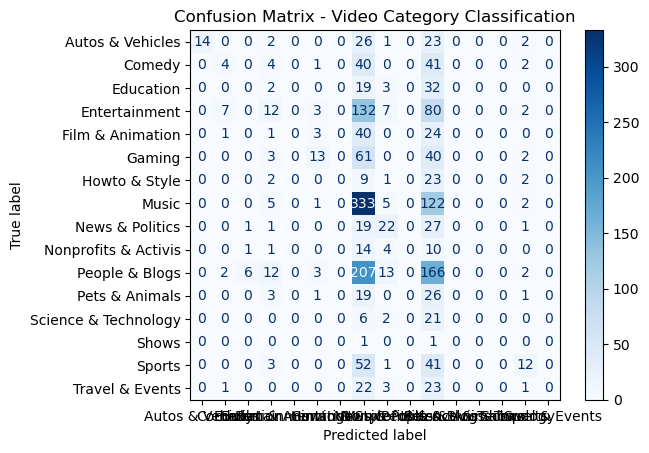

In [51]:
ConfusionMatrixDisplay.from_estimator(model, x_test_vector, y_test, cmap="Blues")
plt.title("Confusion Matrix - Video Category Classification")
plt.show()